In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import statistics

from konlpy.tag import Twitter
from konlpy.utils import pprint
twitter = Twitter()
from collections import Counter

pd.set_option('max_colwidth', 500)

common_front = '../../dataset/go_0715/gogosing_' 
common_back = '.json'

def get_file(file_num):   
    file_path = common_front + str(file_num) + common_back
    json_data = open(file_path).read()
    data = json.loads(json_data)
    df_data = pd.DataFrame(data)
    return df_data


# 74번 파일이 에러가 나서 제외함
def concat_file(file_num):
    start_file = pd.DataFrame(get_file(1))
    for i in range(2,file_num+1):
        if( i == 74):
            continue
        df_tmp = pd.DataFrame(get_file(i))
        start_file = pd.concat([start_file, df_tmp])
    start_file = start_file.reset_index(drop=True)
    return start_file

/usr/local/lib/python2.7/dist-packages/pandas/_libs/__init__.py:3: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .tslib import iNaT, NaT, Timestamp, Timedelta, OutOfBoundsDatetime
/usr/local/lib/python2.7/dist-packages/pandas/_libs/__init__.py:3: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  from .tslib import iNaT, NaT, Timestamp, Timedelta, OutOfBoundsDatetime
/usr/local/lib/python2.7/dist-packages/pandas/__init__.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import (hashtable as _hashtable,
/usr/local/lib/python2.7/dist-packages/pandas/__init__.py:26: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  from pandas._libs import (hashtable as _hashtable,
/usr/local/lib/python2.7/dist-packages/pandas/core/dtypes/common.py:6: RuntimeWarning: n

In [3]:
go_data = concat_file(156)

In [4]:
len(go_data)

772829

In [5]:
 # 소수점 아래 3자리까지 나타내기, 4째자리에서 반올림
def short_float(val):
    value = float("{:.4f}".format(val))
    return value


In [6]:
def print_group(title, groups, used_func):
    pivot_num = 0.1
    save_list = list()

    pprint(title)
    cur_num = 0.0
    for i, group in enumerate(groups):
        save_list.append(used_func(group))
        print('group ' + str(i + 1) + ' = ' + str(float("{:.1f}".format(cur_num))) + str(' over ') + str(
            float("{:.1f}".format(cur_num + pivot_num))) + str(' under : '), save_list[i])
        cur_num += pivot_num
    print('\n')

    return save_list

In [7]:
import pandas as pd
import numpy as np
np.random.seed(0)
from konlpy.tag import Twitter
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

twitter=Twitter()
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

/usr/local/lib/python2.7/dist-packages/scipy/sparse/lil.py:16: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _csparsetools
/usr/local/lib/python2.7/dist-packages/scipy/sparse/csgraph/__init__.py:165: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._shortest_path import shortest_path, floyd_warshall, dijkstra,\
/usr/local/lib/python2.7/dist-packages/scipy/sparse/csgraph/_validation.py:5: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._tools import csgraph_to_dense, csgraph_from_dense,\
/usr/local/lib/python2.7/dist-packages/scipy/sparse/csgraph/__init__.py:167: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._traversal import breadth_first_order, depth_first_order, \
/usr/local/lib/python2.7/dist-packages/scipy/sparse/csgraph/__init__.py:169: R

In [475]:
# tokenizer : 문장에서 색인어 추출을 위해 정해진 품사의 단어만 뽑아서 normalization, stemming 처리하도록 함
def token(raw, pos=["Noun","Alpha","Verb","Number","Adjective","KoreanParticle",
                        "Punctuation","Determiner", "Adverb", "Conjunction","Excalmation", "Foreign"], stopword=[]):
    return [
        word for word, tag in twitter.pos(
            raw, 
            norm=True,   # normalize 그랰ㅋㅋ -> 그래ㅋㅋ
            stem=True    # stemming 바뀌나->바뀌다
            )
        
          if len(word) >=1 and tag in pos and word not in stopword

        ]



In [486]:
pprint (twitter.pos(u'착화감 너무 편합니다. 올해 최고의 구두~^^ 그래서 색깔별로 하나씩 더 샀어용ㅋㅋ 잘 신을게요', norm=True, stem=True))

[(착, Noun),
 (화, Suffix),
 (감, Noun),
 (너무, Noun),
 (편하다, Adjective),
 (., Punctuation),
 (올해, Noun),
 (최고, Noun),
 (의, Josa),
 (구두, Noun),
 (~^^, Punctuation),
 (그래서, Adverb),
 (색깔, Noun),
 (별로, Noun),
 (하나, Noun),
 (씩, Suffix),
 (더, Noun),
 (사다, Verb),
 (ㅋㅋ, KoreanParticle),
 (자다, Verb),
 (신다, Verb)]


In [476]:
pprint (token(u'착화감 너무 편합니다. 올해 최고의 구두~^^ 그래서 색깔별로 하나씩 더 샀어용ㅋㅋ 잘 신을게요'))

[착,
 감,
 너무,
 편하다,
 .,
 올해,
 최고,
 구두,
 ~^^,
 그래서,
 색깔,
 별로,
 하나,
 더,
 사다,
 ㅋㅋ,
 자다,
 신다]


In [466]:
(go_data.loc[go_data['cId']=='000h**'])['desc']

Series([], Name: desc, dtype: object)

In [453]:
d=[u'아버지가 방에 들어가신다']
pprint (twitter.pos(u'아버지가 방에 들어가신다', norm=True, stem=True))

[(아버지, Noun),
 (가, Josa),
 (방, Noun),
 (에, Josa),
 (들어가다, Verb)]


In [463]:
pprint (token(u'아버지가 방에 들어가신다'))
d=[u'아버지가 방에 들어가신다']

[아버지, 방, 들어가다]


In [464]:
tfidf(d)

fit_transform, (No.review 1, feature 3)
      들어가다        방      아버지
0  0.57735  0.57735  0.57735


array([[0.57735027, 0.57735027, 0.57735027]])

In [481]:
d=[u'두개구매하고 사은품으로 받앗어요! 아직 써보딘않앗지만 잘사용하겟습니다~~!!',u'예쁜데 생각보다 약간 짧네요']
arr=tfidf(d)
arr

fit_transform, (No.review 2, feature 16)
          !      ~~!!         개        구매         두        받다        사은   생각  \
0  0.288675  0.288675  0.288675  0.288675  0.288675  0.288675  0.288675  0.0   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.5   

      써보딘않앗        아직   약간  예쁘다        용다        자다   짧다         품  
0  0.288675  0.288675  0.0  0.0  0.288675  0.288675  0.0  0.288675  
1  0.000000  0.000000  0.5  0.5  0.000000  0.000000  0.5  0.000000  


array([[0.28867513, 0.28867513, 0.28867513, 0.28867513, 0.28867513,
        0.28867513, 0.28867513, 0.        , 0.28867513, 0.28867513,
        0.        , 0.        , 0.28867513, 0.28867513, 0.        ,
        0.28867513],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.5       , 0.        , 0.        ,
        0.5       , 0.5       , 0.        , 0.        , 0.5       ,
        0.        ]])

In [484]:
similarity(arr,d)

cosine_similar 1 번째 리뷰와2 번째 리뷰 : 0.0
유사도 리스트
[0.0]
('min : ', 0.0)
('mid : ', 0.0)
('max : ', 0.0)
('avg : ', 0.0)
('# similarity over 0.9 : ', 0)


[0.0]

In [451]:
vectorize= TfidfVectorizer(
    tokenizer=token,
    sublinear_tf=True    # tf값에 1+log(tf)를 적용하여 tf값이 무한정 커지는 것을 막음
)

In [446]:
# 1.
#reviewer의 desc를 담는 리스트
def make_reviews(cid):
    desc=(go_data.loc[go_data['cId']==cid])['desc']
    desc=list(desc)
    
    return desc


In [494]:
#2. 리뷰들을 tf-idf 적용하여 벡터화
def tfidf(desc):
    X = vectorize.fit_transform(desc)
    print('fit_transform, (No.review {}, feature {})'.format(X.shape[0], X.shape[1]))
    features = vectorize.get_feature_names()
    
  #  print (pd.DataFrame(data=X.toarray(), columns=features))
    vector_array=X.toarray()
    
    return vector_array

In [495]:
#3. 유사도 구하기
def similarity(vector_arr,desc):   
    sm=[] #한 리뷰어의 리뷰 유사도를 담을 리스트
    max_cnt=0 #리뷰 유사도 최대값이 0.6 이상 count
    _sum=0
    _mid=0
    cnt=0
    for i in range(len(desc)-1):
        srch_vector= vectorize.transform([desc[i]])
        for j in range(i+1, len(desc)):
            cosine_similar =cosine_similarity(srch_vector, [vector_arr[j]]).flatten()
            cosine_similar=short_float(float(cosine_similar))
            print ("cosine_similar ") + str(i+1) + str(' 번째 리뷰와') + str(j+1) + str(' 번째 리뷰 : ') + str(cosine_similar)
            sm.append(cosine_similar)


    #pprint(u'유사도 리스트'),;print (sm)

    sm=sm.sort()
    _min=sm[0]
    _max=sm[len(sm)-1]
    _sum=sm[0]
    
    for i in range(1,len(sm)):
        if(_min>sm[i]):
            _min=sm[i]
        if(_max<sm[i]):
            _max=sm[i]
        _sum+=sm[i]
        if(sm[i]==1):
            cnt+=1

    if(_max>=0.9):
        max_cnt+=1
        
    avg= short_float(_sum/len(sm))
    
    
    print ('min : ', _min)
    print('max : ', _max)
    print('avg : ', avg)
    print('num of 1 : ', cnt)
    print('# max_cnt : ', max_cnt)
    
    return _max


# condition 1 : reviewer Burstiness (RB) - focused on product

(한 제품에 일정 날에 리뷰를 많이남긴 리뷰어)

In [13]:
def burst_in_product(min_count, dataframe):
    condition1 = []
    product_burst = pd.DataFrame({'count' : dataframe.groupby( [ "pID", "rDate", "cId"] ).size()}).reset_index()
    suspicious_reviewers = (product_burst[product_burst['count'] >= min_count])['cId']
    for reviewer in suspicious_reviewers:
        condition1.append(reviewer)
    return remove_duplicate_from_list(condition1)

def remove_duplicate_from_list(input_list):
    tmp_set = set(input_list)
    result = list(tmp_set)
    return result

# condition 2 : reviewer who has a lot of reviews
(minimum리뷰수를 적절히 바꿔가면서 리뷰가 많은 리뷰어 찾기)

In [14]:
def find_reviewer_who_has_many_reviews(min_review, dataframe):
    condition2 = []
    reviewer_and_reviews = dataframe['cId'].value_counts()
    suspicious_reviewers = reviewer_and_reviews[reviewer_and_reviews >= min_review].index
    for reviewer in suspicious_reviewers:
        condition2.append(reviewer)
    return condition2

#.encode('ascii','ignore')

# condition 3 : 상호명(아뜨랑스, 고고싱, 스타일난다(난다))를 직접적으로 언급한 리뷰어

In [15]:
def reviewer_who_directly_write_sitename(min_count, dataframe):
    condition3 = [] 
    reviewer_who_write_sitename = dataframe[dataframe['desc'].str.contains(u"고고싱")]
    reviewer_and_reviews = reviewer_who_write_sitename['cId'].value_counts()
    suspicious_reviewers = reviewer_and_reviews[reviewer_and_reviews >= min_count].index
    for reviewer in suspicious_reviewers:
        condition3.append(reviewer)
        
    return condition3

# condition4 : 평균 rScore가 5에 가까운 리뷰어

In [16]:
def reviewer_who_has_high_rscore(min_rscore, dataframe):
    condition4 = [] 
    mean_rscore = dataframe.groupby(dataframe.cId).mean()['rScore']
    suspicious_reviewers = mean_rscore[mean_rscore >= min_rscore].index
    for reviewer in suspicious_reviewers:
        condition4.append(reviewer)
        
    return condition4

def intersect(lst1, lst2):
    return list(set(lst1) & set(lst2))

#spam_reviewers = (intersect(intersect(intersect(condition3, condition4), condition2), condition1))
#pprint(spam_reviewers)

# condition 5 : reviewer who has many reviews in A product over all time

In [17]:
def reviewer_who_has_many_reviews_in_a_product(min_count, dataframe):
    condition5 = []
    product_burst = pd.DataFrame({'count' : dataframe.groupby( [ "pID", "cId"] ).size()}).reset_index()
    suspicious_reviewers = (product_burst[product_burst['count'] >= min_count])['cId']
    for reviewer in suspicious_reviewers:
        condition5.append(reviewer)
    
    return remove_duplicate_from_list(condition5)

#reviewer_who_has_many_reviews_in_a_product(7)


# reviewer_who_satisfy_some_condition - intersect ver.

spammer cId리스트 반환

In [18]:
'''
각 bool 파라미터는 각 조건의 포함여부를 나타내며 실험32의 경우 모든 조건을 보므로 다 1임
cond1 : 한 제품 & 특정 날짜에 cond1개 초과로 남긴 리뷰어
cond2 : cond2개 초과의 리뷰를 가진 리뷰어
cond3 : 상호명 언급을 cond3번 초과한 리뷰어
cond4 : 평점 cond4초과 리뷰어
cond5 : 한제품에 cond5개 초과로 리뷰남긴 리뷰어 추가하기
'''
def reviewer_who_satisfy_some_condition(dataframe, cond1_bool, cond2_bool, cond3_bool, cond4_bool, cond5_bool,
                                        cond1, cond2, cond3, cond4, cond5):
    
    unique_cid = dataframe.cId.unique()
    #condition1
    if(cond1_bool == 1):
        reviewer1 = burst_in_product(cond1, dataframe)
    else:
        reviewer1 = unique_cid
    
    #condition2
    if(cond2_bool == 1):
        reviewer2 = find_reviewer_who_has_many_reviews(cond2, dataframe)
    else:
        reviewer2 = unique_cid
        
    #condition3
    if(cond3_bool == 1):
        reviewer3 = reviewer_who_directly_write_sitename(cond3, dataframe)
    else:
        reviewer3 = unique_cid
    
    #condition4
    if(cond4_bool == 1):
        reviewer4 = reviewer_who_has_high_rscore(cond4, dataframe)
    else:
        reviewer4 = unique_cid
        
    #condition5
    if(cond5_bool == 1):
        reviewer5 = reviewer_who_has_many_reviews_in_a_product(cond5, dataframe)
    else:
        reviewer5 = unique_cid
        
    spam_reviewers = intersect(intersect(intersect(intersect(reviewer1, reviewer2), reviewer3), reviewer4), reviewer5)
    
    #네이버 페이 구매자는 제외
    if(u'\ub124\uc774\ubc84 \ud398\uc774 \uad6c\ub9e4\uc790' in spam_reviewers):
        spam_reviewers.remove(u'\ub124\uc774\ubc84 \ud398\uc774 \uad6c\ub9e4\uc790')
    
    except_spam_in_gogosing = dataframe[~dataframe.cId.isin(spam_reviewers)]
    print("<intersect condition>")
    print("cond1 =" + str(cond1) + ", cond2 =" + str(cond2) + ", cond3 =" + str(cond3) + ", cond4 =" + str(cond4) + ", cond5 =" + str(cond5))
    print("the number of spam_reviewers : " + str(len(spam_reviewers)))
    print("suspicious spammers : "),
    print(spam_reviewers)
    print("the number of non spam reviewers : " + str(len(except_spam_in_gogosing.cId.unique())))
    rscore = except_spam_in_gogosing['rScore'].value_counts()
      
    #print("except spam in gogosing : " )
    #print(except_spam_in_gogosing)

    #어떤 평점의 리뷰가 전체 사라질 경우를 방지하기 위함
    if(not(5.0 in rscore.index)):
        add_row = pd.Series([1], index=[5.0])
        rscore = rscore.add(add_row)
    if(not(4.0 in rscore.index)):
        add_row = pd.Series([1], index=[4.0])
        rscore = rscore.add(add_row)
    if(not(3.0 in rscore.index)):
        add_row = pd.Series([1], index=[3.0])
        rscore = rscore.add(add_row)
    if(not(2.0 in rscore.index)):
        add_row = pd.Series([1], index=[2.0])
        rscore = rscore.add(add_row)
    if(not(1.0 in rscore.index)):
        add_row = pd.Series([1], index=[1.0])
        rscore = rscore.add(add_row)
        
    print("\n")
    print("rscore : ")
    print(rscore)        
    
    print ("ratio btw 5.0 and 4.0 : " + str(float(rscore[5.0])/float(rscore[4.0])))
    print ("ratio btw 5.0 and 3.0 : " + str(float(rscore[5.0])/float(rscore[3.0])))
    print ("ratio btw 5.0 and 2.0 : " + str(float(rscore[5.0])/float(rscore[2.0])))
    print ("ratio btw 5.0 and 1.0 : " + str(float(rscore[5.0])/float(rscore[1.0])))
    
    print ("the number of 5.0 reviews : " + str(rscore[5.0]))
    print ("the number of 4.0 reviews : " + str(rscore[4.0]))
    print ("the number of 3.0 reviews : " + str(rscore[3.0]))
    print ("the number of 2.0 reviews : " + str(rscore[2.0]))
    print ("the number of 1.0 reviews : " + str(rscore[1.0]))
                    
    score = ('5.0', '4.0', '3.0', '2.0', '1.0')
    number_of_reviews = [rscore[5.0],
                     rscore[4.0],
                     rscore[3.0],
                     rscore[2.0],
                     rscore[1.0]]

    plt.bar(score, number_of_reviews, color=['red'],
        width=0.3, alpha=0.5)
    plt.xticks(score, fontsize=15)
    plt.yticks(fontsize=15)
    plt.ylabel('# of review', fontsize=15)
    plt.rcParams["figure.figsize"] = (6,4)
    plt.xlabel('rScore', fontsize=15)
    ax = plt.gca()
    ax.set_ylim([0.0, except_spam_in_gogosing.shape[0]+500])
    plt.show()
    print("\n\n")
    return spam_reviewers

#  reviewer_who_satisfy_some_condition - union ver.

non spammer들의 cId리스트 반환

In [19]:
def reviewer_who_satisfy_some_condition_union(dataframe, cond1_bool, cond2_bool, cond3_bool, cond4_bool, cond5_bool,
                                        cond1, cond2, cond3, cond4, cond5):
    
     #condition1
    if(cond1_bool == 1):
        reviewer1 = burst_in_product(cond1, dataframe)
    else:
        reviewer1 = []
    
    #condition2
    if(cond2_bool == 1):
        reviewer2 = find_reviewer_who_has_many_reviews(cond2, dataframe)
    else:
        reviewer2 = []
        
    #condition3
    if(cond3_bool == 1):
        reviewer3 = reviewer_who_directly_write_sitename(cond3, dataframe)
    else:
        reviewer3 = []
    
    #condition4
    if(cond4_bool == 1):
        reviewer4 = reviewer_who_has_high_rscore(cond4, dataframe)
    else:
        reviewer4 = []
        
    #condition5
    if(cond5_bool == 1):
        reviewer5 = reviewer_who_has_many_reviews_in_a_product(cond5, dataframe)
    else:
        reviewer5 = []  
        
    spam_reviewers = remove_duplicate_from_list(reviewer1 + reviewer2 + reviewer3 + reviewer4 + reviewer5)
    
    
    #네이버 페이 구매자는 스패머에서 일단 제외
    if(u'\ub124\uc774\ubc84 \ud398\uc774 \uad6c\ub9e4\uc790' in spam_reviewers):
        spam_reviewers.remove(u'\ub124\uc774\ubc84 \ud398\uc774 \uad6c\ub9e4\uc790')
    
    except_spam_in_gogosing = dataframe[~dataframe.cId.isin(spam_reviewers)]
    print("total number of suspicious spam reviewers : " + str(len(spam_reviewers)))

    print("total number of expected non-spam reviewers : " + str(len(except_spam_in_gogosing.cId.unique()))) 
    
    print("<union condition>")
    print("cond1 =" + str(cond1) + ", cond2 =" + str(cond2) + ", cond3 =" + str(cond3) + ", cond4 =" + str(cond4) + ", cond5 =" + str(cond5))
    
    rscore = except_spam_in_gogosing['rScore'].value_counts()
     

    if(not(5.0 in rscore.index)):
        add_row = pd.Series([1], index=[5.0])
        rscore = rscore.add(add_row)
    if(not(4.0 in rscore.index)):
        add_row = pd.Series([1], index=[4.0])
        rscore = rscore.add(add_row)
    if(not(3.0 in rscore.index)):
        add_row = pd.Series([1], index=[3.0])
        rscore = rscore.add(add_row)
    if(not(2.0 in rscore.index)):
        add_row = pd.Series([1], index=[2.0])
        rscore = rscore.add(add_row)
    if(not(1.0 in rscore.index)):
        add_row = pd.Series([1], index=[1.0])
        rscore = rscore.add(add_row)  
    
    print ("ratio btw 5.0 and 4.0 : " + str(float(rscore[5.0])/float(rscore[4.0])))
    print ("ratio btw 5.0 and 3.0 : " + str(float(rscore[5.0])/float(rscore[3.0])))
    print ("ratio btw 5.0 and 2.0 : " + str(float(rscore[5.0])/float(rscore[2.0])))
    print ("ratio btw 5.0 and 1.0 : " + str(float(rscore[5.0])/float(rscore[1.0])))
    

    print ("the number of 5.0 reviews : " + str(rscore[5.0]))
    print ("the number of 4.0 reviews : " + str(rscore[4.0]))
    print ("the number of 3.0 reviews : " + str(rscore[3.0]))
    print ("the number of 2.0 reviews : " + str(rscore[2.0]))
    print ("the number of 1.0 reviews : " + str(rscore[1.0]))
    
                    
    score = ('5.0', '4.0', '3.0', '2.0', '1.0')
    number_of_reviews = [rscore[5.0],
                     rscore[4.0],
                     rscore[3.0],
                     rscore[2.0],
                     rscore[1.0]]

    plt.bar(score, number_of_reviews, color=['red'],
        width=0.3, alpha=0.5)
    plt.xticks(score, fontsize=15)
    plt.yticks(fontsize=15)
    plt.ylabel('# of review', fontsize=15)
    plt.rcParams["figure.figsize"] = (6,4)
    plt.xlabel('rScore', fontsize=15)
    ax = plt.gca()
    ax.set_ylim([0.0, except_spam_in_gogosing.shape[0]+1000])
    plt.show()
    print("\n\n")
    
    return except_spam_in_gogosing.cId.unique()

# intersect

#  union

total number of suspicious spam reviewers : 112031
total number of expected non-spam reviewers : 26619
<union condition>
cond1 =3, cond2 =50, cond3 =10, cond4 =4.95, cond5 =2
ratio btw 5.0 and 4.0 : 4.99350310153
ratio btw 5.0 and 3.0 : 13.7471687938
ratio btw 5.0 and 2.0 : 54.1995038979
ratio btw 5.0 and 1.0 : 88.6158748552
the number of 5.0 reviews : 152951
the number of 4.0 reviews : 30630
the number of 3.0 reviews : 11126
the number of 2.0 reviews : 2822
the number of 1.0 reviews : 1726


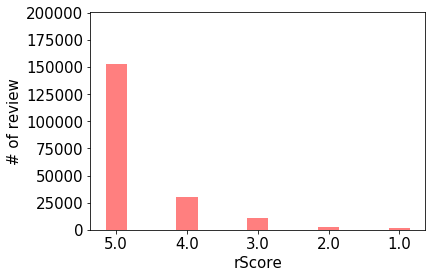

In [20]:
non_spammer=reviewer_who_satisfy_some_condition_union(go_data, 1, 1, 1, 1, 1, 3, 50, 10, 4.95, 2)

total number of suspicious spam reviewers : 107046
total number of expected non-spam reviewers : 31604
<union condition>
cond1 =3, cond2 =50, cond3 =10, cond4 =4.96, cond5 =3
ratio btw 5.0 and 4.0 : 5.28002892552
ratio btw 5.0 and 3.0 : 13.9996694215
ratio btw 5.0 and 2.0 : 55.4596647459
ratio btw 5.0 and 1.0 : 93.9418811003
the number of 5.0 reviews : 211745
the number of 4.0 reviews : 40103
the number of 3.0 reviews : 15125
the number of 2.0 reviews : 3818
the number of 1.0 reviews : 2254


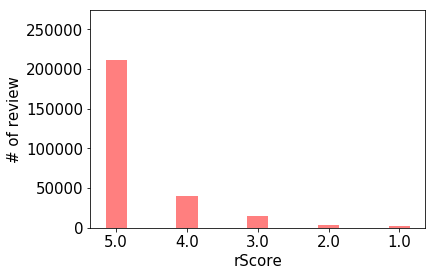

In [52]:
non_spammer2=reviewer_who_satisfy_some_condition_union(go_data, 1, 1, 1, 1, 1, 3, 50, 10, 4.96, 3)

total number of suspicious spam reviewers : 112289
total number of expected non-spam reviewers : 26361
<union condition>
cond1 =3, cond2 =50, cond3 =2, cond4 =4.96, cond5 =3
ratio btw 5.0 and 4.0 : 4.90415314731
ratio btw 5.0 and 3.0 : 12.9295124038
ratio btw 5.0 and 2.0 : 50.4998329435
ratio btw 5.0 and 1.0 : 84.4391061453
the number of 5.0 reviews : 151146
the number of 4.0 reviews : 30820
the number of 3.0 reviews : 11690
the number of 2.0 reviews : 2993
the number of 1.0 reviews : 1790


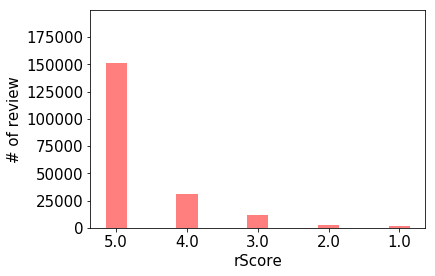

In [53]:
non_spammer3=reviewer_who_satisfy_some_condition_union(go_data, 1, 1, 1, 1, 1, 3, 50, 2, 4.96, 3)

In [349]:
df=pd.DataFrame(li, columns=['val'])
df

val
0   10
1    9
2    8
3    7
4    6
5    5
6    4
7    3
8    2
9    1

In [350]:
df.val.describe()

count    10.00000
mean      5.50000
std       3.02765
min       1.00000
25%       3.25000
50%       5.50000
75%       7.75000
max      10.00000
Name: val, dtype: float64

test np.percentile

In [340]:
li=[1,2,3,4,5,6,7,8,9,10]
li.sort(reverse=True)
li

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [491]:
li=[2,6,5,3,1,10,9,8,7,4]
li

[2, 6, 5, 3, 1, 10, 9, 8, 7, 4]

In [492]:
np.percentile(li,25)

3.25

In [489]:
np.percentile(li,50)

5.5

In [490]:
np.percentile(li,75)

7.75

In [351]:
np.percentile(li,[25,50,75]) #제 1 사 분위수, 중앙값, 제 3사 분위수

array([3.25, 5.5 , 7.75])

# intersect

reviewer_who_satisfy_some_condition(go_data, 1, 1, 1, 1, 1, 3, 50, 10, 4.95, 2)

In [172]:
spammer=[u'asdfg18**', u'ghkal04**', u'rladmswl9708**', u'leeliast**', u'rhdms10**', u'sally70**', u'm0928hy**', u'yeji04**', u'sejin1**', u'wlgml13**', u'yjyim**', u'hooming**', u'sy2004**', u'ik35**', u'sosososo**', u'yeon33**', u'loveheart77**', u'wjswldms0**', u'ch**', u'jy03**', u'seoa40**', u'altnr**', u'acua**', u'wertyuio9**', u'chihn19**', u'dekuu12**']

In [173]:
len(spammer)

26

In [38]:
max_count=0
for i in range(len(spammer)):
    print str(i+1) + str('번째 리뷰어: ')+ str(spammer[i])
    reviews=make_reviews(spammer[i])
    if(len(reviews)<2):
        continue:
    vector_array=tfidf(reviews)
    max_cnt=similarity(vector_array, reviews)
    max_count+=max_cnt

print str('최대 유사도 0.6 이상인 사람 수: ') + str(max_count)

1번째 리뷰어: asdfg18**
fit_transform, (No.review 59, feature 598)
('min : ', 0.0)
('max : ', 1.0)
('avg : ', 0.0949)
('num of 1 : ', 4)
('# max_cnt : ', 1)
2번째 리뷰어: ghkal04**
fit_transform, (No.review 55, feature 364)
('min : ', 0.0)
('max : ', 0.9306)
('avg : ', 0.113)
('num of 1 : ', 0)
('# max_cnt : ', 1)
3번째 리뷰어: rladmswl9708**
fit_transform, (No.review 308, feature 911)
('min : ', 0.0)
('max : ', 0.4936)
('avg : ', 0.0623)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4번째 리뷰어: leeliast**
fit_transform, (No.review 125, feature 1285)
('min : ', 0.0)
('max : ', 1.0)
('avg : ', 0.0786)
('num of 1 : ', 1)
('# max_cnt : ', 1)
5번째 리뷰어: rhdms10**
fit_transform, (No.review 54, feature 325)
('min : ', 0.0)
('max : ', 0.7973)
('avg : ', 0.1092)
('num of 1 : ', 0)
('# max_cnt : ', 1)
6번째 리뷰어: sally70**
fit_transform, (No.review 63, feature 510)
('min : ', 0.0233)
('max : ', 1.0)
('avg : ', 0.1198)
('num of 1 : ', 4)
('# max_cnt : ', 1)
7번째 리뷰어: m0928hy**
fit_transform, (No.review 61, feature 580)
('min 

In [32]:
len(max_count)

26

In [42]:
pd.DataFrame((go_data.loc[go_data['cId']=='chihn19**'])[['desc','rScore', 'rNo', 'rDate']])

desc  \
22181                                                                                                                                                                                                                   이거 진짜진짜 실물이 훨씬!!더 좋아요배송도 빠르게 오고 이거 받고 요즘 이가방만 들고다니네요너무 크지도 작지도 않고 들어갈거 다들어가고딱 너무 좋아하는 크기입니다!! 너무 만족합니당이쁘게 잘들고 다닐게용^^   
28212                                                                                                                                                                                                                                                              노브라여서 그런지 편하게 잘입고있어요!! 팬티도 너무 편하구디자인이 깔끔해서 그런지 더 맘에 들어요이쁘게 잘입겠습니당 감사합니당^^   
28214                                                                                                                                                                                                                                                               색도 너무 이쁘게 잘나오고 진자 가슴이 엄청엄청 커져요2배로..? 근데 편하고 잘모아져서 너무 만족합니당!!이쁘게 잘입겠습니당^^   
28215                                                                                                                                                                                                                              생각보다 진짜 뽕이 엄청나서 당황했지만 ㅋㅋㅋ노브라여서 그런지 편하구 가슴도 진짜 잘모아져요!!빈약했던 가슴이..살아나는 느낌?디자인도 깔끔하고 이뻐서 맘에 들어요!!이쁘게 잘입겠습니당^^   
39826                                                                                                                                                                                                                           너무 이뻐서 한개더 구매했는데 진짜속치마있는것도 너무 좋고 재질이 부들부들 너무 맘에 들어요!!너무 만족합니다 기다린 보람이 있어요^^날도 풀리고 신나게 입고 다녀야 겠어용^^잘입겠습니당~~!!   
39834                                                                                                                                                                                                                                  기다리기 너무 잘한것 같아요!!너무 인기있는상품이라서 얼마나 이쁠까 생각했었는데기대 이상이여서 너무 좋습니다!!속치마가 있어서 너무 좋았어요!! 역시 고고싱~~이쁘게 잘입겠습니당^^   
60834                                                                                                                                                                                                                       이거 기대 이상이였습니당!! 키가 큰데 길이도 짧지도 않구~~색도 화면하고 똑같아요 딸기우유?색 같은 여성여성하고저는 너무 맘에 들었어용!! 언능 날이 좀 풀려서 입고싶네용~~!!이쁘게 잘입겠습니당^^   
60835                                                                                                                                                                                                                                살짝 실밥 처리가 아쉬웠지만 너무 만족합니당!!실밥은 자르면 되고 여성여성 하고 대체적으로 너무 맘에 들어용 치마하고 입으면 정말 이쁠것 같아용~~ 이쁘게 잘입겠습니당!! 감사합니당^^   
60836                                                                                                                                                                                                                      색상은 생각했던 색보다 조금더 진했는데 너무 이뻐서저는 너무 만족했습니당!! 리본도 탁부착이라서 편하고 너무 좋아요 너무이쁘고 왜 인기가 많은 상품인지 알것같아용!!배송도 빠르고 고고싱 최고입니당~~^^   
60837                                                                                                                                                                                                                            이거를 왜 고민했었는지!! 진즉에 살걸 그랬어요!!전혀 고민할 필요도 없었는데..정말 최고입니다!!너무 이뻐요 ㅠㅠ다른색상도 구매할까 고민입니다!!정말 최고예요 길이도 좋고 너무 만족합니당^^   
70495                                                                                                                                                                                                                                  너무좋아서 하나 더샀는데 역시 좋은것 같아요!!동생한테 선물했더니 너무 좋아하네요^^올겨울 거의 이패딩을 버텼습니당!!남은 겨울도 패딩과 함께~~!! 이쁘게 잘입을게용많이 파세용^^   
92772                                                                                                                                                                                                              생각보다 좀더 커서 놀랬지만 너무 이뻐서 만족합니당!!엄청 따뜻해서 일단 너무 좋고 남자친구도 너무 좋아하네요!!다른색상도 구매하구 싶어용~~길이도 길고

In [43]:
(go_data.loc[go_data['cId']=='chihn19**'])['rScore'].mean()

5.0

In [162]:
statistics.median(li)

5

In [184]:
max = __builtins__.max
max(li)

9

In [185]:
min(li)

0

In [176]:
sum(li)

38

In [358]:
li=[3,1,6,2,9,5,0,5,7,4]
print("print list: ", li)
print("length list: ", len(li))
li.sort(reverse=True)
print("print sort list: ", li)

_max25=int(round(len(li)*0.25))
_max75=int(round(len(li)*0.75))
print ("max 25% order : " , _max25)
print("max 25% value of list: ", li[_max25-1])
print ("max 75% order: " , _max75)
print("max 75% value of list: ", li[_max75-1])

result_mid = print_want_val(li, lambda x: np.percentile(li,50)) # 중간값 반환 
print ("median: ", result_mid)
result_q1 = print_want_val( li, lambda x: np.percentile(li,25)) # 25%
print("1st quartile: ", result_q1)
result_q3 = print_want_val(li, lambda x: np.percentile(li,75)) #75%
print("3rd quartile: ", result_q3)                 


('print list: ', [3, 1, 6, 2, 9, 5, 0, 5, 7, 4])
('length list: ', 10)
('print sort list: ', [9, 7, 6, 5, 5, 4, 3, 2, 1, 0])
('max 25% order : ', 3)
('max 25% value of list: ', 6)
('max 75% order: ', 8)
('max 75% value of list: ', 2)
('median: ', 4.5)
('1st quartile: ', 2.25)
('3rd quartile: ', 5.75)


In [272]:
def make_groups(_list):
    group1=0
    group2=0
    group3=0
    group4=0
    group5=0
    group6=0
    group7=0
    group8=0
    group9=0
    group10=0
    
    for i in range(len(_list)):
        if(_list[i]<0.1):
            group1+=1
        elif(_list[i]>=0.1 and _list[i]< 0.2):
            group2+=1
        elif(_list[i] >=0.2 and _list[i]< 0.3):
            group3+=1
        elif(_list[i] >=0.3 and _list[i]< 0.4):
            group4+=1
        elif(_list[i]>=0.4 and _list[i]< 0.5):
            group5+=1
        elif(_list[i]>=0.5 and _list[i] < 0.6):
            group6+=1
        elif(_list[i]>=0.6 and _list[i] < 0.7):
            group7+=1
        elif(_list[i]>=0.7 and _list[i]< 0.8):
            group8+=1
        elif(_list[i]>=0.8 and _list[i]< 0.9):
            group9+=1
        elif(_list[i]>=0.9):
            group10+=1
        
    groups=[group1, group2, group3, group4, group5, group6,group7,group8,group9,group10 ]
    
    return groups

In [261]:
def print_want_val(sm_list,used_func):
    val=(used_func(sm_list))
   
    return val

In [498]:
#3. 유사도 구하기222222222
def similarity(vector_arr,desc):   
    sm=[] #한 리뷰어의 리뷰 유사도를 담을 리스트
    max_cnt=0 #리뷰 유사도 최대값이 0.9 이상 count
    _sum=0
    _mid=0
    cnt=0
    for i in range(len(desc)-1):
        srch_vector= vectorize.transform([desc[i]])
        for j in range(i+1, len(desc)):
            cosine_similar =cosine_similarity(srch_vector, [vector_arr[j]]).flatten()
            cosine_similar=short_float(float(cosine_similar))
            print ("cosine_similar ") + str(i+1) + str(' 번째 리뷰와') + str(j+1) + str(' 번째 리뷰 : ') + str(cosine_similar)
            sm.append(cosine_similar)


   # pprint(u'유사도 리스트'),;print (sm)

    sm.sort(reverse=True)
    _min=min(sm)
    _mid=statistics.median(sm) # 유사도의 중간값
    _max=max(sm)
    _sum=sum(sm)

    if(_max>=0.9):
        max_cnt+=1
        
    avg= short_float(_sum/len(sm))
    
    
  #  print ('min : ', _min)
  #  print ('mid : ', _mid)
  #  print('max : ', _max)
    print('avg : ', avg)
   # print('num of 1 : ', cnt)
    print('# similarity over 0.9 : ', max_cnt)
    
    return sm


In [504]:

for i in range(1):
    print str(i+1) + str('번째 리뷰어: ')+ str('slvj**')
    reviews=make_reviews('slvj**')
    if(len(reviews)<2):
        continue
    vector_array=tfidf(reviews)
    sm=similarity(vector_array, reviews)

  
    result_max= print_want_val(sm, lambda x: np.percentile(sm,100)) # 최대값 반환 
    print ("max: ", result_max)
    
    result_q3 = print_want_val(sm, lambda x: np.percentile(sm,75)) #상위 25%
    print("3rd quartile: ", result_q3)   
    
    
    result_mid = print_want_val(sm, lambda x: np.percentile(sm,50)) # 중간값 반환 
    print ("median: ", result_mid)
   
    
    result_q1 = print_want_val(sm, lambda x: np.percentile(sm,25)) # 상위 75%
    print("1st quartile: ", result_q1)
  
    print(np.mean(sm))

    print("\n")
    

1번째 리뷰어: slvj**
fit_transform, (No.review 10, feature 138)
cosine_similar 1 번째 리뷰와2 번째 리뷰 : 0.1218
cosine_similar 1 번째 리뷰와3 번째 리뷰 : 0.1817
cosine_similar 1 번째 리뷰와4 번째 리뷰 : 0.0396
cosine_similar 1 번째 리뷰와5 번째 리뷰 : 0.0838
cosine_similar 1 번째 리뷰와6 번째 리뷰 : 0.0482
cosine_similar 1 번째 리뷰와7 번째 리뷰 : 0.063
cosine_similar 1 번째 리뷰와8 번째 리뷰 : 0.1647
cosine_similar 1 번째 리뷰와9 번째 리뷰 : 0.0328
cosine_similar 1 번째 리뷰와10 번째 리뷰 : 0.0702
cosine_similar 2 번째 리뷰와3 번째 리뷰 : 0.1699
cosine_similar 2 번째 리뷰와4 번째 리뷰 : 0.067
cosine_similar 2 번째 리뷰와5 번째 리뷰 : 0.0653
cosine_similar 2 번째 리뷰와6 번째 리뷰 : 0.0932
cosine_similar 2 번째 리뷰와7 번째 리뷰 : 0.0384
cosine_similar 2 번째 리뷰와8 번째 리뷰 : 0.2138
cosine_similar 2 번째 리뷰와9 번째 리뷰 : 0.0737
cosine_similar 2 번째 리뷰와10 번째 리뷰 : 0.1623
cosine_similar 3 번째 리뷰와4 번째 리뷰 : 0.0208
cosine_similar 3 번째 리뷰와5 번째 리뷰 : 0.113
cosine_similar 3 번째 리뷰와6 번째 리뷰 : 0.0483
cosine_similar 3 번째 리뷰와7 번째 리뷰 : 0.0308
cosine_similar 3 번째 리뷰와8 번째 리뷰 : 0.2528
cosine_similar 3 번째 리뷰와9 번째 리뷰 : 0.0773
cosine_similar 3 번째 리뷰

    유사도 분포도 - 유사도 최대값 , 중간값, 상위 25%(q3), 상위 75%(q1)

In [378]:
max_list=[]
mid_list=[]
q1_list=[]
q3_list=[]

for i in range(len(spammer)):
    print str(i+1) + str('번째 리뷰어: ')+ str(spammer[i])
    reviews=make_reviews(spammer[i])
    if(len(reviews)<2):
        continue
    vector_array=tfidf(reviews)
    sm=similarity(vector_array, reviews)

  
    result_max= print_want_val(sm, lambda x: np.percentile(sm,100)) # 최대값 반환 
    print ("max: ", result_max)
    max_list.append(result_max)
    
    result_mid = print_want_val(sm, lambda x: np.percentile(sm,50)) # 중간값 반환 
    print ("median: ", result_mid)
    mid_list.append(result_mid)
    
    result_q1 = print_want_val(sm, lambda x: np.percentile(sm,25)) # 상위 75%
    print("1st quartile: ", result_q1)
    q1_list.append(result_q1)
    
    result_q3 = print_want_val(sm, lambda x: np.percentile(sm,75)) #상위 25%
    print("3rd quartile: ", result_q3)         
    q3_list.append(result_q3)


    print("\n")
    
groups_max=make_groups(max_list)
groups_mid=make_groups(mid_list)
groups_q1=make_groups(q1_list)
groups_q3=make_groups(q3_list)

1번째 리뷰어: asdfg18**
fit_transform, (No.review 59, feature 598)
('avg : ', 0.0949)
('# similarity over 0.9 : ', 1)
('max: ', 1.0)
('median: ', 0.0796)
('1st quartile: ', 0.05315)
('3rd quartile: ', 0.1231)


2번째 리뷰어: ghkal04**
fit_transform, (No.review 55, feature 364)
('avg : ', 0.113)
('# similarity over 0.9 : ', 1)
('max: ', 0.9306)
('median: ', 0.1008)
('1st quartile: ', 0.0629)
('3rd quartile: ', 0.147)


3번째 리뷰어: rladmswl9708**
fit_transform, (No.review 308, feature 911)
('avg : ', 0.0623)
('# similarity over 0.9 : ', 0)
('max: ', 0.4936)
('median: ', 0.05075)
('1st quartile: ', 0.024)
('3rd quartile: ', 0.0875)


4번째 리뷰어: leeliast**
fit_transform, (No.review 125, feature 1285)
('avg : ', 0.0786)
('# similarity over 0.9 : ', 1)
('max: ', 1.0)
('median: ', 0.06995000000000001)
('1st quartile: ', 0.0384)
('3rd quartile: ', 0.1089)


5번째 리뷰어: rhdms10**
fit_transform, (No.review 54, feature 325)
('avg : ', 0.1092)
('# similarity over 0.9 : ', 0)
('max: ', 0.7973)
('median: ', 0.0866)
(

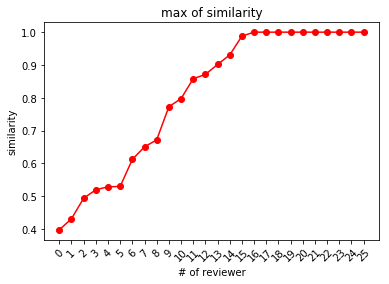

In [381]:
x=np.arange(len(max_list))
y=sorted(max_list)

plt.plot(x,y,color='red',marker='o',linestyle='solid')
plt.title('max of similarity')
plt.xlabel("# of reviewer")
plt.ylabel("similarity")
plt.xticks(np.arange(len(x)),x,rotation=45)
plt.show()

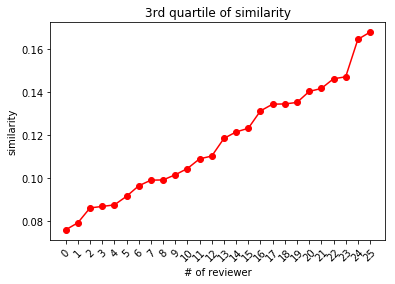

In [382]:
x=np.arange(len(q3_list))
y=sorted(q3_list)

plt.plot(x,y,color='red',marker='o',linestyle='solid')
plt.title('3rd quartile of similarity')
plt.xlabel("# of reviewer")
plt.ylabel("similarity")
plt.xticks(np.arange(len(x)),x,rotation=45)
plt.show()

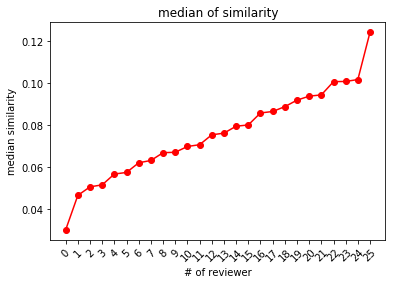

In [383]:
x=np.arange(len(mid_list))
y=sorted(mid_list)

plt.plot(x,y,color='red',marker='o',linestyle='solid')
plt.title('median of similarity')
plt.xlabel("# of reviewer")
plt.ylabel("median similarity")
plt.xticks(np.arange(len(x)),x,rotation=45)
plt.show()

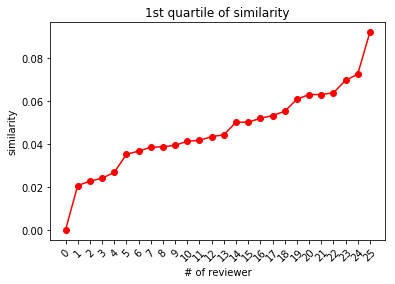

In [384]:
x=np.arange(len(q1_list))
y=sorted(q1_list)

plt.plot(x,y,color='red',marker='o',linestyle='solid')
plt.title('1st quartile of similarity')
plt.xlabel("# of reviewer")
plt.ylabel("similarity")
plt.xticks(np.arange(len(x)),x,rotation=45)
plt.show()

In [282]:
groups_mid

[22, 4, 0, 0, 0, 0, 0, 0, 0, 0]

In [395]:
result_len = print_group(u'해당 그룹별 spammer 수', groups_max, lambda x: x)
result_ratio = print_group(u'해당 그룹별 spammer 비율', groups_max, lambda x: float("{:.1f}".format(1.0 * (x) * 100 / len(spammer))))

해당 그룹별 spammer 수
('group 1 = 0.0 over 0.1 under : ', 0)
('group 2 = 0.1 over 0.2 under : ', 0)
('group 3 = 0.2 over 0.3 under : ', 0)
('group 4 = 0.3 over 0.4 under : ', 1)
('group 5 = 0.4 over 0.5 under : ', 2)
('group 6 = 0.5 over 0.6 under : ', 3)
('group 7 = 0.6 over 0.7 under : ', 3)
('group 8 = 0.7 over 0.8 under : ', 2)
('group 9 = 0.8 over 0.9 under : ', 2)
('group 10 = 0.9 over 1.0 under : ', 13)


해당 그룹별 spammer 비율
('group 1 = 0.0 over 0.1 under : ', 0.0)
('group 2 = 0.1 over 0.2 under : ', 0.0)
('group 3 = 0.2 over 0.3 under : ', 0.0)
('group 4 = 0.3 over 0.4 under : ', 3.8)
('group 5 = 0.4 over 0.5 under : ', 7.7)
('group 6 = 0.5 over 0.6 under : ', 11.5)
('group 7 = 0.6 over 0.7 under : ', 11.5)
('group 8 = 0.7 over 0.8 under : ', 7.7)
('group 9 = 0.8 over 0.9 under : ', 7.7)
('group 10 = 0.9 over 1.0 under : ', 50.0)




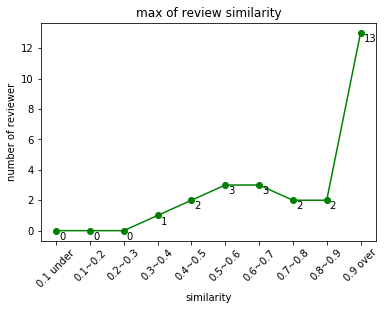

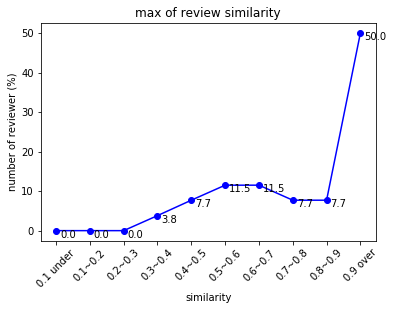

In [396]:
x=[u'0.1 under',u'0.1~0.2',u'0.2~0.3',u'0.3~0.4',u'0.4~0.5',u'0.5~0.6',u'0.6~0.7',u'0.7~0.8',u'0.8~0.9',u'0.9 over']
y=result_len
labels=y

plt.plot(x,y,color='green',marker='o',linestyle='solid')
plt.title('max of review similarity')
plt.xlabel("similarity")
plt.ylabel("number of reviewer")
plt.xticks(np.arange(len(x)),x,rotation=45)
for label, x_count, y_count in zip(labels, x, y):
    plt.annotate(label,
                 xy=(x_count, y_count), #label을 데이터포인트에 두되
                 xytext=(3,-9), # 약간 떨어져 있게
                 textcoords='offset points')
plt.show()

x=[u'0.1 under',u'0.1~0.2',u'0.2~0.3',u'0.3~0.4',u'0.4~0.5',u'0.5~0.6',u'0.6~0.7',u'0.7~0.8',u'0.8~0.9',u'0.9 over']
y=result_ratio
labels=y
    
plt.plot(x,y,color='blue',marker='o',linestyle='solid')
plt.title('max of review similarity')
plt.xlabel("similarity")
plt.ylabel("number of reviewer (%)")
plt.xticks(np.arange(len(x)),x,rotation=45)
for label, x_count, y_count in zip(labels, x, y):
    plt.annotate(label,
                 xy=(x_count, y_count), #label을 데이터포인트에 두되
                 xytext=(4,-7), # 약간 떨어져 있게
                 textcoords='offset points')
plt.show()

In [387]:
result_len = print_group(u'해당 그룹별 spammer 수', groups_q3, lambda x: x)
result_ratio = print_group(u'해당 그룹별 spammer 비율', groups_q3, lambda x: float("{:.1f}".format(1.0 * (x) * 100 / len(spammer))))

해당 그룹별 spammer 수
('group 1 = 0.0 over 0.1 under : ', 9)
('group 2 = 0.1 over 0.2 under : ', 17)
('group 3 = 0.2 over 0.3 under : ', 0)
('group 4 = 0.3 over 0.4 under : ', 0)
('group 5 = 0.4 over 0.5 under : ', 0)
('group 6 = 0.5 over 0.6 under : ', 0)
('group 7 = 0.6 over 0.7 under : ', 0)
('group 8 = 0.7 over 0.8 under : ', 0)
('group 9 = 0.8 over 0.9 under : ', 0)
('group 10 = 0.9 over 1.0 under : ', 0)


해당 그룹별 spammer 비율
('group 1 = 0.0 over 0.1 under : ', 34.6)
('group 2 = 0.1 over 0.2 under : ', 65.4)
('group 3 = 0.2 over 0.3 under : ', 0.0)
('group 4 = 0.3 over 0.4 under : ', 0.0)
('group 5 = 0.4 over 0.5 under : ', 0.0)
('group 6 = 0.5 over 0.6 under : ', 0.0)
('group 7 = 0.6 over 0.7 under : ', 0.0)
('group 8 = 0.7 over 0.8 under : ', 0.0)
('group 9 = 0.8 over 0.9 under : ', 0.0)
('group 10 = 0.9 over 1.0 under : ', 0.0)




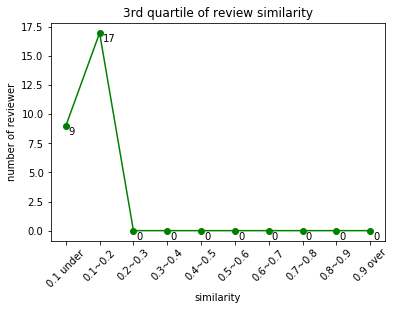

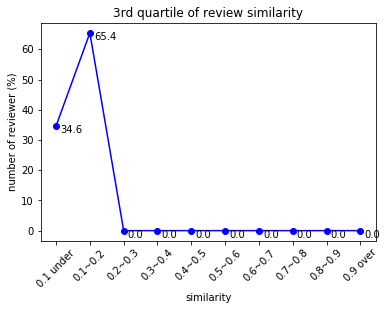

In [388]:
x=[u'0.1 under',u'0.1~0.2',u'0.2~0.3',u'0.3~0.4',u'0.4~0.5',u'0.5~0.6',u'0.6~0.7',u'0.7~0.8',u'0.8~0.9',u'0.9 over']
y=result_len
labels=y

plt.plot(x,y,color='green',marker='o',linestyle='solid')
plt.title('3rd quartile of review similarity')
plt.xlabel("similarity")
plt.ylabel("number of reviewer")
plt.xticks(np.arange(len(x)),x,rotation=45)
for label, x_count, y_count in zip(labels, x, y):
    plt.annotate(label,
                 xy=(x_count, y_count), #label을 데이터포인트에 두되
                 xytext=(3,-9), # 약간 떨어져 있게
                 textcoords='offset points')
plt.show()

x=[u'0.1 under',u'0.1~0.2',u'0.2~0.3',u'0.3~0.4',u'0.4~0.5',u'0.5~0.6',u'0.6~0.7',u'0.7~0.8',u'0.8~0.9',u'0.9 over']
y=result_ratio
labels=y
    
plt.plot(x,y,color='blue',marker='o',linestyle='solid')
plt.title('3rd quartile of review similarity')
plt.xlabel("similarity")
plt.ylabel("number of reviewer (%)")
plt.xticks(np.arange(len(x)),x,rotation=45)
for label, x_count, y_count in zip(labels, x, y):
    plt.annotate(label,
                 xy=(x_count, y_count), #label을 데이터포인트에 두되
                 xytext=(4,-7), # 약간 떨어져 있게
                 textcoords='offset points')
plt.show()

In [389]:
result_len = print_group(u'해당 그룹별 spammer 수', groups_mid, lambda x: x)
result_ratio = print_group(u'해당 그룹별 spammer 비율', groups_mid, lambda x: float("{:.1f}".format(1.0 * (x) * 100 / len(spammer))))

해당 그룹별 spammer 수
('group 1 = 0.0 over 0.1 under : ', 22)
('group 2 = 0.1 over 0.2 under : ', 4)
('group 3 = 0.2 over 0.3 under : ', 0)
('group 4 = 0.3 over 0.4 under : ', 0)
('group 5 = 0.4 over 0.5 under : ', 0)
('group 6 = 0.5 over 0.6 under : ', 0)
('group 7 = 0.6 over 0.7 under : ', 0)
('group 8 = 0.7 over 0.8 under : ', 0)
('group 9 = 0.8 over 0.9 under : ', 0)
('group 10 = 0.9 over 1.0 under : ', 0)


해당 그룹별 spammer 비율
('group 1 = 0.0 over 0.1 under : ', 84.6)
('group 2 = 0.1 over 0.2 under : ', 15.4)
('group 3 = 0.2 over 0.3 under : ', 0.0)
('group 4 = 0.3 over 0.4 under : ', 0.0)
('group 5 = 0.4 over 0.5 under : ', 0.0)
('group 6 = 0.5 over 0.6 under : ', 0.0)
('group 7 = 0.6 over 0.7 under : ', 0.0)
('group 8 = 0.7 over 0.8 under : ', 0.0)
('group 9 = 0.8 over 0.9 under : ', 0.0)
('group 10 = 0.9 over 1.0 under : ', 0.0)




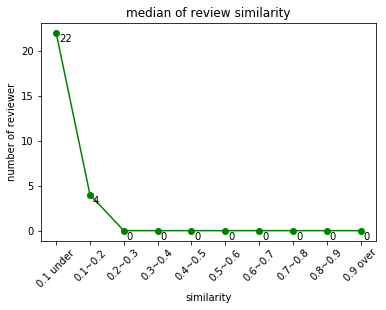

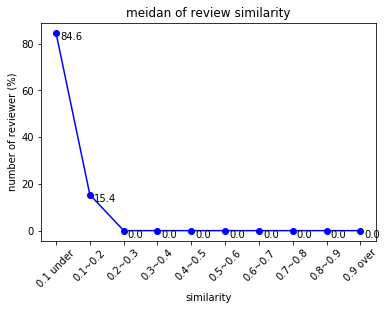

In [390]:
x=[u'0.1 under',u'0.1~0.2',u'0.2~0.3',u'0.3~0.4',u'0.4~0.5',u'0.5~0.6',u'0.6~0.7',u'0.7~0.8',u'0.8~0.9',u'0.9 over']
y=result_len
labels=y

plt.plot(x,y,color='green',marker='o',linestyle='solid')
plt.title('median of review similarity')
plt.xlabel("similarity")
plt.ylabel("number of reviewer")
plt.xticks(np.arange(len(x)),x,rotation=45)
for label, x_count, y_count in zip(labels, x, y):
    plt.annotate(label,
                 xy=(x_count, y_count), #label을 데이터포인트에 두되
                 xytext=(3,-9), # 약간 떨어져 있게
                 textcoords='offset points')
plt.show()

x=[u'0.1 under',u'0.1~0.2',u'0.2~0.3',u'0.3~0.4',u'0.4~0.5',u'0.5~0.6',u'0.6~0.7',u'0.7~0.8',u'0.8~0.9',u'0.9 over']
y=result_ratio
labels=y
    
plt.plot(x,y,color='blue',marker='o',linestyle='solid')
plt.title('meidan of review similarity')
plt.xlabel("similarity")
plt.ylabel("number of reviewer (%)")
plt.xticks(np.arange(len(x)),x,rotation=45)
for label, x_count, y_count in zip(labels, x, y):
    plt.annotate(label,
                 xy=(x_count, y_count), #label을 데이터포인트에 두되
                 xytext=(4,-7), # 약간 떨어져 있게
                 textcoords='offset points')
plt.show()

In [391]:
result_len = print_group(u'해당 그룹별 spammer 수', groups_q1, lambda x: x)
result_ratio = print_group(u'해당 그룹별 spammer 비율', groups_q1, lambda x: float("{:.1f}".format(1.0 * (x) * 100 / len(spammer))))

해당 그룹별 spammer 수
('group 1 = 0.0 over 0.1 under : ', 26)
('group 2 = 0.1 over 0.2 under : ', 0)
('group 3 = 0.2 over 0.3 under : ', 0)
('group 4 = 0.3 over 0.4 under : ', 0)
('group 5 = 0.4 over 0.5 under : ', 0)
('group 6 = 0.5 over 0.6 under : ', 0)
('group 7 = 0.6 over 0.7 under : ', 0)
('group 8 = 0.7 over 0.8 under : ', 0)
('group 9 = 0.8 over 0.9 under : ', 0)
('group 10 = 0.9 over 1.0 under : ', 0)


해당 그룹별 spammer 비율
('group 1 = 0.0 over 0.1 under : ', 100.0)
('group 2 = 0.1 over 0.2 under : ', 0.0)
('group 3 = 0.2 over 0.3 under : ', 0.0)
('group 4 = 0.3 over 0.4 under : ', 0.0)
('group 5 = 0.4 over 0.5 under : ', 0.0)
('group 6 = 0.5 over 0.6 under : ', 0.0)
('group 7 = 0.6 over 0.7 under : ', 0.0)
('group 8 = 0.7 over 0.8 under : ', 0.0)
('group 9 = 0.8 over 0.9 under : ', 0.0)
('group 10 = 0.9 over 1.0 under : ', 0.0)




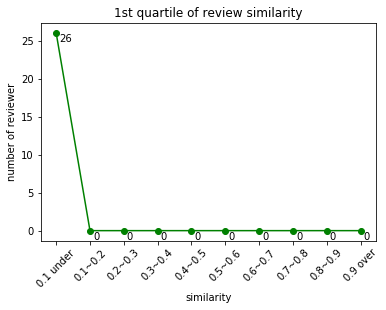

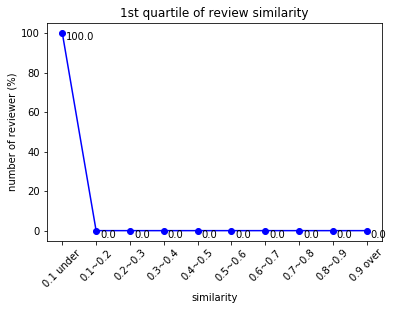

In [392]:
x=[u'0.1 under',u'0.1~0.2',u'0.2~0.3',u'0.3~0.4',u'0.4~0.5',u'0.5~0.6',u'0.6~0.7',u'0.7~0.8',u'0.8~0.9',u'0.9 over']
y=result_len
labels=y

plt.plot(x,y,color='green',marker='o',linestyle='solid')
plt.title('1st quartile of review similarity')
plt.xlabel("similarity")
plt.ylabel("number of reviewer")
plt.xticks(np.arange(len(x)),x,rotation=45)
for label, x_count, y_count in zip(labels, x, y):
    plt.annotate(label,
                 xy=(x_count, y_count), #label을 데이터포인트에 두되
                 xytext=(3,-9), # 약간 떨어져 있게
                 textcoords='offset points')
plt.show()

x=[u'0.1 under',u'0.1~0.2',u'0.2~0.3',u'0.3~0.4',u'0.4~0.5',u'0.5~0.6',u'0.6~0.7',u'0.7~0.8',u'0.8~0.9',u'0.9 over']
y=result_ratio
labels=y
    
plt.plot(x,y,color='blue',marker='o',linestyle='solid')
plt.title('1st quartile of review similarity')
plt.xlabel("similarity")
plt.ylabel("number of reviewer (%)")
plt.xticks(np.arange(len(x)),x,rotation=45)
for label, x_count, y_count in zip(labels, x, y):
    plt.annotate(label,
                 xy=(x_count, y_count), #label을 데이터포인트에 두되
                 xytext=(4,-7), # 약간 떨어져 있게
                 textcoords='offset points')
plt.show()

유사도 분포도 - 유사도 최대값

In [139]:
group1=[]
group2=[]
group3=[]
group4=[]
group5=[]
group6=[]
group7=[]
group8=[]
group9=[]
group10=[]
max_list=[]
_max=0

for i in range(len(spammer)):
    print str(i+1) + str('번째 리뷰어: ')+ str(spammer[i])
    reviews=make_reviews(spammer[i])
    if(len(reviews)<2):
        continue
    vector_array=tfidf(reviews)
    sm=similarity(vector_array, reviews)
    _max=max(sm)
    max_list.append(_max)
    
    if(_max<0.1):
        group1.append(spammer[i])
    elif(_max>=0.1 and _max< 0.2):
        group2.append(spammer[i])
    elif(_max>=0.2 and _max< 0.3):
        group3.append(spammer[i])
    elif(_max >=0.3 and _max < 0.4):
        group4.append(spammer[i])
    elif(_max>=0.4 and _max < 0.5):
        group5.append(spammer[i])
    elif(_max>=0.5 and _max < 0.6):
        group6.append(spammer[i])
    elif(_max>=0.6 and _max < 0.7):
        group7.append(spammer[i])
    elif(_max>=0.7 and _max < 0.8):
        group8.append(spammer[i])
    elif(_max>=0.8 and _max < 0.9):
        group9.append(spammer[i])
    elif(_max>=0.9):
        group10.append(spammer[i])

1번째 리뷰어: asdfg18**
fit_transform, (No.review 59, feature 598)
('min : ', 0.0)
('max : ', 1.0)
('avg : ', 0.0949)
('num of 1 : ', 4)
('# max_cnt : ', 1)
2번째 리뷰어: ghkal04**
fit_transform, (No.review 55, feature 364)
('min : ', 0.0)
('max : ', 0.9306)
('avg : ', 0.113)
('num of 1 : ', 0)
('# max_cnt : ', 1)
3번째 리뷰어: rladmswl9708**
fit_transform, (No.review 308, feature 911)
('min : ', 0.0)
('max : ', 0.4936)
('avg : ', 0.0623)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4번째 리뷰어: leeliast**
fit_transform, (No.review 125, feature 1285)
('min : ', 0.0)
('max : ', 1.0)
('avg : ', 0.0786)
('num of 1 : ', 1)
('# max_cnt : ', 1)
5번째 리뷰어: rhdms10**
fit_transform, (No.review 54, feature 325)
('min : ', 0.0)
('max : ', 0.7973)
('avg : ', 0.1092)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6번째 리뷰어: sally70**
fit_transform, (No.review 63, feature 510)
('min : ', 0.0233)
('max : ', 1.0)
('avg : ', 0.1198)
('num of 1 : ', 4)
('# max_cnt : ', 1)
7번째 리뷰어: m0928hy**
fit_transform, (No.review 61, feature 580)
('min 

In [140]:
len(max_list)

26

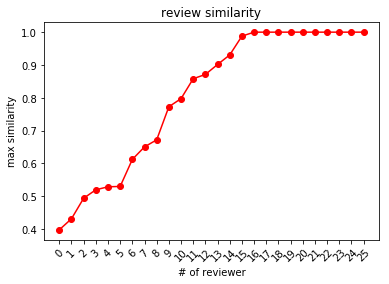

In [142]:
x=np.arange(len(max_list))
y=sorted(max_list)

plt.plot(x,y,color='red',marker='o',linestyle='solid')
plt.title('review similarity')
plt.xlabel("# of reviewer")
plt.ylabel("max similarity")
plt.xticks(np.arange(len(x)),x,rotation=45)
plt.show()

In [119]:
groups=[group1, group2, group3, group4, group5, group6,group7,group8,group9,group10 ]
result_len = print_group(u'해당 그룹별 spammer 수', groups, len)
result_ratio = print_group(u'해당 그룹별 spammer 비율', groups, lambda x: float("{:.1f}".format(1.0 * len(x) * 100 / len(spammer))))

해당 그룹별 spammer 수
('group 1 = 0.0 over 0.1 under : ', 0)
('group 2 = 0.1 over 0.2 under : ', 0)
('group 3 = 0.2 over 0.3 under : ', 0)
('group 4 = 0.3 over 0.4 under : ', 1)
('group 5 = 0.4 over 0.5 under : ', 2)
('group 6 = 0.5 over 0.6 under : ', 3)
('group 7 = 0.6 over 0.7 under : ', 3)
('group 8 = 0.7 over 0.8 under : ', 2)
('group 9 = 0.8 over 0.9 under : ', 2)
('group 10 = 0.9 over 1.0 under : ', 13)


해당 그룹별 spammer 비율
('group 1 = 0.0 over 0.1 under : ', 0.0)
('group 2 = 0.1 over 0.2 under : ', 0.0)
('group 3 = 0.2 over 0.3 under : ', 0.0)
('group 4 = 0.3 over 0.4 under : ', 3.8)
('group 5 = 0.4 over 0.5 under : ', 7.7)
('group 6 = 0.5 over 0.6 under : ', 11.5)
('group 7 = 0.6 over 0.7 under : ', 11.5)
('group 8 = 0.7 over 0.8 under : ', 7.7)
('group 9 = 0.8 over 0.9 under : ', 7.7)
('group 10 = 0.9 over 1.0 under : ', 50.0)




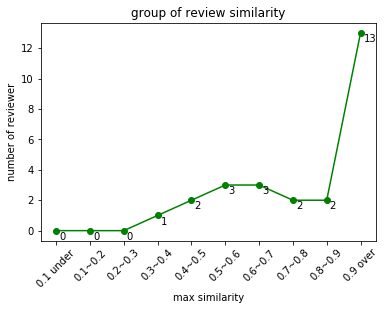

In [120]:
x=[u'0.1 under',u'0.1~0.2',u'0.2~0.3',u'0.3~0.4',u'0.4~0.5',u'0.5~0.6',u'0.6~0.7',u'0.7~0.8',u'0.8~0.9',u'0.9 over']
y=result_len
labels=y

plt.plot(x,y,color='green',marker='o',linestyle='solid')
plt.title('group of review similarity')
plt.xlabel("max similarity")
plt.ylabel("number of reviewer")
plt.xticks(np.arange(len(x)),x,rotation=45)
for label, x_count, y_count in zip(labels, x, y):
    plt.annotate(label,
                 xy=(x_count, y_count), #label을 데이터포인트에 두되
                 xytext=(3,-9), # 약간 떨어져 있게
                 textcoords='offset points')
plt.show()

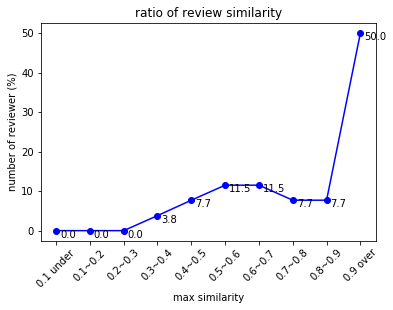

In [113]:
x=[u'0.1 under',u'0.1~0.2',u'0.2~0.3',u'0.3~0.4',u'0.4~0.5',u'0.5~0.6',u'0.6~0.7',u'0.7~0.8',u'0.8~0.9',u'0.9 over']
y=result_ratio
labels=y
    
plt.plot(x,y,color='blue',marker='o',linestyle='solid')
plt.title('ratio of review similarity')
plt.xlabel("max similarity")
plt.ylabel("number of reviewer (%)")
plt.xticks(np.arange(len(x)),x,rotation=45)
for label, x_count, y_count in zip(labels, x, y):
    plt.annotate(label,
                 xy=(x_count, y_count), #label을 데이터포인트에 두되
                 xytext=(4,-7), # 약간 떨어져 있게
                 textcoords='offset points')
plt.show()

In [121]:
group10

[u'asdfg18**',
 u'ghkal04**',
 u'leeliast**',
 u'sally70**',
 u'm0928hy**',
 u'yeji04**',
 u'sejin1**',
 u'yjyim**',
 u'wjswldms0**',
 u'jy03**',
 u'seoa40**',
 u'acua**',
 u'wertyuio9**']

In [150]:
pd.DataFrame((go_data.loc[go_data['cId']=='wertyuio9**'])[['desc','rScore', 'pID','rNo', 'rDate']])

desc  \
71377                                                                                                                                                                                                                                                                                                                                                                                                                                                                   뭐랄까.. 생각보다 핏이 굉장히 애매하고 붕 떠요ㅠ색감도 예쁘고 제질도 좋은데 핏이 아쉽네요   
72424                                                                                                                                                                                                                                                                                                                                                                                                                                                               생각보다 옷이 뻣뻣한 제질이고 핏이 살짝 애매한 면이 있어요길이가 어중간한것같아요! 그래도 무난해요   
73161                                                                                                                                                                                                                                                                                                                                                                                                                                                                장갑 진짜 이쁘고 터치 잘되요!! 싸게 잘 산것 같아서 기분이 좋습니다 따뜻해서 여행갈때 끼려구요   
73162                                                                                                                                                                                                                                                                                                                                                                                                                                                             예뻐요!! 가방이 작아서 이것저것 많이 들어가지는 않지만 가볍게 몇개 넣어다니기에는 좋아요ㅋㅋ 귀여워요   
73163                                                                                                                                                                                                                                                                                                                                                                                                                                                     색이 베이지나 핑크가 더 예쁠것같아요! 그래도 만족합니다 부들부들하고 자주입을것 같아요 목은 안접어입으면 너무 길어요   
73164                                                                                                                                                                                                                                                                                                                                                                                                                                                                  진짜 예뻐요ㅠㅠㅠ 품이 조금 큰편이긴 한데 그래서 안에 많이 껴입을수 있어서 더 따뜻한거같아요   
76455                                                                                                                                                                                                                                                                                                                                                                                                                                                                 엄청 두껍고 따수운데재질이 그렇게 좋은편은 아니에요!근데 그만큼 가격이 싸니까요 ㅎㅅㅎ이뻐요!!   
76652                                                                                                                                                                                                                                                                                                                                                                                                                          

In [148]:
pd.DataFrame((go_data.loc[go_data['cId']=='seoa40**'])[['desc','rScore', 'pID','rNo', 'rDate']])

desc  \
3833                                                                                                                           촉감이 진짜 부들부들하고 안에 바지가 있어서 따로 속바지 입을 필요 없고 편하고 좋아요 색상은 블랙색상이라 베이직해서 더 좋고 플레어 스커트라 핏이 여성여성하고 예뻐요 잘 입을께요 편해요♡   
3834                                                                                                                       이건 진짜 꼭 사야되는 블라우스에요 배송도빠르고 화면보다 더 예뻐요 두껍지도 않은 소재라 여름에 입기 지금 입기 딱 좋아요 색상은 퍼플색이라 여리여리해 보이고 스커트랑 코디해서 입으면 더 예뻐요♡   
3835                                                                                                                          레터링 반팔티 보자마자 겟했어요 색상은 블랙색상이라 편하게 소화하기 쉽고 가격도 착한데 재질이 너무 좋아요 싸구려같지 않은 재질에 한번 더 반했어요 배송도빠르고 짱짱 구매하기 진짜 잘했어요!   
3836                                                                                                                           진짜 원피스가 샤랄라하고요 화면 그대로에요 배송은 빠르고 좋고 다만 시스루에요 안에가 많이 비쳐서 이너 받쳐입고 입어야겠어요 오늘 출근할 때 이너 받쳐입고 출근했는데 예쁨 뿜뿜 만족합니다♡   
3837                                                                                                                       이 스커트 너무 마음에 드는 스커트 진짜 필수템이에요 저번에 구매하고 입었는데 편하고 핏도 예뻐서 이번에 한번 더 재구매했어요 화면 그대로고 블랙색상이라 어디든 소화 잘 되서 더 마음에 들어요!♡   
10410                                                                                                                            배송 진짜 오래 걸렸어요.ㅜㅜ 근데 기다린만큼 옷이 예뻐서 다행이에요 10만원 넘게 주문했는데 이아이만 2주 넘어서 받았네요 같이 주문한 옷들이랑 예쁘게 입을께요 여리여리핏으로 좋아요!   
12571                                                                                                                           이 옷 너무 좋아요 색깔도 예쁜 색상인데다가 사이즈도 제가 원하는 루즈핏으로 청바지에 입어도 예쁘고 반바지에 입어도 완전 예뻐요 마음에 쏙 들어요 구매하기 정말 잘 했어요 빨리 겟하세요♡   
12573                                                                                                                   매일 M사이즈로 구매하다가 이번에는 다이어트 성공해서 S사이즈로 주문 했어요 입었을 때 핏 진짜 예뻐요 색상은 연청이라 여름에 입으면 시원해보이고 굿이쥬 같이 구매한 반팔티에 입으니깐 더 예뻐요 뿜뿜♡   
12574                                                                                                               배송 빠르고 일단 티 자체 면이 너무 좋아요 아토피가 있어서 피부가 민감한데 입었을 때 착용감 좋고 편해요 사이즈도 낙낙해서 루즈핏으로 예쁘고 색상이 그레이라 무난하고 어디에든 잘 받쳐 입을 수 있는 필수템♡   
13797                                                                                                                              베이지색깔이 예쁜 베이지색 반팔티에요 고고싱에서 구매한 청바지에 입으면 예쁨 뿜뿜이에요 사이즈도 넉넉하고 박시해서 핏도 편해보이고 좋아요 매일 입고 싶은 티에요 예쁘게 잘 입을께요♡   
15478                                                                                                                           제가 낭방을 좋아해서 바로 이 아이 보자 마자 구매했어요 다른 체크남방은 핑크로 주문했고 이 아이는 블랙으로 주문했는데 남방 사이즈가 박시해서 루즈핏까지 너무 예쁘고 편해보여서 더 좋아요   
15479                                                                                                                          사이즈도 딱 맞고 색상도 베이지색이라 더 마음에 꼭 들어요 치마에 입으려고 구매했는데 청바지랑 입어도 너무 예쁘더라고요 재질도 좋고 바지나 치마에 다 잘 어울려서 구매하기 잘 한 것 같아요   
15480                                                                                                                   여름에 가볍게 걸칠 체크남방이 필요했는데 고고싱에서 보니깐 너무 예쁜 체크남방 발견해서 바로 구매했어요 핑크색상이 너무 티지 않는 예쁜 색상이라 소화하기 쉽고 안에 티 입고 입으니깐 너무 잘 어울려요♡   
15481                                                                                                                       티 너무 예뻐요 일단 사이즈 낙낙하고 같이 구매한 청바지랑 입으면 진짜 존예에요 마음에 쏙 듭니다 청치마에 입어도 예쁠 것 같아요 어디에든 입기 좋은 티 같아요 화면 보다 더 예뻐요 잘 입을께요   
15483                                                                                                                            신상 원피스 떴길래 보자 마자 바로 구매했어요 색상이나 디자인 화면 그대로고 너무 예뻐요 색깔이 촌스러운 색상이 아니린 더 만족합니다 지금 입기 딱 좋아요 필수템이에요 배송도빠르고 굿♡   
18774                                                                                                     로브를 구입하려고 했는데 고고싱에서 보니깐 너무 에뻐서 바로 주문 했습니다!! 배송빠르고 화면 그대로 너무 에뻐요 안에 나시니트 입고 입으면 진짜 에쁠듯 여리여리핏 짱이에요 근데 사이즈는 작으니 참고 잘 하고 사셔야겠어요^^*   
26208                                                                                                                  아이보리티는 잘 구매 안 하려고하는 편인데 너무 예뻐서 확 질러버렸어요 배송빠르고 옷이 너무 예뻐요 티는 루즈핏은 아니고 옷의 촉감은 보드랍고 좋아요 색상도 아이보리라 쉽게 

In [144]:
pd.DataFrame((go_data.loc[go_data['cId']=='asdfg18**'])[['desc','rScore', 'pID','rNo', 'rDate']])

desc  \
155218                                                                                                                                                                  예쁘네요 하트 귀엽고다만 일짜로 떨어지는게그냥 막대기식으로 고정 돼 있었으면..어땠을까 하는 ㅎㅎ자꾸 꾸깃꾸깃 되는 것 같아서ㅎㅎ 그래도 흔치않고 예뻐용   
155219                                                                                                                                                                                 예뻐요 맘에들어요 막 부담스러운 노출이 아니라서 괜찮은것 같아요 배송도 나름평균적으로 온 것같고! 흰색도 예쁠 것 같아요굿굿!   
300715                                                                                                                          음 생각보다는 별로였아요 약간 쫀쫀한 줄인둘 알았는데 어깨부분에 비해서 밑에는 살짝 라인들아가게만든가같은데 별로였어요 ㅜ 저렴한가격에득템해서 그냥 입으렵니다....! 배송은 조금 늦었지만 그래도 잘 왔어요~~~ 나름 괜찮네용   
300716                                                                                                                                                                                                                                                    예뻐욤   
300717                                          니트 세일하는거중에 이 옷이 제일로 마음에들었어요 진짜 부드럽고 따뜻했어요 묵직한 부드러움이 아닝 가벼운 부드러움과 따뜻함이라서 진짜 좋았아요 색상별로 다 사고싶운 생각이 드네요.. 다른 니트 말고 이 나트를 색상별로 살걸 그랬는 후회중이네요! 고고싱 옷은 많은 옷들이 어깨선이 밑으로 쳐져서 더 붕떠보인 느낌이 들어서요.. 그렇지 않은 옷중에 괜찮은 옷입니다 이옷!   
300720                                                                                                    모델이 입은거 보고 샀는데 생각보다 크네요... 많이 큰느낌 ! 그래도 묵직하니 따뜻할거 같긴 해요 색상도 따뜻해 보이고 마음에 드네요~ 이옷에 저렴한 가격으로 득템해서 좋네요~~ 다만 어깨부붐이 밑으로 안내려오고 사이즈별로 어깨넓이에 맞춰져있으면 합니다 ㅜㅜ..   
300721                                                                                                                         귀엽네용 잘산가같아용~ 지금은 너무더운.. 가을에 잘 입겠습니다 이정도 퀄리티에 저렴하게 갯 한것같어요 따뜻할거같아요 귀엽기도 하고요 예쁘게 잘 입겠습니다!!!! 배송은 조금 느렸지만 저렴하게 예쁜옷 받아서 좋네요 감사합니다~   
300722                                                                                                                예쁘네요 나름 색상이~ 근데 어찌보면 살짝 촌스러워 보이기도 하고.. 파랑 입어보고 예뻐서 샀는데 흠... 그래도 저렴항 가격에 득템했어용! 잘  매치해서 입으면 예쁠것같기도 하네용!!! 색상이 더 다양하고 재고도 많았으면 좋았을것같았습니다!   
300723                                                                                                                   길이감도 예쁘고 색상도 마음이 드는데 통이 너무넓어서 아쉬웠습니다..그래서 저는 수선집에 보냈어요~ 후기는 수선 안한 상태고요! 거의 옷값만큼 주고 수선하네용 ㅋㅋ 그래도 다른부분은 다 마음에 들어서 만족합니다 !! 통이 많이 넓어요~~   
300724                                                                                                   와 멜빵팬츠에 입으니까 진짜 예뻐요 다림질 해서 입으니까 여성스러우면서도 저렴한 가격에 득템했네요! 사진에는 많이 뀨겨져서 별론데 진짜 예뻐요! 근데 흰나시 입고 입으면 속옷으 조금 비춰서... 그게 고민이지만 너무 예뻐용 멜빵팬츠에 입으니 잘 보이지도않고 딱이네용   
300725                                                                                                                         오 생각보다 예쁘더라고요.. 세일도 많이하고 후기에 구겨져있어서 별로겠거니 하고 처음 입었늘때는 별로였어요.. 근데 다림질 하고 멜빵팬츠에 입으니까 여성스러눠보이면서도 너무 예뻤어요!!! 두가지 색상샀는데 다른색조 사고싶네오!   
300726                                                                                                                         하얀색 사고 괜찮아서 검정색 구매했어요~ 괜찮네요 약간 어깨부분이 살짝 인위적인거랑 제 살때뭄에 아쉽지만..흰색보다는 덜 부담스러운 느낌이네여 추천해요~~ 살좀 더 빼고 입어야 겠아용 ㅋㅋㅋㅋ 위에 원피스를 입어도 예쁠거같네요   
300727                                                                                                   배송은 좀 걸렸어요~~ 그래도 박스에 잘 포장해주셨어요~~~ 클렌젱티슈 목록에는 찍혀있는데 안보내주셨더라고요 ㅎㅎ.... 이거 예뻐요~~ 길이감도 괜찮고 밑위길이도 괜찮아요! 귀여워보이고 다만.. 끈이 자꾸 옆으로 질질 내려가뇨...그걸 좀 보완만 하면 진짜 좋아용   
313444                                                                                                                     화이트 괜찮네요 얇아서 덥지 않을듯합니다그래도 비침은좀 있을거같아서 튀는속옷은안될듯 합니다! 약간 무늬들어간 재질같이요~ 전에 산 레이온티는 육안으로 봤을때는 면같아보얐는데~ 그래도 부들부들해요! 추천합니다!!' 기본티로 딱입니다!!   
313446                                                                          예뻐요 약간 러블리하면서 근데 ㅋㅋㅋ 부모님께서는 좀...별로라 하시네요.. 그래서 그런지 긴가민가...예쁜듯 하면서!!! 그래도 후회는 안합니다!!! 만족해요~~ 요즘 유행인것 같더라고요! 여성스러워 보이길래샀는데 괜찮아요 재질이 좀 두꺼워서 더울듯 하지맘 그래도 괜찮아요 그레이색상인데약간 블루계열같아요~~   
313449                                                                                                                좋아여 레이온티 입어보고 만족해서 

In [127]:
(go_data.loc[go_data['cId']=='asdfg18**'])['rScore'].mean()

5.0

In [151]:
pd.DataFrame((go_data.loc[go_data['cId']=='ghkal04**'])[['desc','rScore', 'pID','rNo', 'rDate']])

desc  \
39749                                                                                                                        기본티 핑요해서 주문했어요 이번에는 주문폭주라서 그런지 배송이 조금 느렸지만 그래도 만족해요!!소재도 좋아요   
39750                                                                                                              기본티 핑요해서 주문했어요 이번에는 주문폭주라서 그런지 배송이 조금 느렸지만 그래도 만족해요!!흔한 브라운색도 아니여서 이뻐요   
39751                                                                                                                         기본티 핑요해서 주문했어요 이번에는 주문폭주라서 그런지 배송이 조금 느렸지만 그래도 만족해요!!옷도 이뻐요   
39752                                                                                        키가 165인데 품절이라서 170으로 주문했는데 바지 길어서 진짜 좋아요 조금긴감이 없지않아있는데 발목부분 롤업해서 입으니깐 이쁘고 바지가 짱짱해서 너무 좋아요 ㅜㅜ   
39753                                                                                             주문이 많아서 그랬는지 이번에는 배송이 늦게왔네요 ㅠㅠ여행갈때 입고싶었는데 못입어서 많이 아쉬웠습니다근데 옷자체는 이뻐요 다음에는 더 여유있게 주문해야겠어요   
79533                                                                                                                        이가격에 이런코드라니 진짜 좋아요 ㅋㅋㅋ약간 큰감이 있긴한데 원래 오버사이즈 옷을 좋아해서핏도 괜찮고 좋아요   
79535                                                                                              믿고주문시키는 고고싱!! 사이즈도 괜찮고 기장도 괜찮고재질도 따뜻한재질이라서 요즘같이 추울때 입기에도괜찮았어요ㅎㅎ가격도 저렴해서 다른색상 또 구입하고싶어요   
79536                                                                                                                     믿고주문시키는 고고싱!! 사이즈도 괜찮고 기장도 괜찮고재질도 따뜻한재질이라서 요즘같이 추울때 입기에도괜찮았어요ㅎㅎ   
80249                                                                                                                      전에 구매했었는데 너무 맘에 들어서 또주문했어요이번에는 남자친구 선물로 줬는데 남자친구가 입기에도넉넉하고 이뻐요   
80250                                                                                                          고고싱 주문했던적 여러번인데 배송은 믿고 주문해요이가격에 이코트라니 ㅜㅜ 재질좋고 따뜻해요약간 큰감이 있는데 넉넉한거 좋아해서 좋아요   
80251                                                                                                                     배송빨리왔어요!! 남자친구 선물주려고 샀는데 사이즈 넉넉하고 기모있어서따듯하고 좋아요 다른색상으로도 구매해야겠어요   
80252                                                                                          고고싱 여러변 시켰었는데 배송은 진짜 만족이에요일요일도 배송하는 고고싱이라고했는데 진짜인것같아요 ㅋㅋㅋ옷자체가 재질도 좋고 핏도 이쁘고 여성스러운느낌이라서 좋아요   
80285                                                                                                             배송되게 빨리왔어요 고고싱에서 주문많이했었는데배송으로인해서 고민한적 한번도 없어요 ㅋㅋㅋ니트좋아하는데 핏도 이쁘고 재질도 좋아요   
80793                                                                                       배송진짜 빨라요 고고싱에서 옷 많이 주문했었는데 배송은 진짜 믿고 주문해요 ㅋㅋㅋㅋ기모맨투맨인데 진짜 두툼해요 재질도 부드럽고자주입게돼요!! 다른색상 더 구매하고싶어요   
80824                                                                                                      배송진짜 빨라요 고고싱에서 옷 많이 주문했었는데 배송은 진짜 믿고 주문해요 ㅋㅋㅋㅋ기모맨투맨인데 진짜 두툼해요 재질도 부드럽고자주입게돼요!!   
109528                                                                                                          고고싱배송은 믿고시켜요 ㅋㅋ옷이 되게 넉넉해요 평소에 넉넉한 핏좋아해서딱좋았어요 커플티로 입고있는데 남자친구입기에도 사이즈도 좋아요   
110711                                                                                                           다른가디건들이랑 다른핏인데 제가 딱원하는 핏이예요길이가 조금 짧은점이 아쉬운데 넉넉한 사이즈에두깨도 두꺼워서 추울때도 좋을것같아요   
110713                                                                                 진짜 이름 그대로 천국바지ㅜㅜㅜㅜㅜ고고싱은 배송도 빠르고 여러번 입었는데도 아직도 짱짱해요 그전에 고고싱에서 바지 몇개샀었는데너무 편하고 맘에들어서 주문했는데 역시 좋아요 ㅜㅜ   
113446                                                                       커플티로 입으려고 2개샀는데 박시한스타일이라서남자친구가 입었을때도 핏이 이쁘고좋다고 이런스타일로 더 사달라고했어요입었을때 진짜편하고 이뻐서 엄청 자주입는 옷이에요나중에 다른색으로도 더 사야겠어요   
122693                                                          전에 다른천국바지 주문했었는데 너무 맘에 들어서 이번에도 주문했어요 주문한지 하루만에 배송도 오고 빠른배송 너무 좋아요 ㅜㅜㅜㅜ제 신체사이즈이신분들 s사지면은 될것같아요약간 딱맞는느낌이긴한데 몇번입으면은 될것같아요!!   
122694                                                  반팔버젼으로 나온것도 주문했었는데 옷 너무 맘에들었는데같은디자인인데 맨투맨으로 나와서 고민안하고 주문했어요 주문한지 하루만에 배송오고 완전 좋아요 ㅎㅎㅎ기장도 길고 박시해서 나중에 레깅스랑 입어도 되고청바지에도 입고 자주입을것같아요   
122695                 

In [133]:
pd.DataFrame((go_data.loc[go_data['cId']=='leeliast**'])[['desc','rScore', 'rNo', 'rDate']]).head(20)

desc  \
1700                                                                                                                                         요즘 연보라가 유행이라길래 색별로 샀네요 저는 연보라하고 안어울리는 얼굴이지만 옷이 이쁘다는 소리는 많이 듣네요   
1701                                                                                                                                                 좋네요, 데일리하게 입기 좋고, 마음에 들어요. 베이지 라서 치마나 바지 둘다 이쁘게 잘 어울려요   
1702                                                                                                                                              그냥 이냥 저냥 입고 다니기 좋고 여성스러워 보여요. 다들 저한테 차분해졌다고 하네요 ㅎㅎ 만족합니다.   
3529                                                                                                                                                   블랙티 하나쯤은 있어야죠. 그래서 샀어요 가격이 좋아서 총 세장을 구매했네요. 마음에 들어요.   
3530                                                                                                                                            흰티는 뷔스티에 원피스나 바지 스커트 아무데나 걸쳐입어도 예뻐요. 저는 체크 스커트에 곁들여 입을 거에요.   
3531                                                                                                                                                    그냥 데일리 티에요 좋아요. 머스타드 컬러인데 검은색 바지에 간단하게 입기 좋고 예뻐요...   
3532                                                                                                                                                  그냥.. 사진 처럼 딱 저렇게 입으려구요.. 저걸 노리고 샀어요 단발인데 시원시원해보이고 좋아요   
3533                                                                                                                                            말그래도 여리여리해보여요. 근데 몇명은 누추해보인다 하더라구요 그건 제 볼륨감이 빈약해서... 예뻐요 근데   
3534                                                                                                                                            한여름에 노랑노랑 밝은 컬러를 입어야지 밝아보이고 예뻐보이고 좋잖아요. 이거 입으니까 많이 깨발랄해보이네요   
3535                                                                                                                                                   널널하고 이뻐요 데일리로 입고나가기 좋아요 사진하고 똑같구요 뷔스트에 원피스 하나쯤은 있어야죠   
3536                                                                                                                            사진처럼 밝진 안아요. 저거보다 한톤 더 탁하고 어두운데. 실제로 밝은날 야외 나가보니까 밝네요. 저렇게 보여요 마음에 들고 이쁩니다.   
3537                                                                                                                                       벨트없어서 시켰는데 쓸만해여, 딱 데일리로 숏팬츠에 같이 입기 좋네요. 추천합니다. 모두가 아시는 딱 그 벨트에요.   
5197                                                                                                                                                 이번에 블라우스 산것들이 다 얇고 비쳐서 속옷 가리려고 샀는데 가격도 좋고 완전 대 만족입니다!!   
5198                                                                                                    딱 보면 약간 할머니옷 패턴 같은데 진짜 실물 갑ㅜ 분위기 갑ㅜ 단발이라서 이 옷 입을땐 가발 써야겠어요! 진짜 긴머리 웨이브에 흑발에다 이 블라우스랑 치마 입으면 여신미 뿜뿜!   
5200                                                                                                                               이뻐요! 일반 반바지에 입어도! 치마나 뷔스티에 원피스에 입어도 짱이뻐요ㅜㅠ 완전 데일리로 굿굿! 완전 강추입니다! 가격대비 굿!   
5201                                                                                                              포토후기 다신 한분 전신샷안나왔으니ㅡ제가 포토후기 1등!ㅎㅎ정말 이뻐요!! 강추입니다! 베이지보단 연노랑인데 그래서 더 여리여리매력적인고 같아요!! 짱이뻐요ㅠㅠ   
5204                                                                                            이뻐요! 근데 약간 시스루? 얇고 비쳐서 안에 살하고 속옷 가까이서 보면 다 보여요! 안에 뭐 입고 입어야 할듯! 근데 레알 이쁩니다ㅠ 강추! 친구랑 나눠입었는데ㅜ 긴머리에 입으면 청순여신ㅜㅜ   
5205                                                                                                                                               찰랑이고 데일리로 입기 정말 좋아요! 완전 만족! 가격보다 두배 더 비싸도 살정도로 나름 고퀄입니다!   
5206                                                                           앞분 전체사진 안나왔으니 제가 포토후기 선착 1등! (적립금 4000원) 맞죠?! 전형적인 흰색 반팔! 골지라서 뭔가 타이트 할거 같지만 타이트 하지않고 핏은일반 티셔츠핏! 부드럽고! 좋아요! 근데 얇아서 조금 비쳐욤!ㅎㅎ   
5207  포토후기 1등 입니다!! ㅜ오늘 부터 선착 포토후기 1등은 적립금 4000원 입니당!ㅎㅎ 이제 

In [145]:
pd.DataFrame((go_data.loc[go_data['cId']=='sally70**'])[['desc','rScore', 'pID','rNo', 'rDate']])

desc  \
612026                                                                                                                                                                                                                                                                                                                                                                                  가격대비갠츈- 키, 몸무게-착용사이즈-착용후느낌은?(좋은점/나쁜점)재질두갠찮구입어봣을때핏두이쁘구가격대비로는갠차는상품이라구생각합니다!   
612027                                                                                                                                                                                                                                                                                                                                                                     음- 키, 몸무게-착용사이즈-착용후느낌은?(좋은점/나쁜점)배송오자마자 입어봣는데 솔직히기대이하에요핏두그다지안나오고 배송도매우늦었구이번엔주문실패인거같네여ㅜㅜ   
612029                                                                                                                                                                                                                                                                                                                                                 진짜커요!- 키, 몸무게-착용사이즈 엘-착용후느낌은?(좋은점/나쁜점)원래바지나온것중제일큰거사입는편인데이건평보니 크다구해서 엘시켯더니 그거마저두크네여핏은그저그래요그래두이쁜벨트두주시구잘입어볼게요   
612030                                                                                                                                                                                                                                                                                                                                                              흠- 키, 몸무게-착용사이즈-착용후느낌은?(좋은점/나쁜점)제사이즈주문했는데 먼가작게나온느낌이드렀어요바지는정말이쁜데막상입으면 그렇게핏이이쁘진않네요배송두무지늦고말이져^^;   
612031                                                                                                                                                                                                                                                                                                                                            음..- 키, 몸무게-착용사이즈 250-착용후느낌은?(좋은점/나쁜점)업뎃되자마자이뻐보여서 바루질럿는데정사이즈보단작게나왓단느낌이들었어요ㅠㅠ제발볼이워낙넓어서 신발신을때하구신구나서너무아파서걍엄마드렷어요..   
612032                                                                                                                                                                                                                                                                                                                                        조아용!- 키, 몸무게-착용사이즈-착용후느낌은?(좋은점/나쁜점)사기전에 그다지필요없다싶어서살까말까고민햇는데사고나니 사길잘했단생각이들엇어요!먼가 세척을하고나면 렌즈가 말꼼해진느낌이들구낄때두갠찮앗어요! 잘쓸게여   
613062                                                                                                                                                                                                                                                                                                                                                                        조아어- 키, 몸무게-착용사이즈M-착용후느낌은?(좋은점/나쁜점)옷이넉넉해서조앗어요먼가무난하게아무바지나치마에도어울릴거같구배송이느려서 그렇지 옷은이쁨니당   
613250                                                                                                                                                                                                                                                                                                                                                           포토후기2등!- 키, 몸무게-착용사이즈-착용후느낌은?(좋은점/나쁜점)생각보다 작았어요바지가ㅠㅠ큰거시켜서그나마다행이네요모델언니핏나올라믄살빼야겟슈요컷팅이너무이뿌네요잘입을게요ㅎㅎ   
617476                                                                                                                                                                                                                                                                                                            드디어도착!- 키, 몸무게175-착용사이즈XL-착용후느낌은?(좋은점/나쁜점)드디어배송와서 기쁜마음에뜯어서입어봤는

In [136]:
pd.DataFrame((go_data.loc[go_data['cId']=='yjyim**'])[['desc','rScore', 'rNo', 'rDate']])

desc  \
155339                                                                                                                                                                                                                                                                        옷이 신상으로 올라오자마자 구매했어요! 바지 핏도 너무 예쁘고 색도 너무 마음에 들어서 질러버렸습니다! 실제로 입으니까 바지 핏이 모델만큼은 아니어도 너무 예뻐요!! 상의도 뒷부분이 뚫려있어 조금 걱정했는데 걱정할만큼 뚫려있진않더라구여!!! 너무 예뻐요ㅠㅠㅠㅠ 진짜 실물이 훨씬 예쁘고 입으면 아주 시원해요!! 짱짱!!!!!   
155340                                                                                                                                                                                                                                                                                                                 갈색 원피스라니 봄가을에 입으면 이쁠것 같아 구매하였습니다! 실물이 너무 이뻐요 ㅠㅠ 이 옷 입고 많은 사람들에게 예쁘다는 얘기 많이 들었어요! 어깨 끈도 묶기 편하고 너무너무 좋아요! 옷 핏도 예쁘고 자주 입을것 같아요 >_< 마구마구 구매하세요!!   
155341                                                                                                                                                                                                                                                                                                                 편하게 입으려고 구입했는데 생각보다 가슴쪽은 딱맞고 어깨 끈은 자꾸 흘러내리네요 ㅠㅠ 끈이 자꾸 내려와서 좀 불편하긴 한데 길이도 적당히 길고 편해서 입기는 좋네요! 흰색 티셔츠랑 입어도 괜찮고 검정색 티셔츠랑 입어도 이쁜것 같아요! 후회는 없습니다!   
168746                                                                                                                                                                                                                                                                                                    저는 네이비로 주문했어요! 흰색이 더 예뻐보이긴 했는데 피부가 까매서 더 까매보일까봐도 그렇고 주문 지연되서 오래걸리더라구요 ㅠㅠ 그래서 그냥 네이비로! 무난하게 이쁜것 같아요~ 근데 아무래도 목부분에 리본이 있다보니 목부분이 쳐지는건 있어요! 이점 유의하셔서 구매하세요~~   
168747                                                                                                                                                                                                              피부가 까만편이라서 노란색으로 사면 더 까매보일까봐 검정색으로 주문하려다가 봄이랑 너무 어울리는 색이라 엄청 고민하다가 노란색으로 주문했어요!생각보다 피부가 많이 까매보이지도 않고 예쁜 노랑이었어요!!근데 속치마가 없다보니까 검정색 속바지를 입으면 비치더라구요 ㅠㅠ 그래서 저는 살색 속바지 입고 슬립원피스 입고 입었어요! 아무래도 밝은 색상이다보니 비치는 점 참고하셔야 할 것 같아요! 그래도 가격에 비해 고급져보이고 이뻐요!   
168749                                                                                                                                                                                                                                                                                                                     데일리 린넨남방 분홍색으로 주문했어요!근데 생각보다 많이 얇고 많이 짧아요 ㅠㅠ일반 바지랑 입었더니 많이 짧아서 자꾸 속에 입은 옷이 보이더라구요 ㅠㅠ 하이웨이스트 바지랑 입으면 좋을 것 같아요! 그래도 저렴한 가격에 이정도면 좋은 것 같아요!   
283284                                                                                                                                                                                                                                                                                                                                                      보자마자 이건 가을에 입어야해! 이 색은 가을에 입기 위해 나온거야! 라고 생각하고 샀어요~ 세트인 장점도 있고 세트인것에 비해 가격도 저렴하고! 입었을때 편해서 자주 입을 것 같아요~   
283285                                                                                                                                                                                                                                                                                                                                                               원래 카라멜 색만 사려고 했는데 그레이도 너무 이뻐서 그냥 두개 다 사버렸어요! 니트랑 치마 둘다 니트소재고 둘다 생각했던것 보다 짱짱해서 오래 입을 수있을 것 같아요!   
283286                                                                                                                                                                                                                                                                                                       다른 곳에서 똑같은 옷을 팔았었는데 거기는 너무 비싸서 못샀어요 ㅠㅠ 고고싱에 같은 옷이 싼

In [137]:
pd.DataFrame((go_data.loc[go_data['cId']=='jy03**'])[['desc','rScore', 'rNo', 'rDate']])

desc  \
1302                                                                                                                                                                                                                                              소라색이랑 같이 샀는데 왠지 라벤더가 더 큰거 같아요ㅋㅋㅋ 그래서 좀더 덩치가 커보이는거 같기도 하고 근데 색깔은 예뻐요! 청바지나 흰바지 다 잘 어울릴것 같아용   
1304                                                                                                                                                                                                                                                      소라색 색깔 완전 예뻐요! 톤다운?된 소라색이라 여기저기 입기도 좋고 청바지에 입으면 찰떡이네요ㅠㅠ 흰색 반바지에 입어도 이쁠 것 갗아요 잘입을게용   
1305                                                                                                                                                                                              보자마자 꽂혀서 산건데 반품고민중이예요ㅠㅠ 원래 평소에 원피스 안입고 특히나 꽃무늬는 더더욱 안입는데 너무 예뻐서 샀거든요 근데 저랑 안어울리는거 같고 제가 어깡이라 그런지 어깨가 좀 끼네요ㅋㅋㅋㅋㅋ 고민좀 해봐야겟어요ㅠㅠ 옷은 진짜진짜 이뻐요!!   
1306                                                                                                                                                                                                                                                       생각보다 누렇네요ㅠㅠ 크림보다는 뭐라해야하지.. 누런색??이라해야하나ㅋㅋㅋㅋ재질은 찰랑찰랑하고 편하고 시원한데 색이 약간 달라서 야악간 실망햇어용   
1307                                                                                                                                                                                                                                 이바지 완전 저를 위한 바지인가봐요ㅠㅠㅠ 평소 사이즈대로 시켰더니 딱 잘 맞고 편하고 색깔도 진짜 이뻐요 길이도 딱 제가 좋아하는 길이고 편하고 흠잡을데가 없네요ㅠㅠ 완전 잘입을게요ㅠㅠ   
1308                                                                                                                                                                                                                     뭔가 제가 예상햇던거랑은 좀 다르네용 색깔도 상세컷보다 더 하얀 연청이고 재질도 사진은 빳빳해보였는데 실제론 흐물흐물해여 그런데 그래도 이뻐서 그냥 입으려구요ㅋㅋㅋ 사이즈도 딱맞고 에이라인이라 편하구 조아요   
1309                                                                                                                                                                                                                                                               그동안 들고다니던 까만 가방이 너무 낡아서 새로 샀는데 크기도 딱 제가 원하던 사이즈고 깔끔하고 예뻐요ㅠㅠ 놀러갈때 잘 들고다닐게용   
2014                                                                                                                                                                                   이거 그냥 보는거보다 입은게 더 이쁘네요!! 솔직히 안입고 그냥 봤을땐 뭔가 후줄근해보여서 반품각이다 이러고 있었는데 입어보니 전혀 그렇지도 않고 시원하고 이뻐요!! 나시가 많이 파지긴 했는데 완전 가성비좋게 잘 산거같아여ㅠㅠ 역시 옷은 입어봐야 합니당 잘ㄴ입을게요!   
2538                                                                                                                                                                                                                             베이지랑 크림이랑 같이 샀는데 색차이가 거의 없어요ㅋㅋㅋㅋ처음엔 받아보고 똑같은거로 두개 보내주신줄... 베이지가 제 생각보다 좀 밝네요 그래두 이뻐서 둘다 입으려구요 베이지는 첨인데 예뻐요!   
2544                                                                                                                                                                                                                                       크림색 치마는 처음 사보는데 예뻐요! 너무 하얘서 부담스럽거나 하지도 않고 위에 무슨 티를 입든 다 잘 어울릴 것 같아요 사이즈도 편하게 잘맞네요! 가을까지 잘 입을것 같아요   
2545                                                                                                                                                                                                                                             검은색 무지티는 많은데 레터링이 하나도 없어서 샀어요! 편하게 가격만큼 입을 수 잇을 것 같아요 목부분도 짱짱하고 잘하면 내년에도 입을 수 있을거같아요 잘입을게요!   
2557                                                                                                                                                                                                                                              생각보다 크기가 크네요! 집에 있는 에코백들 중에 젤 큰거같아요ㅋㅋㅋ 끈이 포인트돼서 너무 귀엽고

In [146]:
pd.DataFrame((go_data.loc[go_data['cId']=='sejin1**'])[['desc','rScore', 'pID','rNo', 'rDate']])

desc  \
196680                                                                       봄에입기에 괜찮은거같아요~~~~! 트임도 너무 예쁘고 옷ㄱ도 마음에들어서 자주자주입을것같아요!!!!!!!!! 넘 넘 넘 맘에들고 엄마도 예쁘다거하고 남자친구도 잘어울ㅇ인다고해서 기부니가좋아요~~~ 추천합니다 꼭사세용~~   
234743                                                   가격 대비 질도 좋고 무난하고 그래서 어디서나 어떤옷에나 잘 매칭할 수 있을 것 같고, 세일해서 현명하게 필요한 것 잘 알뜰하게 산 것 같아요 ㅋㅋㅋㅋㅋㅋ 세일 자주자주 했으면 좋겟구여 옷 예뻐ㅛ요~~~ 이제는 고고싱아닌데서는 옷을 못 사겠어요 ㅋㅋㅋㅠㅎ   
234744                                                 가격 대비 질도 좋고 무난하고 그래서 어디서나 어떤옷에나 잘 매칭할 수 있을 것 같고, 세일해서 현명하게 필요한 것 잘 알뜰하게 산 것 같아요 ㅋㅋㅋㅋㅋㅋ 세일 자주자주 했으면 좋겟구여 옷 예뻐ㅛ요~~~ 이제는 고고싱아닌데서는 옷을 못 사겠어요 ㅋㅋㅋ ㅎㅎㅎ   
234745                                                    가격 대비 질도 좋고 무난하고 그래서 어디서나 어떤옷에나 잘 매칭할 수 있을 것 같고, 세일해서 현명하게 필요한 것 잘 알뜰하게 산 것 같아요 ㅋㅋㅋㅋㅋㅋ 세일 자주자주 했으면 좋겟구여 옷 예뻐ㅛ요~~~ 이제는 고고싱아닌데서는 옷을 못 사겠어요 ㅋㅋㅋㅎ   
234746                                                     가격 대비 질도 좋고 무난하고 그래서 어디서나 어떤옷에나 잘 매칭할 수 있을 것 같고, 세일해서 현명하게 필요한 것 잘 알뜰하게 산 것 같아요 ㅋㅋㅋㅋㅋㅋ 세일 자주자주 했으면 좋겟구여 옷 예뻐ㅛ요~~~ 이제는 고고싱아닌데서는 옷을 못 사겠어요 ㅋㅋㅋ   
251364                                                                 지금입기는 좀 얇은감이 없지않아 있지만 싼가격에 잘 산ㅅ거같아서 기분이 좋네요ㅋㅋㅋㅋㅋㅋ 질도 괜찮고 핏도 예쁘고 만족만족입니당 ㅎㅎ 너무 맘에들어욤 친구들도 예쁘다고하고 남자친구도 예쁘다고해줘서 더 좋아욬ㅋㅋㅋㅎ휴ㅎㅋㅋㅋㅋㅋㅋㅋ   
251365                                                                     지금입기는 좀 얇은감이 없지않아 있지만 싼가격에 잘 산ㅅ거같아서 기분이 좋네요ㅋㅋㅋㅋㅋㅋ 질도 괜찮고 핏도 예쁘고 만족만족입니당 ㅎㅎ 너무 맘에들어욤 친구들도 예쁘다고하고 남자친구도 예쁘다고해줘서 더 좋아욬ㅋㅋㅋㅋㅋㅋㅋㅋㅌ   
251366                                                                지금입기는 좀 얇은감이 없지않아 있지만 싼가격에 잘 산ㅅ거같아서 기분이 좋네요ㅋㅋㅋㅋㅋㅋ 질도 괜찮고 핏도 예쁘고 만족만족입니당 ㅎㅎ 너무 맘에들어욤 친구들도 예쁘다고하고 남자친구도 예쁘다고해줘서 더 좋아욬ㅋㅋㅋㅋㅋㅋㅋㅋㅎㅎㅎㅎㅎㅎ   
251367                                                                   지금입기는 좀 얇은감이 없지않아 있지만 싼가격에 잘 산ㅅ거같아서 기분이 좋네요ㅋㅋㅋㅋㅋㅋ 질도 괜찮고 핏도 예쁘고 만족만족입니당 ㅎㅎ 너무 맘에들어욤 친구들도 예쁘다고하고 남자친구도 예쁘다고해줘서 더 좋아욬ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅎㅎ   
251368                                                                   지금입기는 좀 얇은감이 없지않아 있지만 싼가격에 잘 산ㅅ거같아서 기분이 좋네요ㅋㅋㅋㅋㅋㅋ 질도 괜찮고 핏도 예쁘고 만족만족입니당 ㅎㅎ 너무 맘에들어욤 친구들도 예쁘다고하고 남자친구도 예쁘다고해줘서 더 좋아욬ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ   
266952                                                                 저번에 엄마가 다크블루를 구매하시고 가격대비 괜찮다고 하셔서 색깔별로 샀어요~~  백화점옷같다고(?)ㅋㅋㅋㅋㅋㅋㅋㅋ 전혀 이 가격  같지않으시대요~~ㅋㅋㅋ만족만족하셔섶저도 덩달아 기분좋네요~~^^ㅋㅋㅋㅋㅋ 앞으로 자주애용할게요ㅎㅎ   
266953                                                            저번에 엄마가 다크블루를 구매하시고 가격대비 괜찮다고 하셔서 색깔별로 샀어요~~  백화점옷같다고(?)ㅋㅋㅋㅋㅋㅋㅋㅋ 전혀 이 가격  같지않으시대요~~ㅋㅋㅋ만족만족하셔섶저도 덩달아 기분좋네요~~^^ㅋㅋㅋㅋㅋㅋㅋㅋㅌㅋㅋㅌㅋ앞으로 자주애용할게요   
266954                                                                   저번에 엄마가 다크블루를 구매하시고 가격대비 괜찮다고 하셔서 색깔별로 샀어요~~  백화점옷같다고(?)ㅋㅋㅋㅋㅋㅋㅋㅋ 전혀 이 가격  같지않으시대요~~ㅋㅋㅋ만족만족하셔섶저도 덩달아 기분좋네요~~^^ㅋㅋㅋㅋㅋ 앞으로 자주애용할게요   
266955  포토후기 1등인가요!!!!!!!!!! 오늘와서 그냥 시착용해봤는데 허리도 딱이고 길이도 적당한거같아요 ㅋㅋㅋㅋㅋ 근데 골반이 뭔가 넘 쨍기고 골반이 없어보이는거같지만 ㅠㅠ 디자인은 예뻐요~~~ 무난해서 어떤옷아랑도 잘어울릴거같고 너무너무 맘에 들어요!!! ㅋㅋㅋㅋㅋㅋㅋㅋ 앞으로도 허리사이즈 작은거좀 마니 업뎃해주세요 ㅠㅠㅠㅠ 넘 ㅌ커요...   
269119                                                                 엄마가 입는다고 해서 산건데 아주 맘에 들어히시고 사이즈도 딱이래요~~~ 맘에든다해서 저도 기분좋아요 고고싱역시 질도 좋고 사이즈도 딱이고 핏도 엄청엄청예뻐ㅓ서 맘에들ㅇㅓ요!!!! 색도 딱 세련돼서 맘에 넘넘ㄴ먼ㅁ넘 들어요 ~~~   
282716                                                               허리가 조금 크긴하지만 핏도 예쁘고 길이도 적당하고 싼가격에 잘 산거 같아요!!~~~ 친구들도 예쁘다하고 만족스런 구매였어요^^~~~ 다른쇼핑몰에선 이제 못사겟어요 ㅠㅠㅋㅋㅋㅋㅋ고고싱넘나 만족스러워욤 ㅎㅎㅎ 가격도 착하고 옷도 예뻐용   
282717                                                               허리가 조금 크긴하지만 핏도 예쁘고 길이도 적당하고 싼가격에 잘 산거 같아요!!~~~ 친구들도 예쁘다하고 만족스런 구매였어요^^~~~ 다른쇼핑몰에선 이제 못사겟어요 ㅠㅠㅋㅋㅋㅋㅋ고고싱넘나 만족스러워욤 ㅎㅎㅎ 가격도 착하고 옷도 예뻐용   
287158                                                                    존예 너무 예뻐요~~~ 싸게 사서 기분도 좋구 ㅋㅋㅋㅋ짱예쁩니당 ㅎㅎ 여러분꼭사세요 두번사세요 세번사세요~~~~~~ 존예보스 얇아ㅅㅓ 요즘같은 날씨에 입기도 좋고 딱!: 입니당 꼭!!!!!!! 사세요~~~~~~~!!!!!!!   
287159                                                                    존예 너무 예뻐요~~~ 싸게 사서 기분도 좋구 ㅋㅋㅋㅋ짱예쁩니당 ㅎㅎ 여러분꼭사세요 두번사세요 세번사세요~~~~~~ 존예보스 얇아ㅅㅓ 요즘같은 날씨에 입기도 좋고 딱!: 입니당 꼭!!!!!!! 사세요~~~~~~~!!!!!!!   
287160                                                                    존예 너무 예뻐요~~~ 싸게 사서 기분도 좋구 ㅋㅋㅋㅋ짱예쁩니당 ㅎㅎ 여러분꼭사세요 두번사세요 세번사세요~~~

In [147]:
pd.DataFrame((go_data.loc[go_data['cId']=='acua**'])[['desc','rScore', 'pID','rNo', 'rDate']])

desc  \
29285                                                                                                                                   원래 세상편한면바지? 살랬는데 입고 문제로 네이비 샀다가 넘 좋아서 블랙도 샀어여 ㅋㅋㅋㅋㅋㅋ 잘 늘어나고 일자핏이라 예쁘고 무엇보다 너무 편함. 기장은 저한테 약간 길어서 수선해서 이쁘게 입고 다니고 있음. 추천합니당~~~   
48683                                                                                                                                                                              찰랑찰랑거리고 붙지 않으면서도 날씬하게 보여서 좋아요 전신샷이라 부해보이지만 ㅠㅠㅋㅋㅋㅋ 가성비 좋아요~~~ 찰랑찰랑거리고 기본티로 딱 좋네요 ㅎㅎ   
48684                                                                                                                                                   너무 넉넉해서 27 입으셔도 무리없이 s 사셔도 돼요 신축성 되게 좋구요~~~ 키가 작은 편인데도 짧아서ㅠ 키 좀 있으신 분들은 L시켜서 허리수선해서입으셔야더ㅣㄹ거같아요 디자인 짱이뻐요 강추!!!   
48689                                                                                                                                                                                  허리를 죄게되게 잘 잦아줘요ㅠㅠㅠㅠㅠㅠ스판끼도 충분하구요 진짜진짜 사기 잘했어요ㅠㅠㅠㅠ 허리는 냛은데 허벅지있어서 고민했는데 짱 좋아요ㅠㅠㅠ   
48690                                                                                                                                                                               크림색이라 연노랑빛이 돌았구요 박시하게 입는 거 좋아하기는 분들 잘 입으실 것 같아요 밑에 슬랙스나 바지랑 입으면 이쁠 것 같아요 도톰하니 좋아요   
48691                                                                                                                                                         여기서 산 아일렛니트랑 입었어요! 치마가 넘 작게 나온 거 같아서 s 입던 거 m 시키니까 잘 맞네요 ㅎㅎㅎ 적당히 스판도 있어요 위에 흰 셔츠랑 입으면 예쁠 것 같아요 잘 입겠습니다~   
48692                                                                                                                                                                             진짜 쫀쫀해요!!!!! 27 입으시는 분들 무난하게 s시키세요 ㅎㅎㅎㅎ 밥먹으면 아랫배 나오는 편인데 신축성 되게 좋구요 너무너무이뻐요ㅠㅠㅠ후회안해요   
48694                                                                                                                                                                                                   되게 이쁘구요 지금 딱 입기 좋아요 봄가을용으로딱인듯 !!! 밑에 H라인 치마랑 같이 입으니까 예쁘더라구요~~   
48695                                                                                                                                                                                진주가 달랑달랑해서 마음 졸였는대 그래도 넘 이뻐서 좋네요 ㅠㅠㅋㅋㅋㅋㅋ 짜임도 좋고 도톰해서 예뻐요. 같이산 원피스위에걸쳤는데 이쁘네요 ㅎㅎㅎ   
48697                                                                                                                                                                                               그레이랑 같이 구매했고 촘촘하고 짜임도 너무 좋고 도톰해서 좋아요~~~ ㅠㅠ 가디건은 진짜 고고싱에서만 사요 짱이에요   
48699                                                                                                                                                  여기서 산 앵두가디건이랑 같이 입었는데 원피스 넘나 이쁘구요ㅠㅠㅠㅠㅠㅠㅠㅠㅠ 아 진짜 넘 이쁘네여 세상 최고에요ㅠㅠㅠㅠㅠ 전신샷은 뚱하게 나왔지만 ㅠㅜ님들 꼭 사세요 개이뻐오 이쁘단 칭찬 개많이들음   
48701                                                                                                                                                                                  짜임이 너무너무 예쁘구용 특히 도톰해서 간절기인 요새 아주 좋습니다 ㅎㅎㅎㅎ검은색상도 샀는데 따셔서 맘에 들어요 여기서 산 원피스랑 입었어요   
51753                                                                                                                                                                                           넘 이뻐여ㅠㅠ 진짜루ㅠㅠㅠㅠ여리여리 해보이는 게 최고에요 진짜 이쁩니다ㅠㅠㅠㅠㅠㅠㅠㅠ다들사세요두번사세요여리여리해보여요!!!!   
99701                                                                                                                                                  날씨가 갑자기 추워져서 입진 못하게 됐지만 생각했던 것만큼 예뻐요. 여리여리하게 해줍니다. 다만 허리 강조하려면 그날 밥을 못 먹겠다는 생각이 ㅠ.ㅠ 봄~초가을까지 잘 입을 것 같아요. 감사합니다.   
181183                                                                            치마가 작아도 너무 작아요...... 고고싱 천국바지 s 입는 허벅지 쪽에 살이 있는 하체비만인데 m인데도 밥 먹고 자크 잠그니까 힘들어요 ㅠㅠ작다는 후기가 많긴 한데 그래도 이 정도일 줄은 몰랐네요....옷 자체는 예뻐요 밥 먹으면 배만 유독 나오는 편이라 L을 샀어야 밥 많이 먹고 니트도 들어가게 입었을 거 같아요ㅜ   
181186           

reviewer_who_satisfy_some_condition(go_data, 1, 1, 1, 1, 1, 3, 50, 10, 4.96, 3)

In [53]:
spammer2= [u'ghkal04**', u'rladmswl9708**', u'leeliast**', u'rhdms10**', u'sally70**', u'm0928hy**', u'yeji04**', u'sejin1**', u'wlgml13**', u'asdfg18**', u'hooming**', u'sy2004**', u'ik35**', u'sosososo**', u'yeon33**', u'loveheart77**', u'wjswldms0**', u'ch**', u'jy03**', u'seoa40**', u'altnr**', u'acua**', u'chihn19**', u'dekuu12**']

In [54]:
len(spammer2)

24

In [114]:
group1=[]
group2=[]
group3=[]
group4=[]
group5=[]
group6=[]
group7=[]
group8=[]
group9=[]
group10=[]
max=0

for i in range(len(spammer2)):
    print str(i+1) + str('번째 리뷰어: ')+ str(spammer2[i])
    reviews=make_reviews(spammer2[i])
    if(len(reviews)<2):
        continue
    vector_array=tfidf(reviews)
    max=similarity(vector_array, reviews)
    
    if(max<0.1):
        group1.append(spammer2[i])
    elif(max>=0.1 and max< 0.2):
        group2.append(spammer2[i])
    elif(max>=0.2 and max< 0.3):
        group3.append(spammer2[i])
    elif(max >=0.3 and max < 0.4):
        group4.append(spammer2[i])
    elif(max>=0.4 and max < 0.5):
        group5.append(spammer2[i])
    elif(max>=0.5 and max < 0.6):
        group6.append(spammer2[i])
    elif(max>=0.6 and max < 0.7):
        group7.append(spammer2[i])
    elif(max>=0.7 and max < 0.8):
        group8.append(spammer2[i])
    elif(max>=0.8 and max < 0.9):
        group9.append(spammer2[i])
    elif(max>=0.9):
        group10.append(spammer2[i])

1번째 리뷰어: ghkal04**
fit_transform, (No.review 55, feature 364)
('min : ', 0.0)
('max : ', 0.9306)
('avg : ', 0.113)
('num of 1 : ', 0)
('# max_cnt : ', 1)
2번째 리뷰어: rladmswl9708**
fit_transform, (No.review 308, feature 911)
('min : ', 0.0)
('max : ', 0.4936)
('avg : ', 0.0623)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3번째 리뷰어: leeliast**
fit_transform, (No.review 125, feature 1285)
('min : ', 0.0)
('max : ', 1.0)
('avg : ', 0.0786)
('num of 1 : ', 1)
('# max_cnt : ', 1)
4번째 리뷰어: rhdms10**
fit_transform, (No.review 54, feature 325)
('min : ', 0.0)
('max : ', 0.7973)
('avg : ', 0.1092)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5번째 리뷰어: sally70**
fit_transform, (No.review 63, feature 510)
('min : ', 0.0233)
('max : ', 1.0)
('avg : ', 0.1198)
('num of 1 : ', 4)
('# max_cnt : ', 1)
6번째 리뷰어: m0928hy**
fit_transform, (No.review 61, feature 580)
('min : ', 0.0)
('max : ', 1.0)
('avg : ', 0.0648)
('num of 1 : ', 1)
('# max_cnt : ', 1)
7번째 리뷰어: yeji04**
fit_transform, (No.review 449, feature 2222)
('min

In [115]:
groups=[group1, group2, group3, group4, group5, group6,group7,group8,group9,group10 ]
result_len = print_group(u'해당 그룹별 spammer 수', groups, len)
result_ratio = print_group(u'해당 그룹별 spammer 비율', groups, lambda x: float("{:.1f}".format(1.0 * len(x) * 100 / len(spammer2))))

해당 그룹별 spammer 수
('group 1 = 0.0 over 0.1 under : ', 0)
('group 2 = 0.1 over 0.2 under : ', 0)
('group 3 = 0.2 over 0.3 under : ', 0)
('group 4 = 0.3 over 0.4 under : ', 1)
('group 5 = 0.4 over 0.5 under : ', 2)
('group 6 = 0.5 over 0.6 under : ', 3)
('group 7 = 0.6 over 0.7 under : ', 3)
('group 8 = 0.7 over 0.8 under : ', 2)
('group 9 = 0.8 over 0.9 under : ', 2)
('group 10 = 0.9 over 1.0 under : ', 11)


해당 그룹별 spammer 비율
('group 1 = 0.0 over 0.1 under : ', 0.0)
('group 2 = 0.1 over 0.2 under : ', 0.0)
('group 3 = 0.2 over 0.3 under : ', 0.0)
('group 4 = 0.3 over 0.4 under : ', 4.2)
('group 5 = 0.4 over 0.5 under : ', 8.3)
('group 6 = 0.5 over 0.6 under : ', 12.5)
('group 7 = 0.6 over 0.7 under : ', 12.5)
('group 8 = 0.7 over 0.8 under : ', 8.3)
('group 9 = 0.8 over 0.9 under : ', 8.3)
('group 10 = 0.9 over 1.0 under : ', 45.8)




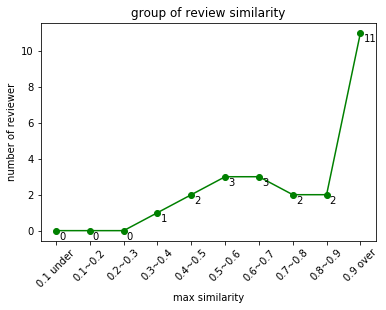

In [116]:
x=[u'0.1 under',u'0.1~0.2',u'0.2~0.3',u'0.3~0.4',u'0.4~0.5',u'0.5~0.6',u'0.6~0.7',u'0.7~0.8',u'0.8~0.9',u'0.9 over']
y=result_len
labels=y

    
plt.plot(x,y,color='green',marker='o',linestyle='solid')
plt.title('group of review similarity')
plt.xlabel("max similarity")
plt.ylabel("number of reviewer")
plt.xticks(np.arange(len(x)),x,rotation=45)
for label, x_count, y_count in zip(labels, x, y):
    plt.annotate(label,
                 xy=(x_count, y_count), #label을 데이터포인트에 두되
                 xytext=(3,-9), # 약간 떨어져 있게
                 textcoords='offset points')
plt.show()

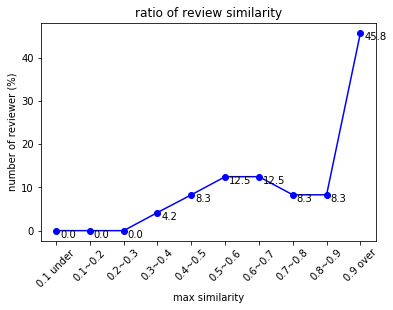

In [117]:
x=[u'0.1 under',u'0.1~0.2',u'0.2~0.3',u'0.3~0.4',u'0.4~0.5',u'0.5~0.6',u'0.6~0.7',u'0.7~0.8',u'0.8~0.9',u'0.9 over']
y=result_ratio
labels=y
    
plt.plot(x,y,color='blue',marker='o',linestyle='solid')
plt.title('ratio of review similarity')
plt.xlabel("max similarity")
plt.ylabel("number of reviewer (%)")
plt.xticks(np.arange(len(x)),x,rotation=45)
for label, x_count, y_count in zip(labels, x, y):
    plt.annotate(label,
                 xy=(x_count, y_count), #label을 데이터포인트에 두되
                 xytext=(4,-7), # 약간 떨어져 있게
                 textcoords='offset points')
plt.show()

reviewer_who_satisfy_some_condition(go_data, 1, 1, 1, 1, 1, 3, 50, 2, 4.96, 3)

In [59]:
spammer3= [u'ghkal04**', u'rladmswl9708**', u'wldwldg**', u'leeliast**', u'rhdms10**', u'sally70**', u'm0928hy**', u'yeji04**', u'gloryn**', u'sestt**', u'dorosy11**', u'wlgml13**', u'rhdecyli**', u'phr9101**', u'asdfg18**', u'diqkdldiqk**', u'hooming**', u'sy2004**', u'qpqlgi**', u'tmfrl123**', u'jhw20**', u'sejin1**', u'ngt**', u'sosososo**', u'yeon33**', u'chdms03**', u'kimminji**', u'loveheart77**', u'qapl44**', u'wjswldms0**', u'ch**', u'jy03**', u'seoa40**', u'altnr**', u'acua**', u'ik35**', u'ekdmsdl07**', u'redgirl4**', u'dev**', u'ans56**', u'chihn19**', u'syndrome12**', u'sjj44**', u'dekuu12**', u'jsh**', u'gmlwls20**']

In [60]:
len(spammer3)

46

In [ ]:
for i in range(len(spammer3)):
    print str(i+1) + str('번째 리뷰어: ')+ str(spammer3[i])
    reviews=make_reviews(spammer3[i])
    vector_array=tfidf(reviews)
    similarity(vector_array, reviews)

In [61]:
group1=[]
group2=[]
group3=[]
group4=[]
group5=[]
group6=[]
group7=[]
group8=[]
group9=[]
group10=[]
max=0

for i in range(len(spammer3)):
    print str(i+1) + str('번째 리뷰어: ')+ str(spammer3[i])
    reviews=make_reviews(spammer3[i])
    if(len(reviews)<2):
        continue
    vector_array=tfidf(reviews)
    max=similarity(vector_array, reviews)
    
    if(max<0.1):
        group1.append(spammer3[i])
    elif(max>=0.1 and max< 0.2):
        group2.append(spammer3[i])
    elif(max>=0.2 and max< 0.3):
        group3.append(spammer3[i])
    elif(max >=0.3 and max < 0.4):
        group4.append(spammer3[i])
    elif(max>=0.4 and max < 0.5):
        group5.append(spammer3[i])
    elif(max>=0.5 and max < 0.6):
        group6.append(spammer3[i])
    elif(max>=0.6 and max < 0.7):
        group7.append(spammer3[i])
    elif(max>=0.7 and max < 0.8):
        group8.append(spammer3[i])
    elif(max>=0.8 and max < 0.9):
        group9.append(spammer3[i])
    elif(max>=0.9):
        group10.append(spammer3[i])

1번째 리뷰어: ghkal04**
fit_transform, (No.review 55, feature 364)
('min : ', 0.0)
('max : ', 0.9306)
('avg : ', 0.113)
('num of 1 : ', 0)
('# max_cnt : ', 1)
2번째 리뷰어: rladmswl9708**
fit_transform, (No.review 308, feature 911)
('min : ', 0.0)
('max : ', 0.4936)
('avg : ', 0.0623)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3번째 리뷰어: wldwldg**
fit_transform, (No.review 60, feature 319)
('min : ', 0.0)
('max : ', 1.0)
('avg : ', 0.1177)
('num of 1 : ', 3)
('# max_cnt : ', 1)
4번째 리뷰어: leeliast**
fit_transform, (No.review 125, feature 1285)
('min : ', 0.0)
('max : ', 1.0)
('avg : ', 0.0786)
('num of 1 : ', 1)
('# max_cnt : ', 1)
5번째 리뷰어: rhdms10**
fit_transform, (No.review 54, feature 325)
('min : ', 0.0)
('max : ', 0.7973)
('avg : ', 0.1092)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6번째 리뷰어: sally70**
fit_transform, (No.review 63, feature 510)
('min : ', 0.0233)
('max : ', 1.0)
('avg : ', 0.1198)
('num of 1 : ', 4)
('# max_cnt : ', 1)
7번째 리뷰어: m0928hy**
fit_transform, (No.review 61, feature 580)
('min 

In [104]:
def print_group(title, groups, used_func):
    pivot_num = 0.1
    save_list = list()

    pprint(title)
    cur_num = 0.0
    for i, group in enumerate(groups):
        save_list.append(used_func(group))
        print('group ' + str(i + 1) + ' = ' + str(float("{:.1f}".format(cur_num))) + str(' over ') + str(
            float("{:.1f}".format(cur_num + pivot_num))) + str(' under : '), save_list[i])
        cur_num += pivot_num
    print('\n')

    return save_list


result_len = print_group(u'해당 그룹별 spammer 수', groups, len)
result_ratio = print_group(u'해당 그룹별 spammer 비율', groups, lambda x: float("{:.1f}".format(1.0 * len(x) * 100 / len(spammer3))))

해당 그룹별 spammer 수
('group 1 = 0.0 over 0.1 under : ', 0)
('group 2 = 0.1 over 0.2 under : ', 0)
('group 3 = 0.2 over 0.3 under : ', 0)
('group 4 = 0.3 over 0.4 under : ', 3)
('group 5 = 0.4 over 0.5 under : ', 7)
('group 6 = 0.5 over 0.6 under : ', 5)
('group 7 = 0.6 over 0.7 under : ', 5)
('group 8 = 0.7 over 0.8 under : ', 5)
('group 9 = 0.8 over 0.9 under : ', 3)
('group 10 = 0.9 over 1.0 under : ', 18)


해당 그룹별 spammer 비율
('group 1 = 0.0 over 0.1 under : ', 0.0)
('group 2 = 0.1 over 0.2 under : ', 0.0)
('group 3 = 0.2 over 0.3 under : ', 0.0)
('group 4 = 0.3 over 0.4 under : ', 6.5)
('group 5 = 0.4 over 0.5 under : ', 15.2)
('group 6 = 0.5 over 0.6 under : ', 10.9)
('group 7 = 0.6 over 0.7 under : ', 10.9)
('group 8 = 0.7 over 0.8 under : ', 10.9)
('group 9 = 0.8 over 0.9 under : ', 6.5)
('group 10 = 0.9 over 1.0 under : ', 39.1)




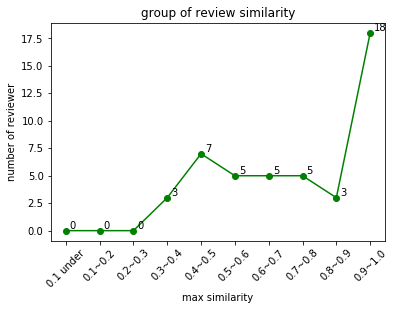

In [105]:
x=[u'0.1 under',u'0.1~0.2',u'0.2~0.3',u'0.3~0.4',u'0.4~0.5',u'0.5~0.6',u'0.6~0.7',u'0.7~0.8',u'0.8~0.9',u'0.9~1.0']
y=result_len
labels=y
    
plt.plot(x,y,color='green',marker='o',linestyle='solid')
plt.title('group of review similarity')
plt.xlabel("max similarity")
plt.ylabel("number of reviewer")
plt.xticks(np.arange(len(x)),x,rotation=45)
for label, x_count, y_count in zip(labels, x, y):
    plt.annotate(label,
                 xy=(x_count, y_count), #label을 데이터포인트에 두되
                 xytext=(4,2), # 약간 떨어져 있게
                 textcoords='offset points')
plt.show()

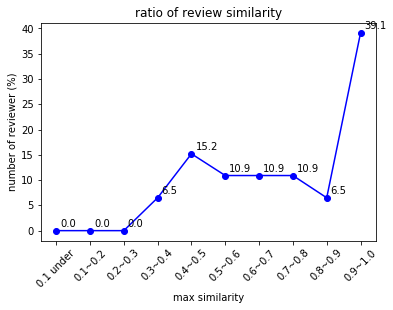

In [106]:
x=[u'0.1 under',u'0.1~0.2',u'0.2~0.3',u'0.3~0.4',u'0.4~0.5',u'0.5~0.6',u'0.6~0.7',u'0.7~0.8',u'0.8~0.9',u'0.9~1.0']
y=result_ratio
labels=y
    
plt.plot(x,y,color='blue',marker='o',linestyle='solid')
plt.title('ratio of review similarity')
plt.xlabel("max similarity")
plt.ylabel("number of reviewer (%)")
plt.xticks(np.arange(len(x)),x,rotation=45)
for label, x_count, y_count in zip(labels, x, y):
    plt.annotate(label,
                 xy=(x_count, y_count), #label을 데이터포인트에 두되
                 xytext=(4,4), # 약간 떨어져 있게
                 textcoords='offset points')
plt.show()

# Union

reviewer_who_satisfy_some_condition_union(go_data, 1, 1, 1, 1, 1, 3, 50, 10, 4.95, 2)

In [54]:
len(non_spammer)

26619

In [61]:
non_spammer=list(non_spammer)

In [62]:
non_spammer[:5]

[u'geeuns**',
 u'\ub124\uc774\ubc84 \ud398\uc774 \uad6c\ub9e4\uc790',
 u'achvi**',
 u'96525425**',
 u'811251705**']

In [63]:
#네이버 페이 구매자 제외
if(u'\ub124\uc774\ubc84 \ud398\uc774 \uad6c\ub9e4\uc790' in non_spammer):
        non_spammer.remove(u'\ub124\uc774\ubc84 \ud398\uc774 \uad6c\ub9e4\uc790')

In [65]:
len(non_spammer)

26618

In [67]:
max_count=0
one_reviewer=[]
for i in range(len(non_spammer)):
    print str(i+1) + str('번째 리뷰어: ')+ str(non_spammer[i].encode('utf-8'))

    reviews=make_reviews(non_spammer[i])
    if(len(reviews)<2):
        one_reviewer.append(non_spammer[i])
        continue
    vector_array=tfidf(reviews)
    max_cnt=similarity(vector_array, reviews)
    max_count+=max_cnt

print str('최대 유사도 0.9 이상인 사람 수: ') + str(max_count)

1번째 리뷰어: geeuns**
fit_transform, (No.review 24, feature 347)
('min : ', 0.0)
('max : ', 0.3015)
('avg : ', 0.0929)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2번째 리뷰어: achvi**
fit_transform, (No.review 7, feature 153)
('min : ', 0.0)
('max : ', 0.3086)
('avg : ', 0.1229)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3번째 리뷰어: 96525425**
4번째 리뷰어: 811251705**
fit_transform, (No.review 3, feature 41)
('min : ', 0.1135)
('max : ', 0.224)
('avg : ', 0.1597)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5번째 리뷰어: thgus50**
fit_transform, (No.review 22, feature 249)
('min : ', 0.0)
('max : ', 0.297)
('avg : ', 0.0806)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6번째 리뷰어: canna10**
fit_transform, (No.review 8, feature 139)
('min : ', 0.0)
('max : ', 0.6438)
('avg : ', 0.0986)
('num of 1 : ', 0)
('# max_cnt : ', 1)
7번째 리뷰어: kimya08**
fit_transform, (No.review 23, feature 236)
('min : ', 0.0)
('max : ', 0.2627)
('avg : ', 0.0945)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8번째 리뷰어: leedain02**
fit_transform, (No.review 4, feat

('num of 1 : ', 0)
('# max_cnt : ', 0)
64번째 리뷰어: ksn89**
fit_transform, (No.review 11, feature 138)
('min : ', 0.0)
('max : ', 0.4657)
('avg : ', 0.1171)
('num of 1 : ', 0)
('# max_cnt : ', 0)
65번째 리뷰어: zan031**
fit_transform, (No.review 7, feature 110)
('min : ', 0.0485)
('max : ', 0.2785)
('avg : ', 0.137)
('num of 1 : ', 0)
('# max_cnt : ', 0)
66번째 리뷰어: shy11**
67번째 리뷰어: rudska11**
fit_transform, (No.review 30, feature 342)
('min : ', 0.0)
('max : ', 0.2691)
('avg : ', 0.091)
('num of 1 : ', 0)
('# max_cnt : ', 0)
68번째 리뷰어: youl**
fit_transform, (No.review 9, feature 100)
('min : ', 0.0294)
('max : ', 0.3388)
('avg : ', 0.1607)
('num of 1 : ', 0)
('# max_cnt : ', 0)
69번째 리뷰어: mjkde**
70번째 리뷰어: skdustkfk**
fit_transform, (No.review 12, feature 213)
('min : ', 0.0252)
('max : ', 0.2039)
('avg : ', 0.1005)
('num of 1 : ', 0)
('# max_cnt : ', 0)
71번째 리뷰어: khy0511**
fit_transform, (No.review 2, feature 39)
('min : ', 0.0664)
('max : ', 0.0664)
('avg : ', 0.0664)
('num of 1 : ', 0)
('# ma

('# max_cnt : ', 0)
129번째 리뷰어: pijina**
130번째 리뷰어: haeun00**
fit_transform, (No.review 2, feature 52)
('min : ', 0.1467)
('max : ', 0.1467)
('avg : ', 0.1467)
('num of 1 : ', 0)
('# max_cnt : ', 0)
131번째 리뷰어: vu85**
fit_transform, (No.review 16, feature 137)
('min : ', 0.0)
('max : ', 0.3426)
('avg : ', 0.1101)
('num of 1 : ', 0)
('# max_cnt : ', 0)
132번째 리뷰어: tnwjd46**
fit_transform, (No.review 4, feature 69)
('min : ', 0.0148)
('max : ', 0.2373)
('avg : ', 0.0829)
('num of 1 : ', 0)
('# max_cnt : ', 0)
133번째 리뷰어: heokyung**
fit_transform, (No.review 13, feature 219)
('min : ', 0.0245)
('max : ', 0.3651)
('avg : ', 0.1184)
('num of 1 : ', 0)
('# max_cnt : ', 0)
134번째 리뷰어: oeeg**
fit_transform, (No.review 21, feature 291)
('min : ', 0.0)
('max : ', 0.4838)
('avg : ', 0.0671)
('num of 1 : ', 0)
('# max_cnt : ', 0)
135번째 리뷰어: tjd73**
fit_transform, (No.review 14, feature 125)
('min : ', 0.0126)
('max : ', 0.4027)
('avg : ', 0.1044)
('num of 1 : ', 0)
('# max_cnt : ', 0)
136번째 리뷰어: wjdgml

('max : ', 0.26)
('avg : ', 0.1009)
('num of 1 : ', 0)
('# max_cnt : ', 0)
190번째 리뷰어: iseeu**
fit_transform, (No.review 9, feature 121)
('min : ', 0.0)
('max : ', 0.2341)
('avg : ', 0.0739)
('num of 1 : ', 0)
('# max_cnt : ', 0)
191번째 리뷰어: rmhbb19**
fit_transform, (No.review 2, feature 17)
('min : ', 0.0908)
('max : ', 0.0908)
('avg : ', 0.0908)
('num of 1 : ', 0)
('# max_cnt : ', 0)
192번째 리뷰어: kr49**
fit_transform, (No.review 19, feature 248)
('min : ', 0.0)
('max : ', 0.583)
('avg : ', 0.0987)
('num of 1 : ', 0)
('# max_cnt : ', 0)
193번째 리뷰어: youngju03**
fit_transform, (No.review 8, feature 231)
('min : ', 0.0455)
('max : ', 0.5758)
('avg : ', 0.1531)
('num of 1 : ', 0)
('# max_cnt : ', 0)
194번째 리뷰어: as76313**
fit_transform, (No.review 12, feature 168)
('min : ', 0.0)
('max : ', 0.3331)
('avg : ', 0.1085)
('num of 1 : ', 0)
('# max_cnt : ', 0)
195번째 리뷰어: heppy760**
196번째 리뷰어: dbxogus12**
fit_transform, (No.review 2, feature 40)
('min : ', 0.0968)
('max : ', 0.0968)
('avg : ', 0.0968)

('max : ', 0.2006)
('avg : ', 0.0667)
('num of 1 : ', 0)
('# max_cnt : ', 0)
256번째 리뷰어: alswl44**
fit_transform, (No.review 6, feature 94)
('min : ', 0.0)
('max : ', 0.2231)
('avg : ', 0.0853)
('num of 1 : ', 0)
('# max_cnt : ', 0)
257번째 리뷰어: ghtn69**
fit_transform, (No.review 12, feature 238)
('min : ', 0.0134)
('max : ', 0.2)
('avg : ', 0.0897)
('num of 1 : ', 0)
('# max_cnt : ', 0)
258번째 리뷰어: dudrk09**
fit_transform, (No.review 8, feature 132)
('min : ', 0.0)
('max : ', 0.1497)
('avg : ', 0.064)
('num of 1 : ', 0)
('# max_cnt : ', 0)
259번째 리뷰어: sfgj25**
fit_transform, (No.review 10, feature 147)
('min : ', 0.0)
('max : ', 0.261)
('avg : ', 0.0691)
('num of 1 : ', 0)
('# max_cnt : ', 0)
260번째 리뷰어: 64739834**
fit_transform, (No.review 10, feature 139)
('min : ', 0.0)
('max : ', 0.2873)
('avg : ', 0.0792)
('num of 1 : ', 0)
('# max_cnt : ', 0)
261번째 리뷰어: rla38**
fit_transform, (No.review 30, feature 367)
('min : ', 0.0)
('max : ', 0.426)
('avg : ', 0.082)
('num of 1 : ', 0)
('# max_cnt

('avg : ', 0.297)
('num of 1 : ', 0)
('# max_cnt : ', 0)
322번째 리뷰어: gorl04**
fit_transform, (No.review 7, feature 94)
('min : ', 0.0261)
('max : ', 0.2082)
('avg : ', 0.1123)
('num of 1 : ', 0)
('# max_cnt : ', 0)
323번째 리뷰어: rlaalswl12**
fit_transform, (No.review 13, feature 136)
('min : ', 0.0283)
('max : ', 0.3065)
('avg : ', 0.1152)
('num of 1 : ', 0)
('# max_cnt : ', 0)
324번째 리뷰어: amy3**
fit_transform, (No.review 14, feature 150)
('min : ', 0.0)
('max : ', 0.3561)
('avg : ', 0.1345)
('num of 1 : ', 0)
('# max_cnt : ', 0)
325번째 리뷰어: good03**
fit_transform, (No.review 32, feature 132)
('min : ', 0.0)
('max : ', 0.7676)
('avg : ', 0.0828)
('num of 1 : ', 0)
('# max_cnt : ', 1)
326번째 리뷰어: licjb**
fit_transform, (No.review 12, feature 135)
('min : ', 0.0103)
('max : ', 0.3691)
('avg : ', 0.1294)
('num of 1 : ', 0)
('# max_cnt : ', 0)
327번째 리뷰어: rhwjddm**
fit_transform, (No.review 10, feature 158)
('min : ', 0.0321)
('max : ', 0.2295)
('avg : ', 0.1102)
('num of 1 : ', 0)
('# max_cnt : '

383번째 리뷰어: qkrekwjd**
384번째 리뷰어: nos**
fit_transform, (No.review 22, feature 234)
('min : ', 0.0)
('max : ', 0.3996)
('avg : ', 0.0795)
('num of 1 : ', 0)
('# max_cnt : ', 0)
385번째 리뷰어: tsd33**
fit_transform, (No.review 5, feature 81)
('min : ', 0.0598)
('max : ', 0.4928)
('avg : ', 0.1561)
('num of 1 : ', 0)
('# max_cnt : ', 0)
386번째 리뷰어: jn67**
fit_transform, (No.review 21, feature 333)
('min : ', 0.0)
('max : ', 0.3445)
('avg : ', 0.1108)
('num of 1 : ', 0)
('# max_cnt : ', 0)
387번째 리뷰어: swon68**
fit_transform, (No.review 8, feature 90)
('min : ', 0.0)
('max : ', 0.1967)
('avg : ', 0.0781)
('num of 1 : ', 0)
('# max_cnt : ', 0)
388번째 리뷰어: qpet5**
fit_transform, (No.review 7, feature 88)
('min : ', 0.0)
('max : ', 0.3605)
('avg : ', 0.0851)
('num of 1 : ', 0)
('# max_cnt : ', 0)
389번째 리뷰어: njnjyw92**
fit_transform, (No.review 2, feature 75)
('min : ', 0.0)
('max : ', 0.0)
('avg : ', 0.0)
('num of 1 : ', 0)
('# max_cnt : ', 0)
390번째 리뷰어: dltmddk5**
fit_transform, (No.review 4, feature

fit_transform, (No.review 16, feature 108)
('min : ', 0.0)
('max : ', 0.5253)
('avg : ', 0.0922)
('num of 1 : ', 0)
('# max_cnt : ', 0)
448번째 리뷰어: khl1710**
fit_transform, (No.review 6, feature 98)
('min : ', 0.0275)
('max : ', 0.3258)
('avg : ', 0.108)
('num of 1 : ', 0)
('# max_cnt : ', 0)
449번째 리뷰어: ypp0**
fit_transform, (No.review 5, feature 58)
('min : ', 0.0)
('max : ', 0.2217)
('avg : ', 0.0857)
('num of 1 : ', 0)
('# max_cnt : ', 0)
450번째 리뷰어: dudtn4**
fit_transform, (No.review 4, feature 109)
('min : ', 0.0409)
('max : ', 0.3037)
('avg : ', 0.1162)
('num of 1 : ', 0)
('# max_cnt : ', 0)
451번째 리뷰어: deulwith**
452번째 리뷰어: 76195729**
fit_transform, (No.review 2, feature 35)
('min : ', 0.0)
('max : ', 0.0)
('avg : ', 0.0)
('num of 1 : ', 0)
('# max_cnt : ', 0)
453번째 리뷰어: rkdthdbs02**
fit_transform, (No.review 2, feature 24)
('min : ', 0.1196)
('max : ', 0.1196)
('avg : ', 0.1196)
('num of 1 : ', 0)
('# max_cnt : ', 0)
454번째 리뷰어: yukjh7**
fit_transform, (No.review 3, feature 41)
('m

('min : ', 0.0296)
('max : ', 0.3208)
('avg : ', 0.1088)
('num of 1 : ', 0)
('# max_cnt : ', 0)
510번째 리뷰어: dlagustn7**
fit_transform, (No.review 26, feature 202)
('min : ', 0.0)
('max : ', 0.5346)
('avg : ', 0.0885)
('num of 1 : ', 0)
('# max_cnt : ', 0)
511번째 리뷰어: hyelin08**
fit_transform, (No.review 5, feature 125)
('min : ', 0.0476)
('max : ', 0.1554)
('avg : ', 0.1056)
('num of 1 : ', 0)
('# max_cnt : ', 0)
512번째 리뷰어: chego**
fit_transform, (No.review 6, feature 84)
('min : ', 0.0)
('max : ', 0.1918)
('avg : ', 0.0674)
('num of 1 : ', 0)
('# max_cnt : ', 0)
513번째 리뷰어: 787545053**
514번째 리뷰어: dm305s**
fit_transform, (No.review 9, feature 116)
('min : ', 0.0)
('max : ', 0.2902)
('avg : ', 0.1027)
('num of 1 : ', 0)
('# max_cnt : ', 0)
515번째 리뷰어: nayh04**
516번째 리뷰어: heejeung20**
fit_transform, (No.review 9, feature 99)
('min : ', 0.0203)
('max : ', 0.3692)
('avg : ', 0.1344)
('num of 1 : ', 0)
('# max_cnt : ', 0)
517번째 리뷰어: wldms05**
fit_transform, (No.review 4, feature 67)
('min : ', 

('min : ', 0.0)
('max : ', 0.3548)
('avg : ', 0.0958)
('num of 1 : ', 0)
('# max_cnt : ', 0)
573번째 리뷰어: psy97**
fit_transform, (No.review 6, feature 160)
('min : ', 0.0139)
('max : ', 0.3141)
('avg : ', 0.1198)
('num of 1 : ', 0)
('# max_cnt : ', 0)
574번째 리뷰어: 56191068**
fit_transform, (No.review 6, feature 70)
('min : ', 0.0)
('max : ', 0.273)
('avg : ', 0.1133)
('num of 1 : ', 0)
('# max_cnt : ', 0)
575번째 리뷰어: sohyun08**
fit_transform, (No.review 4, feature 53)
('min : ', 0.0612)
('max : ', 0.2808)
('avg : ', 0.1555)
('num of 1 : ', 0)
('# max_cnt : ', 0)
576번째 리뷰어: jhkk2**
fit_transform, (No.review 9, feature 101)
('min : ', 0.0)
('max : ', 0.2778)
('avg : ', 0.0915)
('num of 1 : ', 0)
('# max_cnt : ', 0)
577번째 리뷰어: xiah194**
fit_transform, (No.review 7, feature 191)
('min : ', 0.0363)
('max : ', 0.1794)
('avg : ', 0.109)
('num of 1 : ', 0)
('# max_cnt : ', 0)
578번째 리뷰어: jazzlee**
579번째 리뷰어: 106264960**
fit_transform, (No.review 12, feature 91)
('min : ', 0.0)
('max : ', 0.2894)
('a

('min : ', 0.0)
('max : ', 0.3466)
('avg : ', 0.105)
('num of 1 : ', 0)
('# max_cnt : ', 0)
635번째 리뷰어: jessicapeac**
fit_transform, (No.review 2, feature 30)
('min : ', 0.168)
('max : ', 0.168)
('avg : ', 0.168)
('num of 1 : ', 0)
('# max_cnt : ', 0)
636번째 리뷰어: 25036176**
fit_transform, (No.review 2, feature 64)
('min : ', 0.0636)
('max : ', 0.0636)
('avg : ', 0.0636)
('num of 1 : ', 0)
('# max_cnt : ', 0)
637번째 리뷰어: hjy00**
fit_transform, (No.review 3, feature 34)
('min : ', 0.0)
('max : ', 0.0598)
('avg : ', 0.0343)
('num of 1 : ', 0)
('# max_cnt : ', 0)
638번째 리뷰어: adela**
fit_transform, (No.review 3, feature 89)
('min : ', 0.0607)
('max : ', 0.1204)
('avg : ', 0.0921)
('num of 1 : ', 0)
('# max_cnt : ', 0)
639번째 리뷰어: ggsing0**
fit_transform, (No.review 4, feature 41)
('min : ', 0.0527)
('max : ', 0.1796)
('avg : ', 0.1088)
('num of 1 : ', 0)
('# max_cnt : ', 0)
640번째 리뷰어: hyemi01**
fit_transform, (No.review 5, feature 57)
('min : ', 0.0282)
('max : ', 0.2588)
('avg : ', 0.1162)
('nu

('max : ', 0.1671)
('avg : ', 0.1113)
('num of 1 : ', 0)
('# max_cnt : ', 0)
691번째 리뷰어: thdus83**
fit_transform, (No.review 7, feature 84)
('min : ', 0.0)
('max : ', 0.3355)
('avg : ', 0.0853)
('num of 1 : ', 0)
('# max_cnt : ', 0)
692번째 리뷰어: bella**
fit_transform, (No.review 16, feature 250)
('min : ', 0.0)
('max : ', 0.6001)
('avg : ', 0.0858)
('num of 1 : ', 0)
('# max_cnt : ', 1)
693번째 리뷰어: ddltjdgu**
694번째 리뷰어: lily94**
fit_transform, (No.review 7, feature 102)
('min : ', 0.0197)
('max : ', 0.1775)
('avg : ', 0.0891)
('num of 1 : ', 0)
('# max_cnt : ', 0)
695번째 리뷰어: jar10**
fit_transform, (No.review 4, feature 71)
('min : ', 0.0)
('max : ', 0.1826)
('avg : ', 0.0971)
('num of 1 : ', 0)
('# max_cnt : ', 0)
696번째 리뷰어: didiss**
697번째 리뷰어: alsejddle**
fit_transform, (No.review 6, feature 106)
('min : ', 0.0247)
('max : ', 0.2062)
('avg : ', 0.101)
('num of 1 : ', 0)
('# max_cnt : ', 0)
698번째 리뷰어: seungmi**
fit_transform, (No.review 11, feature 126)
('min : ', 0.0)
('max : ', 0.4443)
(

('num of 1 : ', 0)
('# max_cnt : ', 0)
749번째 리뷰어: monica1035**
fit_transform, (No.review 2, feature 39)
('min : ', 0.0915)
('max : ', 0.0915)
('avg : ', 0.0915)
('num of 1 : ', 0)
('# max_cnt : ', 0)
750번째 리뷰어: kelly54**
fit_transform, (No.review 15, feature 263)
('min : ', 0.0)
('max : ', 0.4714)
('avg : ', 0.1205)
('num of 1 : ', 0)
('# max_cnt : ', 0)
751번째 리뷰어: lks217mi**
fit_transform, (No.review 11, feature 135)
('min : ', 0.0)
('max : ', 0.307)
('avg : ', 0.0973)
('num of 1 : ', 0)
('# max_cnt : ', 0)
752번째 리뷰어: wkdghdnjs7**
753번째 리뷰어: lsj28**
fit_transform, (No.review 7, feature 87)
('min : ', 0.0)
('max : ', 0.2905)
('avg : ', 0.0811)
('num of 1 : ', 0)
('# max_cnt : ', 0)
754번째 리뷰어: hw38**
fit_transform, (No.review 14, feature 167)
('min : ', 0.0)
('max : ', 0.4598)
('avg : ', 0.0843)
('num of 1 : ', 0)
('# max_cnt : ', 0)
755번째 리뷰어: gari**
fit_transform, (No.review 4, feature 41)
('min : ', 0.0353)
('max : ', 0.2183)
('avg : ', 0.1212)
('num of 1 : ', 0)
('# max_cnt : ', 0)


('avg : ', 0.0741)
('num of 1 : ', 0)
('# max_cnt : ', 0)
808번째 리뷰어: 52669829**
809번째 리뷰어: leeng02**
fit_transform, (No.review 7, feature 118)
('min : ', 0.0211)
('max : ', 0.2341)
('avg : ', 0.0929)
('num of 1 : ', 0)
('# max_cnt : ', 0)
810번째 리뷰어: haley**
811번째 리뷰어: suns92**
fit_transform, (No.review 14, feature 135)
('min : ', 0.0)
('max : ', 1.0)
('avg : ', 0.1051)
('num of 1 : ', 1)
('# max_cnt : ', 1)
812번째 리뷰어: sujin9610**
fit_transform, (No.review 4, feature 53)
('min : ', 0.0687)
('max : ', 0.1871)
('avg : ', 0.111)
('num of 1 : ', 0)
('# max_cnt : ', 0)
813번째 리뷰어: zxc041**
fit_transform, (No.review 10, feature 109)
('min : ', 0.0)
('max : ', 0.1573)
('avg : ', 0.069)
('num of 1 : ', 0)
('# max_cnt : ', 0)
814번째 리뷰어: jiro**
fit_transform, (No.review 9, feature 138)
('min : ', 0.0)
('max : ', 0.2706)
('avg : ', 0.101)
('num of 1 : ', 0)
('# max_cnt : ', 0)
815번째 리뷰어: gpwl1231**
fit_transform, (No.review 5, feature 87)
('min : ', 0.0337)
('max : ', 0.3716)
('avg : ', 0.1134)
('n

('num of 1 : ', 0)
('# max_cnt : ', 0)
871번째 리뷰어: dpfla79**
fit_transform, (No.review 7, feature 163)
('min : ', 0.0362)
('max : ', 0.289)
('avg : ', 0.1459)
('num of 1 : ', 0)
('# max_cnt : ', 0)
872번째 리뷰어: gkfka3**
fit_transform, (No.review 6, feature 90)
('min : ', 0.0)
('max : ', 0.1876)
('avg : ', 0.0883)
('num of 1 : ', 0)
('# max_cnt : ', 0)
873번째 리뷰어: rladmstn09**
874번째 리뷰어: up25**
fit_transform, (No.review 9, feature 111)
('min : ', 0.0289)
('max : ', 0.6451)
('avg : ', 0.1237)
('num of 1 : ', 0)
('# max_cnt : ', 1)
875번째 리뷰어: yyy03**
876번째 리뷰어: chaeeun29**
fit_transform, (No.review 25, feature 183)
('min : ', 0.0)
('max : ', 0.373)
('avg : ', 0.0922)
('num of 1 : ', 0)
('# max_cnt : ', 0)
877번째 리뷰어: mhj12**
fit_transform, (No.review 11, feature 170)
('min : ', 0.0)
('max : ', 0.3444)
('avg : ', 0.095)
('num of 1 : ', 0)
('# max_cnt : ', 0)
878번째 리뷰어: cindy44**
879번째 리뷰어: arumisty**
fit_transform, (No.review 5, feature 66)
('min : ', 0.0)
('max : ', 0.1572)
('avg : ', 0.0652)


('max : ', 0.2984)
('avg : ', 0.1843)
('num of 1 : ', 0)
('# max_cnt : ', 0)
934번째 리뷰어: apple12pl**
fit_transform, (No.review 16, feature 197)
('min : ', 0.0)
('max : ', 0.2462)
('avg : ', 0.076)
('num of 1 : ', 0)
('# max_cnt : ', 0)
935번째 리뷰어: hloloiv**
fit_transform, (No.review 6, feature 90)
('min : ', 0.017)
('max : ', 0.2816)
('avg : ', 0.1173)
('num of 1 : ', 0)
('# max_cnt : ', 0)
936번째 리뷰어: ekfkawnl90**
fit_transform, (No.review 5, feature 48)
('min : ', 0.0)
('max : ', 0.4982)
('avg : ', 0.174)
('num of 1 : ', 0)
('# max_cnt : ', 0)
937번째 리뷰어: yu**
fit_transform, (No.review 36, feature 441)
('min : ', 0.0)
('max : ', 0.509)
('avg : ', 0.0783)
('num of 1 : ', 0)
('# max_cnt : ', 0)
938번째 리뷰어: wjddms74**
939번째 리뷰어: 25739683**
fit_transform, (No.review 6, feature 126)
('min : ', 0.0337)
('max : ', 0.2578)
('avg : ', 0.1113)
('num of 1 : ', 0)
('# max_cnt : ', 0)
940번째 리뷰어: ghdwn3**
fit_transform, (No.review 17, feature 235)
('min : ', 0.0)
('max : ', 0.3655)
('avg : ', 0.0939)
(

('avg : ', 0.1371)
('num of 1 : ', 0)
('# max_cnt : ', 0)
992번째 리뷰어: ester37**
993번째 리뷰어: nai**
994번째 리뷰어: tjddms73**
fit_transform, (No.review 8, feature 93)
('min : ', 0.0)
('max : ', 0.1958)
('avg : ', 0.0951)
('num of 1 : ', 0)
('# max_cnt : ', 0)
995번째 리뷰어: smj03**
fit_transform, (No.review 11, feature 125)
('min : ', 0.0247)
('max : ', 0.4378)
('avg : ', 0.1573)
('num of 1 : ', 0)
('# max_cnt : ', 0)
996번째 리뷰어: jinseon**
fit_transform, (No.review 7, feature 163)
('min : ', 0.0101)
('max : ', 0.2084)
('avg : ', 0.0889)
('num of 1 : ', 0)
('# max_cnt : ', 0)
997번째 리뷰어: 95798184**
fit_transform, (No.review 8, feature 105)
('min : ', 0.0)
('max : ', 0.2934)
('avg : ', 0.1213)
('num of 1 : ', 0)
('# max_cnt : ', 0)
998번째 리뷰어: znfnznfn00**
fit_transform, (No.review 7, feature 110)
('min : ', 0.0335)
('max : ', 1.0)
('avg : ', 0.1372)
('num of 1 : ', 1)
('# max_cnt : ', 1)
999번째 리뷰어: dmsgp**
fit_transform, (No.review 23, feature 338)
('min : ', 0.0)
('max : ', 0.2764)
('avg : ', 0.0945)

('min : ', 0.0)
('max : ', 0.4674)
('avg : ', 0.1085)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1058번째 리뷰어: gpdls06**
fit_transform, (No.review 6, feature 63)
('min : ', 0.0)
('max : ', 0.2819)
('avg : ', 0.0883)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1059번째 리뷰어: wjstnwls**
fit_transform, (No.review 17, feature 187)
('min : ', 0.0)
('max : ', 0.4613)
('avg : ', 0.0794)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1060번째 리뷰어: 762621027**
1061번째 리뷰어: kkoo**
fit_transform, (No.review 12, feature 163)
('min : ', 0.0)
('max : ', 0.3225)
('avg : ', 0.0883)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1062번째 리뷰어: 535132384**
fit_transform, (No.review 16, feature 216)
('min : ', 0.0121)
('max : ', 0.9039)
('avg : ', 0.0941)
('num of 1 : ', 0)
('# max_cnt : ', 1)
1063번째 리뷰어: qkrdndud1**
fit_transform, (No.review 19, feature 318)
('min : ', 0.0123)
('max : ', 0.2817)
('avg : ', 0.1023)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1064번째 리뷰어: tjsdl10**
fit_transform, (No.review 34, feature 381)
('min : ', 0.0)
('max 

('avg : ', 0.0156)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1115번째 리뷰어: cacao**
fit_transform, (No.review 17, feature 244)
('min : ', 0.0)
('max : ', 0.2229)
('avg : ', 0.0796)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1116번째 리뷰어: mh9805**
1117번째 리뷰어: rkdms2**
fit_transform, (No.review 11, feature 122)
('min : ', 0.0)
('max : ', 0.2882)
('avg : ', 0.1289)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1118번째 리뷰어: vnglt12**
1119번째 리뷰어: szszszsz**
fit_transform, (No.review 13, feature 96)
('min : ', 0.0)
('max : ', 0.4945)
('avg : ', 0.1058)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1120번째 리뷰어: cjyeon**
fit_transform, (No.review 9, feature 117)
('min : ', 0.041)
('max : ', 0.2649)
('avg : ', 0.1245)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1121번째 리뷰어: hesoo**
fit_transform, (No.review 5, feature 90)
('min : ', 0.0791)
('max : ', 0.2321)
('avg : ', 0.1531)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1122번째 리뷰어: moki**
fit_transform, (No.review 14, feature 176)
('min : ', 0.0121)
('max : ', 0.8895)
('avg : ', 0.

('avg : ', 0.1121)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1235번째 리뷰어: alsgml96**
fit_transform, (No.review 12, feature 192)
('min : ', 0.0)
('max : ', 0.2616)
('avg : ', 0.0844)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1236번째 리뷰어: kyb32**
fit_transform, (No.review 3, feature 32)
('min : ', 0.0962)
('max : ', 0.2624)
('avg : ', 0.158)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1237번째 리뷰어: mscmi**
fit_transform, (No.review 3, feature 32)
('min : ', 0.0578)
('max : ', 0.2115)
('avg : ', 0.1297)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1238번째 리뷰어: comam05**
fit_transform, (No.review 3, feature 9)
('min : ', 0.0)
('max : ', 0.402)
('avg : ', 0.134)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1239번째 리뷰어: tooderi**
fit_transform, (No.review 7, feature 83)
('min : ', 0.0)
('max : ', 0.1779)
('avg : ', 0.0746)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1240번째 리뷰어: 6816037**
fit_transform, (No.review 2, feature 38)
('min : ', 0.0934)
('max : ', 0.0934)
('avg : ', 0.0934)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12

('avg : ', 0.0866)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1297번째 리뷰어: sksms1q**
fit_transform, (No.review 4, feature 59)
('min : ', 0.1178)
('max : ', 0.2235)
('avg : ', 0.174)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1298번째 리뷰어: bandgirl**
fit_transform, (No.review 11, feature 202)
('min : ', 0.0)
('max : ', 0.247)
('avg : ', 0.086)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1299번째 리뷰어: boamk**
fit_transform, (No.review 7, feature 133)
('min : ', 0.065)
('max : ', 0.2524)
('avg : ', 0.1545)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1300번째 리뷰어: doeol1**
fit_transform, (No.review 17, feature 197)
('min : ', 0.0)
('max : ', 0.3692)
('avg : ', 0.0776)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1301번째 리뷰어: innnsuk**
fit_transform, (No.review 7, feature 97)
('min : ', 0.0)
('max : ', 0.297)
('avg : ', 0.1534)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1302번째 리뷰어: hanahn08**
fit_transform, (No.review 8, feature 105)
('min : ', 0.0)
('max : ', 0.2382)
('avg : ', 0.0906)
('num of 1 : ', 0)
('# max_cnt : ', 0)


('avg : ', 0.1041)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1358번째 리뷰어: zxc6**
fit_transform, (No.review 16, feature 219)
('min : ', 0.0)
('max : ', 0.3522)
('avg : ', 0.0783)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1359번째 리뷰어: kdk64**
fit_transform, (No.review 12, feature 185)
('min : ', 0.0491)
('max : ', 0.2317)
('avg : ', 0.1198)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1360번째 리뷰어: 59185840**
fit_transform, (No.review 2, feature 44)
('min : ', 0.1376)
('max : ', 0.1376)
('avg : ', 0.1376)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1361번째 리뷰어: dmsql49**
fit_transform, (No.review 10, feature 175)
('min : ', 0.0)
('max : ', 0.7127)
('avg : ', 0.1514)
('num of 1 : ', 0)
('# max_cnt : ', 1)
1362번째 리뷰어: 754705495**
fit_transform, (No.review 3, feature 25)
('min : ', 0.0)
('max : ', 0.261)
('avg : ', 0.087)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1363번째 리뷰어: ekdud93**
fit_transform, (No.review 10, feature 196)
('min : ', 0.0076)
('max : ', 0.2142)
('avg : ', 0.1104)
('num of 1 : ', 0)
('# max_cnt :

('avg : ', 0.1235)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1422번째 리뷰어: 49763380**
fit_transform, (No.review 4, feature 111)
('min : ', 0.0272)
('max : ', 0.1497)
('avg : ', 0.0905)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1423번째 리뷰어: mjyj**
fit_transform, (No.review 21, feature 182)
('min : ', 0.0)
('max : ', 0.375)
('avg : ', 0.1198)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1424번째 리뷰어: byo**
1425번째 리뷰어: 416416891**
fit_transform, (No.review 10, feature 191)
('min : ', 0.0)
('max : ', 0.2226)
('avg : ', 0.1043)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1426번째 리뷰어: phm3**
1427번째 리뷰어: mkmkw**
fit_transform, (No.review 10, feature 201)
('min : ', 0.0211)
('max : ', 0.2317)
('avg : ', 0.0889)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1428번째 리뷰어: hb115**
fit_transform, (No.review 6, feature 123)
('min : ', 0.0566)
('max : ', 0.2498)
('avg : ', 0.1246)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1429번째 리뷰어: seti**
fit_transform, (No.review 8, feature 84)
('min : ', 0.0236)
('max : ', 0.2482)
('avg : ', 0.11

('avg : ', 0.0803)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1482번째 리뷰어: dkssud7539**
fit_transform, (No.review 14, feature 159)
('min : ', 0.0)
('max : ', 0.3565)
('avg : ', 0.0972)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1483번째 리뷰어: k53**
fit_transform, (No.review 29, feature 199)
('min : ', 0.0)
('max : ', 0.3388)
('avg : ', 0.093)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1484번째 리뷰어: cherrie**
fit_transform, (No.review 4, feature 64)
('min : ', 0.0699)
('max : ', 0.2018)
('avg : ', 0.1011)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1485번째 리뷰어: dmsgml50**
fit_transform, (No.review 2, feature 34)
('min : ', 0.0296)
('max : ', 0.0296)
('avg : ', 0.0296)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1486번째 리뷰어: yhl30**
fit_transform, (No.review 9, feature 91)
('min : ', 0.0)
('max : ', 0.2525)
('avg : ', 0.1102)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1487번째 리뷰어: 101120045**
1488번째 리뷰어: ooss**
fit_transform, (No.review 3, feature 69)
('min : ', 0.1204)
('max : ', 0.3227)
('avg : ', 0.1957)
('num of 1 : '

('max : ', 0.1919)
('avg : ', 0.1332)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1548번째 리뷰어: 728361148**
fit_transform, (No.review 2, feature 32)
('min : ', 0.1314)
('max : ', 0.1314)
('avg : ', 0.1314)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1549번째 리뷰어: 1952456185079185**
1550번째 리뷰어: 763246470**
1551번째 리뷰어: jsy11**
fit_transform, (No.review 3, feature 66)
('min : ', 0.1383)
('max : ', 0.2685)
('avg : ', 0.2139)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1552번째 리뷰어: snow9**
fit_transform, (No.review 7, feature 121)
('min : ', 0.0379)
('max : ', 0.1928)
('avg : ', 0.1253)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1553번째 리뷰어: kimsy07**
fit_transform, (No.review 12, feature 147)
('min : ', 0.0)
('max : ', 0.4021)
('avg : ', 0.1026)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1554번째 리뷰어: lhek48**
fit_transform, (No.review 8, feature 134)
('min : ', 0.0184)
('max : ', 0.3611)
('avg : ', 0.1398)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1555번째 리뷰어: wlwk**
1556번째 리뷰어: smwo**
fit_transform, (No.review 4, feature 

('avg : ', 0.1008)
('num of 1 : ', 0)
('# max_cnt : ', 1)
1607번째 리뷰어: 30773378**
fit_transform, (No.review 2, feature 76)
('min : ', 0.1015)
('max : ', 0.1015)
('avg : ', 0.1015)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1608번째 리뷰어: hyojin**
fit_transform, (No.review 11, feature 143)
('min : ', 0.0)
('max : ', 0.2378)
('avg : ', 0.0739)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1609번째 리뷰어: 84065002**
1610번째 리뷰어: yewon**
fit_transform, (No.review 15, feature 177)
('min : ', 0.0)
('max : ', 0.2859)
('avg : ', 0.071)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1611번째 리뷰어: jinsoo05**
fit_transform, (No.review 10, feature 105)
('min : ', 0.0)
('max : ', 0.261)
('avg : ', 0.0923)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1612번째 리뷰어: ksy1**
fit_transform, (No.review 2, feature 31)
('min : ', 0.2275)
('max : ', 0.2275)
('avg : ', 0.2275)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1613번째 리뷰어: ww75820**
fit_transform, (No.review 4, feature 93)
('min : ', 0.0716)
('max : ', 0.247)
('avg : ', 0.1084)
('num of 1 : '

('min : ', 0.05)
('max : ', 0.3212)
('avg : ', 0.1455)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1669번째 리뷰어: maybb**
fit_transform, (No.review 3, feature 89)
('min : ', 0.047)
('max : ', 0.1665)
('avg : ', 0.1005)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1670번째 리뷰어: dmswlehf**
fit_transform, (No.review 12, feature 72)
('min : ', 0.0)
('max : ', 0.4659)
('avg : ', 0.1129)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1671번째 리뷰어: wlrn1**
fit_transform, (No.review 11, feature 264)
('min : ', 0.0)
('max : ', 0.3014)
('avg : ', 0.1122)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1672번째 리뷰어: dbswl49**
fit_transform, (No.review 7, feature 105)
('min : ', 0.0)
('max : ', 0.2025)
('avg : ', 0.1055)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1673번째 리뷰어: gwchoi19**
fit_transform, (No.review 6, feature 61)
('min : ', 0.0)
('max : ', 0.5912)
('avg : ', 0.1669)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1674번째 리뷰어: cathy03**
1675번째 리뷰어: 146527528**
1676번째 리뷰어: osh59**
fit_transform, (No.review 12, feature 165)
('min : ', 0.

('max : ', 1.0)
('avg : ', 0.2429)
('num of 1 : ', 14)
('# max_cnt : ', 1)
1734번째 리뷰어: e242**
fit_transform, (No.review 21, feature 333)
('min : ', 0.0)
('max : ', 0.282)
('avg : ', 0.0862)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1735번째 리뷰어: gusd26**
fit_transform, (No.review 17, feature 161)
('min : ', 0.0)
('max : ', 0.3443)
('avg : ', 0.1074)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1736번째 리뷰어: pky6**
fit_transform, (No.review 11, feature 241)
('min : ', 0.0491)
('max : ', 0.2792)
('avg : ', 0.1374)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1737번째 리뷰어: guswjd00**
fit_transform, (No.review 5, feature 56)
('min : ', 0.0)
('max : ', 0.1696)
('avg : ', 0.0709)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1738번째 리뷰어: alsk92**
1739번째 리뷰어: hyowon04**
fit_transform, (No.review 16, feature 293)
('min : ', 0.0)
('max : ', 0.282)
('avg : ', 0.0963)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1740번째 리뷰어: bin11**
1741번째 리뷰어: 74367799**
fit_transform, (No.review 2, feature 35)
('min : ', 0.0784)
('max : ', 0.0784

('num of 1 : ', 0)
('# max_cnt : ', 0)
1798번째 리뷰어: cindia1**
1799번째 리뷰어: iilove**
fit_transform, (No.review 2, feature 26)
('min : ', 0.0396)
('max : ', 0.0396)
('avg : ', 0.0396)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1800번째 리뷰어: shbarag**
fit_transform, (No.review 3, feature 46)
('min : ', 0.0811)
('max : ', 0.2129)
('avg : ', 0.139)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1801번째 리뷰어: ej17**
1802번째 리뷰어: dajung97**
fit_transform, (No.review 5, feature 168)
('min : ', 0.0165)
('max : ', 0.1994)
('avg : ', 0.0928)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1803번째 리뷰어: hee77**
fit_transform, (No.review 24, feature 259)
('min : ', 0.0)
('max : ', 0.2811)
('avg : ', 0.1049)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1804번째 리뷰어: a4**
fit_transform, (No.review 4, feature 51)
('min : ', 0.0261)
('max : ', 0.28)
('avg : ', 0.1365)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1805번째 리뷰어: dnfl4q**
fit_transform, (No.review 9, feature 284)
('min : ', 0.0375)
('max : ', 0.2379)
('avg : ', 0.1215)
('num of 1 : ',

('num of 1 : ', 0)
('# max_cnt : ', 0)
1858번째 리뷰어: ghk76**
fit_transform, (No.review 13, feature 141)
('min : ', 0.0)
('max : ', 0.2895)
('avg : ', 0.0645)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1859번째 리뷰어: han**
fit_transform, (No.review 32, feature 309)
('min : ', 0.0)
('max : ', 0.5179)
('avg : ', 0.0599)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1860번째 리뷰어: 38927327**
fit_transform, (No.review 7, feature 85)
('min : ', 0.0)
('max : ', 0.256)
('avg : ', 0.0999)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1861번째 리뷰어: hsh6**
fit_transform, (No.review 6, feature 151)
('min : ', 0.0365)
('max : ', 0.3046)
('avg : ', 0.1578)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1862번째 리뷰어: 8921630**
fit_transform, (No.review 8, feature 129)
('min : ', 0.0187)
('max : ', 0.2793)
('avg : ', 0.1091)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1863번째 리뷰어: july7**
fit_transform, (No.review 11, feature 89)
('min : ', 0.0)
('max : ', 0.3118)
('avg : ', 0.1059)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1864번째 리뷰어: dlwodms11**

('avg : ', 0.1026)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1916번째 리뷰어: skdy**
1917번째 리뷰어: dkssudwn**
fit_transform, (No.review 3, feature 38)
('min : ', 0.2297)
('max : ', 0.4075)
('avg : ', 0.2986)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1918번째 리뷰어: rlaanswj**
fit_transform, (No.review 9, feature 113)
('min : ', 0.0)
('max : ', 0.4017)
('avg : ', 0.1006)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1919번째 리뷰어: 751449785**
fit_transform, (No.review 3, feature 79)
('min : ', 0.2134)
('max : ', 0.2387)
('avg : ', 0.2267)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1920번째 리뷰어: rlarkfla**
fit_transform, (No.review 15, feature 178)
('min : ', 0.0317)
('max : ', 0.3647)
('avg : ', 0.1451)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1921번째 리뷰어: 60473275**
fit_transform, (No.review 3, feature 29)
('min : ', 0.0)
('max : ', 0.2443)
('avg : ', 0.1161)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1922번째 리뷰어: eunwoo06**
1923번째 리뷰어: 60842959**
fit_transform, (No.review 5, feature 44)
('min : ', 0.0236)
('max : ', 0.4455)


('avg : ', 0.0865)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1977번째 리뷰어: 23166324**
fit_transform, (No.review 3, feature 50)
('min : ', 0.1585)
('max : ', 0.3316)
('avg : ', 0.2168)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1978번째 리뷰어: mika**
fit_transform, (No.review 29, feature 306)
('min : ', 0.0)
('max : ', 0.4265)
('avg : ', 0.0957)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1979번째 리뷰어: skstbvjcj**
1980번째 리뷰어: kyy41**
fit_transform, (No.review 25, feature 225)
('min : ', 0.0)
('max : ', 1.0)
('avg : ', 0.1147)
('num of 1 : ', 1)
('# max_cnt : ', 1)
1981번째 리뷰어: dlwldk10**
1982번째 리뷰어: tjdgml06**
fit_transform, (No.review 38, feature 433)
('min : ', 0.0)
('max : ', 0.2851)
('avg : ', 0.0925)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1983번째 리뷰어: kmjalswn02**
1984번째 리뷰어: yun01**
fit_transform, (No.review 14, feature 234)
('min : ', 0.0)
('max : ', 0.2588)
('avg : ', 0.1074)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1985번째 리뷰어: chke**
1986번째 리뷰어: qhtjr33**
fit_transform, (No.review 11, feature 115)
('m

fit_transform, (No.review 24, feature 522)
('min : ', 0.0)
('max : ', 0.2609)
('avg : ', 0.0823)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2041번째 리뷰어: tla98**
fit_transform, (No.review 2, feature 31)
('min : ', 0.0287)
('max : ', 0.0287)
('avg : ', 0.0287)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2042번째 리뷰어: tncjq**
fit_transform, (No.review 3, feature 52)
('min : ', 0.1096)
('max : ', 0.2288)
('avg : ', 0.1677)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2043번째 리뷰어: yeeun3**
fit_transform, (No.review 3, feature 29)
('min : ', 0.1706)
('max : ', 0.3379)
('avg : ', 0.2618)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2044번째 리뷰어: kh051**
fit_transform, (No.review 5, feature 55)
('min : ', 0.0536)
('max : ', 0.5183)
('avg : ', 0.161)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2045번째 리뷰어: jinyu20**
fit_transform, (No.review 3, feature 53)
('min : ', 0.0207)
('max : ', 0.1619)
('avg : ', 0.0791)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2046번째 리뷰어: 73417207**
fit_transform, (No.review 2, feature 53)
('min : ', 0.

('min : ', 0.0221)
('max : ', 0.2051)
('avg : ', 0.0977)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2102번째 리뷰어: ekwjd35**
2103번째 리뷰어: 4413816**
2104번째 리뷰어: mom**
fit_transform, (No.review 4, feature 85)
('min : ', 0.0781)
('max : ', 0.2292)
('avg : ', 0.1598)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2105번째 리뷰어: zhddl**
fit_transform, (No.review 4, feature 78)
('min : ', 0.0)
('max : ', 0.1877)
('avg : ', 0.0807)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2106번째 리뷰어: oceana**
fit_transform, (No.review 4, feature 45)
('min : ', 0.0543)
('max : ', 0.1648)
('avg : ', 0.1217)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2107번째 리뷰어: hh05**
2108번째 리뷰어: didrod**
fit_transform, (No.review 4, feature 58)
('min : ', 0.0234)
('max : ', 0.2007)
('avg : ', 0.1281)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2109번째 리뷰어: 70342597**
fit_transform, (No.review 2, feature 29)
('min : ', 0.1504)
('max : ', 0.1504)
('avg : ', 0.1504)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2110번째 리뷰어: tnqls42**
fit_transform, (No.review 2, featu

('min : ', 0.0)
('max : ', 0.3439)
('avg : ', 0.07)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2162번째 리뷰어: 35135117**
fit_transform, (No.review 2, feature 50)
('min : ', 0.0479)
('max : ', 0.0479)
('avg : ', 0.0479)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2163번째 리뷰어: e486**
fit_transform, (No.review 2, feature 28)
('min : ', 0.0525)
('max : ', 0.0525)
('avg : ', 0.0525)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2164번째 리뷰어: lyb9**
fit_transform, (No.review 10, feature 143)
('min : ', 0.0)
('max : ', 0.2922)
('avg : ', 0.0681)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2165번째 리뷰어: tjfghk**
fit_transform, (No.review 2, feature 21)
('min : ', 0.0)
('max : ', 0.0)
('avg : ', 0.0)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2166번째 리뷰어: 54812016**
fit_transform, (No.review 7, feature 85)
('min : ', 0.0195)
('max : ', 0.2967)
('avg : ', 0.1332)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2167번째 리뷰어: hj7302**
fit_transform, (No.review 4, feature 59)
('min : ', 0.0469)
('max : ', 0.1689)
('avg : ', 0.1087)
('num of 1

('max : ', 0.1889)
('avg : ', 0.0906)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2225번째 리뷰어: minkyung2**
fit_transform, (No.review 8, feature 167)
('min : ', 0.0399)
('max : ', 0.2839)
('avg : ', 0.1176)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2226번째 리뷰어: thals13**
fit_transform, (No.review 8, feature 164)
('min : ', 0.0)
('max : ', 0.2235)
('avg : ', 0.1142)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2227번째 리뷰어: kwaksi**
fit_transform, (No.review 2, feature 75)
('min : ', 0.1031)
('max : ', 0.1031)
('avg : ', 0.1031)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2228번째 리뷰어: bshii**
fit_transform, (No.review 7, feature 192)
('min : ', 0.0)
('max : ', 0.3335)
('avg : ', 0.1395)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2229번째 리뷰어: cutey**
fit_transform, (No.review 11, feature 143)
('min : ', 0.0)
('max : ', 0.2142)
('avg : ', 0.0872)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2230번째 리뷰어: sj16**
fit_transform, (No.review 9, feature 146)
('min : ', 0.0)
('max : ', 0.4435)
('avg : ', 0.1148)
('num of 1 : ', 0)
(

('avg : ', 0.1759)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2283번째 리뷰어: dhekdms**
fit_transform, (No.review 11, feature 104)
('min : ', 0.0)
('max : ', 0.3883)
('avg : ', 0.1186)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2284번째 리뷰어: dodo82**
fit_transform, (No.review 4, feature 116)
('min : ', 0.0465)
('max : ', 0.2288)
('avg : ', 0.1418)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2285번째 리뷰어: shj012**
fit_transform, (No.review 4, feature 46)
('min : ', 0.0969)
('max : ', 0.2448)
('avg : ', 0.1553)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2286번째 리뷰어: snowhitelo**
fit_transform, (No.review 5, feature 88)
('min : ', 0.0)
('max : ', 0.2112)
('avg : ', 0.0742)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2287번째 리뷰어: tae7**
fit_transform, (No.review 4, feature 115)
('min : ', 0.0553)
('max : ', 0.2187)
('avg : ', 0.1096)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2288번째 리뷰어: 50809596**
fit_transform, (No.review 3, feature 51)
('min : ', 0.0401)
('max : ', 0.1648)
('avg : ', 0.0891)
('num of 1 : ', 0)
('# max_cnt

('avg : ', 0.1852)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2349번째 리뷰어: dlwjddus06**
fit_transform, (No.review 6, feature 65)
('min : ', 0.0)
('max : ', 0.2961)
('avg : ', 0.1474)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2350번째 리뷰어: puritystyl**
fit_transform, (No.review 25, feature 215)
('min : ', 0.0)
('max : ', 0.3324)
('avg : ', 0.0945)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2351번째 리뷰어: ppp55**
fit_transform, (No.review 2, feature 33)
('min : ', 0.1355)
('max : ', 0.1355)
('avg : ', 0.1355)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2352번째 리뷰어: kary01**
fit_transform, (No.review 16, feature 170)
('min : ', 0.0)
('max : ', 0.4068)
('avg : ', 0.0956)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2353번째 리뷰어: izg12**
fit_transform, (No.review 4, feature 80)
('min : ', 0.0)
('max : ', 0.1525)
('avg : ', 0.0905)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2354번째 리뷰어: boony4**
fit_transform, (No.review 4, feature 37)
('min : ', 0.0)
('max : ', 0.1503)
('avg : ', 0.0819)
('num of 1 : ', 0)
('# max_cnt : ', 0)

('min : ', 0.0)
('max : ', 0.9414)
('avg : ', 0.1176)
('num of 1 : ', 0)
('# max_cnt : ', 1)
2413번째 리뷰어: rlagksl**
fit_transform, (No.review 4, feature 41)
('min : ', 0.1032)
('max : ', 0.3159)
('avg : ', 0.1774)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2414번째 리뷰어: gus**
fit_transform, (No.review 9, feature 98)
('min : ', 0.0)
('max : ', 0.527)
('avg : ', 0.0839)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2415번째 리뷰어: wsxw**
fit_transform, (No.review 5, feature 64)
('min : ', 0.0)
('max : ', 0.2456)
('avg : ', 0.1066)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2416번째 리뷰어: awmyolo**
fit_transform, (No.review 6, feature 89)
('min : ', 0.1439)
('max : ', 0.3073)
('avg : ', 0.2315)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2417번째 리뷰어: khs5031**
2418번째 리뷰어: 34036498**
2419번째 리뷰어: jiyoon**
fit_transform, (No.review 5, feature 37)
('min : ', 0.0)
('max : ', 1.0)
('avg : ', 0.1087)
('num of 1 : ', 1)
('# max_cnt : ', 1)
2420번째 리뷰어: thflal10**
fit_transform, (No.review 17, feature 195)
('min : ', 0.0)
('max 

('max : ', 0.1083)
('avg : ', 0.0361)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2539번째 리뷰어: 523391004512350**
fit_transform, (No.review 7, feature 153)
('min : ', 0.0553)
('max : ', 0.284)
('avg : ', 0.1441)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2540번째 리뷰어: dngml31**
2541번째 리뷰어: hyeyun20**
fit_transform, (No.review 10, feature 100)
('min : ', 0.0)
('max : ', 0.46)
('avg : ', 0.1103)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2542번째 리뷰어: ongoin**
fit_transform, (No.review 17, feature 279)
('min : ', 0.0098)
('max : ', 0.3255)
('avg : ', 0.0843)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2543번째 리뷰어: 728625758**
fit_transform, (No.review 3, feature 47)
('min : ', 0.0335)
('max : ', 0.2009)
('avg : ', 0.0907)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2544번째 리뷰어: ahj07**
fit_transform, (No.review 27, feature 240)
('min : ', 0.0)
('max : ', 0.6423)
('avg : ', 0.0899)
('num of 1 : ', 0)
('# max_cnt : ', 1)
2545번째 리뷰어: bella0**
fit_transform, (No.review 3, feature 39)
('min : ', 0.0)
('max : ', 0.3)
('avg 

('avg : ', 0.12)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2600번째 리뷰어: slco**
2601번째 리뷰어: kya2**
fit_transform, (No.review 2, feature 30)
('min : ', 0.2186)
('max : ', 0.2186)
('avg : ', 0.2186)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2602번째 리뷰어: koko38**
fit_transform, (No.review 10, feature 163)
('min : ', 0.0116)
('max : ', 0.2758)
('avg : ', 0.1238)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2603번째 리뷰어: ysy75**
fit_transform, (No.review 5, feature 75)
('min : ', 0.0206)
('max : ', 0.2428)
('avg : ', 0.1023)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2604번째 리뷰어: yeoni**
fit_transform, (No.review 23, feature 140)
('min : ', 0.0)
('max : ', 0.8772)
('avg : ', 0.0801)
('num of 1 : ', 0)
('# max_cnt : ', 1)
2605번째 리뷰어: hwangj**
fit_transform, (No.review 3, feature 39)
('min : ', 0.0)
('max : ', 0.1547)
('avg : ', 0.0719)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2606번째 리뷰어: z62**
fit_transform, (No.review 15, feature 101)
('min : ', 0.0)
('max : ', 0.541)
('avg : ', 0.164)
('num of 1 : ', 0)
('# max_c

('num of 1 : ', 0)
('# max_cnt : ', 0)
2658번째 리뷰어: aprn**
fit_transform, (No.review 6, feature 116)
('min : ', 0.0248)
('max : ', 0.2232)
('avg : ', 0.1226)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2659번째 리뷰어: kwh65**
fit_transform, (No.review 12, feature 105)
('min : ', 0.0)
('max : ', 0.2559)
('avg : ', 0.0873)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2660번째 리뷰어: purism**
fit_transform, (No.review 5, feature 61)
('min : ', 0.0)
('max : ', 0.2874)
('avg : ', 0.1183)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2661번째 리뷰어: chmo**
fit_transform, (No.review 9, feature 120)
('min : ', 0.0)
('max : ', 0.4824)
('avg : ', 0.1452)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2662번째 리뷰어: jaeeun9**
fit_transform, (No.review 4, feature 73)
('min : ', 0.1171)
('max : ', 0.2998)
('avg : ', 0.1688)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2663번째 리뷰어: kckd**
fit_transform, (No.review 4, feature 66)
('min : ', 0.0475)
('max : ', 0.1086)
('avg : ', 0.0758)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2664번째 리뷰어: jw22**
fit_t

('avg : ', 0.0)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2724번째 리뷰어: 97397876**
2725번째 리뷰어: wngu**
fit_transform, (No.review 3, feature 38)
('min : ', 0.1427)
('max : ', 0.2522)
('avg : ', 0.215)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2726번째 리뷰어: koj91**
fit_transform, (No.review 46, feature 398)
('min : ', 0.0)
('max : ', 0.3745)
('avg : ', 0.1092)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2727번째 리뷰어: 67689688**
fit_transform, (No.review 2, feature 48)
('min : ', 0.0991)
('max : ', 0.0991)
('avg : ', 0.0991)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2728번째 리뷰어: seju**
2729번째 리뷰어: kimds04**
fit_transform, (No.review 7, feature 73)
('min : ', 0.0)
('max : ', 1.0)
('avg : ', 0.1305)
('num of 1 : ', 1)
('# max_cnt : ', 1)
2730번째 리뷰어: wbdys**
fit_transform, (No.review 5, feature 95)
('min : ', 0.078)
('max : ', 0.1792)
('avg : ', 0.1238)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2731번째 리뷰어: 45975884**
fit_transform, (No.review 4, feature 39)
('min : ', 0.0199)
('max : ', 0.239)
('avg : ', 0.1264)
('n

('avg : ', 0.1873)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2790번째 리뷰어: ksg570**
fit_transform, (No.review 6, feature 63)
('min : ', 0.0)
('max : ', 0.437)
('avg : ', 0.1285)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2791번째 리뷰어: wldus77**
fit_transform, (No.review 11, feature 218)
('min : ', 0.0115)
('max : ', 0.2974)
('avg : ', 0.101)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2792번째 리뷰어: khl02**
fit_transform, (No.review 9, feature 139)
('min : ', 0.0163)
('max : ', 0.3247)
('avg : ', 0.1075)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2793번째 리뷰어: blacks**
fit_transform, (No.review 2, feature 91)
('min : ', 0.2394)
('max : ', 0.2394)
('avg : ', 0.2394)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2794번째 리뷰어: tjduddl02**
fit_transform, (No.review 11, feature 131)
('min : ', 0.0)
('max : ', 0.3819)
('avg : ', 0.1043)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2795번째 리뷰어: hoise**
fit_transform, (No.review 3, feature 38)
('min : ', 0.0639)
('max : ', 0.0951)
('avg : ', 0.0804)
('num of 1 : ', 0)
('# max_cnt : '

('avg : ', 0.2215)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2852번째 리뷰어: 1450512**
2853번째 리뷰어: gus16**
fit_transform, (No.review 13, feature 201)
('min : ', 0.0122)
('max : ', 0.3436)
('avg : ', 0.1274)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2854번째 리뷰어: munhee6**
2855번째 리뷰어: shlove35**
fit_transform, (No.review 9, feature 114)
('min : ', 0.0293)
('max : ', 0.2236)
('avg : ', 0.1138)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2856번째 리뷰어: tnwls77**
2857번째 리뷰어: doublej**
fit_transform, (No.review 7, feature 123)
('min : ', 0.0218)
('max : ', 0.2861)
('avg : ', 0.1351)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2858번째 리뷰어: lina13**
2859번째 리뷰어: limjiiiih**
fit_transform, (No.review 18, feature 327)
('min : ', 0.0)
('max : ', 0.4642)
('avg : ', 0.1098)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2860번째 리뷰어: kimhk1**
fit_transform, (No.review 8, feature 123)
('min : ', 0.0148)
('max : ', 0.219)
('avg : ', 0.098)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2861번째 리뷰어: choke**
2862번째 리뷰어: 56774940**
2863번째 리뷰어: kmj

('min : ', 0.033)
('max : ', 0.3652)
('avg : ', 0.1541)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2918번째 리뷰어: hk9504**
fit_transform, (No.review 3, feature 117)
('min : ', 0.0848)
('max : ', 0.1926)
('avg : ', 0.1274)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2919번째 리뷰어: 417620175**
fit_transform, (No.review 6, feature 133)
('min : ', 0.0501)
('max : ', 0.189)
('avg : ', 0.1034)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2920번째 리뷰어: cone**
fit_transform, (No.review 3, feature 80)
('min : ', 0.0279)
('max : ', 0.0808)
('avg : ', 0.058)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2921번째 리뷰어: 726032671**
fit_transform, (No.review 2, feature 44)
('min : ', 0.0668)
('max : ', 0.0668)
('avg : ', 0.0668)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2922번째 리뷰어: emma3**
fit_transform, (No.review 5, feature 85)
('min : ', 0.0)
('max : ', 0.2639)
('avg : ', 0.1007)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2923번째 리뷰어: 44417640**
fit_transform, (No.review 3, feature 60)
('min : ', 0.1235)
('max : ', 0.1668)
('avg : ', 0.

('avg : ', 0.1093)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2980번째 리뷰어: thdnjs58**
fit_transform, (No.review 12, feature 257)
('min : ', 0.0281)
('max : ', 0.2154)
('avg : ', 0.1217)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2981번째 리뷰어: jh110773**
2982번째 리뷰어: alswjddl0**
2983번째 리뷰어: yeeun62**
fit_transform, (No.review 4, feature 124)
('min : ', 0.058)
('max : ', 0.1616)
('avg : ', 0.1191)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2984번째 리뷰어: 802791789921587**
2985번째 리뷰어: wlal6**
fit_transform, (No.review 10, feature 129)
('min : ', 0.0)
('max : ', 0.2189)
('avg : ', 0.0726)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2986번째 리뷰어: rkqhg**
fit_transform, (No.review 18, feature 337)
('min : ', 0.0051)
('max : ', 0.3292)
('avg : ', 0.1127)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2987번째 리뷰어: rjsd**
fit_transform, (No.review 3, feature 55)
('min : ', 0.0959)
('max : ', 0.3345)
('avg : ', 0.1826)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2988번째 리뷰어: rlaalswjd2**
fit_transform, (No.review 11, feature 187)
('min

('# max_cnt : ', 0)
3051번째 리뷰어: 46393025**
3052번째 리뷰어: khh**
fit_transform, (No.review 5, feature 36)
('min : ', 0.0391)
('max : ', 0.3281)
('avg : ', 0.1828)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3053번째 리뷰어: yj12**
fit_transform, (No.review 20, feature 376)
('min : ', 0.0)
('max : ', 0.3827)
('avg : ', 0.0954)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3054번째 리뷰어: 137557158**
fit_transform, (No.review 5, feature 92)
('min : ', 0.032)
('max : ', 0.2286)
('avg : ', 0.1364)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3055번째 리뷰어: sohi38**
fit_transform, (No.review 4, feature 117)
('min : ', 0.1002)
('max : ', 0.3383)
('avg : ', 0.1996)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3056번째 리뷰어: joungsi06**
fit_transform, (No.review 3, feature 42)
('min : ', 0.0489)
('max : ', 0.1142)
('avg : ', 0.0924)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3057번째 리뷰어: 713728111**
3058번째 리뷰어: 49718308**
fit_transform, (No.review 6, feature 103)
('min : ', 0.0076)
('max : ', 0.2242)
('avg : ', 0.0908)
('num of 1 : ', 0)
('

('min : ', 0.0)
('max : ', 0.4182)
('avg : ', 0.1203)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3112번째 리뷰어: wck11**
fit_transform, (No.review 3, feature 63)
('min : ', 0.1072)
('max : ', 0.1819)
('avg : ', 0.1463)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3113번째 리뷰어: alswls33**
fit_transform, (No.review 6, feature 105)
('min : ', 0.0496)
('max : ', 0.1972)
('avg : ', 0.1128)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3114번째 리뷰어: shsh70**
fit_transform, (No.review 5, feature 58)
('min : ', 0.0631)
('max : ', 0.2878)
('avg : ', 0.2069)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3115번째 리뷰어: phjj88**
fit_transform, (No.review 5, feature 55)
('min : ', 0.0527)
('max : ', 0.2891)
('avg : ', 0.1451)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3116번째 리뷰어: 11418779**
fit_transform, (No.review 3, feature 49)
('min : ', 0.0714)
('max : ', 0.1564)
('avg : ', 0.1185)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3117번째 리뷰어: doden3**
fit_transform, (No.review 13, feature 206)
('min : ', 0.0)
('max : ', 0.2496)
('avg : ', 0.0

('num of 1 : ', 0)
('# max_cnt : ', 0)
3175번째 리뷰어: psj43**
fit_transform, (No.review 3, feature 104)
('min : ', 0.1552)
('max : ', 0.1689)
('avg : ', 0.1632)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3176번째 리뷰어: peju4**
3177번째 리뷰어: khy9803**
fit_transform, (No.review 4, feature 92)
('min : ', 0.0551)
('max : ', 0.2708)
('avg : ', 0.1316)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3178번째 리뷰어: qjsdl**
fit_transform, (No.review 11, feature 170)
('min : ', 0.0407)
('max : ', 0.3857)
('avg : ', 0.1531)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3179번째 리뷰어: jinjin**
fit_transform, (No.review 4, feature 113)
('min : ', 0.0)
('max : ', 0.2521)
('avg : ', 0.0938)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3180번째 리뷰어: gkswl**
fit_transform, (No.review 5, feature 78)
('min : ', 0.0279)
('max : ', 0.1918)
('avg : ', 0.1126)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3181번째 리뷰어: rkdms12**
fit_transform, (No.review 2, feature 51)
('min : ', 0.0287)
('max : ', 0.0287)
('avg : ', 0.0287)
('num of 1 : ', 0)
('# max_cnt :

('max : ', 0.03)
('avg : ', 0.03)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3239번째 리뷰어: 78757417**
3240번째 리뷰어: iyouin**
fit_transform, (No.review 3, feature 46)
('min : ', 0.1383)
('max : ', 0.1925)
('avg : ', 0.1732)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3241번째 리뷰어: tnaks**
fit_transform, (No.review 3, feature 61)
('min : ', 0.0352)
('max : ', 0.1319)
('avg : ', 0.0684)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3242번째 리뷰어: flqkrt**
3243번째 리뷰어: tnrud47**
fit_transform, (No.review 2, feature 27)
('min : ', 0.3323)
('max : ', 0.3323)
('avg : ', 0.3323)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3244번째 리뷰어: skfl4**
3245번째 리뷰어: inha06**
fit_transform, (No.review 4, feature 118)
('min : ', 0.1092)
('max : ', 0.2027)
('avg : ', 0.1556)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3246번째 리뷰어: wjdgusdl93**
fit_transform, (No.review 12, feature 153)
('min : ', 0.0219)
('max : ', 0.3978)
('avg : ', 0.1177)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3247번째 리뷰어: chltngk1**
3248번째 리뷰어: pnm77**
3249번째 리뷰어: diddb**
fit

('avg : ', 0.1147)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3309번째 리뷰어: dmswjd23**
fit_transform, (No.review 10, feature 89)
('min : ', 0.0)
('max : ', 0.5776)
('avg : ', 0.0939)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3310번째 리뷰어: jasminkid**
fit_transform, (No.review 3, feature 58)
('min : ', 0.064)
('max : ', 0.1182)
('avg : ', 0.0977)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3311번째 리뷰어: todud0112**
fit_transform, (No.review 2, feature 27)
('min : ', 0.296)
('max : ', 0.296)
('avg : ', 0.296)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3312번째 리뷰어: rgw03**
fit_transform, (No.review 15, feature 152)
('min : ', 0.0)
('max : ', 0.367)
('avg : ', 0.11)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3313번째 리뷰어: yuna12**
fit_transform, (No.review 7, feature 107)
('min : ', 0.0)
('max : ', 0.2669)
('avg : ', 0.1126)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3314번째 리뷰어: ys07**
fit_transform, (No.review 5, feature 51)
('min : ', 0.0225)
('max : ', 0.2003)
('avg : ', 0.1001)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3

('min : ', 0.0)
('max : ', 1.0)
('avg : ', 0.1111)
('num of 1 : ', 1)
('# max_cnt : ', 1)
3368번째 리뷰어: hyeli**
fit_transform, (No.review 9, feature 116)
('min : ', 0.0)
('max : ', 0.2177)
('avg : ', 0.1)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3369번째 리뷰어: 702564622**
fit_transform, (No.review 2, feature 40)
('min : ', 0.1048)
('max : ', 0.1048)
('avg : ', 0.1048)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3370번째 리뷰어: nayo121**
fit_transform, (No.review 11, feature 194)
('min : ', 0.0329)
('max : ', 0.2456)
('avg : ', 0.1032)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3371번째 리뷰어: ina53**
fit_transform, (No.review 13, feature 169)
('min : ', 0.0)
('max : ', 0.2515)
('avg : ', 0.0916)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3372번째 리뷰어: qlxkals**
fit_transform, (No.review 17, feature 224)
('min : ', 0.0)
('max : ', 0.2362)
('avg : ', 0.0923)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3373번째 리뷰어: gamilo**
fit_transform, (No.review 3, feature 79)
('min : ', 0.0672)
('max : ', 0.1503)
('avg : ', 0.1095)
('n

('avg : ', 0.0853)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3431번째 리뷰어: diffn11**
fit_transform, (No.review 2, feature 50)
('min : ', 0.19)
('max : ', 0.19)
('avg : ', 0.19)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3432번째 리뷰어: m3m**
fit_transform, (No.review 11, feature 68)
('min : ', 0.0)
('max : ', 1.0)
('avg : ', 0.5591)
('num of 1 : ', 28)
('# max_cnt : ', 1)
3433번째 리뷰어: yyo**
fit_transform, (No.review 8, feature 129)
('min : ', 0.0268)
('max : ', 0.2202)
('avg : ', 0.1289)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3434번째 리뷰어: kwuen**
fit_transform, (No.review 3, feature 66)
('min : ', 0.145)
('max : ', 0.2816)
('avg : ', 0.2085)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3435번째 리뷰어: 87025343**
fit_transform, (No.review 5, feature 66)
('min : ', 0.0432)
('max : ', 0.198)
('avg : ', 0.1106)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3436번째 리뷰어: yiunmi**
3437번째 리뷰어: sjy51**
3438번째 리뷰어: qkqdl**
fit_transform, (No.review 6, feature 82)
('min : ', 0.0365)
('max : ', 0.2311)
('avg : ', 0.1331)
('num of

('avg : ', 0.186)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3495번째 리뷰어: star**
fit_transform, (No.review 8, feature 126)
('min : ', 0.0)
('max : ', 0.217)
('avg : ', 0.0872)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3496번째 리뷰어: vldzm06**
fit_transform, (No.review 2, feature 50)
('min : ', 0.2821)
('max : ', 0.2821)
('avg : ', 0.2821)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3497번째 리뷰어: di2**
3498번째 리뷰어: 403264123**
fit_transform, (No.review 3, feature 44)
('min : ', 0.0)
('max : ', 0.1774)
('avg : ', 0.0698)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3499번째 리뷰어: gdthebe**
fit_transform, (No.review 12, feature 154)
('min : ', 0.0)
('max : ', 0.1541)
('avg : ', 0.0533)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3500번째 리뷰어: apple2**
fit_transform, (No.review 14, feature 144)
('min : ', 0.0)
('max : ', 0.4501)
('avg : ', 0.0985)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3501번째 리뷰어: dayeong123**
3502번째 리뷰어: gy98**
3503번째 리뷰어: pksy10**
fit_transform, (No.review 2, feature 29)
('min : ', 0.0787)
('max : ', 0.07

('min : ', 0.0)
('max : ', 0.5731)
('avg : ', 0.152)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3559번째 리뷰어: jin49265**
fit_transform, (No.review 9, feature 175)
('min : ', 0.0139)
('max : ', 0.1651)
('avg : ', 0.0782)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3560번째 리뷰어: zzzang**
fit_transform, (No.review 6, feature 102)
('min : ', 0.0229)
('max : ', 0.1857)
('avg : ', 0.0916)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3561번째 리뷰어: hope9810**
fit_transform, (No.review 5, feature 80)
('min : ', 0.0223)
('max : ', 0.2345)
('avg : ', 0.1586)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3562번째 리뷰어: tmfgml4**
3563번째 리뷰어: duna08**
fit_transform, (No.review 4, feature 50)
('min : ', 0.1225)
('max : ', 0.182)
('avg : ', 0.1543)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3564번째 리뷰어: sumin93**
fit_transform, (No.review 11, feature 183)
('min : ', 0.0103)
('max : ', 0.3222)
('avg : ', 0.1037)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3565번째 리뷰어: iop**
fit_transform, (No.review 9, feature 131)
('min : ', 0.0148)
('max : '

('min : ', 0.0)
('max : ', 0.324)
('avg : ', 0.099)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3622번째 리뷰어: thfdl7**
fit_transform, (No.review 2, feature 82)
('min : ', 0.1318)
('max : ', 0.1318)
('avg : ', 0.1318)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3623번째 리뷰어: sw24**
fit_transform, (No.review 4, feature 71)
('min : ', 0.0502)
('max : ', 0.1555)
('avg : ', 0.1251)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3624번째 리뷰어: dpfla99**
fit_transform, (No.review 3, feature 131)
('min : ', 0.0531)
('max : ', 0.1194)
('avg : ', 0.0939)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3625번째 리뷰어: dmstj75**
fit_transform, (No.review 3, feature 45)
('min : ', 0.0864)
('max : ', 0.1141)
('avg : ', 0.0975)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3626번째 리뷰어: jjjj77**
fit_transform, (No.review 5, feature 90)
('min : ', 0.0207)
('max : ', 0.2793)
('avg : ', 0.1545)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3627번째 리뷰어: gofla03**
fit_transform, (No.review 3, feature 83)
('min : ', 0.0986)
('max : ', 0.148)
('avg : ', 0.1194)

('# max_cnt : ', 0)
3683번째 리뷰어: pbb001**
3684번째 리뷰어: 17102046**
fit_transform, (No.review 5, feature 111)
('min : ', 0.0566)
('max : ', 0.202)
('avg : ', 0.1108)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3685번째 리뷰어: 696797215**
fit_transform, (No.review 4, feature 67)
('min : ', 0.0136)
('max : ', 0.3285)
('avg : ', 0.1398)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3686번째 리뷰어: jokp**
3687번째 리뷰어: lhj12**
fit_transform, (No.review 3, feature 104)
('min : ', 0.1543)
('max : ', 0.2005)
('avg : ', 0.1831)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3688번째 리뷰어: 82223114**
fit_transform, (No.review 5, feature 43)
('min : ', 0.0446)
('max : ', 0.4597)
('avg : ', 0.1981)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3689번째 리뷰어: manhj97**
fit_transform, (No.review 2, feature 26)
('min : ', 0.281)
('max : ', 0.281)
('avg : ', 0.281)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3690번째 리뷰어: ssrs**
fit_transform, (No.review 8, feature 161)
('min : ', 0.0086)
('max : ', 0.1932)
('avg : ', 0.098)
('num of 1 : ', 0)
('# max_c

('min : ', 0.0)
('max : ', 0.7999)
('avg : ', 0.12)
('num of 1 : ', 0)
('# max_cnt : ', 1)
3745번째 리뷰어: gdrago**
fit_transform, (No.review 4, feature 56)
('min : ', 0.0646)
('max : ', 0.2262)
('avg : ', 0.1268)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3746번째 리뷰어: 522286943**
fit_transform, (No.review 2, feature 28)
('min : ', 0.1442)
('max : ', 0.1442)
('avg : ', 0.1442)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3747번째 리뷰어: yerin3**
fit_transform, (No.review 3, feature 65)
('min : ', 0.1799)
('max : ', 0.3065)
('avg : ', 0.2473)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3748번째 리뷰어: tch**
fit_transform, (No.review 5, feature 47)
('min : ', 0.0442)
('max : ', 0.2371)
('avg : ', 0.1333)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3749번째 리뷰어: 52500977**
3750번째 리뷰어: hanul57**
3751번째 리뷰어: lgy69e**
3752번째 리뷰어: drhwso**
fit_transform, (No.review 4, feature 56)
('min : ', 0.0)
('max : ', 0.1126)
('avg : ', 0.0635)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3753번째 리뷰어: rladmsql06**
3754번째 리뷰어: dkswls**
3755번째 리뷰어

('# max_cnt : ', 0)
3873번째 리뷰어: lilly10**
3874번째 리뷰어: djaekdus1**
fit_transform, (No.review 5, feature 74)
('min : ', 0.039)
('max : ', 0.1991)
('avg : ', 0.115)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3875번째 리뷰어: kyss01**
fit_transform, (No.review 8, feature 103)
('min : ', 0.02)
('max : ', 0.3846)
('avg : ', 0.1064)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3876번째 리뷰어: jieunyida**
fit_transform, (No.review 30, feature 409)
('min : ', 0.0)
('max : ', 0.3611)
('avg : ', 0.0713)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3877번째 리뷰어: ghd57**
3878번째 리뷰어: 1036218399778409**
fit_transform, (No.review 6, feature 123)
('min : ', 0.0)
('max : ', 0.1934)
('avg : ', 0.106)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3879번째 리뷰어: kaway**
3880번째 리뷰어: qkrtjdus3**
fit_transform, (No.review 6, feature 73)
('min : ', 0.0174)
('max : ', 0.2954)
('avg : ', 0.1053)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3881번째 리뷰어: pax91**
fit_transform, (No.review 24, feature 244)
('min : ', 0.0)
('max : ', 0.5053)
('avg : ', 0.1146)

('max : ', 0.4009)
('avg : ', 0.1995)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3935번째 리뷰어: nms5**
3936번째 리뷰어: sks023**
3937번째 리뷰어: heeji**
fit_transform, (No.review 8, feature 120)
('min : ', 0.0)
('max : ', 0.2163)
('avg : ', 0.0643)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3938번째 리뷰어: pupil01**
fit_transform, (No.review 6, feature 138)
('min : ', 0.0403)
('max : ', 0.2261)
('avg : ', 0.1263)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3939번째 리뷰어: zhskdl**
fit_transform, (No.review 11, feature 172)
('min : ', 0.0)
('max : ', 0.2554)
('avg : ', 0.1037)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3940번째 리뷰어: 93680069**
3941번째 리뷰어: lilyjyo**
fit_transform, (No.review 3, feature 95)
('min : ', 0.09)
('max : ', 0.1094)
('avg : ', 0.0988)
('num of 1 : ', 0)
('# max_cnt : ', 0)
3942번째 리뷰어: dbwjdwjd49**
3943번째 리뷰어: loveholic**
3944번째 리뷰어: uj2133**
fit_transform, (No.review 31, feature 386)
('min : ', 0.0)
('max : ', 1.0)
('avg : ', 0.1034)
('num of 1 : ', 2)
('# max_cnt : ', 1)
3945번째 리뷰어: 386368468458257*

('avg : ', 0.0836)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4006번째 리뷰어: ariel08**
fit_transform, (No.review 7, feature 159)
('min : ', 0.0923)
('max : ', 0.305)
('avg : ', 0.1579)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4007번째 리뷰어: bnm30**
fit_transform, (No.review 2, feature 76)
('min : ', 0.1748)
('max : ', 0.1748)
('avg : ', 0.1748)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4008번째 리뷰어: wh52**
fit_transform, (No.review 11, feature 162)
('min : ', 0.0)
('max : ', 0.268)
('avg : ', 0.1)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4009번째 리뷰어: 47938194**
fit_transform, (No.review 2, feature 16)
('min : ', 0.1891)
('max : ', 0.1891)
('avg : ', 0.1891)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4010번째 리뷰어: skgml22**
4011번째 리뷰어: qkrehdo**
fit_transform, (No.review 36, feature 497)
('min : ', 0.0)
('max : ', 0.5896)
('avg : ', 0.1096)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4012번째 리뷰어: lsjl0**
fit_transform, (No.review 26, feature 249)
('min : ', 0.0)
('max : ', 0.3009)
('avg : ', 0.0878)
('num of 1 : ', 0)

('avg : ', 0.1)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4067번째 리뷰어: dkfmadla**
fit_transform, (No.review 3, feature 50)
('min : ', 0.0365)
('max : ', 0.3307)
('avg : ', 0.1487)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4068번째 리뷰어: jgjeon**
fit_transform, (No.review 14, feature 158)
('min : ', 0.0059)
('max : ', 1.0)
('avg : ', 0.0956)
('num of 1 : ', 1)
('# max_cnt : ', 1)
4069번째 리뷰어: thgus80**
fit_transform, (No.review 6, feature 72)
('min : ', 0.0096)
('max : ', 0.2446)
('avg : ', 0.1004)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4070번째 리뷰어: seohyeon63**
fit_transform, (No.review 2, feature 72)
('min : ', 0.1541)
('max : ', 0.1541)
('avg : ', 0.1541)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4071번째 리뷰어: 484071685307459**
fit_transform, (No.review 14, feature 154)
('min : ', 0.0)
('max : ', 0.3633)
('avg : ', 0.1065)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4072번째 리뷰어: dlgkgus11**
fit_transform, (No.review 6, feature 87)
('min : ', 0.0222)
('max : ', 0.2738)
('avg : ', 0.1349)
('num of 1 : ', 0)


('max : ', 0.3048)
('avg : ', 0.1229)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4126번째 리뷰어: par02**
fit_transform, (No.review 15, feature 115)
('min : ', 0.0)
('max : ', 0.385)
('avg : ', 0.1247)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4127번째 리뷰어: chlguswls**
fit_transform, (No.review 26, feature 319)
('min : ', 0.0117)
('max : ', 0.4833)
('avg : ', 0.151)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4128번째 리뷰어: mi26**
fit_transform, (No.review 4, feature 63)
('min : ', 0.0137)
('max : ', 0.1844)
('avg : ', 0.0605)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4129번째 리뷰어: jwk9**
fit_transform, (No.review 6, feature 68)
('min : ', 0.0)
('max : ', 0.2035)
('avg : ', 0.0871)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4130번째 리뷰어: khyein**
fit_transform, (No.review 2, feature 89)
('min : ', 0.1404)
('max : ', 0.1404)
('avg : ', 0.1404)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4131번째 리뷰어: 680216462118181**
fit_transform, (No.review 7, feature 92)
('min : ', 0.0299)
('max : ', 0.2145)
('avg : ', 0.0944)
('num of 1 

('min : ', 0.0073)
('max : ', 0.546)
('avg : ', 0.0979)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4193번째 리뷰어: gpfla66**
fit_transform, (No.review 12, feature 115)
('min : ', 0.0214)
('max : ', 0.3422)
('avg : ', 0.1219)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4194번째 리뷰어: gojiu1**
fit_transform, (No.review 3, feature 204)
('min : ', 0.1454)
('max : ', 0.3088)
('avg : ', 0.2144)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4195번째 리뷰어: sh2568**
4196번째 리뷰어: hayoung37**
4197번째 리뷰어: vnfs**
fit_transform, (No.review 5, feature 48)
('min : ', 0.0)
('max : ', 0.3129)
('avg : ', 0.1129)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4198번째 리뷰어: a51a51a**
fit_transform, (No.review 8, feature 127)
('min : ', 0.0118)
('max : ', 0.2999)
('avg : ', 0.0882)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4199번째 리뷰어: jooeun1004**
fit_transform, (No.review 7, feature 140)
('min : ', 0.0822)
('max : ', 0.2967)
('avg : ', 0.1415)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4200번째 리뷰어: 445709625831377**
4201번째 리뷰어: gmlwls7**
fit_transfor

('avg : ', 0.0776)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4264번째 리뷰어: zys09**
fit_transform, (No.review 2, feature 30)
('min : ', 0.1446)
('max : ', 0.1446)
('avg : ', 0.1446)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4265번째 리뷰어: chaewon01**
fit_transform, (No.review 5, feature 61)
('min : ', 0.0324)
('max : ', 0.359)
('avg : ', 0.1346)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4266번째 리뷰어: 57733113**
4267번째 리뷰어: skwnd**
fit_transform, (No.review 3, feature 54)
('min : ', 0.0711)
('max : ', 0.1462)
('avg : ', 0.1197)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4268번째 리뷰어: 682194508**
fit_transform, (No.review 2, feature 72)
('min : ', 0.1566)
('max : ', 0.1566)
('avg : ', 0.1566)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4269번째 리뷰어: elsia**
fit_transform, (No.review 14, feature 323)
('min : ', 0.0119)
('max : ', 0.3089)
('avg : ', 0.1289)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4270번째 리뷰어: rlaalswl**
fit_transform, (No.review 30, feature 353)
('min : ', 0.0)
('max : ', 0.2903)
('avg : ', 0.0719)
('num

('min : ', 0.0)
('max : ', 0.6625)
('avg : ', 0.1289)
('num of 1 : ', 0)
('# max_cnt : ', 1)
4329번째 리뷰어: zbflzbfl1**
fit_transform, (No.review 4, feature 191)
('min : ', 0.0837)
('max : ', 0.2964)
('avg : ', 0.1579)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4330번째 리뷰어: dmswl22**
fit_transform, (No.review 8, feature 178)
('min : ', 0.0)
('max : ', 0.3139)
('avg : ', 0.1153)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4331번째 리뷰어: dabr**
fit_transform, (No.review 7, feature 70)
('min : ', 0.0292)
('max : ', 0.3824)
('avg : ', 0.1705)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4332번째 리뷰어: praise1**
fit_transform, (No.review 19, feature 174)
('min : ', 0.0)
('max : ', 0.4018)
('avg : ', 0.1082)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4333번째 리뷰어: 495981374099221**
fit_transform, (No.review 6, feature 65)
('min : ', 0.0801)
('max : ', 0.2349)
('avg : ', 0.1408)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4334번째 리뷰어: younghyun3**
fit_transform, (No.review 9, feature 91)
('min : ', 0.0)
('max : ', 0.216)
('avg :

('avg : ', 0.0845)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4388번째 리뷰어: dksdus1**
fit_transform, (No.review 6, feature 85)
('min : ', 0.0436)
('max : ', 0.2401)
('avg : ', 0.145)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4389번째 리뷰어: 14119309**
4390번째 리뷰어: 7904925**
fit_transform, (No.review 3, feature 79)
('min : ', 0.151)
('max : ', 0.2352)
('avg : ', 0.1838)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4391번째 리뷰어: rlaalsrud21**
fit_transform, (No.review 2, feature 67)
('min : ', 0.1333)
('max : ', 0.1333)
('avg : ', 0.1333)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4392번째 리뷰어: 497776740**
fit_transform, (No.review 2, feature 24)
('min : ', 0.0431)
('max : ', 0.0431)
('avg : ', 0.0431)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4393번째 리뷰어: 675958700**
fit_transform, (No.review 2, feature 45)
('min : ', 0.1027)
('max : ', 0.1027)
('avg : ', 0.1027)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4394번째 리뷰어: heeji1**
fit_transform, (No.review 14, feature 168)
('min : ', 0.0143)
('max : ', 0.3211)
('avg : ', 0.107

('avg : ', 0.0575)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4449번째 리뷰어: dhkdwl3**
fit_transform, (No.review 6, feature 224)
('min : ', 0.0441)
('max : ', 0.277)
('avg : ', 0.103)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4450번째 리뷰어: danmoo**
fit_transform, (No.review 2, feature 34)
('min : ', 0.0673)
('max : ', 0.0673)
('avg : ', 0.0673)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4451번째 리뷰어: dlwjdwn6**
fit_transform, (No.review 14, feature 240)
('min : ', 0.0)
('max : ', 0.2915)
('avg : ', 0.0807)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4452번째 리뷰어: usuw**
fit_transform, (No.review 10, feature 108)
('min : ', 0.0128)
('max : ', 0.2607)
('avg : ', 0.0947)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4453번째 리뷰어: bak29133**
4454번째 리뷰어: mnbvcxz1**
fit_transform, (No.review 2, feature 7)
('min : ', 0.0)
('max : ', 0.0)
('avg : ', 0.0)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4455번째 리뷰어: minjin05**
fit_transform, (No.review 39, feature 354)
('min : ', 0.0)
('max : ', 0.4032)
('avg : ', 0.096)
('num of 1 : ', 0

('# max_cnt : ', 0)
4513번째 리뷰어: 47803964**
4514번째 리뷰어: dmswjd31**
fit_transform, (No.review 2, feature 45)
('min : ', 0.1759)
('max : ', 0.1759)
('avg : ', 0.1759)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4515번째 리뷰어: dlruddms3**
4516번째 리뷰어: donghee6**
fit_transform, (No.review 3, feature 40)
('min : ', 0.1178)
('max : ', 0.2077)
('avg : ', 0.1511)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4517번째 리뷰어: khj961**
fit_transform, (No.review 4, feature 32)
('min : ', 0.0)
('max : ', 0.1517)
('avg : ', 0.0917)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4518번째 리뷰어: piyoji**
fit_transform, (No.review 6, feature 97)
('min : ', 0.08)
('max : ', 0.251)
('avg : ', 0.1635)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4519번째 리뷰어: dhwldms20**
fit_transform, (No.review 3, feature 39)
('min : ', 0.0706)
('max : ', 0.2932)
('avg : ', 0.145)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4520번째 리뷰어: 807650149374288**
fit_transform, (No.review 23, feature 333)
('min : ', 0.0)
('max : ', 0.3029)
('avg : ', 0.0894)
('num of 1 : ', 

('# max_cnt : ', 0)
4580번째 리뷰어: 572430229**
4581번째 리뷰어: 49969133**
fit_transform, (No.review 3, feature 85)
('min : ', 0.0501)
('max : ', 0.1511)
('avg : ', 0.0859)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4582번째 리뷰어: crass**
4583번째 리뷰어: sunset62**
4584번째 리뷰어: dnjswl22**
fit_transform, (No.review 4, feature 58)
('min : ', 0.0438)
('max : ', 0.1271)
('avg : ', 0.0936)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4585번째 리뷰어: 88037494**
4586번째 리뷰어: pekey1**
fit_transform, (No.review 10, feature 174)
('min : ', 0.0373)
('max : ', 0.2803)
('avg : ', 0.1226)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4587번째 리뷰어: ryusoye**
fit_transform, (No.review 6, feature 155)
('min : ', 0.0122)
('max : ', 0.14)
('avg : ', 0.0861)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4588번째 리뷰어: qkrwlgus**
fit_transform, (No.review 4, feature 78)
('min : ', 0.0124)
('max : ', 0.2358)
('avg : ', 0.1205)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4589번째 리뷰어: flsk12**
fit_transform, (No.review 2, feature 28)
('min : ', 0.0602)
('max : ', 

4648번째 리뷰어: hyunso**
4649번째 리뷰어: yulim4**
fit_transform, (No.review 5, feature 80)
('min : ', 0.0858)
('max : ', 0.2705)
('avg : ', 0.1616)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4650번째 리뷰어: chass**
fit_transform, (No.review 31, feature 636)
('min : ', 0.0044)
('max : ', 0.2834)
('avg : ', 0.1162)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4651번째 리뷰어: 684747261701448**
4652번째 리뷰어: tlawldnjs2**
4653번째 리뷰어: 46799847**
fit_transform, (No.review 2, feature 35)
('min : ', 0.0466)
('max : ', 0.0466)
('avg : ', 0.0466)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4654번째 리뷰어: ksj39**
fit_transform, (No.review 7, feature 87)
('min : ', 0.0)
('max : ', 0.2223)
('avg : ', 0.0875)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4655번째 리뷰어: nicecooo**
fit_transform, (No.review 18, feature 244)
('min : ', 0.0)
('max : ', 0.3321)
('avg : ', 0.0928)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4656번째 리뷰어: leenuri**
fit_transform, (No.review 3, feature 53)
('min : ', 0.0708)
('max : ', 0.2812)
('avg : ', 0.1647)
('num of 1 : '

('num of 1 : ', 0)
('# max_cnt : ', 0)
4709번째 리뷰어: jisug11**
fit_transform, (No.review 3, feature 47)
('min : ', 0.0693)
('max : ', 0.1173)
('avg : ', 0.097)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4710번째 리뷰어: 578697702**
fit_transform, (No.review 2, feature 35)
('min : ', 0.2275)
('max : ', 0.2275)
('avg : ', 0.2275)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4711번째 리뷰어: kklj85**
fit_transform, (No.review 7, feature 86)
('min : ', 0.0)
('max : ', 0.1453)
('avg : ', 0.0481)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4712번째 리뷰어: qocnsk**
fit_transform, (No.review 8, feature 139)
('min : ', 0.0084)
('max : ', 0.1818)
('avg : ', 0.0883)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4713번째 리뷰어: eliza**
fit_transform, (No.review 26, feature 326)
('min : ', 0.0095)
('max : ', 0.4631)
('avg : ', 0.1329)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4714번째 리뷰어: bangtan33**
fit_transform, (No.review 10, feature 178)
('min : ', 0.0)
('max : ', 0.1892)
('avg : ', 0.061)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4715번째 리뷰어

('# max_cnt : ', 0)
4767번째 리뷰어: 125973599**
4768번째 리뷰어: 396370459**
fit_transform, (No.review 8, feature 105)
('min : ', 0.0238)
('max : ', 0.2889)
('avg : ', 0.1234)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4769번째 리뷰어: gywlsgywls**
4770번째 리뷰어: jha**
4771번째 리뷰어: dnswn12**
fit_transform, (No.review 2, feature 37)
('min : ', 0.1346)
('max : ', 0.1346)
('avg : ', 0.1346)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4772번째 리뷰어: 12127021**
4773번째 리뷰어: mhfin**
fit_transform, (No.review 6, feature 99)
('min : ', 0.0174)
('max : ', 0.2839)
('avg : ', 0.1254)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4774번째 리뷰어: kdr051**
fit_transform, (No.review 8, feature 130)
('min : ', 0.0)
('max : ', 0.2905)
('avg : ', 0.0983)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4775번째 리뷰어: 22725341**
fit_transform, (No.review 3, feature 35)
('min : ', 0.1238)
('max : ', 0.2169)
('avg : ', 0.1646)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4776번째 리뷰어: peach10**
fit_transform, (No.review 6, feature 81)
('min : ', 0.0297)
('max : ', 0.2

('avg : ', 0.0985)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4829번째 리뷰어: kwak13**
fit_transform, (No.review 5, feature 82)
('min : ', 0.0567)
('max : ', 0.26)
('avg : ', 0.1463)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4830번째 리뷰어: tmdgml39**
fit_transform, (No.review 3, feature 52)
('min : ', 0.0761)
('max : ', 0.1673)
('avg : ', 0.1091)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4831번째 리뷰어: 567864574**
fit_transform, (No.review 3, feature 65)
('min : ', 0.0)
('max : ', 0.0683)
('avg : ', 0.0373)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4832번째 리뷰어: soocd**
fit_transform, (No.review 4, feature 56)
('min : ', 0.0274)
('max : ', 0.1362)
('avg : ', 0.0952)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4833번째 리뷰어: nibbung8**
fit_transform, (No.review 4, feature 52)
('min : ', 0.0)
('max : ', 0.2078)
('avg : ', 0.0983)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4834번째 리뷰어: alalal44**
4835번째 리뷰어: hanstar**
fit_transform, (No.review 11, feature 159)
('min : ', 0.0)
('max : ', 0.3483)
('avg : ', 0.072)
('num of 1 : 

('# max_cnt : ', 0)
4893번째 리뷰어: jojo24**
4894번째 리뷰어: dudqlsdn1**
fit_transform, (No.review 4, feature 64)
('min : ', 0.0723)
('max : ', 0.2285)
('avg : ', 0.1434)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4895번째 리뷰어: monk1**
fit_transform, (No.review 7, feature 122)
('min : ', 0.0782)
('max : ', 0.3246)
('avg : ', 0.1464)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4896번째 리뷰어: dlawldms5**
fit_transform, (No.review 6, feature 78)
('min : ', 0.0405)
('max : ', 0.2873)
('avg : ', 0.1121)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4897번째 리뷰어: gamuja**
fit_transform, (No.review 4, feature 132)
('min : ', 0.0755)
('max : ', 0.1936)
('avg : ', 0.1257)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4898번째 리뷰어: chlgu**
fit_transform, (No.review 3, feature 45)
('min : ', 0.0)
('max : ', 0.1639)
('avg : ', 0.0723)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4899번째 리뷰어: hyun06**
fit_transform, (No.review 5, feature 69)
('min : ', 0.0273)
('max : ', 0.204)
('avg : ', 0.0943)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4900번째 리뷰

('avg : ', 0.0777)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4956번째 리뷰어: tpwjd**
4957번째 리뷰어: rndi12**
fit_transform, (No.review 9, feature 98)
('min : ', 0.0347)
('max : ', 0.3248)
('avg : ', 0.1581)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4958번째 리뷰어: jy01**
fit_transform, (No.review 21, feature 224)
('min : ', 0.0)
('max : ', 0.3439)
('avg : ', 0.0805)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4959번째 리뷰어: nheae**
4960번째 리뷰어: ghdtnqls**
fit_transform, (No.review 25, feature 376)
('min : ', 0.0)
('max : ', 0.367)
('avg : ', 0.075)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4961번째 리뷰어: zxcvbnm50**
4962번째 리뷰어: 556127636**
fit_transform, (No.review 5, feature 63)
('min : ', 0.0)
('max : ', 0.1948)
('avg : ', 0.0787)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4963번째 리뷰어: gus123**
fit_transform, (No.review 4, feature 66)
('min : ', 0.0189)
('max : ', 0.2431)
('avg : ', 0.0904)
('num of 1 : ', 0)
('# max_cnt : ', 0)
4964번째 리뷰어: som11**
fit_transform, (No.review 7, feature 121)
('min : ', 0.0101)
('max : ', 

('avg : ', 0.2845)
('num of 1 : ', 0)
('# max_cnt : ', 1)
5023번째 리뷰어: kge05**
fit_transform, (No.review 5, feature 59)
('min : ', 0.0474)
('max : ', 0.3004)
('avg : ', 0.1446)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5024번째 리뷰어: saku30**
fit_transform, (No.review 4, feature 52)
('min : ', 0.0273)
('max : ', 0.1519)
('avg : ', 0.0854)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5025번째 리뷰어: ygsh8**
fit_transform, (No.review 5, feature 86)
('min : ', 0.0313)
('max : ', 0.159)
('avg : ', 0.0832)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5026번째 리뷰어: dbswl9**
fit_transform, (No.review 7, feature 75)
('min : ', 0.0)
('max : ', 0.2763)
('avg : ', 0.0723)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5027번째 리뷰어: alsgp00**
fit_transform, (No.review 6, feature 71)
('min : ', 0.0387)
('max : ', 0.3116)
('avg : ', 0.166)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5028번째 리뷰어: cotu09**
fit_transform, (No.review 2, feature 33)
('min : ', 0.1351)
('max : ', 0.1351)
('avg : ', 0.1351)
('num of 1 : ', 0)
('# max_cnt : ', 0)


('avg : ', 0.1636)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5088번째 리뷰어: 1856305297989330**
fit_transform, (No.review 7, feature 149)
('min : ', 0.02)
('max : ', 0.2441)
('avg : ', 0.0946)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5089번째 리뷰어: 14326336**
5090번째 리뷰어: wbdb02**
fit_transform, (No.review 9, feature 199)
('min : ', 0.0)
('max : ', 0.2083)
('avg : ', 0.0937)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5091번째 리뷰어: na0203**
fit_transform, (No.review 12, feature 203)
('min : ', 0.014)
('max : ', 0.249)
('avg : ', 0.1078)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5092번째 리뷰어: threetu**
fit_transform, (No.review 2, feature 30)
('min : ', 0.0935)
('max : ', 0.0935)
('avg : ', 0.0935)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5093번째 리뷰어: pigtail**
fit_transform, (No.review 2, feature 47)
('min : ', 0.0877)
('max : ', 0.0877)
('avg : ', 0.0877)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5094번째 리뷰어: 63932096**
5095번째 리뷰어: kje134**
fit_transform, (No.review 15, feature 236)
('min : ', 0.0139)
('max : ', 0.3

fit_transform, (No.review 18, feature 285)
('min : ', 0.014)
('max : ', 0.2748)
('avg : ', 0.1004)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5148번째 리뷰어: j1168**
fit_transform, (No.review 2, feature 37)
('min : ', 0.0448)
('max : ', 0.0448)
('avg : ', 0.0448)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5149번째 리뷰어: cys05**
fit_transform, (No.review 2, feature 68)
('min : ', 0.0905)
('max : ', 0.0905)
('avg : ', 0.0905)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5150번째 리뷰어: 540905046250335**
5151번째 리뷰어: 50835966**
fit_transform, (No.review 3, feature 37)
('min : ', 0.1158)
('max : ', 0.2349)
('avg : ', 0.1693)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5152번째 리뷰어: 86043053**
5153번째 리뷰어: psjpsj1**
fit_transform, (No.review 12, feature 97)
('min : ', 0.0)
('max : ', 0.3593)
('avg : ', 0.1312)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5154번째 리뷰어: na07**
fit_transform, (No.review 4, feature 78)
('min : ', 0.0456)
('max : ', 0.2133)
('avg : ', 0.1298)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5155번째 리뷰어: gjwl**
fit

('max : ', 0.4233)
('avg : ', 0.1331)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5210번째 리뷰어: 551811531**
fit_transform, (No.review 5, feature 56)
('min : ', 0.0383)
('max : ', 0.2489)
('avg : ', 0.1539)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5211번째 리뷰어: gkfla5**
fit_transform, (No.review 6, feature 107)
('min : ', 0.0)
('max : ', 0.1314)
('avg : ', 0.0501)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5212번째 리뷰어: cyw04**
fit_transform, (No.review 24, feature 277)
('min : ', 0.0)
('max : ', 0.3185)
('avg : ', 0.0861)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5213번째 리뷰어: isy11**
5214번째 리뷰어: minso02**
fit_transform, (No.review 13, feature 171)
('min : ', 0.0)
('max : ', 0.4216)
('avg : ', 0.0981)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5215번째 리뷰어: jac031**
fit_transform, (No.review 4, feature 35)
('min : ', 0.0)
('max : ', 0.3102)
('avg : ', 0.1294)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5216번째 리뷰어: dlalsghk2**
fit_transform, (No.review 19, feature 381)
('min : ', 0.0135)
('max : ', 0.2676)
('avg : ', 0

('avg : ', 0.1401)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5267번째 리뷰어: ds01**
fit_transform, (No.review 6, feature 109)
('min : ', 0.031)
('max : ', 0.2881)
('avg : ', 0.1224)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5268번째 리뷰어: deartoh**
5269번째 리뷰어: gaeun0**
fit_transform, (No.review 2, feature 45)
('min : ', 0.0693)
('max : ', 0.0693)
('avg : ', 0.0693)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5270번째 리뷰어: yyj80**
fit_transform, (No.review 2, feature 67)
('min : ', 0.1405)
('max : ', 0.1405)
('avg : ', 0.1405)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5271번째 리뷰어: rhek09**
fit_transform, (No.review 4, feature 79)
('min : ', 0.0235)
('max : ', 0.1087)
('avg : ', 0.0767)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5272번째 리뷰어: tuen**
fit_transform, (No.review 5, feature 94)
('min : ', 0.0413)
('max : ', 0.2382)
('avg : ', 0.1051)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5273번째 리뷰어: ctyaa**
fit_transform, (No.review 9, feature 171)
('min : ', 0.0)
('max : ', 0.2665)
('avg : ', 0.1076)
('num of 1 : ', 0)


('avg : ', 0.1281)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5337번째 리뷰어: 552527305094770**
fit_transform, (No.review 3, feature 45)
('min : ', 0.1131)
('max : ', 0.3563)
('avg : ', 0.2163)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5338번째 리뷰어: kimj32**
5339번째 리뷰어: 37601115**
5340번째 리뷰어: ksi2**
5341번째 리뷰어: yjjhsh**
5342번째 리뷰어: cmj26**
fit_transform, (No.review 26, feature 319)
('min : ', 0.0)
('max : ', 0.349)
('avg : ', 0.0862)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5343번째 리뷰어: hyunw**
fit_transform, (No.review 8, feature 90)
('min : ', 0.0178)
('max : ', 0.1907)
('avg : ', 0.0986)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5344번째 리뷰어: angdoo2**
fit_transform, (No.review 9, feature 265)
('min : ', 0.0551)
('max : ', 0.2174)
('avg : ', 0.1345)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5345번째 리뷰어: qkrskfo**
fit_transform, (No.review 4, feature 65)
('min : ', 0.0422)
('max : ', 0.2202)
('avg : ', 0.1524)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5346번째 리뷰어: jangsy**
5347번째 리뷰어: 556150598**
5348번째 리뷰어: wsx

('avg : ', 0.2028)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5409번째 리뷰어: soom74**
5410번째 리뷰어: ssj10**
fit_transform, (No.review 2, feature 39)
('min : ', 0.2508)
('max : ', 0.2508)
('avg : ', 0.2508)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5411번째 리뷰어: hyej07**
fit_transform, (No.review 11, feature 203)
('min : ', 0.0)
('max : ', 0.1888)
('avg : ', 0.0749)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5412번째 리뷰어: subin44**
fit_transform, (No.review 20, feature 216)
('min : ', 0.0)
('max : ', 0.5029)
('avg : ', 0.1324)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5413번째 리뷰어: poong75**
fit_transform, (No.review 4, feature 59)
('min : ', 0.0359)
('max : ', 0.1698)
('avg : ', 0.0992)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5414번째 리뷰어: dowl05**
5415번째 리뷰어: wnekdms**
fit_transform, (No.review 9, feature 155)
('min : ', 0.0317)
('max : ', 0.2277)
('avg : ', 0.0982)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5416번째 리뷰어: 536188401**
5417번째 리뷰어: 53946636**
5418번째 리뷰어: mj72**
fit_transform, (No.review 4, feature 82)
('

('avg : ', 0.1071)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5480번째 리뷰어: yeondoo**
5481번째 리뷰어: bjh66**
fit_transform, (No.review 4, feature 109)
('min : ', 0.0788)
('max : ', 0.2416)
('avg : ', 0.1431)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5482번째 리뷰어: coolkid1**
5483번째 리뷰어: rlaalfud01**
fit_transform, (No.review 6, feature 198)
('min : ', 0.0893)
('max : ', 0.3824)
('avg : ', 0.1484)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5484번째 리뷰어: kmy16**
fit_transform, (No.review 48, feature 736)
('min : ', 0.0)
('max : ', 1.0)
('avg : ', 0.0849)
('num of 1 : ', 1)
('# max_cnt : ', 1)
5485번째 리뷰어: jiwon17**
fit_transform, (No.review 9, feature 308)
('min : ', 0.0)
('max : ', 0.2195)
('avg : ', 0.0984)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5486번째 리뷰어: gksdkfma13**
5487번째 리뷰어: opkl**
fit_transform, (No.review 9, feature 111)
('min : ', 0.0)
('max : ', 0.3334)
('avg : ', 0.0737)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5488번째 리뷰어: swl**
fit_transform, (No.review 5, feature 86)
('min : ', 0.04)
('max : ', 

('avg : ', 0.074)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5545번째 리뷰어: jrlawo**
fit_transform, (No.review 4, feature 57)
('min : ', 0.1093)
('max : ', 0.448)
('avg : ', 0.2377)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5546번째 리뷰어: youtothej**
fit_transform, (No.review 4, feature 58)
('min : ', 0.0495)
('max : ', 0.239)
('avg : ', 0.1309)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5547번째 리뷰어: kjeang**
5548번째 리뷰어: btslove5**
5549번째 리뷰어: jongmin6**
fit_transform, (No.review 5, feature 57)
('min : ', 0.0469)
('max : ', 1.0)
('avg : ', 0.1968)
('num of 1 : ', 1)
('# max_cnt : ', 1)
5550번째 리뷰어: hsh34**
fit_transform, (No.review 5, feature 101)
('min : ', 0.029)
('max : ', 0.1987)
('avg : ', 0.088)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5551번째 리뷰어: ksk082**
5552번째 리뷰어: boram02**
5553번째 리뷰어: wodud08**
fit_transform, (No.review 14, feature 235)
('min : ', 0.0)
('max : ', 0.2207)
('avg : ', 0.0891)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5554번째 리뷰어: 547195246**
5555번째 리뷰어: mentro13**
5556번째 리뷰어: heela11**

('avg : ', 0.0755)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5614번째 리뷰어: 137325979**
fit_transform, (No.review 15, feature 158)
('min : ', 0.0)
('max : ', 0.8966)
('avg : ', 0.1094)
('num of 1 : ', 0)
('# max_cnt : ', 1)
5615번째 리뷰어: alsdud0**
5616번째 리뷰어: aus**
fit_transform, (No.review 35, feature 339)
('min : ', 0.0)
('max : ', 0.3908)
('avg : ', 0.118)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5617번째 리뷰어: wsaq05**
fit_transform, (No.review 4, feature 54)
('min : ', 0.0196)
('max : ', 0.1151)
('avg : ', 0.0674)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5618번째 리뷰어: 134896185**
fit_transform, (No.review 2, feature 37)
('min : ', 0.0631)
('max : ', 0.0631)
('avg : ', 0.0631)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5619번째 리뷰어: kimsh4**
fit_transform, (No.review 2, feature 28)
('min : ', 0.1821)
('max : ', 0.1821)
('avg : ', 0.1821)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5620번째 리뷰어: tmdnk**
fit_transform, (No.review 12, feature 162)
('min : ', 0.0)
('max : ', 0.2633)
('avg : ', 0.1198)
('num of 1 : 

('avg : ', 0.1864)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5673번째 리뷰어: 544665999**
5674번째 리뷰어: govl59**
fit_transform, (No.review 12, feature 130)
('min : ', 0.0)
('max : ', 0.5976)
('avg : ', 0.219)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5675번째 리뷰어: scodms02**
fit_transform, (No.review 4, feature 52)
('min : ', 0.0295)
('max : ', 0.27)
('avg : ', 0.1104)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5676번째 리뷰어: aries20**
fit_transform, (No.review 6, feature 139)
('min : ', 0.0378)
('max : ', 0.2263)
('avg : ', 0.1147)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5677번째 리뷰어: zzeonda**
fit_transform, (No.review 2, feature 29)
('min : ', 0.0656)
('max : ', 0.0656)
('avg : ', 0.0656)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5678번째 리뷰어: 76852370**
fit_transform, (No.review 4, feature 59)
('min : ', 0.0491)
('max : ', 0.2344)
('avg : ', 0.1297)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5679번째 리뷰어: 251897268647864**
fit_transform, (No.review 5, feature 65)
('min : ', 0.0)
('max : ', 0.2213)
('avg : ', 0.0893)


('max : ', 0.17)
('avg : ', 0.1454)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5739번째 리뷰어: alwls29**
5740번째 리뷰어: jimin01**
fit_transform, (No.review 2, feature 35)
('min : ', 0.1286)
('max : ', 0.1286)
('avg : ', 0.1286)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5741번째 리뷰어: tnsgo55**
fit_transform, (No.review 19, feature 172)
('min : ', 0.0116)
('max : ', 0.5598)
('avg : ', 0.147)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5742번째 리뷰어: zmgkk**
fit_transform, (No.review 3, feature 42)
('min : ', 0.1388)
('max : ', 0.2103)
('avg : ', 0.1701)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5743번째 리뷰어: qortjdud90**
5744번째 리뷰어: isooh03**
fit_transform, (No.review 4, feature 47)
('min : ', 0.0)
('max : ', 0.1834)
('avg : ', 0.0667)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5745번째 리뷰어: 81525762**
5746번째 리뷰어: dbals**
fit_transform, (No.review 30, feature 379)
('min : ', 0.0)
('max : ', 0.3729)
('avg : ', 0.0897)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5747번째 리뷰어: 64602045**
5748번째 리뷰어: ysj48**
fit_transform, (No.revie

('avg : ', 0.0613)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5878번째 리뷰어: guswl72**
fit_transform, (No.review 5, feature 102)
('min : ', 0.0174)
('max : ', 0.2606)
('avg : ', 0.1581)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5879번째 리뷰어: dlskdl**
fit_transform, (No.review 15, feature 238)
('min : ', 0.0077)
('max : ', 0.2864)
('avg : ', 0.1141)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5880번째 리뷰어: 24935241**
fit_transform, (No.review 2, feature 39)
('min : ', 0.2465)
('max : ', 0.2465)
('avg : ', 0.2465)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5881번째 리뷰어: peng20**
fit_transform, (No.review 4, feature 58)
('min : ', 0.0448)
('max : ', 0.2701)
('avg : ', 0.153)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5882번째 리뷰어: dbwls38**
fit_transform, (No.review 3, feature 64)
('min : ', 0.0132)
('max : ', 0.049)
('avg : ', 0.0328)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5883번째 리뷰어: messo**
fit_transform, (No.review 7, feature 111)
('min : ', 0.0)
('max : ', 0.2376)
('avg : ', 0.0825)
('num of 1 : ', 0)
('# max_cnt 

5940번째 리뷰어: qkrwlgus09**
5941번째 리뷰어: 7435237**
fit_transform, (No.review 2, feature 25)
('min : ', 0.2297)
('max : ', 0.2297)
('avg : ', 0.2297)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5942번째 리뷰어: ryujiwon**
fit_transform, (No.review 5, feature 89)
('min : ', 0.0449)
('max : ', 0.1639)
('avg : ', 0.0981)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5943번째 리뷰어: 523005853**
fit_transform, (No.review 4, feature 58)
('min : ', 0.0)
('max : ', 0.125)
('avg : ', 0.0356)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5944번째 리뷰어: 134643826**
fit_transform, (No.review 2, feature 49)
('min : ', 0.2839)
('max : ', 0.2839)
('avg : ', 0.2839)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5945번째 리뷰어: 1810047615906412**
fit_transform, (No.review 9, feature 97)
('min : ', 0.0231)
('max : ', 0.3062)
('avg : ', 0.1164)
('num of 1 : ', 0)
('# max_cnt : ', 0)
5946번째 리뷰어: 533650680**
5947번째 리뷰어: limsoyoung**
fit_transform, (No.review 10, feature 237)
('min : ', 0.0271)
('max : ', 0.2501)
('avg : ', 0.1101)
('num of 1 : ', 0)
('

('num of 1 : ', 0)
('# max_cnt : ', 0)
6013번째 리뷰어: eunsu02**
6014번째 리뷰어: 54437203**
fit_transform, (No.review 3, feature 99)
('min : ', 0.0943)
('max : ', 0.1411)
('avg : ', 0.1209)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6015번째 리뷰어: hy205**
fit_transform, (No.review 8, feature 116)
('min : ', 0.0213)
('max : ', 0.5051)
('avg : ', 0.1661)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6016번째 리뷰어: jujj31**
6017번째 리뷰어: 4067289**
6018번째 리뷰어: lhh9810**
fit_transform, (No.review 4, feature 51)
('min : ', 0.0501)
('max : ', 0.315)
('avg : ', 0.1717)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6019번째 리뷰어: jhw4132**
6020번째 리뷰어: soojungc**
6021번째 리뷰어: uie33**
fit_transform, (No.review 2, feature 45)
('min : ', 0.2006)
('max : ', 0.2006)
('avg : ', 0.2006)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6022번째 리뷰어: 52620911**
6023번째 리뷰어: ella02**
fit_transform, (No.review 2, feature 43)
('min : ', 0.1685)
('max : ', 0.1685)
('avg : ', 0.1685)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6024번째 리뷰어: love1245**
fit_transform,

('min : ', 0.0246)
('max : ', 0.3181)
('avg : ', 0.1117)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6088번째 리뷰어: 52418727**
6089번째 리뷰어: dbdlfgk**
fit_transform, (No.review 4, feature 83)
('min : ', 0.0377)
('max : ', 0.1334)
('avg : ', 0.0929)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6090번째 리뷰어: chr667**
fit_transform, (No.review 2, feature 30)
('min : ', 0.1538)
('max : ', 0.1538)
('avg : ', 0.1538)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6091번째 리뷰어: sunging09**
fit_transform, (No.review 4, feature 73)
('min : ', 0.0239)
('max : ', 0.2431)
('avg : ', 0.0898)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6092번째 리뷰어: vvipp**
fit_transform, (No.review 10, feature 142)
('min : ', 0.0312)
('max : ', 0.2574)
('avg : ', 0.1429)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6093번째 리뷰어: o1**
fit_transform, (No.review 3, feature 35)
('min : ', 0.0)
('max : ', 0.1115)
('avg : ', 0.0372)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6094번째 리뷰어: hyang01**
fit_transform, (No.review 2, feature 29)
('min : ', 0.1603)
('max : ', 

('avg : ', 0.1302)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6157번째 리뷰어: 48247449**
6158번째 리뷰어: chah31**
6159번째 리뷰어: vivi**
fit_transform, (No.review 6, feature 92)
('min : ', 0.0177)
('max : ', 0.1972)
('avg : ', 0.1039)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6160번째 리뷰어: 46916411**
fit_transform, (No.review 8, feature 100)
('min : ', 0.0529)
('max : ', 0.3417)
('avg : ', 0.2)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6161번째 리뷰어: hj12**
fit_transform, (No.review 24, feature 352)
('min : ', 0.0)
('max : ', 0.3588)
('avg : ', 0.0962)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6162번째 리뷰어: 46025395**
fit_transform, (No.review 3, feature 60)
('min : ', 0.0701)
('max : ', 0.1405)
('avg : ', 0.1169)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6163번째 리뷰어: ckals**
fit_transform, (No.review 2, feature 28)
('min : ', 0.1871)
('max : ', 0.1871)
('avg : ', 0.1871)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6164번째 리뷰어: duswn64**
fit_transform, (No.review 2, feature 36)
('min : ', 0.074)
('max : ', 0.074)
('avg : ', 0.

('avg : ', 0.1469)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6219번째 리뷰어: ansdostmxk**
fit_transform, (No.review 8, feature 128)
('min : ', 0.0322)
('max : ', 0.2234)
('avg : ', 0.1205)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6220번째 리뷰어: yabbbb**
fit_transform, (No.review 7, feature 106)
('min : ', 0.0)
('max : ', 0.3265)
('avg : ', 0.1006)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6221번째 리뷰어: annjsh02**
fit_transform, (No.review 5, feature 76)
('min : ', 0.0)
('max : ', 0.2884)
('avg : ', 0.1156)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6222번째 리뷰어: hanna07**
6223번째 리뷰어: okmin97**
fit_transform, (No.review 7, feature 99)
('min : ', 0.0117)
('max : ', 0.2199)
('avg : ', 0.1135)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6224번째 리뷰어: 56188123**
fit_transform, (No.review 3, feature 89)
('min : ', 0.0622)
('max : ', 0.1554)
('avg : ', 0.1161)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6225번째 리뷰어: immm**
fit_transform, (No.review 9, feature 117)
('min : ', 0.0311)
('max : ', 0.2849)
('avg : ', 0.1227)
('num o

6281번째 리뷰어: gywn54**
6282번째 리뷰어: 6774779**
fit_transform, (No.review 9, feature 181)
('min : ', 0.0142)
('max : ', 0.2281)
('avg : ', 0.0974)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6283번째 리뷰어: bbbtttsss1**
6284번째 리뷰어: sooy**
fit_transform, (No.review 8, feature 179)
('min : ', 0.0272)
('max : ', 0.3542)
('avg : ', 0.1344)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6285번째 리뷰어: clxje**
fit_transform, (No.review 4, feature 115)
('min : ', 0.0719)
('max : ', 0.1495)
('avg : ', 0.1191)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6286번째 리뷰어: 55457227**
6287번째 리뷰어: 23422920**
fit_transform, (No.review 3, feature 50)
('min : ', 0.0)
('max : ', 0.1617)
('avg : ', 0.0965)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6288번째 리뷰어: 528553279**
6289번째 리뷰어: qorwldus**
fit_transform, (No.review 9, feature 166)
('min : ', 0.0)
('max : ', 0.3291)
('avg : ', 0.1147)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6290번째 리뷰어: leeyewon07**
6291번째 리뷰어: hyeve**
fit_transform, (No.review 2, feature 43)
('min : ', 0.1265)
('max : ', 0

('max : ', 0.1519)
('avg : ', 0.1519)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6350번째 리뷰어: les9804**
6351번째 리뷰어: wkj**
fit_transform, (No.review 8, feature 110)
('min : ', 0.0153)
('max : ', 0.2342)
('avg : ', 0.1145)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6352번째 리뷰어: kje94**
6353번째 리뷰어: sally94**
fit_transform, (No.review 4, feature 94)
('min : ', 0.0873)
('max : ', 0.2041)
('avg : ', 0.1404)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6354번째 리뷰어: paka00**
fit_transform, (No.review 2, feature 45)
('min : ', 0.2387)
('max : ', 0.2387)
('avg : ', 0.2387)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6355번째 리뷰어: linas10**
fit_transform, (No.review 3, feature 70)
('min : ', 0.0453)
('max : ', 0.1928)
('avg : ', 0.0955)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6356번째 리뷰어: 60785328**
fit_transform, (No.review 7, feature 99)
('min : ', 0.0)
('max : ', 0.2155)
('avg : ', 0.1016)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6357번째 리뷰어: aa0908**
fit_transform, (No.review 2, feature 34)
('min : ', 0.0393)
('max : ', 

('max : ', 0.2051)
('avg : ', 0.094)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6419번째 리뷰어: paka**
fit_transform, (No.review 6, feature 94)
('min : ', 0.0)
('max : ', 0.2014)
('avg : ', 0.1083)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6420번째 리뷰어: whk05**
fit_transform, (No.review 2, feature 29)
('min : ', 0.0625)
('max : ', 0.0625)
('avg : ', 0.0625)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6421번째 리뷰어: kyn91**
fit_transform, (No.review 3, feature 67)
('min : ', 0.0)
('max : ', 0.1564)
('avg : ', 0.0674)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6422번째 리뷰어: soyoung**
fit_transform, (No.review 11, feature 193)
('min : ', 0.0058)
('max : ', 0.4253)
('avg : ', 0.0851)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6423번째 리뷰어: hyomink1**
6424번째 리뷰어: ge**
fit_transform, (No.review 4, feature 99)
('min : ', 0.0461)
('max : ', 0.2005)
('avg : ', 0.1405)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6425번째 리뷰어: gksdkdus**
fit_transform, (No.review 5, feature 70)
('min : ', 0.0537)
('max : ', 0.4266)
('avg : ', 0.1674)
(

('avg : ', 0.0932)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6477번째 리뷰어: 473672351**
6478번째 리뷰어: 437537527**
fit_transform, (No.review 6, feature 86)
('min : ', 0.0285)
('max : ', 0.235)
('avg : ', 0.1117)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6479번째 리뷰어: rainbowcol**
fit_transform, (No.review 13, feature 224)
('min : ', 0.0318)
('max : ', 0.2423)
('avg : ', 0.1088)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6480번째 리뷰어: yj48**
6481번째 리뷰어: biomass**
6482번째 리뷰어: 92367485**
6483번째 리뷰어: psj20**
fit_transform, (No.review 3, feature 45)
('min : ', 0.0548)
('max : ', 0.2107)
('avg : ', 0.1249)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6484번째 리뷰어: duddl0**
fit_transform, (No.review 4, feature 71)
('min : ', 0.0242)
('max : ', 0.2392)
('avg : ', 0.1217)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6485번째 리뷰어: sonjh**
fit_transform, (No.review 8, feature 147)
('min : ', 0.0115)
('max : ', 0.2488)
('avg : ', 0.094)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6486번째 리뷰어: uzu85**
fit_transform, (No.review 4, feature 7

('min : ', 0.0)
('max : ', 0.3208)
('avg : ', 0.0844)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6542번째 리뷰어: ths12**
fit_transform, (No.review 16, feature 217)
('min : ', 0.0)
('max : ', 0.2743)
('avg : ', 0.1157)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6543번째 리뷰어: wlrutlq**
fit_transform, (No.review 8, feature 27)
('min : ', 0.0)
('max : ', 1.0)
('avg : ', 0.3788)
('num of 1 : ', 3)
('# max_cnt : ', 1)
6544번째 리뷰어: wltn03**
fit_transform, (No.review 5, feature 117)
('min : ', 0.0147)
('max : ', 0.2185)
('avg : ', 0.0855)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6545번째 리뷰어: alswl35**
fit_transform, (No.review 4, feature 96)
('min : ', 0.043)
('max : ', 0.2623)
('avg : ', 0.1602)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6546번째 리뷰어: chlwlg**
fit_transform, (No.review 22, feature 240)
('min : ', 0.0)
('max : ', 0.4048)
('avg : ', 0.1024)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6547번째 리뷰어: ahh08**
fit_transform, (No.review 4, feature 108)
('min : ', 0.0918)
('max : ', 0.3342)
('avg : ', 0.212)
('num 

('min : ', 0.0663)
('max : ', 0.1384)
('avg : ', 0.1057)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6608번째 리뷰어: wjdeho**
6609번째 리뷰어: 42919979**
fit_transform, (No.review 3, feature 42)
('min : ', 0.0516)
('max : ', 0.272)
('avg : ', 0.1365)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6610번째 리뷰어: gksk8**
fit_transform, (No.review 19, feature 216)
('min : ', 0.0)
('max : ', 0.3429)
('avg : ', 0.1184)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6611번째 리뷰어: op85**
fit_transform, (No.review 2, feature 37)
('min : ', 0.1072)
('max : ', 0.1072)
('avg : ', 0.1072)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6612번째 리뷰어: losely**
fit_transform, (No.review 6, feature 79)
('min : ', 0.0159)
('max : ', 1.0)
('avg : ', 0.1219)
('num of 1 : ', 1)
('# max_cnt : ', 1)
6613번째 리뷰어: gksskwb**
fit_transform, (No.review 14, feature 229)
('min : ', 0.0223)
('max : ', 0.2567)
('avg : ', 0.109)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6614번째 리뷰어: morri09**
fit_transform, (No.review 31, feature 332)
('min : ', 0.0)
('max : ', 0.277

('max : ', 0.2104)
('avg : ', 0.1296)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6672번째 리뷰어: seree24**
fit_transform, (No.review 2, feature 72)
('min : ', 0.0721)
('max : ', 0.0721)
('avg : ', 0.0721)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6673번째 리뷰어: kkr70**
fit_transform, (No.review 2, feature 28)
('min : ', 0.0791)
('max : ', 0.0791)
('avg : ', 0.0791)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6674번째 리뷰어: ji77**
fit_transform, (No.review 8, feature 206)
('min : ', 0.018)
('max : ', 0.2482)
('avg : ', 0.0997)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6675번째 리뷰어: tkrka41**
fit_transform, (No.review 4, feature 92)
('min : ', 0.085)
('max : ', 0.1838)
('avg : ', 0.1154)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6676번째 리뷰어: 38627797**
6677번째 리뷰어: ojc86**
fit_transform, (No.review 8, feature 85)
('min : ', 0.0126)
('max : ', 0.2685)
('avg : ', 0.1206)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6678번째 리뷰어: smagpie**
fit_transform, (No.review 7, feature 132)
('min : ', 0.0496)
('max : ', 0.4292)
('avg : ', 

('num of 1 : ', 0)
('# max_cnt : ', 0)
6735번째 리뷰어: fbgmlduf**
6736번째 리뷰어: choek20**
fit_transform, (No.review 2, feature 29)
('min : ', 0.1568)
('max : ', 0.1568)
('avg : ', 0.1568)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6737번째 리뷰어: leesaya05**
6738번째 리뷰어: evagre**
fit_transform, (No.review 2, feature 46)
('min : ', 0.1215)
('max : ', 0.1215)
('avg : ', 0.1215)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6739번째 리뷰어: soyou**
fit_transform, (No.review 15, feature 239)
('min : ', 0.0)
('max : ', 0.2555)
('avg : ', 0.0788)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6740번째 리뷰어: kyju**
6741번째 리뷰어: smilee11**
fit_transform, (No.review 10, feature 165)
('min : ', 0.0237)
('max : ', 0.2423)
('avg : ', 0.1078)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6742번째 리뷰어: 466099863596827**
fit_transform, (No.review 7, feature 67)
('min : ', 0.0)
('max : ', 0.2869)
('avg : ', 0.1207)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6743번째 리뷰어: vhrqkf78**
fit_transform, (No.review 11, feature 119)
('min : ', 0.0157)
('max : ', 

('avg : ', 0.0964)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6799번째 리뷰어: hyhong**
fit_transform, (No.review 3, feature 50)
('min : ', 0.0472)
('max : ', 0.141)
('avg : ', 0.1095)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6800번째 리뷰어: ahanbim2**
6801번째 리뷰어: hymi**
fit_transform, (No.review 4, feature 53)
('min : ', 0.0273)
('max : ', 0.1495)
('avg : ', 0.0992)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6802번째 리뷰어: liskyblue**
fit_transform, (No.review 10, feature 124)
('min : ', 0.0)
('max : ', 0.2841)
('avg : ', 0.0964)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6803번째 리뷰어: sooy0**
6804번째 리뷰어: 506560169**
6805번째 리뷰어: 76720059**
6806번째 리뷰어: ziz8**
6807번째 리뷰어: 32790667**
fit_transform, (No.review 3, feature 41)
('min : ', 0.1134)
('max : ', 0.2011)
('avg : ', 0.1532)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6808번째 리뷰어: cjswh**
fit_transform, (No.review 5, feature 117)
('min : ', 0.049)
('max : ', 0.2027)
('avg : ', 0.1217)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6809번째 리뷰어: dms67**
fit_transform, (No.revi

('min : ', 0.0113)
('max : ', 0.3147)
('avg : ', 0.1006)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6866번째 리뷰어: 404746068**
fit_transform, (No.review 2, feature 26)
('min : ', 0.0949)
('max : ', 0.0949)
('avg : ', 0.0949)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6867번째 리뷰어: jungg**
fit_transform, (No.review 10, feature 111)
('min : ', 0.0)
('max : ', 0.4466)
('avg : ', 0.1538)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6868번째 리뷰어: oyu30**
6869번째 리뷰어: thsthd**
fit_transform, (No.review 29, feature 227)
('min : ', 0.0)
('max : ', 1.0)
('avg : ', 0.0787)
('num of 1 : ', 3)
('# max_cnt : ', 1)
6870번째 리뷰어: seonga50**
fit_transform, (No.review 13, feature 248)
('min : ', 0.0064)
('max : ', 0.9613)
('avg : ', 0.1062)
('num of 1 : ', 0)
('# max_cnt : ', 1)
6871번째 리뷰어: 92372610**
fit_transform, (No.review 6, feature 120)
('min : ', 0.0475)
('max : ', 0.2279)
('avg : ', 0.1159)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6872번째 리뷰어: rainning**
fit_transform, (No.review 10, feature 152)
('min : ', 0.0)
('max : 

('min : ', 0.0)
('max : ', 0.3692)
('avg : ', 0.0814)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6924번째 리뷰어: wldbs36**
fit_transform, (No.review 2, feature 38)
('min : ', 0.0445)
('max : ', 0.0445)
('avg : ', 0.0445)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6925번째 리뷰어: a95410**
fit_transform, (No.review 2, feature 42)
('min : ', 0.1525)
('max : ', 0.1525)
('avg : ', 0.1525)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6926번째 리뷰어: ghkwls32**
fit_transform, (No.review 7, feature 75)
('min : ', 0.014)
('max : ', 0.304)
('avg : ', 0.1166)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6927번째 리뷰어: 30824789**
fit_transform, (No.review 2, feature 36)
('min : ', 0.0776)
('max : ', 0.0776)
('avg : ', 0.0776)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6928번째 리뷰어: ulann13**
fit_transform, (No.review 4, feature 84)
('min : ', 0.1112)
('max : ', 1.0)
('avg : ', 0.2671)
('num of 1 : ', 0)
('# max_cnt : ', 1)
6929번째 리뷰어: tkdyddlfm**
fit_transform, (No.review 5, feature 55)
('min : ', 0.0741)
('max : ', 1.0)
('avg : ', 0.249

('min : ', 0.0)
('max : ', 0.3188)
('avg : ', 0.1135)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6989번째 리뷰어: jangye9**
fit_transform, (No.review 5, feature 133)
('min : ', 0.0327)
('max : ', 0.2319)
('avg : ', 0.139)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6990번째 리뷰어: 95628053**
fit_transform, (No.review 3, feature 52)
('min : ', 0.0274)
('max : ', 0.1304)
('avg : ', 0.0712)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6991번째 리뷰어: 455092123**
fit_transform, (No.review 2, feature 57)
('min : ', 0.2128)
('max : ', 0.2128)
('avg : ', 0.2128)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6992번째 리뷰어: nike**
fit_transform, (No.review 6, feature 133)
('min : ', 0.0235)
('max : ', 0.3853)
('avg : ', 0.0993)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6993번째 리뷰어: 82395871**
fit_transform, (No.review 3, feature 79)
('min : ', 0.1124)
('max : ', 0.1335)
('avg : ', 0.1217)
('num of 1 : ', 0)
('# max_cnt : ', 0)
6994번째 리뷰어: kbk934**
fit_transform, (No.review 12, feature 93)
('min : ', 0.0)
('max : ', 0.5994)
('avg : ', 0

fit_transform, (No.review 17, feature 276)
('min : ', 0.0097)
('max : ', 0.396)
('avg : ', 0.1267)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7051번째 리뷰어: 95227504**
7052번째 리뷰어: zlddhk**
fit_transform, (No.review 10, feature 142)
('min : ', 0.0421)
('max : ', 0.2822)
('avg : ', 0.1599)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7053번째 리뷰어: gurrn05**
7054번째 리뷰어: 500906083**
7055번째 리뷰어: loxely01**
fit_transform, (No.review 8, feature 99)
('min : ', 0.0194)
('max : ', 0.2654)
('avg : ', 0.125)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7056번째 리뷰어: suess**
fit_transform, (No.review 7, feature 239)
('min : ', 0.0601)
('max : ', 0.1999)
('avg : ', 0.1116)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7057번째 리뷰어: oye05**
fit_transform, (No.review 18, feature 184)
('min : ', 0.0)
('max : ', 1.0)
('avg : ', 0.0972)
('num of 1 : ', 1)
('# max_cnt : ', 1)
7058번째 리뷰어: mina2**
fit_transform, (No.review 9, feature 116)
('min : ', 0.0)
('max : ', 1.0)
('avg : ', 0.1002)
('num of 1 : ', 1)
('# max_cnt : ', 1)
7059번째 리뷰어:

7115번째 리뷰어: hgus**
fit_transform, (No.review 13, feature 136)
('min : ', 0.0)
('max : ', 0.4871)
('avg : ', 0.1137)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7116번째 리뷰어: dkfks09**
fit_transform, (No.review 8, feature 161)
('min : ', 0.017)
('max : ', 0.273)
('avg : ', 0.1018)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7117번째 리뷰어: kgcoja3**
fit_transform, (No.review 14, feature 166)
('min : ', 0.0)
('max : ', 0.3124)
('avg : ', 0.1143)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7118번째 리뷰어: 488926233**
fit_transform, (No.review 2, feature 43)
('min : ', 0.0949)
('max : ', 0.0949)
('avg : ', 0.0949)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7119번째 리뷰어: syk56**
fit_transform, (No.review 12, feature 201)
('min : ', 0.0097)
('max : ', 0.2147)
('avg : ', 0.1094)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7120번째 리뷰어: saeeon**
7121번째 리뷰어: hotneg**
fit_transform, (No.review 2, feature 17)
('min : ', 1.0)
('max : ', 1.0)
('avg : ', 1.0)
('num of 1 : ', 0)
('# max_cnt : ', 1)
7122번째 리뷰어: 488489294**
7123번째 리뷰어: 697

('avg : ', 0.1558)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7176번째 리뷰어: momo55**
fit_transform, (No.review 3, feature 35)
('min : ', 0.0)
('max : ', 0.1972)
('avg : ', 0.0762)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7177번째 리뷰어: 1658914371000078**
fit_transform, (No.review 11, feature 144)
('min : ', 0.0483)
('max : ', 0.42)
('avg : ', 0.1585)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7178번째 리뷰어: shw77**
fit_transform, (No.review 3, feature 39)
('min : ', 0.1745)
('max : ', 0.2374)
('avg : ', 0.211)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7179번째 리뷰어: wl**
fit_transform, (No.review 3, feature 96)
('min : ', 0.06)
('max : ', 0.1478)
('avg : ', 0.1165)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7180번째 리뷰어: 1730529013927941**
fit_transform, (No.review 4, feature 125)
('min : ', 0.0402)
('max : ', 0.1496)
('avg : ', 0.1056)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7181번째 리뷰어: tlsdk39**
fit_transform, (No.review 31, feature 351)
('min : ', 0.0)
('max : ', 0.7656)
('avg : ', 0.1027)
('num of 1 : ', 0)
('# 

('# max_cnt : ', 0)
7236번째 리뷰어: 62684737**
7237번째 리뷰어: rlaruddms**
fit_transform, (No.review 9, feature 141)
('min : ', 0.015)
('max : ', 0.3997)
('avg : ', 0.1194)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7238번째 리뷰어: zm17**
fit_transform, (No.review 6, feature 87)
('min : ', 0.0)
('max : ', 0.1405)
('avg : ', 0.0552)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7239번째 리뷰어: yejin06**
fit_transform, (No.review 3, feature 42)
('min : ', 0.0)
('max : ', 0.1555)
('avg : ', 0.0847)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7240번째 리뷰어: gawon**
fit_transform, (No.review 14, feature 189)
('min : ', 0.0)
('max : ', 0.3016)
('avg : ', 0.1042)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7241번째 리뷰어: 47336069**
7242번째 리뷰어: hy0922**
7243번째 리뷰어: 416585073**
fit_transform, (No.review 3, feature 47)
('min : ', 0.0835)
('max : ', 0.4422)
('avg : ', 0.2191)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7244번째 리뷰어: 52708066**
fit_transform, (No.review 2, feature 38)
('min : ', 0.1298)
('max : ', 0.1298)
('avg : ', 0.1298)
('num

('avg : ', 0.1844)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7299번째 리뷰어: ssj0**
fit_transform, (No.review 7, feature 97)
('min : ', 0.0127)
('max : ', 0.2571)
('avg : ', 0.122)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7300번째 리뷰어: soyeong25**
7301번째 리뷰어: hyewonc**
fit_transform, (No.review 2, feature 16)
('min : ', 0.1274)
('max : ', 0.1274)
('avg : ', 0.1274)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7302번째 리뷰어: rkdud04**
fit_transform, (No.review 7, feature 175)
('min : ', 0.0)
('max : ', 0.2969)
('avg : ', 0.074)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7303번째 리뷰어: dlrcjs**
fit_transform, (No.review 6, feature 113)
('min : ', 0.0274)
('max : ', 0.2709)
('avg : ', 0.1086)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7304번째 리뷰어: han20012**
fit_transform, (No.review 2, feature 86)
('min : ', 0.2744)
('max : ', 0.2744)
('avg : ', 0.2744)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7305번째 리뷰어: gsh04**
fit_transform, (No.review 34, feature 353)
('min : ', 0.0)
('max : ', 0.4151)
('avg : ', 0.1117)
('num of 1 :

('# max_cnt : ', 0)
7366번째 리뷰어: 70866900**
7367번째 리뷰어: girl94**
fit_transform, (No.review 2, feature 27)
('min : ', 0.1669)
('max : ', 0.1669)
('avg : ', 0.1669)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7368번째 리뷰어: heller93**
fit_transform, (No.review 5, feature 109)
('min : ', 0.115)
('max : ', 0.321)
('avg : ', 0.2203)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7369번째 리뷰어: huse**
fit_transform, (No.review 8, feature 146)
('min : ', 0.019)
('max : ', 1.0)
('avg : ', 0.138)
('num of 1 : ', 1)
('# max_cnt : ', 1)
7370번째 리뷰어: kksn18**
fit_transform, (No.review 7, feature 214)
('min : ', 0.0058)
('max : ', 0.2999)
('avg : ', 0.1208)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7371번째 리뷰어: rtrt55**
fit_transform, (No.review 9, feature 99)
('min : ', 0.0197)
('max : ', 1.0)
('avg : ', 0.1322)
('num of 1 : ', 1)
('# max_cnt : ', 1)
7372번째 리뷰어: lky003**
fit_transform, (No.review 4, feature 144)
('min : ', 0.1442)
('max : ', 0.2853)
('avg : ', 0.1999)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7373번째 리뷰어: sun

7428번째 리뷰어: aejin12**
7429번째 리뷰어: tpdus**
fit_transform, (No.review 24, feature 367)
('min : ', 0.0119)
('max : ', 0.4064)
('avg : ', 0.1136)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7430번째 리뷰어: dksthdud78**
fit_transform, (No.review 3, feature 49)
('min : ', 0.036)
('max : ', 0.2063)
('avg : ', 0.1291)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7431번째 리뷰어: yealin98**
fit_transform, (No.review 2, feature 59)
('min : ', 0.2259)
('max : ', 0.2259)
('avg : ', 0.2259)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7432번째 리뷰어: c051**
7433번째 리뷰어: memainkr23**
7434번째 리뷰어: jkme12**
fit_transform, (No.review 6, feature 137)
('min : ', 0.0276)
('max : ', 0.2115)
('avg : ', 0.1168)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7435번째 리뷰어: liebe12**
fit_transform, (No.review 7, feature 116)
('min : ', 0.0355)
('max : ', 0.2893)
('avg : ', 0.1272)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7436번째 리뷰어: 1767720760141158**
fit_transform, (No.review 7, feature 171)
('min : ', 0.0145)
('max : ', 0.2627)
('avg : ', 0.1033)
('num

('num of 1 : ', 0)
('# max_cnt : ', 0)
7555번째 리뷰어: juheez**
7556번째 리뷰어: 377996705**
fit_transform, (No.review 2, feature 34)
('min : ', 0.1029)
('max : ', 0.1029)
('avg : ', 0.1029)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7557번째 리뷰어: yoonhee**
fit_transform, (No.review 14, feature 204)
('min : ', 0.0)
('max : ', 0.3057)
('avg : ', 0.0925)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7558번째 리뷰어: yr96k**
fit_transform, (No.review 4, feature 82)
('min : ', 0.0647)
('max : ', 0.1534)
('avg : ', 0.1107)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7559번째 리뷰어: 471493996**
fit_transform, (No.review 2, feature 28)
('min : ', 0.2289)
('max : ', 0.2289)
('avg : ', 0.2289)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7560번째 리뷰어: ekdud58**
fit_transform, (No.review 4, feature 49)
('min : ', 0.0946)
('max : ', 0.1852)
('avg : ', 0.135)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7561번째 리뷰어: sejin91**
fit_transform, (No.review 14, feature 127)
('min : ', 0.0)
('max : ', 0.47)
('avg : ', 0.1235)
('num of 1 : ', 0)
('# max_c

('max : ', 0.2632)
('avg : ', 0.1009)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7618번째 리뷰어: cjh9701**
fit_transform, (No.review 4, feature 129)
('min : ', 0.0448)
('max : ', 0.1508)
('avg : ', 0.1007)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7619번째 리뷰어: ekdrm**
fit_transform, (No.review 18, feature 275)
('min : ', 0.0)
('max : ', 0.43)
('avg : ', 0.1261)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7620번째 리뷰어: 460174104**
7621번째 리뷰어: sdjy11**
fit_transform, (No.review 2, feature 54)
('min : ', 0.1669)
('max : ', 0.1669)
('avg : ', 0.1669)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7622번째 리뷰어: nanyoung10**
fit_transform, (No.review 5, feature 88)
('min : ', 0.0726)
('max : ', 0.1822)
('avg : ', 0.1119)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7623번째 리뷰어: gmldud83**
fit_transform, (No.review 7, feature 92)
('min : ', 0.0586)
('max : ', 0.3687)
('avg : ', 0.1492)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7624번째 리뷰어: imx**
fit_transform, (No.review 4, feature 110)
('min : ', 0.0768)
('max : ', 0.1662)
('avg :

('avg : ', 0.0847)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7675번째 리뷰어: xc11**
7676번째 리뷰어: shdbrud94**
fit_transform, (No.review 2, feature 34)
('min : ', 0.0811)
('max : ', 0.0811)
('avg : ', 0.0811)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7677번째 리뷰어: sia60**
fit_transform, (No.review 2, feature 49)
('min : ', 0.1395)
('max : ', 0.1395)
('avg : ', 0.1395)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7678번째 리뷰어: yunhyej**
fit_transform, (No.review 4, feature 119)
('min : ', 0.0773)
('max : ', 0.212)
('avg : ', 0.1253)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7679번째 리뷰어: wgpwj**
7680번째 리뷰어: jin3192j**
fit_transform, (No.review 6, feature 154)
('min : ', 0.0232)
('max : ', 0.3998)
('avg : ', 0.1384)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7681번째 리뷰어: ale1**
7682번째 리뷰어: dmsdk8**
fit_transform, (No.review 24, feature 255)
('min : ', 0.0)
('max : ', 1.0)
('avg : ', 0.09)
('num of 1 : ', 0)
('# max_cnt : ', 1)
7683번째 리뷰어: 83983213**
fit_transform, (No.review 9, feature 113)
('min : ', 0.0131)
('max : ',

('avg : ', 0.1128)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7736번째 리뷰어: 402918849**
7737번째 리뷰어: aa63**
fit_transform, (No.review 7, feature 148)
('min : ', 0.0)
('max : ', 0.2415)
('avg : ', 0.094)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7738번째 리뷰어: hllll**
fit_transform, (No.review 8, feature 144)
('min : ', 0.0)
('max : ', 0.2318)
('avg : ', 0.0787)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7739번째 리뷰어: 5984978**
fit_transform, (No.review 7, feature 161)
('min : ', 0.0084)
('max : ', 0.3587)
('avg : ', 0.1273)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7740번째 리뷰어: kbn8**
7741번째 리뷰어: q269935**
7742번째 리뷰어: 21208960**
fit_transform, (No.review 4, feature 71)
('min : ', 0.0135)
('max : ', 0.211)
('avg : ', 0.1202)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7743번째 리뷰어: thfk66**
7744번째 리뷰어: 415365913**
fit_transform, (No.review 8, feature 141)
('min : ', 0.0144)
('max : ', 0.2146)
('avg : ', 0.1061)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7745번째 리뷰어: 116690609**
fit_transform, (No.review 7, feature 87)
('

('min : ', 0.0)
('max : ', 0.4326)
('avg : ', 0.0924)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7805번째 리뷰어: yxx62**
7806번째 리뷰어: guswl51**
fit_transform, (No.review 6, feature 105)
('min : ', 0.0)
('max : ', 0.2332)
('avg : ', 0.0668)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7807번째 리뷰어: bjy99**
fit_transform, (No.review 24, feature 301)
('min : ', 0.0)
('max : ', 0.608)
('avg : ', 0.1035)
('num of 1 : ', 0)
('# max_cnt : ', 1)
7808번째 리뷰어: tngu**
fit_transform, (No.review 4, feature 76)
('min : ', 0.0187)
('max : ', 0.2764)
('avg : ', 0.1075)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7809번째 리뷰어: gdb020**
7810번째 리뷰어: zgusd**
fit_transform, (No.review 15, feature 282)
('min : ', 0.0406)
('max : ', 0.3118)
('avg : ', 0.1537)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7811번째 리뷰어: jsy39**
fit_transform, (No.review 6, feature 80)
('min : ', 0.0716)
('max : ', 0.2342)
('avg : ', 0.1378)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7812번째 리뷰어: young6**
fit_transform, (No.review 2, feature 32)
('min : ', 0.117)
('

('max : ', 0.1227)
('avg : ', 0.1227)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7929번째 리뷰어: cjsjh**
fit_transform, (No.review 6, feature 81)
('min : ', 0.0312)
('max : ', 0.2385)
('avg : ', 0.0966)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7930번째 리뷰어: ane**
fit_transform, (No.review 3, feature 89)
('min : ', 0.0278)
('max : ', 0.1369)
('avg : ', 0.0825)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7931번째 리뷰어: dmswl87**
fit_transform, (No.review 16, feature 164)
('min : ', 0.0)
('max : ', 0.6586)
('avg : ', 0.1251)
('num of 1 : ', 0)
('# max_cnt : ', 1)
7932번째 리뷰어: dusdk585**
fit_transform, (No.review 25, feature 327)
('min : ', 0.0083)
('max : ', 0.3602)
('avg : ', 0.1023)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7933번째 리뷰어: 82369631**
fit_transform, (No.review 7, feature 86)
('min : ', 0.0324)
('max : ', 0.5467)
('avg : ', 0.1636)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7934번째 리뷰어: 1125599220896398**
fit_transform, (No.review 11, feature 196)
('min : ', 0.0446)
('max : ', 1.0)
('avg : ', 0.1537)
('n

('avg : ', 0.1188)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7996번째 리뷰어: goodjs**
7997번째 리뷰어: yunai**
7998번째 리뷰어: tlsdo4**
fit_transform, (No.review 6, feature 129)
('min : ', 0.0)
('max : ', 0.1741)
('avg : ', 0.0749)
('num of 1 : ', 0)
('# max_cnt : ', 0)
7999번째 리뷰어: you17**
fit_transform, (No.review 9, feature 147)
('min : ', 0.0112)
('max : ', 0.3155)
('avg : ', 0.1222)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8000번째 리뷰어: abcd**
fit_transform, (No.review 3, feature 94)
('min : ', 0.0217)
('max : ', 0.0868)
('avg : ', 0.059)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8001번째 리뷰어: cool41**
fit_transform, (No.review 7, feature 102)
('min : ', 0.0306)
('max : ', 0.2473)
('avg : ', 0.1171)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8002번째 리뷰어: thfl47**
fit_transform, (No.review 3, feature 42)
('min : ', 0.0506)
('max : ', 0.1879)
('avg : ', 0.1128)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8003번째 리뷰어: gusdk4**
fit_transform, (No.review 6, feature 77)
('min : ', 0.0)
('max : ', 0.198)
('avg : ', 0.1014)


('max : ', 0.2504)
('avg : ', 0.1165)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8056번째 리뷰어: 51793256**
8057번째 리뷰어: kangbol**
fit_transform, (No.review 40, feature 484)
('min : ', 0.0086)
('max : ', 0.553)
('avg : ', 0.1261)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8058번째 리뷰어: ilthv07**
fit_transform, (No.review 4, feature 74)
('min : ', 0.035)
('max : ', 0.1078)
('avg : ', 0.0729)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8059번째 리뷰어: spring4**
fit_transform, (No.review 3, feature 74)
('min : ', 0.0481)
('max : ', 0.269)
('avg : ', 0.16)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8060번째 리뷰어: syeong9**
8061번째 리뷰어: kjin09**
fit_transform, (No.review 9, feature 174)
('min : ', 0.0298)
('max : ', 0.2506)
('avg : ', 0.1188)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8062번째 리뷰어: dpfmqpss**
fit_transform, (No.review 17, feature 325)
('min : ', 0.0)
('max : ', 0.3702)
('avg : ', 0.0824)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8063번째 리뷰어: kso98**
fit_transform, (No.review 32, feature 293)
('min : ', 0.0)
('max :

('avg : ', 0.1679)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8123번째 리뷰어: gk06**
fit_transform, (No.review 9, feature 99)
('min : ', 0.0)
('max : ', 0.3426)
('avg : ', 0.0745)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8124번째 리뷰어: uhs08**
fit_transform, (No.review 5, feature 89)
('min : ', 0.071)
('max : ', 0.3806)
('avg : ', 0.1973)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8125번째 리뷰어: 12849403**
fit_transform, (No.review 2, feature 70)
('min : ', 0.1918)
('max : ', 0.1918)
('avg : ', 0.1918)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8126번째 리뷰어: iop09**
fit_transform, (No.review 14, feature 151)
('min : ', 0.0)
('max : ', 0.3517)
('avg : ', 0.0945)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8127번째 리뷰어: momo7**
fit_transform, (No.review 25, feature 373)
('min : ', 0.0)
('max : ', 0.2784)
('avg : ', 0.0837)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8128번째 리뷰어: org5**
fit_transform, (No.review 26, feature 334)
('min : ', 0.0)
('max : ', 0.6408)
('avg : ', 0.0801)
('num of 1 : ', 0)
('# max_cnt : ', 1)
8129번째

('min : ', 0.0071)
('max : ', 0.3508)
('avg : ', 0.1255)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8182번째 리뷰어: hml03**
fit_transform, (No.review 4, feature 48)
('min : ', 0.0)
('max : ', 0.1628)
('avg : ', 0.0905)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8183번째 리뷰어: eunn06**
fit_transform, (No.review 7, feature 93)
('min : ', 0.0)
('max : ', 0.2523)
('avg : ', 0.0979)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8184번째 리뷰어: 98554265**
8185번째 리뷰어: wogml24**
fit_transform, (No.review 6, feature 90)
('min : ', 0.0)
('max : ', 0.6367)
('avg : ', 0.1167)
('num of 1 : ', 0)
('# max_cnt : ', 1)
8186번째 리뷰어: yerim80**
fit_transform, (No.review 5, feature 57)
('min : ', 0.0537)
('max : ', 0.3254)
('avg : ', 0.1483)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8187번째 리뷰어: jky11**
fit_transform, (No.review 16, feature 157)
('min : ', 0.0)
('max : ', 0.424)
('avg : ', 0.1515)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8188번째 리뷰어: sim67**
fit_transform, (No.review 3, feature 40)
('min : ', 0.0)
('max : ', 0.1381)
('avg 

('# max_cnt : ', 0)
8249번째 리뷰어: rladbrua02**
8250번째 리뷰어: hj9811**
8251번째 리뷰어: yna070**
fit_transform, (No.review 4, feature 85)
('min : ', 0.0258)
('max : ', 0.1582)
('avg : ', 0.1168)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8252번째 리뷰어: 66316261**
fit_transform, (No.review 4, feature 51)
('min : ', 0.0588)
('max : ', 0.4069)
('avg : ', 0.1664)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8253번째 리뷰어: turem**
fit_transform, (No.review 2, feature 30)
('min : ', 0.1084)
('max : ', 0.1084)
('avg : ', 0.1084)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8254번째 리뷰어: rkdwlal**
fit_transform, (No.review 5, feature 107)
('min : ', 0.0699)
('max : ', 0.3083)
('avg : ', 0.1336)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8255번째 리뷰어: 13000090**
fit_transform, (No.review 3, feature 40)
('min : ', 0.0755)
('max : ', 0.2006)
('avg : ', 0.1333)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8256번째 리뷰어: zkvp25**
fit_transform, (No.review 9, feature 138)
('min : ', 0.0115)
('max : ', 0.2494)
('avg : ', 0.1223)
('num of 1 : ', 0)


('max : ', 0.3816)
('avg : ', 0.2162)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8310번째 리뷰어: cookied**
fit_transform, (No.review 2, feature 30)
('min : ', 0.0616)
('max : ', 0.0616)
('avg : ', 0.0616)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8311번째 리뷰어: sevin74**
8312번째 리뷰어: 433770937**
fit_transform, (No.review 5, feature 69)
('min : ', 0.0621)
('max : ', 0.34)
('avg : ', 0.1308)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8313번째 리뷰어: qwepp**
fit_transform, (No.review 3, feature 37)
('min : ', 0.0612)
('max : ', 0.257)
('avg : ', 0.1371)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8314번째 리뷰어: 438781945**
fit_transform, (No.review 7, feature 94)
('min : ', 0.0)
('max : ', 0.1375)
('avg : ', 0.0614)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8315번째 리뷰어: khb0302**
fit_transform, (No.review 5, feature 69)
('min : ', 0.0414)
('max : ', 0.2025)
('avg : ', 0.1116)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8316번째 리뷰어: dlqj0**
8317번째 리뷰어: saw2**
fit_transform, (No.review 14, feature 172)
('min : ', 0.0)
('max : ', 0

('num of 1 : ', 0)
('# max_cnt : ', 0)
8374번째 리뷰어: kimla99**
8375번째 리뷰어: rkdud16**
fit_transform, (No.review 17, feature 194)
('min : ', 0.0133)
('max : ', 0.4068)
('avg : ', 0.1572)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8376번째 리뷰어: poiu03**
fit_transform, (No.review 3, feature 46)
('min : ', 0.1476)
('max : ', 0.1771)
('avg : ', 0.1665)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8377번째 리뷰어: 455472648127668**
fit_transform, (No.review 5, feature 70)
('min : ', 0.0574)
('max : ', 0.2206)
('avg : ', 0.1327)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8378번째 리뷰어: jjh11**
fit_transform, (No.review 3, feature 85)
('min : ', 0.0891)
('max : ', 0.1272)
('avg : ', 0.1109)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8379번째 리뷰어: hae14**
fit_transform, (No.review 5, feature 66)
('min : ', 0.0212)
('max : ', 0.2117)
('avg : ', 0.1239)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8380번째 리뷰어: leehj3**
fit_transform, (No.review 29, feature 48)
('min : ', 0.0)
('max : ', 1.0)
('avg : ', 0.0435)
('num of 1 : ', 5)
('# ma

('avg : ', 0.1273)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8437번째 리뷰어: 94445202**
fit_transform, (No.review 2, feature 31)
('min : ', 0.3795)
('max : ', 0.3795)
('avg : ', 0.3795)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8438번째 리뷰어: dpffltm2**
fit_transform, (No.review 2, feature 45)
('min : ', 0.0839)
('max : ', 0.0839)
('avg : ', 0.0839)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8439번째 리뷰어: hjoo8**
fit_transform, (No.review 13, feature 199)
('min : ', 0.0)
('max : ', 0.2442)
('avg : ', 0.0914)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8440번째 리뷰어: 76808201**
8441번째 리뷰어: 106607407**
fit_transform, (No.review 11, feature 199)
('min : ', 0.0)
('max : ', 0.3194)
('avg : ', 0.0784)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8442번째 리뷰어: sarangc**
fit_transform, (No.review 9, feature 100)
('min : ', 0.0)
('max : ', 0.1607)
('avg : ', 0.0694)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8443번째 리뷰어: kooisa**
fit_transform, (No.review 2, feature 23)
('min : ', 1.0)
('max : ', 1.0)
('avg : ', 1.0)
('num of 1 : ', 

('max : ', 0.301)
('avg : ', 0.1238)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8495번째 리뷰어: leehk83**
fit_transform, (No.review 2, feature 50)
('min : ', 0.0572)
('max : ', 0.0572)
('avg : ', 0.0572)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8496번째 리뷰어: thgml1234**
fit_transform, (No.review 4, feature 56)
('min : ', 0.1336)
('max : ', 0.2234)
('avg : ', 0.181)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8497번째 리뷰어: tndus12**
fit_transform, (No.review 5, feature 104)
('min : ', 0.0571)
('max : ', 0.2422)
('avg : ', 0.1452)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8498번째 리뷰어: znzl62**
fit_transform, (No.review 9, feature 141)
('min : ', 0.0187)
('max : ', 0.328)
('avg : ', 0.1056)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8499번째 리뷰어: zpjw**
fit_transform, (No.review 4, feature 126)
('min : ', 0.1427)
('max : ', 0.2314)
('avg : ', 0.1786)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8500번째 리뷰어: tmddo38**
fit_transform, (No.review 10, feature 129)
('min : ', 0.0)
('max : ', 0.3864)
('avg : ', 0.1157)
('num of 1 

('avg : ', 0.1195)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8555번째 리뷰어: je74**
fit_transform, (No.review 2, feature 39)
('min : ', 0.0206)
('max : ', 0.0206)
('avg : ', 0.0206)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8556번째 리뷰어: byb4**
fit_transform, (No.review 9, feature 85)
('min : ', 0.0)
('max : ', 1.0)
('avg : ', 0.0941)
('num of 1 : ', 1)
('# max_cnt : ', 1)
8557번째 리뷰어: dbs11**
fit_transform, (No.review 7, feature 90)
('min : ', 0.047)
('max : ', 1.0)
('avg : ', 0.1788)
('num of 1 : ', 0)
('# max_cnt : ', 1)
8558번째 리뷰어: rarim06**
8559번째 리뷰어: sweet71**
fit_transform, (No.review 14, feature 261)
('min : ', 0.0052)
('max : ', 0.3039)
('avg : ', 0.0915)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8560번째 리뷰어: didskdud09**
fit_transform, (No.review 12, feature 119)
('min : ', 0.0)
('max : ', 0.47)
('avg : ', 0.1343)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8561번째 리뷰어: wq66**
8562번째 리뷰어: whdlsdk**
8563번째 리뷰어: silde78**
fit_transform, (No.review 2, feature 30)
('min : ', 0.1447)
('max : ', 0.1447)

('max : ', 0.3895)
('avg : ', 0.1752)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8620번째 리뷰어: znrehf**
fit_transform, (No.review 6, feature 69)
('min : ', 0.0268)
('max : ', 0.2404)
('avg : ', 0.1243)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8621번째 리뷰어: plo**
8622번째 리뷰어: tlsdjs04**
fit_transform, (No.review 2, feature 32)
('min : ', 0.1641)
('max : ', 0.1641)
('avg : ', 0.1641)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8623번째 리뷰어: bi**
8624번째 리뷰어: thwls77**
fit_transform, (No.review 4, feature 58)
('min : ', 0.0411)
('max : ', 0.1721)
('avg : ', 0.0828)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8625번째 리뷰어: vvcv**
8626번째 리뷰어: qqhf**
fit_transform, (No.review 6, feature 92)
('min : ', 0.0)
('max : ', 0.2986)
('avg : ', 0.1152)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8627번째 리뷰어: gu38**
fit_transform, (No.review 5, feature 51)
('min : ', 0.0)
('max : ', 0.3036)
('avg : ', 0.1356)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8628번째 리뷰어: ksh06**
fit_transform, (No.review 6, feature 110)
('min : ', 0.016)
('max 

8680번째 리뷰어: gmlwlsdi**
8681번째 리뷰어: chaelin06**
8682번째 리뷰어: jsomin08**
fit_transform, (No.review 6, feature 203)
('min : ', 0.0554)
('max : ', 0.2103)
('avg : ', 0.124)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8683번째 리뷰어: shinee32**
8684번째 리뷰어: tlstndk08**
8685번째 리뷰어: 1861496520781528**
8686번째 리뷰어: 1674889322814176**
8687번째 리뷰어: dlgustj1**
fit_transform, (No.review 3, feature 54)
('min : ', 0.0736)
('max : ', 0.2033)
('avg : ', 0.1199)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8688번째 리뷰어: rira62**
fit_transform, (No.review 2, feature 37)
('min : ', 0.064)
('max : ', 0.064)
('avg : ', 0.064)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8689번째 리뷰어: daintyo**
fit_transform, (No.review 7, feature 104)
('min : ', 0.0)
('max : ', 0.29)
('avg : ', 0.1093)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8690번째 리뷰어: ohmins**
fit_transform, (No.review 4, feature 56)
('min : ', 0.052)
('max : ', 0.2334)
('avg : ', 0.1404)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8691번째 리뷰어: sabrina**
8692번째 리뷰어: 31168558**
fit_transfor

('max : ', 0.2854)
('avg : ', 0.0844)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8746번째 리뷰어: tnals12**
fit_transform, (No.review 14, feature 276)
('min : ', 0.0)
('max : ', 0.3855)
('avg : ', 0.1012)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8747번째 리뷰어: 42700733**
fit_transform, (No.review 6, feature 65)
('min : ', 0.0)
('max : ', 1.0)
('avg : ', 0.1847)
('num of 1 : ', 0)
('# max_cnt : ', 1)
8748번째 리뷰어: znzl89**
fit_transform, (No.review 3, feature 49)
('min : ', 0.1616)
('max : ', 0.2106)
('avg : ', 0.1823)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8749번째 리뷰어: 72056516**
fit_transform, (No.review 4, feature 65)
('min : ', 0.0491)
('max : ', 1.0)
('avg : ', 0.2725)
('num of 1 : ', 0)
('# max_cnt : ', 1)
8750번째 리뷰어: 1228692340586551**
8751번째 리뷰어: 49845537**
fit_transform, (No.review 3, feature 41)
('min : ', 0.0197)
('max : ', 0.105)
('avg : ', 0.0665)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8752번째 리뷰어: cano**
fit_transform, (No.review 3, feature 109)
('min : ', 0.0591)
('max : ', 0.2843)
('avg :

('min : ', 0.0076)
('max : ', 0.436)
('avg : ', 0.1093)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8805번째 리뷰어: 45550441**
fit_transform, (No.review 6, feature 59)
('min : ', 0.0)
('max : ', 1.0)
('avg : ', 0.2089)
('num of 1 : ', 0)
('# max_cnt : ', 1)
8806번째 리뷰어: dmswl55**
fit_transform, (No.review 3, feature 46)
('min : ', 0.0622)
('max : ', 0.1597)
('avg : ', 0.1235)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8807번째 리뷰어: hschae**
fit_transform, (No.review 9, feature 119)
('min : ', 0.0419)
('max : ', 0.2753)
('avg : ', 0.1423)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8808번째 리뷰어: jine08**
8809번째 리뷰어: aeena12**
fit_transform, (No.review 3, feature 43)
('min : ', 0.0333)
('max : ', 0.2137)
('avg : ', 0.094)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8810번째 리뷰어: madrid92**
fit_transform, (No.review 5, feature 65)
('min : ', 0.0)
('max : ', 0.2673)
('avg : ', 0.1552)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8811번째 리뷰어: tjdgml08**
8812번째 리뷰어: juri35**
fit_transform, (No.review 4, feature 63)
('min : ', 0

('# max_cnt : ', 0)
8866번째 리뷰어: gmltjd17**
8867번째 리뷰어: yu1j**
fit_transform, (No.review 24, feature 332)
('min : ', 0.0)
('max : ', 0.3359)
('avg : ', 0.1007)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8868번째 리뷰어: jy04**
fit_transform, (No.review 3, feature 38)
('min : ', 0.0351)
('max : ', 0.1008)
('avg : ', 0.0694)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8869번째 리뷰어: 45491666**
fit_transform, (No.review 5, feature 86)
('min : ', 0.0)
('max : ', 0.2284)
('avg : ', 0.0856)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8870번째 리뷰어: osy87**
fit_transform, (No.review 10, feature 101)
('min : ', 0.0)
('max : ', 0.3097)
('avg : ', 0.1199)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8871번째 리뷰어: yna021**
fit_transform, (No.review 45, feature 412)
('min : ', 0.0)
('max : ', 0.4917)
('avg : ', 0.0939)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8872번째 리뷰어: codms03**
fit_transform, (No.review 5, feature 89)
('min : ', 0.029)
('max : ', 0.2151)
('avg : ', 0.0988)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8873번째 리뷰어: 109935

('avg : ', 0.1052)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8931번째 리뷰어: ooiooipo**
fit_transform, (No.review 2, feature 39)
('min : ', 0.0222)
('max : ', 0.0222)
('avg : ', 0.0222)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8932번째 리뷰어: 50079583**
8933번째 리뷰어: dal**
fit_transform, (No.review 2, feature 27)
('min : ', 0.0621)
('max : ', 0.0621)
('avg : ', 0.0621)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8934번째 리뷰어: hotiny**
fit_transform, (No.review 6, feature 117)
('min : ', 0.0371)
('max : ', 0.1833)
('avg : ', 0.1086)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8935번째 리뷰어: gksquf03**
fit_transform, (No.review 5, feature 33)
('min : ', 0.2209)
('max : ', 0.7467)
('avg : ', 0.4277)
('num of 1 : ', 0)
('# max_cnt : ', 1)
8936번째 리뷰어: jyjy3**
8937번째 리뷰어: tnwls91**
fit_transform, (No.review 22, feature 200)
('min : ', 0.0)
('max : ', 0.4357)
('avg : ', 0.0876)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8938번째 리뷰어: hani30**
fit_transform, (No.review 7, feature 94)
('min : ', 0.0249)
('max : ', 0.1827)
('avg :

('# max_cnt : ', 0)
8997번째 리뷰어: 406539039**
8998번째 리뷰어: pphb08**
fit_transform, (No.review 10, feature 174)
('min : ', 0.0151)
('max : ', 0.2648)
('avg : ', 0.1198)
('num of 1 : ', 0)
('# max_cnt : ', 0)
8999번째 리뷰어: xiah84**
fit_transform, (No.review 9, feature 132)
('min : ', 0.0146)
('max : ', 1.0)
('avg : ', 0.1505)
('num of 1 : ', 0)
('# max_cnt : ', 1)
9000번째 리뷰어: qhfk7**
fit_transform, (No.review 31, feature 309)
('min : ', 0.0)
('max : ', 0.6151)
('avg : ', 0.1276)
('num of 1 : ', 0)
('# max_cnt : ', 1)
9001번째 리뷰어: jmj32a0**
fit_transform, (No.review 10, feature 141)
('min : ', 0.0)
('max : ', 0.5629)
('avg : ', 0.1258)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9002번째 리뷰어: coxodnjs**
fit_transform, (No.review 8, feature 168)
('min : ', 0.0136)
('max : ', 0.156)
('avg : ', 0.0878)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9003번째 리뷰어: 438930516444111**
fit_transform, (No.review 2, feature 38)
('min : ', 0.0617)
('max : ', 0.0617)
('avg : ', 0.0617)
('num of 1 : ', 0)
('# max_cnt : ', 0)

('avg : ', 0.0845)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9067번째 리뷰어: shin20**
fit_transform, (No.review 6, feature 57)
('min : ', 0.0416)
('max : ', 0.29)
('avg : ', 0.1627)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9068번째 리뷰어: gksk5**
fit_transform, (No.review 9, feature 199)
('min : ', 0.0)
('max : ', 0.3571)
('avg : ', 0.1152)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9069번째 리뷰어: kjobu**
9070번째 리뷰어: dbstj11**
fit_transform, (No.review 7, feature 82)
('min : ', 0.0379)
('max : ', 0.3101)
('avg : ', 0.1561)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9071번째 리뷰어: asm015**
fit_transform, (No.review 7, feature 214)
('min : ', 0.0564)
('max : ', 0.4083)
('avg : ', 0.175)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9072번째 리뷰어: yoonjoung**
9073번째 리뷰어: h0404**
9074번째 리뷰어: shk9806**
fit_transform, (No.review 4, feature 50)
('min : ', 0.1342)
('max : ', 0.3381)
('avg : ', 0.2237)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9075번째 리뷰어: xcf15**
fit_transform, (No.review 10, feature 153)
('min : ', 0.0)
('max : ', 0

('max : ', 0.2891)
('avg : ', 0.1994)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9139번째 리뷰어: knr25**
9140번째 리뷰어: 912736645509346**
fit_transform, (No.review 3, feature 96)
('min : ', 0.1242)
('max : ', 0.1774)
('avg : ', 0.1541)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9141번째 리뷰어: sh46**
9142번째 리뷰어: 10952309**
fit_transform, (No.review 10, feature 138)
('min : ', 0.0077)
('max : ', 0.2731)
('avg : ', 0.0872)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9143번째 리뷰어: cuteysun**
fit_transform, (No.review 11, feature 103)
('min : ', 0.0103)
('max : ', 1.0)
('avg : ', 0.1232)
('num of 1 : ', 1)
('# max_cnt : ', 1)
9144번째 리뷰어: tnasl62**
fit_transform, (No.review 4, feature 63)
('min : ', 0.05)
('max : ', 1.0)
('avg : ', 0.2513)
('num of 1 : ', 1)
('# max_cnt : ', 1)
9145번째 리뷰어: psh54375**
fit_transform, (No.review 8, feature 82)
('min : ', 0.0)
('max : ', 0.4879)
('avg : ', 0.1157)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9146번째 리뷰어: dlthgus**
fit_transform, (No.review 22, feature 290)
('min : ', 0.0)
('ma

('num of 1 : ', 0)
('# max_cnt : ', 0)
9209번째 리뷰어: rkgp35**
fit_transform, (No.review 3, feature 37)
('min : ', 0.206)
('max : ', 0.6611)
('avg : ', 0.3688)
('num of 1 : ', 0)
('# max_cnt : ', 1)
9210번째 리뷰어: rhyui**
fit_transform, (No.review 8, feature 106)
('min : ', 0.012)
('max : ', 0.3485)
('avg : ', 0.1062)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9211번째 리뷰어: anniep**
9212번째 리뷰어: jieun04**
fit_transform, (No.review 2, feature 69)
('min : ', 0.117)
('max : ', 0.117)
('avg : ', 0.117)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9213번째 리뷰어: 661384160739508**
fit_transform, (No.review 6, feature 73)
('min : ', 0.0128)
('max : ', 0.317)
('avg : ', 0.1238)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9214번째 리뷰어: haelim09**
9215번째 리뷰어: hseo**
fit_transform, (No.review 3, feature 65)
('min : ', 0.1412)
('max : ', 1.0)
('avg : ', 0.4275)
('num of 1 : ', 0)
('# max_cnt : ', 1)
9216번째 리뷰어: mk05**
fit_transform, (No.review 2, feature 27)
('min : ', 0.106)
('max : ', 0.106)
('avg : ', 0.106)
('num of 1 : '

('avg : ', 0.1087)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9273번째 리뷰어: oljuv**
fit_transform, (No.review 2, feature 45)
('min : ', 0.2375)
('max : ', 0.2375)
('avg : ', 0.2375)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9274번째 리뷰어: 322707718068945**
fit_transform, (No.review 2, feature 73)
('min : ', 0.1051)
('max : ', 0.1051)
('avg : ', 0.1051)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9275번째 리뷰어: 27048649**
fit_transform, (No.review 4, feature 53)
('min : ', 0.131)
('max : ', 0.5073)
('avg : ', 0.2727)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9276번째 리뷰어: wndus22**
fit_transform, (No.review 7, feature 93)
('min : ', 0.0299)
('max : ', 0.2534)
('avg : ', 0.1218)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9277번째 리뷰어: hflj10**
fit_transform, (No.review 4, feature 64)
('min : ', 0.0579)
('max : ', 0.2262)
('avg : ', 0.1138)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9278번째 리뷰어: gksruf26**
9279번째 리뷰어: jhi0**
fit_transform, (No.review 4, feature 54)
('min : ', 0.0)
('max : ', 0.1901)
('avg : ', 0.0798)
('num

('avg : ', 0.2049)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9334번째 리뷰어: victoria9**
fit_transform, (No.review 3, feature 53)
('min : ', 0.113)
('max : ', 1.0)
('avg : ', 0.4087)
('num of 1 : ', 1)
('# max_cnt : ', 1)
9335번째 리뷰어: wc13**
fit_transform, (No.review 3, feature 64)
('min : ', 0.0969)
('max : ', 0.2091)
('avg : ', 0.1485)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9336번째 리뷰어: rsh40**
fit_transform, (No.review 6, feature 103)
('min : ', 0.0193)
('max : ', 0.2312)
('avg : ', 0.1026)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9337번째 리뷰어: 424561631227094**
fit_transform, (No.review 2, feature 21)
('min : ', 0.0)
('max : ', 0.0)
('avg : ', 0.0)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9338번째 리뷰어: wkddb**
fit_transform, (No.review 5, feature 72)
('min : ', 0.0387)
('max : ', 0.2274)
('avg : ', 0.1279)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9339번째 리뷰어: wkdduwl**
fit_transform, (No.review 14, feature 120)
('min : ', 0.0)
('max : ', 0.4316)
('avg : ', 0.1455)
('num of 1 : ', 0)
('# max_cnt : ', 0

('min : ', 0.0132)
('max : ', 0.3375)
('avg : ', 0.1273)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9395번째 리뷰어: tj50**
fit_transform, (No.review 7, feature 183)
('min : ', 0.0206)
('max : ', 0.4559)
('avg : ', 0.1698)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9396번째 리뷰어: 5432376**
fit_transform, (No.review 3, feature 68)
('min : ', 0.1061)
('max : ', 0.1999)
('avg : ', 0.1439)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9397번째 리뷰어: sungmin2**
fit_transform, (No.review 3, feature 58)
('min : ', 0.0651)
('max : ', 0.1277)
('avg : ', 0.0876)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9398번째 리뷰어: bug26**
fit_transform, (No.review 3, feature 77)
('min : ', 0.0646)
('max : ', 0.1873)
('avg : ', 0.1121)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9399번째 리뷰어: 368423192**
fit_transform, (No.review 14, feature 173)
('min : ', 0.0)
('max : ', 0.3352)
('avg : ', 0.1056)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9400번째 리뷰어: a1348**
fit_transform, (No.review 2, feature 25)
('min : ', 0.2196)
('max : ', 0.2196)
('avg : ', 0

('max : ', 0.2097)
('avg : ', 0.1246)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9462번째 리뷰어: dlwjddus**
fit_transform, (No.review 2, feature 8)
('min : ', 0.1363)
('max : ', 0.1363)
('avg : ', 0.1363)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9463번째 리뷰어: 1631129863802508**
9464번째 리뷰어: gogo**
fit_transform, (No.review 36, feature 447)
('min : ', 0.0)
('max : ', 0.6529)
('avg : ', 0.0713)
('num of 1 : ', 0)
('# max_cnt : ', 1)
9465번째 리뷰어: dpsk43**
fit_transform, (No.review 5, feature 90)
('min : ', 0.0588)
('max : ', 0.202)
('avg : ', 0.1237)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9466번째 리뷰어: 394500837**
fit_transform, (No.review 2, feature 34)
('min : ', 0.0643)
('max : ', 0.0643)
('avg : ', 0.0643)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9467번째 리뷰어: wl2002**
fit_transform, (No.review 3, feature 33)
('min : ', 0.167)
('max : ', 0.2544)
('avg : ', 0.2157)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9468번째 리뷰어: syj122**
fit_transform, (No.review 3, feature 84)
('min : ', 0.0639)
('max : ', 0.1458)
('a

('min : ', 0.0)
('max : ', 0.445)
('avg : ', 0.0946)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9528번째 리뷰어: ksb8**
fit_transform, (No.review 6, feature 57)
('min : ', 0.1037)
('max : ', 0.3321)
('avg : ', 0.1822)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9529번째 리뷰어: rkdgpwls**
fit_transform, (No.review 9, feature 109)
('min : ', 0.0)
('max : ', 0.2981)
('avg : ', 0.1253)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9530번째 리뷰어: dnwngus**
fit_transform, (No.review 7, feature 112)
('min : ', 0.0557)
('max : ', 0.2902)
('avg : ', 0.1587)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9531번째 리뷰어: jbk03**
9532번째 리뷰어: 65278339**
fit_transform, (No.review 5, feature 118)
('min : ', 0.0265)
('max : ', 0.2166)
('avg : ', 0.0938)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9533번째 리뷰어: sh9401**
fit_transform, (No.review 2, feature 30)
('min : ', 0.162)
('max : ', 0.162)
('avg : ', 0.162)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9534번째 리뷰어: eggfhd**
fit_transform, (No.review 4, feature 75)
('min : ', 0.0285)
('max : ', 0.1293

fit_transform, (No.review 19, feature 270)
('min : ', 0.0061)
('max : ', 0.6468)
('avg : ', 0.1497)
('num of 1 : ', 0)
('# max_cnt : ', 1)
9588번째 리뷰어: jbr110**
fit_transform, (No.review 8, feature 84)
('min : ', 0.0471)
('max : ', 0.5051)
('avg : ', 0.1557)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9589번째 리뷰어: wndms78**
fit_transform, (No.review 3, feature 67)
('min : ', 0.0862)
('max : ', 0.1747)
('avg : ', 0.1262)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9590번째 리뷰어: ksy0004**
fit_transform, (No.review 13, feature 177)
('min : ', 0.0)
('max : ', 0.2386)
('avg : ', 0.0996)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9591번째 리뷰어: gkfn**
fit_transform, (No.review 3, feature 80)
('min : ', 0.0189)
('max : ', 0.1007)
('avg : ', 0.0691)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9592번째 리뷰어: rhdwldnjs9812**
9593번째 리뷰어: cndska61**
fit_transform, (No.review 7, feature 89)
('min : ', 0.0)
('max : ', 0.4314)
('avg : ', 0.1194)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9594번째 리뷰어: doden**
fit_transform, (No.review

('num of 1 : ', 0)
('# max_cnt : ', 0)
9652번째 리뷰어: 53227635**
9653번째 리뷰어: kny80**
fit_transform, (No.review 3, feature 64)
('min : ', 0.0898)
('max : ', 0.1378)
('avg : ', 0.106)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9654번째 리뷰어: heartwan**
fit_transform, (No.review 8, feature 135)
('min : ', 0.0172)
('max : ', 0.2909)
('avg : ', 0.1188)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9655번째 리뷰어: hj410857**
fit_transform, (No.review 7, feature 123)
('min : ', 0.0517)
('max : ', 0.265)
('avg : ', 0.1242)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9656번째 리뷰어: qweas6**
fit_transform, (No.review 9, feature 149)
('min : ', 0.0125)
('max : ', 0.219)
('avg : ', 0.109)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9657번째 리뷰어: glyello**
fit_transform, (No.review 7, feature 143)
('min : ', 0.0473)
('max : ', 0.2574)
('avg : ', 0.1647)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9658번째 리뷰어: 134725215**
9659번째 리뷰어: jes6**
fit_transform, (No.review 2, feature 39)
('min : ', 0.1071)
('max : ', 0.1071)
('avg : ', 0.1071)
('n

('max : ', 0.336)
('avg : ', 0.15)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9721번째 리뷰어: welc**
fit_transform, (No.review 15, feature 201)
('min : ', 0.0)
('max : ', 0.2831)
('avg : ', 0.086)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9722번째 리뷰어: rein14**
fit_transform, (No.review 19, feature 217)
('min : ', 0.0)
('max : ', 0.3056)
('avg : ', 0.0947)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9723번째 리뷰어: swk050**
9724번째 리뷰어: spi12**
9725번째 리뷰어: 45576121**
9726번째 리뷰어: soyoung4**
fit_transform, (No.review 19, feature 195)
('min : ', 0.0)
('max : ', 0.3541)
('avg : ', 0.0839)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9727번째 리뷰어: jah11**
fit_transform, (No.review 7, feature 90)
('min : ', 0.0)
('max : ', 0.1351)
('avg : ', 0.0763)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9728번째 리뷰어: mignon05**
fit_transform, (No.review 2, feature 45)
('min : ', 0.0726)
('max : ', 0.0726)
('avg : ', 0.0726)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9729번째 리뷰어: tmxlcl**
fit_transform, (No.review 5, feature 110)
('min : ', 0.02

('avg : ', 0.0641)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9846번째 리뷰어: eunji5**
fit_transform, (No.review 4, feature 74)
('min : ', 0.0654)
('max : ', 0.215)
('avg : ', 0.1478)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9847번째 리뷰어: 381736472**
fit_transform, (No.review 10, feature 165)
('min : ', 0.0134)
('max : ', 0.3166)
('avg : ', 0.1078)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9848번째 리뷰어: 15130685**
9849번째 리뷰어: jmj97**
fit_transform, (No.review 7, feature 105)
('min : ', 0.0)
('max : ', 0.2985)
('avg : ', 0.106)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9850번째 리뷰어: dlswjd1**
fit_transform, (No.review 6, feature 90)
('min : ', 0.0)
('max : ', 0.2557)
('avg : ', 0.1096)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9851번째 리뷰어: dkdbg**
fit_transform, (No.review 4, feature 40)
('min : ', 0.1033)
('max : ', 0.3841)
('avg : ', 0.1945)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9852번째 리뷰어: rlathfk06**
fit_transform, (No.review 14, feature 188)
('min : ', 0.0102)
('max : ', 0.2531)
('avg : ', 0.1072)
('num of

('max : ', 0.1825)
('avg : ', 0.1412)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9912번째 리뷰어: moon8**
9913번째 리뷰어: 378506700**
fit_transform, (No.review 2, feature 32)
('min : ', 0.1344)
('max : ', 0.1344)
('avg : ', 0.1344)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9914번째 리뷰어: ssj7**
fit_transform, (No.review 8, feature 83)
('min : ', 0.0)
('max : ', 0.3118)
('avg : ', 0.1077)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9915번째 리뷰어: nmnm0617**
9916번째 리뷰어: yyuuyu1**
9917번째 리뷰어: sunny04ha**
fit_transform, (No.review 3, feature 57)
('min : ', 0.0545)
('max : ', 0.1936)
('avg : ', 0.1244)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9918번째 리뷰어: 382510468**
9919번째 리뷰어: ysj068**
fit_transform, (No.review 5, feature 62)
('min : ', 0.0529)
('max : ', 0.2526)
('avg : ', 0.1302)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9920번째 리뷰어: vbg43**
fit_transform, (No.review 9, feature 155)
('min : ', 0.0087)
('max : ', 0.2451)
('avg : ', 0.1126)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9921번째 리뷰어: ekgp11**
fit_transform, (No.rev

('avg : ', 0.1012)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9974번째 리뷰어: 64410927**
9975번째 리뷰어: choiin**
fit_transform, (No.review 2, feature 24)
('min : ', 0.222)
('max : ', 0.222)
('avg : ', 0.222)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9976번째 리뷰어: hohyeon73**
9977번째 리뷰어: dlathwjd34**
fit_transform, (No.review 13, feature 225)
('min : ', 0.0165)
('max : ', 0.3534)
('avg : ', 0.0967)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9978번째 리뷰어: smvwleo**
fit_transform, (No.review 4, feature 69)
('min : ', 0.0442)
('max : ', 0.2069)
('avg : ', 0.1083)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9979번째 리뷰어: wsra**
9980번째 리뷰어: gktlgus**
fit_transform, (No.review 4, feature 96)
('min : ', 0.0749)
('max : ', 0.3041)
('avg : ', 0.1966)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9981번째 리뷰어: jy73**
fit_transform, (No.review 8, feature 105)
('min : ', 0.0)
('max : ', 0.2532)
('avg : ', 0.0761)
('num of 1 : ', 0)
('# max_cnt : ', 0)
9982번째 리뷰어: 17262821**
9983번째 리뷰어: guswls12**
fit_transform, (No.review 3, feature 11

('min : ', 0.0)
('max : ', 0.2121)
('avg : ', 0.0511)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10041번째 리뷰어: kimhanna**
fit_transform, (No.review 3, feature 66)
('min : ', 0.0)
('max : ', 0.2028)
('avg : ', 0.1015)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10042번째 리뷰어: gotjs05**
fit_transform, (No.review 4, feature 42)
('min : ', 0.0418)
('max : ', 0.2108)
('avg : ', 0.1247)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10043번째 리뷰어: 379007405**
fit_transform, (No.review 3, feature 62)
('min : ', 0.14)
('max : ', 0.1702)
('avg : ', 0.1501)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10044번째 리뷰어: 984719401634919**
10045번째 리뷰어: wydghk10**
fit_transform, (No.review 3, feature 60)
('min : ', 0.0162)
('max : ', 0.2354)
('avg : ', 0.1213)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10046번째 리뷰어: wjddnjs41**
fit_transform, (No.review 5, feature 93)
('min : ', 0.1093)
('max : ', 0.3791)
('avg : ', 0.2055)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10047번째 리뷰어: ascv7**
fit_transform, (No.review 2, feature 100)
('min : ', 0

('avg : ', 0.0846)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10099번째 리뷰어: fox2002**
fit_transform, (No.review 15, feature 202)
('min : ', 0.0)
('max : ', 0.4096)
('avg : ', 0.1351)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10100번째 리뷰어: 376842156039656**
fit_transform, (No.review 2, feature 29)
('min : ', 0.2089)
('max : ', 0.2089)
('avg : ', 0.2089)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10101번째 리뷰어: ysyj04**
10102번째 리뷰어: 76412946**
10103번째 리뷰어: cjwsm**
fit_transform, (No.review 6, feature 59)
('min : ', 0.0)
('max : ', 0.2252)
('avg : ', 0.0806)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10104번째 리뷰어: 1841984409392822**
fit_transform, (No.review 7, feature 127)
('min : ', 0.0389)
('max : ', 0.1807)
('avg : ', 0.1047)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10105번째 리뷰어: qhfka73**
fit_transform, (No.review 8, feature 154)
('min : ', 0.0)
('max : ', 0.2032)
('avg : ', 0.0752)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10106번째 리뷰어: gmlwls0**
fit_transform, (No.review 2, feature 29)
('min : ', 0.2012)
('m

('min : ', 0.0)
('max : ', 0.272)
('avg : ', 0.0609)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10163번째 리뷰어: eonnwi08**
10164번째 리뷰어: yeahseul**
10165번째 리뷰어: min23**
fit_transform, (No.review 4, feature 46)
('min : ', 0.0)
('max : ', 0.3473)
('avg : ', 0.1835)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10166번째 리뷰어: tan1306**
10167번째 리뷰어: hanyueu**
10168번째 리뷰어: wsx7**
10169번째 리뷰어: shimhj10**
fit_transform, (No.review 3, feature 44)
('min : ', 0.108)
('max : ', 0.1659)
('avg : ', 0.1381)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10170번째 리뷰어: ekqls12**
fit_transform, (No.review 3, feature 51)
('min : ', 0.0214)
('max : ', 0.1973)
('avg : ', 0.1149)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10171번째 리뷰어: koo012**
10172번째 리뷰어: minhee0**
fit_transform, (No.review 9, feature 86)
('min : ', 0.0209)
('max : ', 0.4948)
('avg : ', 0.1396)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10173번째 리뷰어: reny100**
10174번째 리뷰어: angel2ho**
fit_transform, (No.review 9, feature 134)
('min : ', 0.0)
('max : ', 0.2481)
('avg : ', 0.

('avg : ', 0.0981)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10229번째 리뷰어: taehee20**
fit_transform, (No.review 2, feature 95)
('min : ', 0.0613)
('max : ', 0.0613)
('avg : ', 0.0613)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10230번째 리뷰어: fkdud09**
fit_transform, (No.review 6, feature 94)
('min : ', 0.0497)
('max : ', 0.2445)
('avg : ', 0.1086)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10231번째 리뷰어: hell**
fit_transform, (No.review 22, feature 265)
('min : ', 0.0)
('max : ', 0.2967)
('avg : ', 0.0789)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10232번째 리뷰어: 16297166**
10233번째 리뷰어: 355372914799952**
fit_transform, (No.review 3, feature 39)
('min : ', 0.0786)
('max : ', 0.1346)
('avg : ', 0.1133)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10234번째 리뷰어: eunhye27**
fit_transform, (No.review 2, feature 28)
('min : ', 0.2726)
('max : ', 0.2726)
('avg : ', 0.2726)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10235번째 리뷰어: thwjd**
fit_transform, (No.review 13, feature 204)
('min : ', 0.0)
('max : ', 0.9325)
('avg : ', 0.

('max : ', 0.2032)
('avg : ', 0.2032)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10289번째 리뷰어: k3h308**
fit_transform, (No.review 3, feature 59)
('min : ', 0.0838)
('max : ', 0.1678)
('avg : ', 0.1375)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10290번째 리뷰어: alstjs95**
fit_transform, (No.review 9, feature 162)
('min : ', 0.0)
('max : ', 0.3744)
('avg : ', 0.091)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10291번째 리뷰어: jeongyeon10**
10292번째 리뷰어: beccasw20**
fit_transform, (No.review 2, feature 38)
('min : ', 0.0817)
('max : ', 0.0817)
('avg : ', 0.0817)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10293번째 리뷰어: les829**
fit_transform, (No.review 2, feature 36)
('min : ', 0.0267)
('max : ', 0.0267)
('avg : ', 0.0267)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10294번째 리뷰어: hyunji63**
fit_transform, (No.review 3, feature 51)
('min : ', 0.0917)
('max : ', 0.1655)
('avg : ', 0.1268)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10295번째 리뷰어: bom9**
fit_transform, (No.review 4, feature 101)
('min : ', 0.0)
('max : ', 0.1383)


('max : ', 0.1534)
('avg : ', 0.0788)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10350번째 리뷰어: alstj48**
fit_transform, (No.review 2, feature 38)
('min : ', 0.1015)
('max : ', 0.1015)
('avg : ', 0.1015)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10351번째 리뷰어: guswl78**
10352번째 리뷰어: jibeen96**
10353번째 리뷰어: 1752677221665950**
10354번째 리뷰어: aaa98091**
fit_transform, (No.review 2, feature 30)
('min : ', 0.1255)
('max : ', 0.1255)
('avg : ', 0.1255)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10355번째 리뷰어: tnrtnr30**
fit_transform, (No.review 10, feature 140)
('min : ', 0.0)
('max : ', 0.6036)
('avg : ', 0.0892)
('num of 1 : ', 0)
('# max_cnt : ', 1)
10356번째 리뷰어: wkdtnals**
fit_transform, (No.review 3, feature 71)
('min : ', 0.0473)
('max : ', 0.2066)
('avg : ', 0.1075)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10357번째 리뷰어: tidlsl74**
fit_transform, (No.review 2, feature 53)
('min : ', 0.0921)
('max : ', 0.0921)
('avg : ', 0.0921)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10358번째 리뷰어: kkmjbkj06**
10359번째 리뷰어: tjw

('avg : ', 0.1239)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10413번째 리뷰어: gown70**
fit_transform, (No.review 5, feature 96)
('min : ', 0.0251)
('max : ', 0.1733)
('avg : ', 0.1143)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10414번째 리뷰어: lyj991**
fit_transform, (No.review 4, feature 110)
('min : ', 0.0443)
('max : ', 0.1575)
('avg : ', 0.097)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10415번째 리뷰어: may66**
fit_transform, (No.review 2, feature 55)
('min : ', 0.1498)
('max : ', 0.1498)
('avg : ', 0.1498)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10416번째 리뷰어: sh00**
fit_transform, (No.review 4, feature 140)
('min : ', 0.0837)
('max : ', 0.194)
('avg : ', 0.1353)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10417번째 리뷰어: flsep**
10418번째 리뷰어: wldms24**
fit_transform, (No.review 3, feature 55)
('min : ', 0.0292)
('max : ', 0.1555)
('avg : ', 0.09)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10419번째 리뷰어: chgml24**
fit_transform, (No.review 7, feature 85)
('min : ', 0.0)
('max : ', 0.3015)
('avg : ', 0.1061)
('num of 1 :

('num of 1 : ', 0)
('# max_cnt : ', 0)
10537번째 리뷰어: chfhd73**
10538번째 리뷰어: hyo12**
fit_transform, (No.review 4, feature 51)
('min : ', 0.0374)
('max : ', 0.3621)
('avg : ', 0.1144)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10539번째 리뷰어: wnwlsd**
fit_transform, (No.review 7, feature 88)
('min : ', 0.0)
('max : ', 0.2633)
('avg : ', 0.107)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10540번째 리뷰어: wldmsrnj**
fit_transform, (No.review 3, feature 21)
('min : ', 0.0)
('max : ', 0.2353)
('avg : ', 0.0784)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10541번째 리뷰어: xjrtkf**
fit_transform, (No.review 9, feature 126)
('min : ', 0.0)
('max : ', 0.2099)
('avg : ', 0.038)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10542번째 리뷰어: matizj**
10543번째 리뷰어: goco**
fit_transform, (No.review 6, feature 146)
('min : ', 0.0537)
('max : ', 0.2561)
('avg : ', 0.1357)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10544번째 리뷰어: cba051**
fit_transform, (No.review 10, feature 108)
('min : ', 0.015)
('max : ', 0.2519)
('avg : ', 0.1154)
('num of 1

('min : ', 0.0696)
('max : ', 0.156)
('avg : ', 0.1003)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10603번째 리뷰어: jy9709**
fit_transform, (No.review 3, feature 44)
('min : ', 0.0199)
('max : ', 0.1847)
('avg : ', 0.1193)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10604번째 리뷰어: lmk04**
fit_transform, (No.review 10, feature 104)
('min : ', 0.0)
('max : ', 0.3525)
('avg : ', 0.0885)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10605번째 리뷰어: lgo17**
fit_transform, (No.review 18, feature 171)
('min : ', 0.0)
('max : ', 0.2565)
('avg : ', 0.0816)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10606번째 리뷰어: 358955580**
10607번째 리뷰어: hansm20**
10608번째 리뷰어: mo71**
fit_transform, (No.review 36, feature 497)
('min : ', 0.0)
('max : ', 0.3262)
('avg : ', 0.1078)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10609번째 리뷰어: ss501**
fit_transform, (No.review 30, feature 371)
('min : ', 0.0)
('max : ', 0.5812)
('avg : ', 0.0662)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10610번째 리뷰어: 369653335**
10611번째 리뷰어: tcqs**
10612번째 리뷰어: jssj12**
fit_

('min : ', 0.0343)
('max : ', 0.2015)
('avg : ', 0.1137)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10665번째 리뷰어: kky3004**
fit_transform, (No.review 4, feature 96)
('min : ', 0.0478)
('max : ', 0.229)
('avg : ', 0.1475)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10666번째 리뷰어: gmlwjd34**
fit_transform, (No.review 11, feature 192)
('min : ', 0.0218)
('max : ', 0.333)
('avg : ', 0.1343)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10667번째 리뷰어: wkdthwjd10**
fit_transform, (No.review 2, feature 22)
('min : ', 0.075)
('max : ', 0.075)
('avg : ', 0.075)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10668번째 리뷰어: ll52**
fit_transform, (No.review 6, feature 86)
('min : ', 0.0)
('max : ', 0.2396)
('avg : ', 0.0874)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10669번째 리뷰어: kjr050**
fit_transform, (No.review 13, feature 231)
('min : ', 0.0118)
('max : ', 0.4264)
('avg : ', 0.1158)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10670번째 리뷰어: rbqls63**
fit_transform, (No.review 10, feature 147)
('min : ', 0.0)
('max : ', 0.334)
('avg : 

('num of 1 : ', 0)
('# max_cnt : ', 0)
10732번째 리뷰어: tlsl02**
10733번째 리뷰어: solikor**
fit_transform, (No.review 8, feature 133)
('min : ', 0.0222)
('max : ', 0.2533)
('avg : ', 0.1095)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10734번째 리뷰어: lee0005**
fit_transform, (No.review 3, feature 65)
('min : ', 0.0396)
('max : ', 0.2017)
('avg : ', 0.0982)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10735번째 리뷰어: yess**
fit_transform, (No.review 5, feature 118)
('min : ', 0.0197)
('max : ', 0.1206)
('avg : ', 0.0767)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10736번째 리뷰어: loa321**
fit_transform, (No.review 8, feature 115)
('min : ', 0.0561)
('max : ', 0.2669)
('avg : ', 0.143)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10737번째 리뷰어: hyo59ji**
fit_transform, (No.review 4, feature 63)
('min : ', 0.1342)
('max : ', 0.2618)
('avg : ', 0.189)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10738번째 리뷰어: tt22**
fit_transform, (No.review 2, feature 46)
('min : ', 0.1208)
('max : ', 0.1208)
('avg : ', 0.1208)
('num of 1 : ', 0)
('# m

('max : ', 0.3077)
('avg : ', 0.2688)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10852번째 리뷰어: 1916991301862636**
fit_transform, (No.review 3, feature 75)
('min : ', 0.1529)
('max : ', 0.2029)
('avg : ', 0.1752)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10853번째 리뷰어: gbora20**
fit_transform, (No.review 10, feature 311)
('min : ', 0.0401)
('max : ', 0.6404)
('avg : ', 0.1506)
('num of 1 : ', 0)
('# max_cnt : ', 1)
10854번째 리뷰어: gkskql65**
fit_transform, (No.review 5, feature 75)
('min : ', 0.0374)
('max : ', 0.173)
('avg : ', 0.0851)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10855번째 리뷰어: han25**
fit_transform, (No.review 14, feature 210)
('min : ', 0.0104)
('max : ', 0.2973)
('avg : ', 0.0964)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10856번째 리뷰어: s222**
fit_transform, (No.review 2, feature 23)
('min : ', 0.2303)
('max : ', 0.2303)
('avg : ', 0.2303)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10857번째 리뷰어: gkdlfn60**
fit_transform, (No.review 8, feature 135)
('min : ', 0.02)
('max : ', 0.202)
('avg : ', 0.0

('max : ', 0.4381)
('avg : ', 0.1255)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10923번째 리뷰어: rlatndls7**
fit_transform, (No.review 4, feature 50)
('min : ', 0.024)
('max : ', 0.2156)
('avg : ', 0.1381)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10924번째 리뷰어: 41783283**
fit_transform, (No.review 9, feature 88)
('min : ', 0.0497)
('max : ', 0.3104)
('avg : ', 0.1625)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10925번째 리뷰어: yhygt1**
fit_transform, (No.review 11, feature 159)
('min : ', 0.0)
('max : ', 0.3434)
('avg : ', 0.0605)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10926번째 리뷰어: biniflyi**
fit_transform, (No.review 14, feature 255)
('min : ', 0.0)
('max : ', 0.3952)
('avg : ', 0.1371)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10927번째 리뷰어: jhlee13**
fit_transform, (No.review 7, feature 133)
('min : ', 0.0124)
('max : ', 0.1851)
('avg : ', 0.0922)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10928번째 리뷰어: jjww4**
fit_transform, (No.review 2, feature 30)
('min : ', 0.1641)
('max : ', 0.1641)
('avg : ', 0.1641)
('n

('avg : ', 0.1433)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10986번째 리뷰어: 627386267423513**
fit_transform, (No.review 3, feature 58)
('min : ', 0.0669)
('max : ', 0.1565)
('avg : ', 0.1017)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10987번째 리뷰어: hja20**
fit_transform, (No.review 3, feature 64)
('min : ', 0.0554)
('max : ', 0.2521)
('avg : ', 0.1419)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10988번째 리뷰어: gmltndbw**
fit_transform, (No.review 4, feature 81)
('min : ', 0.0642)
('max : ', 0.3144)
('avg : ', 0.1623)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10989번째 리뷰어: dahan03**
fit_transform, (No.review 9, feature 190)
('min : ', 0.0148)
('max : ', 0.4034)
('avg : ', 0.1376)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10990번째 리뷰어: j40933**
fit_transform, (No.review 6, feature 81)
('min : ', 0.0184)
('max : ', 0.2373)
('avg : ', 0.0971)
('num of 1 : ', 0)
('# max_cnt : ', 0)
10991번째 리뷰어: ssm08**
fit_transform, (No.review 2, feature 42)
('min : ', 0.1412)
('max : ', 0.1412)
('avg : ', 0.1412)
('num of 1 : ', 

('# max_cnt : ', 0)
11043번째 리뷰어: xji09**
11044번째 리뷰어: cr0**
fit_transform, (No.review 4, feature 145)
('min : ', 0.0885)
('max : ', 0.2412)
('avg : ', 0.1633)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11045번째 리뷰어: poporol**
fit_transform, (No.review 12, feature 212)
('min : ', 0.007)
('max : ', 0.225)
('avg : ', 0.0877)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11046번째 리뷰어: semd**
fit_transform, (No.review 6, feature 125)
('min : ', 0.0869)
('max : ', 0.2972)
('avg : ', 0.1816)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11047번째 리뷰어: cocoa120**
fit_transform, (No.review 4, feature 86)
('min : ', 0.0411)
('max : ', 0.1971)
('avg : ', 0.1219)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11048번째 리뷰어: 17900163**
fit_transform, (No.review 5, feature 101)
('min : ', 0.0)
('max : ', 0.2109)
('avg : ', 0.0875)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11049번째 리뷰어: ghyun10**
fit_transform, (No.review 10, feature 107)
('min : ', 0.0134)
('max : ', 0.3099)
('avg : ', 0.09)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1105

11107번째 리뷰어: qhadl04**
11108번째 리뷰어: ljw9511**
fit_transform, (No.review 11, feature 174)
('min : ', 0.0468)
('max : ', 0.2264)
('avg : ', 0.1264)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11109번째 리뷰어: gmltjgmlwl**
fit_transform, (No.review 4, feature 85)
('min : ', 0.056)
('max : ', 0.3033)
('avg : ', 0.1705)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11110번째 리뷰어: oreo03**
11111번째 리뷰어: jinhe20**
fit_transform, (No.review 3, feature 44)
('min : ', 0.107)
('max : ', 0.1534)
('avg : ', 0.1282)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11112번째 리뷰어: dpdnjs08**
fit_transform, (No.review 27, feature 422)
('min : ', 0.0)
('max : ', 0.3361)
('avg : ', 0.106)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11113번째 리뷰어: byjls10**
11114번째 리뷰어: glad12**
11115번째 리뷰어: 89840286**
fit_transform, (No.review 2, feature 36)
('min : ', 0.2632)
('max : ', 0.2632)
('avg : ', 0.2632)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11116번째 리뷰어: yelink12**
fit_transform, (No.review 5, feature 138)
('min : ', 0.0576)
('max : ', 0.2033)
('a

('avg : ', 0.1629)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11168번째 리뷰어: 362268770**
11169번째 리뷰어: bkjy**
11170번째 리뷰어: pmj83**
fit_transform, (No.review 2, feature 48)
('min : ', 0.0531)
('max : ', 0.0531)
('avg : ', 0.0531)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11171번째 리뷰어: minjulov**
fit_transform, (No.review 5, feature 178)
('min : ', 0.0488)
('max : ', 0.2591)
('avg : ', 0.1254)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11172번째 리뷰어: slswkdbr**
11173번째 리뷰어: sy02197**
fit_transform, (No.review 3, feature 44)
('min : ', 0.1031)
('max : ', 0.1867)
('avg : ', 0.1573)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11174번째 리뷰어: rnjswlgp3**
fit_transform, (No.review 3, feature 71)
('min : ', 0.1029)
('max : ', 0.1158)
('avg : ', 0.1096)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11175번째 리뷰어: 69057418**
11176번째 리뷰어: h0001**
fit_transform, (No.review 2, feature 33)
('min : ', 0.199)
('max : ', 0.199)
('avg : ', 0.199)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11177번째 리뷰어: my9**
fit_transform, (No.review 2, feat

('avg : ', 0.1188)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11238번째 리뷰어: sksmsdks**
fit_transform, (No.review 3, feature 41)
('min : ', 0.0303)
('max : ', 0.244)
('avg : ', 0.1026)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11239번째 리뷰어: jsn22**
11240번째 리뷰어: minsun1**
fit_transform, (No.review 6, feature 125)
('min : ', 0.0322)
('max : ', 0.3856)
('avg : ', 0.1521)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11241번째 리뷰어: parksy03**
fit_transform, (No.review 4, feature 95)
('min : ', 0.0721)
('max : ', 0.262)
('avg : ', 0.1619)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11242번째 리뷰어: 1828913734002927**
fit_transform, (No.review 3, feature 45)
('min : ', 0.023)
('max : ', 0.2549)
('avg : ', 0.102)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11243번째 리뷰어: 683780918453744**
fit_transform, (No.review 10, feature 118)
('min : ', 0.0)
('max : ', 0.3144)
('avg : ', 0.1001)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11244번째 리뷰어: xx20**
fit_transform, (No.review 3, feature 70)
('min : ', 0.0519)
('max : ', 0.1288)
('avg :

('avg : ', 0.1026)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11298번째 리뷰어: soultree1**
fit_transform, (No.review 7, feature 109)
('min : ', 0.0299)
('max : ', 0.1993)
('avg : ', 0.0977)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11299번째 리뷰어: saeun19**
11300번째 리뷰어: 1571943123131786**
fit_transform, (No.review 5, feature 101)
('min : ', 0.0197)
('max : ', 0.1539)
('avg : ', 0.0788)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11301번째 리뷰어: wbslwn**
fit_transform, (No.review 8, feature 205)
('min : ', 0.0)
('max : ', 0.2366)
('avg : ', 0.1386)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11302번째 리뷰어: jayeun70**
fit_transform, (No.review 16, feature 285)
('min : ', 0.0)
('max : ', 0.2534)
('avg : ', 0.0659)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11303번째 리뷰어: ekzkekzhdl**
fit_transform, (No.review 6, feature 122)
('min : ', 0.0275)
('max : ', 0.2818)
('avg : ', 0.1313)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11304번째 리뷰어: yeongman**
fit_transform, (No.review 5, feature 70)
('min : ', 0.0259)
('max : ', 0.2118)
('

11353번째 리뷰어: carol7**
11354번째 리뷰어: les6**
fit_transform, (No.review 12, feature 108)
('min : ', 0.0154)
('max : ', 0.3258)
('avg : ', 0.13)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11355번째 리뷰어: lhjk14**
fit_transform, (No.review 2, feature 67)
('min : ', 0.1168)
('max : ', 0.1168)
('avg : ', 0.1168)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11356번째 리뷰어: mcy9909**
fit_transform, (No.review 9, feature 114)
('min : ', 0.0666)
('max : ', 0.271)
('avg : ', 0.1494)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11357번째 리뷰어: 1176330095795463**
fit_transform, (No.review 5, feature 70)
('min : ', 0.0579)
('max : ', 0.266)
('avg : ', 0.157)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11358번째 리뷰어: wltjs9**
fit_transform, (No.review 5, feature 66)
('min : ', 0.0)
('max : ', 0.2419)
('avg : ', 0.093)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11359번째 리뷰어: tjdud29**
fit_transform, (No.review 4, feature 85)
('min : ', 0.0)
('max : ', 0.2237)
('avg : ', 0.1098)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11360번째 리뷰어: wnsvy4**
f

('num of 1 : ', 0)
('# max_cnt : ', 0)
11414번째 리뷰어: eunhye05**
fit_transform, (No.review 5, feature 98)
('min : ', 0.0)
('max : ', 0.1249)
('avg : ', 0.0495)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11415번째 리뷰어: zeo2**
11416번째 리뷰어: 1837904373156687**
11417번째 리뷰어: pdc070**
fit_transform, (No.review 8, feature 138)
('min : ', 0.0408)
('max : ', 0.2902)
('avg : ', 0.1286)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11418번째 리뷰어: fpa**
fit_transform, (No.review 2, feature 76)
('min : ', 0.1233)
('max : ', 0.1233)
('avg : ', 0.1233)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11419번째 리뷰어: kmj0111**
fit_transform, (No.review 7, feature 86)
('min : ', 0.0549)
('max : ', 0.3181)
('avg : ', 0.1621)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11420번째 리뷰어: sukyr**
11421번째 리뷰어: yr07**
fit_transform, (No.review 6, feature 106)
('min : ', 0.0139)
('max : ', 0.2936)
('avg : ', 0.1088)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11422번째 리뷰어: kyung7**
fit_transform, (No.review 6, feature 56)
('min : ', 0.015)
('max : ', 0.43

('max : ', 0.2292)
('avg : ', 0.0992)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11477번째 리뷰어: min4**
fit_transform, (No.review 10, feature 239)
('min : ', 0.0)
('max : ', 0.314)
('avg : ', 0.1107)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11478번째 리뷰어: gotjd**
fit_transform, (No.review 7, feature 90)
('min : ', 0.0)
('max : ', 0.307)
('avg : ', 0.1128)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11479번째 리뷰어: khw80**
fit_transform, (No.review 7, feature 80)
('min : ', 0.0318)
('max : ', 0.403)
('avg : ', 0.1718)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11480번째 리뷰어: aaras**
fit_transform, (No.review 3, feature 69)
('min : ', 0.0404)
('max : ', 0.2102)
('avg : ', 0.1518)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11481번째 리뷰어: wldusdl**
fit_transform, (No.review 3, feature 66)
('min : ', 0.0908)
('max : ', 0.1116)
('avg : ', 0.1019)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11482번째 리뷰어: sa92**
fit_transform, (No.review 9, feature 109)
('min : ', 0.0)
('max : ', 0.428)
('avg : ', 0.1828)
('num of 1 : ', 0)
('# m

('num of 1 : ', 0)
('# max_cnt : ', 0)
11537번째 리뷰어: ny06**
fit_transform, (No.review 25, feature 237)
('min : ', 0.0)
('max : ', 0.3789)
('avg : ', 0.0976)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11538번째 리뷰어: mmhh9**
fit_transform, (No.review 10, feature 185)
('min : ', 0.0079)
('max : ', 0.1909)
('avg : ', 0.1004)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11539번째 리뷰어: krsp**
fit_transform, (No.review 15, feature 153)
('min : ', 0.0172)
('max : ', 0.4766)
('avg : ', 0.1473)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11540번째 리뷰어: min1min7**
fit_transform, (No.review 2, feature 42)
('min : ', 0.1719)
('max : ', 0.1719)
('avg : ', 0.1719)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11541번째 리뷰어: ksa97**
fit_transform, (No.review 8, feature 208)
('min : ', 0.0288)
('max : ', 0.2224)
('avg : ', 0.138)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11542번째 리뷰어: tmdghcjswo**
11543번째 리뷰어: hyosooh**
11544번째 리뷰어: mlk97**
fit_transform, (No.review 4, feature 56)
('min : ', 0.0182)
('max : ', 0.201)
('avg : ', 0.1034)


fit_transform, (No.review 48, feature 498)
('min : ', 0.0)
('max : ', 0.4869)
('avg : ', 0.1438)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11602번째 리뷰어: yooon**
fit_transform, (No.review 3, feature 74)
('min : ', 0.1166)
('max : ', 0.2369)
('avg : ', 0.1656)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11603번째 리뷰어: jgh11**
fit_transform, (No.review 11, feature 175)
('min : ', 0.0659)
('max : ', 0.2852)
('avg : ', 0.1419)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11604번째 리뷰어: subin66**
fit_transform, (No.review 15, feature 272)
('min : ', 0.0)
('max : ', 0.2535)
('avg : ', 0.0914)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11605번째 리뷰어: du1**
fit_transform, (No.review 13, feature 268)
('min : ', 0.0)
('max : ', 0.4613)
('avg : ', 0.1034)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11606번째 리뷰어: suhyeo**
fit_transform, (No.review 7, feature 86)
('min : ', 0.0)
('max : ', 0.2673)
('avg : ', 0.0762)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11607번째 리뷰어: tndus9**
fit_transform, (No.review 5, feature 102)
('min : ', 0

('avg : ', 0.1281)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11659번째 리뷰어: nahaha**
11660번째 리뷰어: thdgywj**
fit_transform, (No.review 2, feature 30)
('min : ', 0.0)
('max : ', 0.0)
('avg : ', 0.0)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11661번째 리뷰어: ksa03**
fit_transform, (No.review 6, feature 113)
('min : ', 0.0239)
('max : ', 0.3604)
('avg : ', 0.16)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11662번째 리뷰어: 1178676448919222**
fit_transform, (No.review 3, feature 58)
('min : ', 0.0409)
('max : ', 0.1422)
('avg : ', 0.0776)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11663번째 리뷰어: oop**
fit_transform, (No.review 2, feature 56)
('min : ', 0.0303)
('max : ', 0.0303)
('avg : ', 0.0303)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11664번째 리뷰어: qda90**
fit_transform, (No.review 36, feature 501)
('min : ', 0.0)
('max : ', 0.2234)
('avg : ', 0.0693)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11665번째 리뷰어: ssong**
fit_transform, (No.review 29, feature 275)
('min : ', 0.0)
('max : ', 0.4743)
('avg : ', 0.1054)
('num of 1 :

11724번째 리뷰어: 1770980279846534**
11725번째 리뷰어: dudrudwkd**
11726번째 리뷰어: anghl11**
fit_transform, (No.review 6, feature 100)
('min : ', 0.0)
('max : ', 0.2371)
('avg : ', 0.1272)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11727번째 리뷰어: sny09**
fit_transform, (No.review 4, feature 79)
('min : ', 0.0375)
('max : ', 0.1717)
('avg : ', 0.1058)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11728번째 리뷰어: alstjr**
fit_transform, (No.review 4, feature 91)
('min : ', 0.0528)
('max : ', 0.1951)
('avg : ', 0.1437)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11729번째 리뷰어: bomk**
fit_transform, (No.review 20, feature 265)
('min : ', 0.0)
('max : ', 0.4391)
('avg : ', 0.1012)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11730번째 리뷰어: rwd68**
fit_transform, (No.review 2, feature 20)
('min : ', 0.0478)
('max : ', 0.0478)
('avg : ', 0.0478)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11731번째 리뷰어: dewas**
fit_transform, (No.review 4, feature 82)
('min : ', 0.0)
('max : ', 0.191)
('avg : ', 0.0997)
('num of 1 : ', 0)
('# max_cnt : ', 0)


('avg : ', 0.1043)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11788번째 리뷰어: poi2**
fit_transform, (No.review 5, feature 87)
('min : ', 0.0373)
('max : ', 0.226)
('avg : ', 0.122)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11789번째 리뷰어: yjs892**
fit_transform, (No.review 10, feature 234)
('min : ', 0.0333)
('max : ', 0.1994)
('avg : ', 0.1046)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11790번째 리뷰어: su061**
fit_transform, (No.review 11, feature 290)
('min : ', 0.0353)
('max : ', 0.2618)
('avg : ', 0.1154)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11791번째 리뷰어: phy0808**
fit_transform, (No.review 2, feature 74)
('min : ', 0.3035)
('max : ', 0.3035)
('avg : ', 0.3035)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11792번째 리뷰어: thj1**
fit_transform, (No.review 15, feature 292)
('min : ', 0.0263)
('max : ', 0.3169)
('avg : ', 0.1034)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11793번째 리뷰어: songhee8**
11794번째 리뷰어: 1854961868064884**
fit_transform, (No.review 5, feature 74)
('min : ', 0.0)
('max : ', 0.2039)
('avg : ', 0.09

('num of 1 : ', 0)
('# max_cnt : ', 0)
11849번째 리뷰어: ahdrhak**
fit_transform, (No.review 2, feature 59)
('min : ', 0.2847)
('max : ', 0.2847)
('avg : ', 0.2847)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11850번째 리뷰어: yerin10**
fit_transform, (No.review 7, feature 138)
('min : ', 0.028)
('max : ', 0.4548)
('avg : ', 0.1758)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11851번째 리뷰어: howgg**
fit_transform, (No.review 3, feature 42)
('min : ', 0.0215)
('max : ', 0.1925)
('avg : ', 0.0913)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11852번째 리뷰어: k2131**
fit_transform, (No.review 7, feature 146)
('min : ', 0.049)
('max : ', 0.2039)
('avg : ', 0.1285)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11853번째 리뷰어: hjnekko64**
fit_transform, (No.review 2, feature 53)
('min : ', 0.1133)
('max : ', 0.1133)
('avg : ', 0.1133)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11854번째 리뷰어: sssss5**
fit_transform, (No.review 2, feature 53)
('min : ', 0.3138)
('max : ', 0.3138)
('avg : ', 0.3138)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1185

('max : ', 0.1113)
('avg : ', 0.046)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11913번째 리뷰어: qoflqo**
fit_transform, (No.review 8, feature 166)
('min : ', 0.023)
('max : ', 0.2351)
('avg : ', 0.1056)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11914번째 리뷰어: min959**
fit_transform, (No.review 3, feature 55)
('min : ', 0.0419)
('max : ', 0.1294)
('avg : ', 0.0854)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11915번째 리뷰어: okgo33**
11916번째 리뷰어: sh49**
11917번째 리뷰어: ekdms49**
11918번째 리뷰어: 715582058614572**
fit_transform, (No.review 2, feature 39)
('min : ', 0.0786)
('max : ', 0.0786)
('avg : ', 0.0786)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11919번째 리뷰어: jinh**
fit_transform, (No.review 9, feature 195)
('min : ', 0.0)
('max : ', 0.2945)
('avg : ', 0.1363)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11920번째 리뷰어: him05**
fit_transform, (No.review 3, feature 44)
('min : ', 0.0)
('max : ', 0.1141)
('avg : ', 0.0606)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11921번째 리뷰어: gmlrhdd**
fit_transform, (No.review 5, feature 134

('max : ', 0.292)
('avg : ', 0.1614)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11983번째 리뷰어: purple03**
fit_transform, (No.review 2, feature 55)
('min : ', 0.1526)
('max : ', 0.1526)
('avg : ', 0.1526)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11984번째 리뷰어: 700526653445003**
fit_transform, (No.review 2, feature 38)
('min : ', 0.2158)
('max : ', 0.2158)
('avg : ', 0.2158)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11985번째 리뷰어: dmsgk10**
fit_transform, (No.review 16, feature 165)
('min : ', 0.0)
('max : ', 0.2847)
('avg : ', 0.1105)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11986번째 리뷰어: miea**
fit_transform, (No.review 9, feature 117)
('min : ', 0.0)
('max : ', 0.2496)
('avg : ', 0.076)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11987번째 리뷰어: 937797692963613**
fit_transform, (No.review 18, feature 283)
('min : ', 0.0094)
('max : ', 0.2789)
('avg : ', 0.0957)
('num of 1 : ', 0)
('# max_cnt : ', 0)
11988번째 리뷰어: co09**
11989번째 리뷰어: dmsdudquf**
11990번째 리뷰어: dkgus2**
11991번째 리뷰어: wows**
fit_transform, (No.review

('avg : ', 0.125)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12053번째 리뷰어: bbv**
fit_transform, (No.review 4, feature 99)
('min : ', 0.0404)
('max : ', 0.1267)
('avg : ', 0.0906)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12054번째 리뷰어: lyj37**
12055번째 리뷰어: jhj15**
fit_transform, (No.review 17, feature 239)
('min : ', 0.0)
('max : ', 0.4083)
('avg : ', 0.0923)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12056번째 리뷰어: dbswlsw**
fit_transform, (No.review 3, feature 65)
('min : ', 0.0746)
('max : ', 0.1407)
('avg : ', 0.0979)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12057번째 리뷰어: v000**
fit_transform, (No.review 9, feature 173)
('min : ', 0.0342)
('max : ', 0.2177)
('avg : ', 0.1019)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12058번째 리뷰어: alswjddl8**
fit_transform, (No.review 2, feature 83)
('min : ', 0.2308)
('max : ', 0.2308)
('avg : ', 0.2308)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12059번째 리뷰어: wlsthfdl02**
fit_transform, (No.review 2, feature 44)
('min : ', 0.1159)
('max : ', 0.1159)
('avg : ', 0.1159)
('num

('min : ', 0.0725)
('max : ', 0.5694)
('avg : ', 0.1777)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12122번째 리뷰어: dlrlfid96**
fit_transform, (No.review 2, feature 35)
('min : ', 0.0439)
('max : ', 0.0439)
('avg : ', 0.0439)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12123번째 리뷰어: ua**
fit_transform, (No.review 3, feature 58)
('min : ', 0.0826)
('max : ', 0.3248)
('avg : ', 0.1659)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12124번째 리뷰어: kyky15**
12125번째 리뷰어: kny72**
fit_transform, (No.review 15, feature 227)
('min : ', 0.0)
('max : ', 0.4711)
('avg : ', 0.0914)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12126번째 리뷰어: dhsmf01**
fit_transform, (No.review 3, feature 62)
('min : ', 0.0955)
('max : ', 0.1393)
('avg : ', 0.1224)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12127번째 리뷰어: quf104**
fit_transform, (No.review 2, feature 31)
('min : ', 0.2155)
('max : ', 0.2155)
('avg : ', 0.2155)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12128번째 리뷰어: gkgmlwjd10**
fit_transform, (No.review 5, feature 95)
('min : ', 0.0588)
('m

('max : ', 0.261)
('avg : ', 0.09)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12187번째 리뷰어: dlthaud99**
fit_transform, (No.review 11, feature 171)
('min : ', 0.0)
('max : ', 0.2641)
('avg : ', 0.0938)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12188번째 리뷰어: xjfqls**
fit_transform, (No.review 8, feature 84)
('min : ', 0.0233)
('max : ', 0.2793)
('avg : ', 0.1514)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12189번째 리뷰어: qpqpalal**
fit_transform, (No.review 4, feature 73)
('min : ', 0.1049)
('max : ', 0.3588)
('avg : ', 0.2104)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12190번째 리뷰어: seamy**
fit_transform, (No.review 8, feature 131)
('min : ', 0.0239)
('max : ', 0.279)
('avg : ', 0.1063)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12191번째 리뷰어: joohee82**
12192번째 리뷰어: hsh808**
fit_transform, (No.review 3, feature 63)
('min : ', 0.0227)
('max : ', 0.1816)
('avg : ', 0.1095)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12193번째 리뷰어: yimja09**
fit_transform, (No.review 4, feature 63)
('min : ', 0.0)
('max : ', 0.1763)
('avg

('# max_cnt : ', 0)
12316번째 리뷰어: flqhs14**
fit_transform, (No.review 12, feature 340)
('min : ', 0.0231)
('max : ', 0.3194)
('avg : ', 0.1164)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12317번째 리뷰어: kjh1994**
fit_transform, (No.review 4, feature 59)
('min : ', 0.0632)
('max : ', 0.2218)
('avg : ', 0.1283)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12318번째 리뷰어: gksthf70**
fit_transform, (No.review 4, feature 59)
('min : ', 0.0722)
('max : ', 0.2519)
('avg : ', 0.1779)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12319번째 리뷰어: sy27**
fit_transform, (No.review 2, feature 66)
('min : ', 0.226)
('max : ', 0.226)
('avg : ', 0.226)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12320번째 리뷰어: ansenddl3**
fit_transform, (No.review 10, feature 181)
('min : ', 0.0057)
('max : ', 0.4778)
('avg : ', 0.148)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12321번째 리뷰어: wlstnr87**
fit_transform, (No.review 9, feature 133)
('min : ', 0.0528)
('max : ', 0.341)
('avg : ', 0.1919)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12322번째 리뷰어: dud36*

('avg : ', 0.0904)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12377번째 리뷰어: tnqls80**
fit_transform, (No.review 26, feature 321)
('min : ', 0.0)
('max : ', 0.6119)
('avg : ', 0.1104)
('num of 1 : ', 0)
('# max_cnt : ', 1)
12378번째 리뷰어: km88**
fit_transform, (No.review 11, feature 206)
('min : ', 0.0234)
('max : ', 0.2459)
('avg : ', 0.1342)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12379번째 리뷰어: pgw48**
fit_transform, (No.review 6, feature 124)
('min : ', 0.0)
('max : ', 0.225)
('avg : ', 0.0858)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12380번째 리뷰어: seulee**
fit_transform, (No.review 3, feature 54)
('min : ', 0.083)
('max : ', 0.115)
('avg : ', 0.0956)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12381번째 리뷰어: gpdnjs1**
fit_transform, (No.review 4, feature 76)
('min : ', 0.041)
('max : ', 0.1597)
('avg : ', 0.1146)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12382번째 리뷰어: ljwl**
fit_transform, (No.review 4, feature 99)
('min : ', 0.0972)
('max : ', 0.2488)
('avg : ', 0.1702)
('num of 1 : ', 0)
('# max_cnt : ',

('avg : ', 0.1334)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12434번째 리뷰어: sy248**
12435번째 리뷰어: yudahye25**
fit_transform, (No.review 8, feature 105)
('min : ', 0.0223)
('max : ', 0.2461)
('avg : ', 0.1163)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12436번째 리뷰어: psb040**
12437번째 리뷰어: ssy75**
fit_transform, (No.review 2, feature 30)
('min : ', 0.0833)
('max : ', 0.0833)
('avg : ', 0.0833)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12438번째 리뷰어: kimkim85**
fit_transform, (No.review 2, feature 44)
('min : ', 0.1739)
('max : ', 0.1739)
('avg : ', 0.1739)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12439번째 리뷰어: wlswlxo4**
fit_transform, (No.review 9, feature 203)
('min : ', 0.0)
('max : ', 0.2272)
('avg : ', 0.1019)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12440번째 리뷰어: gyrhd**
12441번째 리뷰어: uji040**
fit_transform, (No.review 4, feature 43)
('min : ', 0.0588)
('max : ', 0.2517)
('avg : ', 0.151)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12442번째 리뷰어: dus14**
12443번째 리뷰어: al24112**
fit_transform, (No.review 6, featur

('avg : ', 0.1031)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12496번째 리뷰어: kkqun**
fit_transform, (No.review 4, feature 53)
('min : ', 0.0791)
('max : ', 0.2623)
('avg : ', 0.1474)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12497번째 리뷰어: hoolu**
fit_transform, (No.review 3, feature 39)
('min : ', 0.0222)
('max : ', 0.1633)
('avg : ', 0.1162)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12498번째 리뷰어: mmm12**
fit_transform, (No.review 7, feature 101)
('min : ', 0.0)
('max : ', 0.1355)
('avg : ', 0.0619)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12499번째 리뷰어: lalamel**
fit_transform, (No.review 3, feature 51)
('min : ', 0.0942)
('max : ', 0.1709)
('avg : ', 0.1267)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12500번째 리뷰어: ansun**
fit_transform, (No.review 17, feature 276)
('min : ', 0.0227)
('max : ', 0.279)
('avg : ', 0.0949)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12501번째 리뷰어: chahyejin1**
12502번째 리뷰어: hms98**
fit_transform, (No.review 4, feature 47)
('min : ', 0.0808)
('max : ', 0.2882)
('avg : ', 0.1815)
('num 

('avg : ', 0.0553)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12560번째 리뷰어: skycherry1**
fit_transform, (No.review 7, feature 162)
('min : ', 0.0191)
('max : ', 0.3095)
('avg : ', 0.1345)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12561번째 리뷰어: kbomin5**
fit_transform, (No.review 4, feature 59)
('min : ', 0.0471)
('max : ', 0.2557)
('avg : ', 0.1148)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12562번째 리뷰어: eghee16**
fit_transform, (No.review 3, feature 59)
('min : ', 0.0696)
('max : ', 0.2071)
('avg : ', 0.1606)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12563번째 리뷰어: 1796206637319949**
fit_transform, (No.review 2, feature 43)
('min : ', 0.1125)
('max : ', 0.1125)
('avg : ', 0.1125)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12564번째 리뷰어: yerim05**
fit_transform, (No.review 10, feature 167)
('min : ', 0.0122)
('max : ', 0.3981)
('avg : ', 0.1068)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12565번째 리뷰어: hyosh**
fit_transform, (No.review 3, feature 68)
('min : ', 0.0424)
('max : ', 0.0966)
('avg : ', 0.071)
('num of 

('avg : ', 0.0)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12623번째 리뷰어: starligh**
fit_transform, (No.review 2, feature 41)
('min : ', 0.1632)
('max : ', 0.1632)
('avg : ', 0.1632)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12624번째 리뷰어: irisirene04**
fit_transform, (No.review 3, feature 51)
('min : ', 0.0473)
('max : ', 0.0729)
('avg : ', 0.0589)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12625번째 리뷰어: dyoud2**
12626번째 리뷰어: alswlsaka11**
12627번째 리뷰어: eunji75**
12628번째 리뷰어: alsru**
fit_transform, (No.review 4, feature 68)
('min : ', 0.0)
('max : ', 0.1603)
('avg : ', 0.0692)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12629번째 리뷰어: seeun05**
fit_transform, (No.review 5, feature 69)
('min : ', 0.0422)
('max : ', 0.2258)
('avg : ', 0.1475)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12630번째 리뷰어: missyou12**
fit_transform, (No.review 7, feature 51)
('min : ', 0.0584)
('max : ', 1.0)
('avg : ', 0.4004)
('num of 1 : ', 1)
('# max_cnt : ', 1)
12631번째 리뷰어: zxcb03**
fit_transform, (No.review 3, feature 60)
('min : ', 

('max : ', 0.2327)
('avg : ', 0.1103)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12689번째 리뷰어: lgn94**
12690번째 리뷰어: hyewon91**
fit_transform, (No.review 3, feature 60)
('min : ', 0.1779)
('max : ', 0.3915)
('avg : ', 0.2528)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12691번째 리뷰어: rhehrw**
12692번째 리뷰어: dbals1**
fit_transform, (No.review 6, feature 82)
('min : ', 0.0403)
('max : ', 0.1903)
('avg : ', 0.1148)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12693번째 리뷰어: dbstjsdud**
fit_transform, (No.review 5, feature 71)
('min : ', 0.0)
('max : ', 0.3242)
('avg : ', 0.1253)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12694번째 리뷰어: tnwjdeh**
fit_transform, (No.review 7, feature 133)
('min : ', 0.0444)
('max : ', 0.2848)
('avg : ', 0.1538)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12695번째 리뷰어: 559595534234189**
12696번째 리뷰어: dud80**
fit_transform, (No.review 5, feature 107)
('min : ', 0.0)
('max : ', 0.1308)
('avg : ', 0.0362)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12697번째 리뷰어: junseok03**
fit_transform, (No.review 4,

('num of 1 : ', 0)
('# max_cnt : ', 0)
12752번째 리뷰어: cjy**
12753번째 리뷰어: psr017**
fit_transform, (No.review 4, feature 50)
('min : ', 0.0268)
('max : ', 0.2097)
('avg : ', 0.1294)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12754번째 리뷰어: sybyun**
fit_transform, (No.review 6, feature 56)
('min : ', 0.0)
('max : ', 0.2657)
('avg : ', 0.0608)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12755번째 리뷰어: zziu06**
fit_transform, (No.review 3, feature 128)
('min : ', 0.1367)
('max : ', 0.1548)
('avg : ', 0.1448)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12756번째 리뷰어: ji090**
12757번째 리뷰어: psyysp10**
12758번째 리뷰어: osh52**
fit_transform, (No.review 2, feature 30)
('min : ', 0.0853)
('max : ', 0.0853)
('avg : ', 0.0853)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12759번째 리뷰어: lovenr**
fit_transform, (No.review 10, feature 221)
('min : ', 0.0388)
('max : ', 0.3218)
('avg : ', 0.1148)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12760번째 리뷰어: hayoung899**
fit_transform, (No.review 3, feature 50)
('min : ', 0.0623)
('max : ', 0.1737

fit_transform, (No.review 8, feature 301)
('min : ', 0.0686)
('max : ', 0.2779)
('avg : ', 0.1447)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12812번째 리뷰어: han944**
fit_transform, (No.review 8, feature 130)
('min : ', 0.0)
('max : ', 0.1633)
('avg : ', 0.0291)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12813번째 리뷰어: sunny123**
12814번째 리뷰어: sktmdqls23**
fit_transform, (No.review 2, feature 40)
('min : ', 0.2344)
('max : ', 0.2344)
('avg : ', 0.2344)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12815번째 리뷰어: rkdus7**
fit_transform, (No.review 3, feature 60)
('min : ', 0.0)
('max : ', 0.4807)
('avg : ', 0.1804)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12816번째 리뷰어: m00n55ky**
fit_transform, (No.review 18, feature 202)
('min : ', 0.0124)
('max : ', 0.4834)
('avg : ', 0.1483)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12817번째 리뷰어: csj98**
fit_transform, (No.review 4, feature 72)
('min : ', 0.0904)
('max : ', 0.2325)
('avg : ', 0.1394)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12818번째 리뷰어: 1720806461507214**
12819번째 리

('avg : ', 0.1027)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12876번째 리뷰어: puppyjoun**
fit_transform, (No.review 8, feature 56)
('min : ', 0.0)
('max : ', 0.3673)
('avg : ', 0.1059)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12877번째 리뷰어: yih42**
fit_transform, (No.review 20, feature 197)
('min : ', 0.0094)
('max : ', 0.4936)
('avg : ', 0.1391)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12878번째 리뷰어: alsgml32**
fit_transform, (No.review 4, feature 25)
('min : ', 0.1358)
('max : ', 1.0)
('avg : ', 0.5679)
('num of 1 : ', 2)
('# max_cnt : ', 1)
12879번째 리뷰어: lsh123**
fit_transform, (No.review 6, feature 94)
('min : ', 0.0156)
('max : ', 0.2566)
('avg : ', 0.1416)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12880번째 리뷰어: wkd1**
fit_transform, (No.review 4, feature 58)
('min : ', 0.0)
('max : ', 0.1441)
('avg : ', 0.0415)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12881번째 리뷰어: taeny**
fit_transform, (No.review 47, feature 417)
('min : ', 0.0)
('max : ', 0.8878)
('avg : ', 0.1119)
('num of 1 : ', 0)
('# max_cnt : '

('avg : ', 0.1634)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12933번째 리뷰어: baby**
fit_transform, (No.review 11, feature 151)
('min : ', 0.0)
('max : ', 0.5223)
('avg : ', 0.133)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12934번째 리뷰어: qkdwjddk**
12935번째 리뷰어: mmat**
fit_transform, (No.review 14, feature 195)
('min : ', 0.0192)
('max : ', 0.2788)
('avg : ', 0.1046)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12936번째 리뷰어: iove9**
12937번째 리뷰어: wngml72**
fit_transform, (No.review 4, feature 80)
('min : ', 0.026)
('max : ', 0.1498)
('avg : ', 0.0867)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12938번째 리뷰어: kuj77**
12939번째 리뷰어: sally1**
fit_transform, (No.review 2, feature 59)
('min : ', 0.0714)
('max : ', 0.0714)
('avg : ', 0.0714)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12940번째 리뷰어: duck66**
fit_transform, (No.review 8, feature 88)
('min : ', 0.0)
('max : ', 0.3254)
('avg : ', 0.1166)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12941번째 리뷰어: leehaelo**
fit_transform, (No.review 4, feature 79)
('min : ', 0.0359)
('ma

('min : ', 0.0154)
('max : ', 0.2077)
('avg : ', 0.0909)
('num of 1 : ', 0)
('# max_cnt : ', 0)
12999번째 리뷰어: dlwldus74**
13000번째 리뷰어: parc**
fit_transform, (No.review 9, feature 139)
('min : ', 0.017)
('max : ', 0.2592)
('avg : ', 0.1149)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13001번째 리뷰어: lhille**
fit_transform, (No.review 7, feature 126)
('min : ', 0.0365)
('max : ', 0.2121)
('avg : ', 0.1113)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13002번째 리뷰어: soyoung19**
fit_transform, (No.review 2, feature 31)
('min : ', 0.0779)
('max : ', 0.0779)
('avg : ', 0.0779)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13003번째 리뷰어: uuuu**
fit_transform, (No.review 9, feature 167)
('min : ', 0.0387)
('max : ', 0.3172)
('avg : ', 0.1298)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13004번째 리뷰어: super4**
13005번째 리뷰어: dhlim**
fit_transform, (No.review 4, feature 148)
('min : ', 0.1025)
('max : ', 0.27)
('avg : ', 0.1753)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13006번째 리뷰어: wlq7**
fit_transform, (No.review 11, feature 145)


('avg : ', 0.0887)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13059번째 리뷰어: abjhj1**
fit_transform, (No.review 25, feature 393)
('min : ', 0.0043)
('max : ', 0.3031)
('avg : ', 0.1057)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13060번째 리뷰어: mj0314**
13061번째 리뷰어: ahry**
fit_transform, (No.review 5, feature 30)
('min : ', 0.0)
('max : ', 0.163)
('avg : ', 0.0221)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13062번째 리뷰어: kkim10**
13063번째 리뷰어: wol91**
13064번째 리뷰어: hipig09**
fit_transform, (No.review 2, feature 36)
('min : ', 0.0621)
('max : ', 0.0621)
('avg : ', 0.0621)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13065번째 리뷰어: gksmfn**
fit_transform, (No.review 4, feature 64)
('min : ', 0.1439)
('max : ', 0.2307)
('avg : ', 0.1757)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13066번째 리뷰어: wlaudwl**
fit_transform, (No.review 3, feature 22)
('min : ', 0.4923)
('max : ', 0.6971)
('avg : ', 0.5709)
('num of 1 : ', 0)
('# max_cnt : ', 1)
13067번째 리뷰어: sko9**
13068번째 리뷰어: haejin7**
fit_transform, (No.review 7, feature 74)


('min : ', 0.0)
('max : ', 0.262)
('avg : ', 0.0687)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13181번째 리뷰어: psst**
fit_transform, (No.review 7, feature 123)
('min : ', 0.0113)
('max : ', 0.1535)
('avg : ', 0.0861)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13182번째 리뷰어: gy14**
fit_transform, (No.review 3, feature 84)
('min : ', 0.0943)
('max : ', 0.1725)
('avg : ', 0.1247)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13183번째 리뷰어: prodigyj**
fit_transform, (No.review 7, feature 172)
('min : ', 0.0124)
('max : ', 0.2141)
('avg : ', 0.0845)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13184번째 리뷰어: heeho47**
fit_transform, (No.review 5, feature 92)
('min : ', 0.0716)
('max : ', 0.2268)
('avg : ', 0.1502)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13185번째 리뷰어: tkstha**
fit_transform, (No.review 5, feature 39)
('min : ', 0.0)
('max : ', 0.1248)
('avg : ', 0.0504)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13186번째 리뷰어: sh39469**
fit_transform, (No.review 9, feature 348)
('min : ', 0.0328)
('max : ', 0.2113)
('avg : ', 0

('num of 1 : ', 0)
('# max_cnt : ', 0)
13244번째 리뷰어: mirlagus**
fit_transform, (No.review 2, feature 48)
('min : ', 0.0688)
('max : ', 0.0688)
('avg : ', 0.0688)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13245번째 리뷰어: jhr21**
13246번째 리뷰어: rnqhd88**
13247번째 리뷰어: alwn66**
fit_transform, (No.review 5, feature 107)
('min : ', 0.014)
('max : ', 0.2223)
('avg : ', 0.1179)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13248번째 리뷰어: dmdzmaqhf**
fit_transform, (No.review 14, feature 224)
('min : ', 0.0187)
('max : ', 0.4569)
('avg : ', 0.1167)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13249번째 리뷰어: gjqm83**
fit_transform, (No.review 4, feature 92)
('min : ', 0.0517)
('max : ', 0.1668)
('avg : ', 0.1063)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13250번째 리뷰어: hansh5**
fit_transform, (No.review 2, feature 55)
('min : ', 0.1239)
('max : ', 0.1239)
('avg : ', 0.1239)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13251번째 리뷰어: zjvl90**
13252번째 리뷰어: dlghd03**
fit_transform, (No.review 13, feature 197)
('min : ', 0.0134)
('max : 

('max : ', 0.1982)
('avg : ', 0.1411)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13304번째 리뷰어: gusdk27**
fit_transform, (No.review 4, feature 89)
('min : ', 0.0512)
('max : ', 0.6187)
('avg : ', 0.2109)
('num of 1 : ', 0)
('# max_cnt : ', 1)
13305번째 리뷰어: ekfkawnl3**
fit_transform, (No.review 9, feature 161)
('min : ', 0.0215)
('max : ', 0.3624)
('avg : ', 0.1059)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13306번째 리뷰어: codms3**
fit_transform, (No.review 23, feature 298)
('min : ', 0.0)
('max : ', 0.3556)
('avg : ', 0.1037)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13307번째 리뷰어: scy9**
13308번째 리뷰어: tjswldudr**
fit_transform, (No.review 10, feature 232)
('min : ', 0.0)
('max : ', 0.2972)
('avg : ', 0.1093)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13309번째 리뷰어: alsgp54**
fit_transform, (No.review 11, feature 163)
('min : ', 0.0243)
('max : ', 0.34)
('avg : ', 0.1248)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13310번째 리뷰어: jenc**
fit_transform, (No.review 4, feature 64)
('min : ', 0.101)
('max : ', 0.1754)
('a

('max : ', 0.1479)
('avg : ', 0.0553)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13365번째 리뷰어: kimjinjing**
fit_transform, (No.review 2, feature 10)
('min : ', 0.0)
('max : ', 0.0)
('avg : ', 0.0)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13366번째 리뷰어: sweetgirl1**
fit_transform, (No.review 5, feature 57)
('min : ', 0.031)
('max : ', 0.3564)
('avg : ', 0.1541)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13367번째 리뷰어: hallo**
fit_transform, (No.review 10, feature 168)
('min : ', 0.0558)
('max : ', 0.2924)
('avg : ', 0.1457)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13368번째 리뷰어: jmk52**
fit_transform, (No.review 18, feature 320)
('min : ', 0.0)
('max : ', 0.3878)
('avg : ', 0.1174)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13369번째 리뷰어: ksy1028**
fit_transform, (No.review 5, feature 137)
('min : ', 0.0697)
('max : ', 0.1614)
('avg : ', 0.1201)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13370번째 리뷰어: 1731411797141820**
fit_transform, (No.review 3, feature 53)
('min : ', 0.0792)
('max : ', 0.292)
('avg : ', 0.1505)


('num of 1 : ', 0)
('# max_cnt : ', 0)
13428번째 리뷰어: dbas1**
fit_transform, (No.review 9, feature 135)
('min : ', 0.0153)
('max : ', 0.3143)
('avg : ', 0.1007)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13429번째 리뷰어: kama53**
fit_transform, (No.review 12, feature 177)
('min : ', 0.0098)
('max : ', 0.6059)
('avg : ', 0.097)
('num of 1 : ', 0)
('# max_cnt : ', 1)
13430번째 리뷰어: skwntkfk**
fit_transform, (No.review 3, feature 52)
('min : ', 0.0538)
('max : ', 0.158)
('avg : ', 0.0893)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13431번째 리뷰어: dbgpfl45**
fit_transform, (No.review 2, feature 64)
('min : ', 0.0926)
('max : ', 0.0926)
('avg : ', 0.0926)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13432번째 리뷰어: knou56**
fit_transform, (No.review 13, feature 202)
('min : ', 0.0105)
('max : ', 0.578)
('avg : ', 0.1327)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13433번째 리뷰어: dldmswl6**
fit_transform, (No.review 8, feature 141)
('min : ', 0.0335)
('max : ', 0.42)
('avg : ', 0.1263)
('num of 1 : ', 0)
('# max_cnt : ', 0)
1

('avg : ', 0.1453)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13485번째 리뷰어: dlthdus29**
fit_transform, (No.review 3, feature 164)
('min : ', 0.0464)
('max : ', 0.1908)
('avg : ', 0.1324)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13486번째 리뷰어: noahyu**
fit_transform, (No.review 2, feature 48)
('min : ', 0.2089)
('max : ', 0.2089)
('avg : ', 0.2089)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13487번째 리뷰어: boram000**
fit_transform, (No.review 2, feature 33)
('min : ', 0.0556)
('max : ', 0.0556)
('avg : ', 0.0556)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13488번째 리뷰어: lanei08**
fit_transform, (No.review 2, feature 35)
('min : ', 0.168)
('max : ', 0.168)
('avg : ', 0.168)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13489번째 리뷰어: pj8**
13490번째 리뷰어: codus95**
fit_transform, (No.review 3, feature 116)
('min : ', 0.1373)
('max : ', 0.1802)
('avg : ', 0.1616)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13491번째 리뷰어: daesung04**
13492번째 리뷰어: 263660117367293**
fit_transform, (No.review 2, feature 39)
('min : ', 0.0499)
('max 

('avg : ', 0.2013)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13549번째 리뷰어: tidlsl**
fit_transform, (No.review 4, feature 77)
('min : ', 0.051)
('max : ', 0.2078)
('avg : ', 0.1156)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13550번째 리뷰어: ksubin11**
fit_transform, (No.review 11, feature 141)
('min : ', 0.0146)
('max : ', 0.3462)
('avg : ', 0.1197)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13551번째 리뷰어: rladmsw**
fit_transform, (No.review 4, feature 49)
('min : ', 0.0927)
('max : ', 0.434)
('avg : ', 0.1909)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13552번째 리뷰어: dkfk16**
fit_transform, (No.review 3, feature 61)
('min : ', 0.0762)
('max : ', 0.1314)
('avg : ', 0.0977)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13553번째 리뷰어: hyein1346**
fit_transform, (No.review 2, feature 66)
('min : ', 0.117)
('max : ', 0.117)
('avg : ', 0.117)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13554번째 리뷰어: ysj23326**
13555번째 리뷰어: snszkftkx**
fit_transform, (No.review 8, feature 203)
('min : ', 0.0134)
('max : ', 0.1768)
('avg : ', 0.07

('max : ', 0.3808)
('avg : ', 0.1463)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13607번째 리뷰어: sno07**
fit_transform, (No.review 7, feature 88)
('min : ', 0.0149)
('max : ', 0.3026)
('avg : ', 0.1188)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13608번째 리뷰어: j0**
fit_transform, (No.review 3, feature 154)
('min : ', 0.0937)
('max : ', 0.1422)
('avg : ', 0.1169)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13609번째 리뷰어: dlgywls9**
fit_transform, (No.review 3, feature 113)
('min : ', 0.0624)
('max : ', 0.3021)
('avg : ', 0.1464)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13610번째 리뷰어: tjdbwjd03**
fit_transform, (No.review 2, feature 83)
('min : ', 0.1166)
('max : ', 0.1166)
('avg : ', 0.1166)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13611번째 리뷰어: dgmlwj**
fit_transform, (No.review 7, feature 148)
('min : ', 0.0805)
('max : ', 0.2477)
('avg : ', 0.1446)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13612번째 리뷰어: tjwldo**
13613번째 리뷰어: 684106028422522**
fit_transform, (No.review 4, feature 102)
('min : ', 0.0971)
('max : ', 

('max : ', 0.0868)
('avg : ', 0.0542)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13674번째 리뷰어: pyl11**
fit_transform, (No.review 12, feature 140)
('min : ', 0.0)
('max : ', 0.3591)
('avg : ', 0.1056)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13675번째 리뷰어: egg102**
13676번째 리뷰어: choig**
fit_transform, (No.review 11, feature 169)
('min : ', 0.0501)
('max : ', 0.3511)
('avg : ', 0.128)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13677번째 리뷰어: dlwlswn03**
fit_transform, (No.review 6, feature 84)
('min : ', 0.0)
('max : ', 0.2244)
('avg : ', 0.115)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13678번째 리뷰어: ksj07**
13679번째 리뷰어: sjkl09**
13680번째 리뷰어: a9501**
fit_transform, (No.review 4, feature 102)
('min : ', 0.0836)
('max : ', 0.146)
('avg : ', 0.1143)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13681번째 리뷰어: ba67**
fit_transform, (No.review 9, feature 112)
('min : ', 0.052)
('max : ', 0.2697)
('avg : ', 0.1581)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13682번째 리뷰어: pjuy08**
fit_transform, (No.review 3, feature 130)
('min

('max : ', 0.2419)
('avg : ', 0.0884)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13741번째 리뷰어: hajin6**
fit_transform, (No.review 26, feature 397)
('min : ', 0.0)
('max : ', 0.4656)
('avg : ', 0.0985)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13742번째 리뷰어: lhw41**
fit_transform, (No.review 2, feature 45)
('min : ', 0.0851)
('max : ', 0.0851)
('avg : ', 0.0851)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13743번째 리뷰어: miri10**
fit_transform, (No.review 2, feature 56)
('min : ', 0.2066)
('max : ', 0.2066)
('avg : ', 0.2066)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13744번째 리뷰어: tpdms09**
fit_transform, (No.review 3, feature 85)
('min : ', 0.0368)
('max : ', 0.263)
('avg : ', 0.131)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13745번째 리뷰어: chltlgk08**
13746번째 리뷰어: 1049445031842781**
13747번째 리뷰어: psy1025p**
fit_transform, (No.review 4, feature 59)
('min : ', 0.0438)
('max : ', 0.2246)
('avg : ', 0.125)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13748번째 리뷰어: tpgmlsmsdh**
fit_transform, (No.review 12, feature 195)
('mi

('avg : ', 0.1305)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13803번째 리뷰어: shin88**
fit_transform, (No.review 17, feature 264)
('min : ', 0.0149)
('max : ', 0.348)
('avg : ', 0.1241)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13804번째 리뷰어: sinjy01**
fit_transform, (No.review 5, feature 47)
('min : ', 0.0358)
('max : ', 0.3751)
('avg : ', 0.145)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13805번째 리뷰어: utina12**
fit_transform, (No.review 2, feature 28)
('min : ', 0.2203)
('max : ', 0.2203)
('avg : ', 0.2203)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13806번째 리뷰어: drops**
13807번째 리뷰어: kyung79**
fit_transform, (No.review 3, feature 78)
('min : ', 0.0245)
('max : ', 0.1927)
('avg : ', 0.1093)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13808번째 리뷰어: mina12**
fit_transform, (No.review 4, feature 81)
('min : ', 0.0567)
('max : ', 0.1842)
('avg : ', 0.1206)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13809번째 리뷰어: heqq1**
fit_transform, (No.review 4, feature 86)
('min : ', 0.0196)
('max : ', 0.1807)
('avg : ', 0.0794)
('nu

13861번째 리뷰어: eunbin12**
13862번째 리뷰어: go3**
fit_transform, (No.review 4, feature 65)
('min : ', 0.0)
('max : ', 0.1655)
('avg : ', 0.0779)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13863번째 리뷰어: smh88**
fit_transform, (No.review 2, feature 40)
('min : ', 0.0507)
('max : ', 0.0507)
('avg : ', 0.0507)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13864번째 리뷰어: rkdmf55**
fit_transform, (No.review 4, feature 71)
('min : ', 0.0169)
('max : ', 0.207)
('avg : ', 0.0912)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13865번째 리뷰어: uy**
13866번째 리뷰어: jey75**
fit_transform, (No.review 4, feature 62)
('min : ', 0.0817)
('max : ', 0.2053)
('avg : ', 0.1421)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13867번째 리뷰어: riple**
fit_transform, (No.review 3, feature 83)
('min : ', 0.0993)
('max : ', 0.1495)
('avg : ', 0.1176)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13868번째 리뷰어: rarapapa0**
fit_transform, (No.review 4, feature 97)
('min : ', 0.0779)
('max : ', 0.231)
('avg : ', 0.1666)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13869번째 리뷰어

('num of 1 : ', 0)
('# max_cnt : ', 0)
13923번째 리뷰어: youbin08**
13924번째 리뷰어: alsdud4**
fit_transform, (No.review 22, feature 380)
('min : ', 0.0)
('max : ', 0.2712)
('avg : ', 0.0766)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13925번째 리뷰어: 998825596891281**
fit_transform, (No.review 8, feature 92)
('min : ', 0.0)
('max : ', 0.3026)
('avg : ', 0.1064)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13926번째 리뷰어: symve**
fit_transform, (No.review 10, feature 179)
('min : ', 0.0187)
('max : ', 0.2786)
('avg : ', 0.1114)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13927번째 리뷰어: bin01**
fit_transform, (No.review 4, feature 77)
('min : ', 0.0525)
('max : ', 0.3026)
('avg : ', 0.1145)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13928번째 리뷰어: alswn63**
fit_transform, (No.review 2, feature 50)
('min : ', 0.1363)
('max : ', 0.1363)
('avg : ', 0.1363)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13929번째 리뷰어: minjumina**
fit_transform, (No.review 2, feature 45)
('min : ', 0.2229)
('max : ', 0.2229)
('avg : ', 0.2229)
('num of 1 :

('min : ', 0.0125)
('max : ', 0.2162)
('avg : ', 0.1086)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13988번째 리뷰어: kasd44**
fit_transform, (No.review 3, feature 87)
('min : ', 0.1109)
('max : ', 0.1706)
('avg : ', 0.1451)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13989번째 리뷰어: ektha08**
fit_transform, (No.review 2, feature 30)
('min : ', 0.255)
('max : ', 0.255)
('avg : ', 0.255)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13990번째 리뷰어: kj94do**
fit_transform, (No.review 2, feature 31)
('min : ', 0.0)
('max : ', 0.0)
('avg : ', 0.0)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13991번째 리뷰어: hyolim12**
fit_transform, (No.review 2, feature 31)
('min : ', 0.0)
('max : ', 0.0)
('avg : ', 0.0)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13992번째 리뷰어: byyj**
fit_transform, (No.review 3, feature 37)
('min : ', 0.0)
('max : ', 0.0744)
('avg : ', 0.0462)
('num of 1 : ', 0)
('# max_cnt : ', 0)
13993번째 리뷰어: xkzhxk**
fit_transform, (No.review 12, feature 302)
('min : ', 0.041)
('max : ', 0.3837)
('avg : ', 0.1384)
('num of 1 

('min : ', 0.0446)
('max : ', 0.4386)
('avg : ', 0.1374)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14046번째 리뷰어: 1713098805620709**
fit_transform, (No.review 2, feature 36)
('min : ', 0.2076)
('max : ', 0.2076)
('avg : ', 0.2076)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14047번째 리뷰어: ycjdre**
fit_transform, (No.review 7, feature 87)
('min : ', 0.0)
('max : ', 0.235)
('avg : ', 0.0777)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14048번째 리뷰어: wldmsdl01**
fit_transform, (No.review 4, feature 49)
('min : ', 0.0497)
('max : ', 0.2601)
('avg : ', 0.1254)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14049번째 리뷰어: 1121435207913768**
fit_transform, (No.review 8, feature 74)
('min : ', 0.0401)
('max : ', 0.2785)
('avg : ', 0.1718)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14050번째 리뷰어: wonkaschoc**
14051번째 리뷰어: lhj01**
fit_transform, (No.review 14, feature 191)
('min : ', 0.0)
('max : ', 0.4051)
('avg : ', 0.1378)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14052번째 리뷰어: rntmf12**
fit_transform, (No.review 8, feature 125)
(

14106번째 리뷰어: gurzhax**
14107번째 리뷰어: wjdgus26**
fit_transform, (No.review 7, feature 84)
('min : ', 0.0)
('max : ', 0.3259)
('avg : ', 0.1473)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14108번째 리뷰어: dg614**
fit_transform, (No.review 3, feature 53)
('min : ', 0.0413)
('max : ', 0.1165)
('avg : ', 0.0891)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14109번째 리뷰어: shr98**
fit_transform, (No.review 2, feature 47)
('min : ', 0.173)
('max : ', 0.173)
('avg : ', 0.173)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14110번째 리뷰어: realpcy0611**
fit_transform, (No.review 7, feature 140)
('min : ', 0.0115)
('max : ', 0.2441)
('avg : ', 0.1178)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14111번째 리뷰어: kellylm**
fit_transform, (No.review 2, feature 27)
('min : ', 0.1254)
('max : ', 0.1254)
('avg : ', 0.1254)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14112번째 리뷰어: hkos08**
fit_transform, (No.review 2, feature 54)
('min : ', 0.3202)
('max : ', 0.3202)
('avg : ', 0.3202)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14113번째 리뷰어: hjh9807**

('avg : ', 0.0629)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14166번째 리뷰어: ksy9**
fit_transform, (No.review 11, feature 198)
('min : ', 0.0263)
('max : ', 0.3292)
('avg : ', 0.1194)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14167번째 리뷰어: noeul7**
fit_transform, (No.review 5, feature 97)
('min : ', 0.091)
('max : ', 0.2754)
('avg : ', 0.162)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14168번째 리뷰어: dptmffl19**
14169번째 리뷰어: sam4**
fit_transform, (No.review 3, feature 53)
('min : ', 0.0534)
('max : ', 0.2355)
('avg : ', 0.1442)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14170번째 리뷰어: top90**
fit_transform, (No.review 2, feature 45)
('min : ', 0.1389)
('max : ', 0.1389)
('avg : ', 0.1389)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14171번째 리뷰어: qwqw03**
fit_transform, (No.review 7, feature 113)
('min : ', 0.0)
('max : ', 0.2695)
('avg : ', 0.1349)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14172번째 리뷰어: lris**
fit_transform, (No.review 4, feature 64)
('min : ', 0.0)
('max : ', 0.1568)
('avg : ', 0.0553)
('num of 1 : '

('# max_cnt : ', 0)
14225번째 리뷰어: rhf40**
14226번째 리뷰어: rladpwls63**
fit_transform, (No.review 7, feature 142)
('min : ', 0.0214)
('max : ', 0.2495)
('avg : ', 0.0989)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14227번째 리뷰어: nu0443**
fit_transform, (No.review 5, feature 76)
('min : ', 0.043)
('max : ', 0.2875)
('avg : ', 0.1491)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14228번째 리뷰어: wohw**
fit_transform, (No.review 8, feature 189)
('min : ', 0.0217)
('max : ', 0.2158)
('avg : ', 0.1122)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14229번째 리뷰어: qkrqkr1231**
fit_transform, (No.review 2, feature 42)
('min : ', 0.2109)
('max : ', 0.2109)
('avg : ', 0.2109)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14230번째 리뷰어: ucc12**
fit_transform, (No.review 3, feature 39)
('min : ', 0.1694)
('max : ', 0.2506)
('avg : ', 0.2112)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14231번째 리뷰어: bearrose1**
fit_transform, (No.review 9, feature 160)
('min : ', 0.0128)
('max : ', 0.2566)
('avg : ', 0.106)
('num of 1 : ', 0)
('# max_cnt : ',

('avg : ', 0.0896)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14283번째 리뷰어: sunjinu**
fit_transform, (No.review 2, feature 41)
('min : ', 0.1352)
('max : ', 0.1352)
('avg : ', 0.1352)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14284번째 리뷰어: chunsa86**
fit_transform, (No.review 12, feature 142)
('min : ', 0.021)
('max : ', 0.2776)
('avg : ', 0.1174)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14285번째 리뷰어: ohdav**
fit_transform, (No.review 2, feature 32)
('min : ', 0.1467)
('max : ', 0.1467)
('avg : ', 0.1467)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14286번째 리뷰어: dahin61**
fit_transform, (No.review 2, feature 48)
('min : ', 0.1497)
('max : ', 0.1497)
('avg : ', 0.1497)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14287번째 리뷰어: ret9402**
fit_transform, (No.review 6, feature 59)
('min : ', 0.0)
('max : ', 0.2961)
('avg : ', 0.0826)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14288번째 리뷰어: askd**
fit_transform, (No.review 7, feature 116)
('min : ', 0.0085)
('max : ', 0.1939)
('avg : ', 0.1051)
('num of 1 : ', 0)
('# max

('min : ', 0.0078)
('max : ', 0.2452)
('avg : ', 0.0945)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14347번째 리뷰어: 1549364102021977**
fit_transform, (No.review 2, feature 37)
('min : ', 0.1709)
('max : ', 0.1709)
('avg : ', 0.1709)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14348번째 리뷰어: rkd**
14349번째 리뷰어: syw0011**
fit_transform, (No.review 3, feature 38)
('min : ', 0.0902)
('max : ', 0.1297)
('avg : ', 0.1037)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14350번째 리뷰어: jsy5**
fit_transform, (No.review 21, feature 263)
('min : ', 0.0)
('max : ', 0.2631)
('avg : ', 0.072)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14351번째 리뷰어: smjw**
fit_transform, (No.review 4, feature 115)
('min : ', 0.0623)
('max : ', 0.1894)
('avg : ', 0.1018)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14352번째 리뷰어: sojung01**
fit_transform, (No.review 2, feature 41)
('min : ', 0.1725)
('max : ', 0.1725)
('avg : ', 0.1725)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14353번째 리뷰어: yun9912**
14354번째 리뷰어: sun30pret**
fit_transform, (No.review 4, featu

('max : ', 0.2564)
('avg : ', 0.1282)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14406번째 리뷰어: han10620**
fit_transform, (No.review 11, feature 202)
('min : ', 0.0216)
('max : ', 0.349)
('avg : ', 0.1182)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14407번째 리뷰어: ever07**
fit_transform, (No.review 5, feature 74)
('min : ', 0.1056)
('max : ', 0.2493)
('avg : ', 0.1691)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14408번째 리뷰어: dasom10**
14409번째 리뷰어: ch707**
fit_transform, (No.review 7, feature 199)
('min : ', 0.102)
('max : ', 0.2422)
('avg : ', 0.1555)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14410번째 리뷰어: lvlt**
fit_transform, (No.review 8, feature 95)
('min : ', 0.0261)
('max : ', 0.3015)
('avg : ', 0.1169)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14411번째 리뷰어: rladpwls**
fit_transform, (No.review 3, feature 53)
('min : ', 0.0502)
('max : ', 0.1055)
('avg : ', 0.08)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14412번째 리뷰어: lisa486**
fit_transform, (No.review 5, feature 62)
('min : ', 0.0187)
('max : ', 0.2931)
('a

('avg : ', 0.1243)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14471번째 리뷰어: hn75**
fit_transform, (No.review 27, feature 314)
('min : ', 0.0)
('max : ', 0.3224)
('avg : ', 0.0982)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14472번째 리뷰어: ekals10**
14473번째 리뷰어: 207647682971231**
fit_transform, (No.review 3, feature 41)
('min : ', 0.0862)
('max : ', 0.1655)
('avg : ', 0.1251)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14474번째 리뷰어: dltnwls1**
14475번째 리뷰어: kju03**
fit_transform, (No.review 2, feature 42)
('min : ', 0.0414)
('max : ', 0.0414)
('avg : ', 0.0414)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14476번째 리뷰어: gkfla06**
fit_transform, (No.review 4, feature 55)
('min : ', 0.0325)
('max : ', 0.2347)
('avg : ', 0.1025)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14477번째 리뷰어: hj0729**
fit_transform, (No.review 2, feature 30)
('min : ', 0.0469)
('max : ', 0.0469)
('avg : ', 0.0469)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14478번째 리뷰어: kimdain5**
fit_transform, (No.review 12, feature 275)
('min : ', 0.0114)
('max : 

('min : ', 0.0126)
('max : ', 0.3062)
('avg : ', 0.0951)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14534번째 리뷰어: hinsae**
fit_transform, (No.review 5, feature 66)
('min : ', 0.073)
('max : ', 0.3348)
('avg : ', 0.1967)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14535번째 리뷰어: dmsqls32**
fit_transform, (No.review 2, feature 47)
('min : ', 0.1775)
('max : ', 0.1775)
('avg : ', 0.1775)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14536번째 리뷰어: yujin37**
fit_transform, (No.review 5, feature 77)
('min : ', 0.0406)
('max : ', 0.2405)
('avg : ', 0.1512)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14537번째 리뷰어: dpfl11**
fit_transform, (No.review 4, feature 61)
('min : ', 0.0)
('max : ', 0.0723)
('avg : ', 0.0433)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14538번째 리뷰어: wldyd13**
14539번째 리뷰어: uu32**
fit_transform, (No.review 13, feature 309)
('min : ', 0.0197)
('max : ', 0.3432)
('avg : ', 0.1293)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14540번째 리뷰어: ekal80**
fit_transform, (No.review 3, feature 52)
('min : ', 0.0)
('max : 

('avg : ', 0.1527)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14598번째 리뷰어: qpzm**
fit_transform, (No.review 5, feature 125)
('min : ', 0.0702)
('max : ', 0.1856)
('avg : ', 0.1222)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14599번째 리뷰어: als04**
fit_transform, (No.review 16, feature 160)
('min : ', 0.0)
('max : ', 0.4534)
('avg : ', 0.1525)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14600번째 리뷰어: jjh0104**
14601번째 리뷰어: sy1o**
fit_transform, (No.review 3, feature 63)
('min : ', 0.0664)
('max : ', 0.331)
('avg : ', 0.1912)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14602번째 리뷰어: hjo876**
fit_transform, (No.review 5, feature 68)
('min : ', 0.0133)
('max : ', 0.2684)
('avg : ', 0.1243)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14603번째 리뷰어: feelso**
fit_transform, (No.review 6, feature 68)
('min : ', 0.0)
('max : ', 0.2361)
('avg : ', 0.1001)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14604번째 리뷰어: dpdms70**
fit_transform, (No.review 4, feature 57)
('min : ', 0.0156)
('max : ', 0.1401)
('avg : ', 0.0885)
('num of 1 :

('avg : ', 0.0742)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14657번째 리뷰어: lje0304**
fit_transform, (No.review 6, feature 86)
('min : ', 0.0249)
('max : ', 0.2571)
('avg : ', 0.1146)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14658번째 리뷰어: tndls53**
fit_transform, (No.review 7, feature 187)
('min : ', 0.0553)
('max : ', 0.3652)
('avg : ', 0.1731)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14659번째 리뷰어: jullia44**
fit_transform, (No.review 3, feature 55)
('min : ', 0.1018)
('max : ', 0.244)
('avg : ', 0.1931)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14660번째 리뷰어: zxsd09**
14661번째 리뷰어: rlawldn21**
fit_transform, (No.review 7, feature 92)
('min : ', 0.0)
('max : ', 0.2037)
('avg : ', 0.075)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14662번째 리뷰어: dmsql57**
fit_transform, (No.review 4, feature 76)
('min : ', 0.0)
('max : ', 0.2081)
('avg : ', 0.0905)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14663번째 리뷰어: tjdcodnjs**
fit_transform, (No.review 2, feature 36)
('min : ', 0.1242)
('max : ', 0.1242)
('avg : ', 0.1242)
(

('num of 1 : ', 0)
('# max_cnt : ', 0)
14721번째 리뷰어: qlsjtm9409**
fit_transform, (No.review 2, feature 42)
('min : ', 0.0)
('max : ', 0.0)
('avg : ', 0.0)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14722번째 리뷰어: tjcodu**
fit_transform, (No.review 2, feature 37)
('min : ', 0.1251)
('max : ', 0.1251)
('avg : ', 0.1251)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14723번째 리뷰어: 306640993011745**
fit_transform, (No.review 3, feature 48)
('min : ', 0.0329)
('max : ', 0.2176)
('avg : ', 0.1155)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14724번째 리뷰어: thwjd20**
fit_transform, (No.review 7, feature 162)
('min : ', 0.0271)
('max : ', 0.2019)
('avg : ', 0.086)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14725번째 리뷰어: lnth**
fit_transform, (No.review 7, feature 182)
('min : ', 0.0719)
('max : ', 0.1913)
('avg : ', 0.1264)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14726번째 리뷰어: dbwls107**
14727번째 리뷰어: wnsdud31**
fit_transform, (No.review 2, feature 53)
('min : ', 0.0722)
('max : ', 0.0722)
('avg : ', 0.0722)
('num of 1 : ', 

('min : ', 0.0224)
('max : ', 0.3175)
('avg : ', 0.106)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14781번째 리뷰어: alwls54**
fit_transform, (No.review 20, feature 198)
('min : ', 0.0)
('max : ', 0.4028)
('avg : ', 0.1115)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14782번째 리뷰어: soyun29**
fit_transform, (No.review 4, feature 83)
('min : ', 0.0287)
('max : ', 0.1047)
('avg : ', 0.0594)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14783번째 리뷰어: yadms**
fit_transform, (No.review 3, feature 45)
('min : ', 0.0356)
('max : ', 0.0658)
('avg : ', 0.0464)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14784번째 리뷰어: kes05**
fit_transform, (No.review 3, feature 89)
('min : ', 0.0721)
('max : ', 0.1178)
('avg : ', 0.0966)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14785번째 리뷰어: a069**
fit_transform, (No.review 2, feature 39)
('min : ', 0.0467)
('max : ', 0.0467)
('avg : ', 0.0467)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14786번째 리뷰어: tjsgkqudw**
fit_transform, (No.review 3, feature 53)
('min : ', 0.1118)
('max : ', 0.1951)
('avg : '

('num of 1 : ', 0)
('# max_cnt : ', 0)
14842번째 리뷰어: dmswnl12**
fit_transform, (No.review 6, feature 68)
('min : ', 0.0539)
('max : ', 0.3199)
('avg : ', 0.1729)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14843번째 리뷰어: qkrekqls**
fit_transform, (No.review 4, feature 59)
('min : ', 0.0208)
('max : ', 0.2284)
('avg : ', 0.1037)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14844번째 리뷰어: g2rhrht**
14845번째 리뷰어: gkstj93**
fit_transform, (No.review 33, feature 380)
('min : ', 0.0201)
('max : ', 0.3736)
('avg : ', 0.1134)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14846번째 리뷰어: pdkfma41**
fit_transform, (No.review 3, feature 41)
('min : ', 0.0853)
('max : ', 0.1172)
('avg : ', 0.1001)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14847번째 리뷰어: judylee09**
14848번째 리뷰어: pinkpoo3**
fit_transform, (No.review 6, feature 112)
('min : ', 0.0303)
('max : ', 0.2806)
('avg : ', 0.1077)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14849번째 리뷰어: gyaengst**
fit_transform, (No.review 4, feature 46)
('min : ', 0.059)
('max : ', 0.2157)
('av

('avg : ', 0.1796)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14909번째 리뷰어: rmacodnjs**
14910번째 리뷰어: foxc**
fit_transform, (No.review 13, feature 340)
('min : ', 0.0078)
('max : ', 0.2254)
('avg : ', 0.0949)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14911번째 리뷰어: gksmf64**
fit_transform, (No.review 2, feature 48)
('min : ', 0.1512)
('max : ', 0.1512)
('avg : ', 0.1512)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14912번째 리뷰어: khr46122**
fit_transform, (No.review 5, feature 78)
('min : ', 0.1181)
('max : ', 0.2832)
('avg : ', 0.1767)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14913번째 리뷰어: 245063265826419**
fit_transform, (No.review 5, feature 129)
('min : ', 0.1058)
('max : ', 0.2885)
('avg : ', 0.1645)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14914번째 리뷰어: ysh11**
fit_transform, (No.review 11, feature 163)
('min : ', 0.0)
('max : ', 0.307)
('avg : ', 0.1086)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14915번째 리뷰어: dbfk01**
fit_transform, (No.review 16, feature 212)
('min : ', 0.0131)
('max : ', 0.2955)
('avg : '

('# max_cnt : ', 0)
14969번째 리뷰어: 1175677125824559**
14970번째 리뷰어: thfsla**
fit_transform, (No.review 14, feature 212)
('min : ', 0.0)
('max : ', 0.2996)
('avg : ', 0.1074)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14971번째 리뷰어: 456456344545757**
fit_transform, (No.review 9, feature 146)
('min : ', 0.0262)
('max : ', 0.235)
('avg : ', 0.1261)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14972번째 리뷰어: tjqwkd11**
fit_transform, (No.review 11, feature 196)
('min : ', 0.0253)
('max : ', 0.5678)
('avg : ', 0.156)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14973번째 리뷰어: tls71**
fit_transform, (No.review 6, feature 111)
('min : ', 0.008)
('max : ', 0.3586)
('avg : ', 0.0848)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14974번째 리뷰어: tmdwls07**
14975번째 리뷰어: peta**
fit_transform, (No.review 10, feature 149)
('min : ', 0.0)
('max : ', 0.3906)
('avg : ', 0.1518)
('num of 1 : ', 0)
('# max_cnt : ', 0)
14976번째 리뷰어: abcd010**
fit_transform, (No.review 6, feature 192)
('min : ', 0.0206)
('max : ', 0.2496)
('avg : ', 0.1014)


('num of 1 : ', 0)
('# max_cnt : ', 0)
15032번째 리뷰어: rldyal1**
15033번째 리뷰어: hylee94**
fit_transform, (No.review 39, feature 370)
('min : ', 0.0)
('max : ', 0.5922)
('avg : ', 0.121)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15034번째 리뷰어: yongsey**
fit_transform, (No.review 7, feature 129)
('min : ', 0.0577)
('max : ', 0.3355)
('avg : ', 0.1388)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15035번째 리뷰어: ekdudwld**
fit_transform, (No.review 3, feature 82)
('min : ', 0.1376)
('max : ', 0.1515)
('avg : ', 0.1441)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15036번째 리뷰어: su95**
fit_transform, (No.review 6, feature 121)
('min : ', 0.0537)
('max : ', 0.2667)
('avg : ', 0.1296)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15037번째 리뷰어: chupopc**
fit_transform, (No.review 5, feature 110)
('min : ', 0.0588)
('max : ', 0.2905)
('avg : ', 0.1434)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15038번째 리뷰어: rhdwn64**
fit_transform, (No.review 2, feature 49)
('min : ', 0.1353)
('max : ', 0.1353)
('avg : ', 0.1353)
('num of 1 : ', 0)

('max : ', 0.4039)
('avg : ', 0.1339)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15089번째 리뷰어: wjd02**
fit_transform, (No.review 5, feature 101)
('min : ', 0.0702)
('max : ', 0.2296)
('avg : ', 0.1302)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15090번째 리뷰어: leegaram02**
fit_transform, (No.review 4, feature 161)
('min : ', 0.0668)
('max : ', 0.162)
('avg : ', 0.1162)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15091번째 리뷰어: hwa040**
fit_transform, (No.review 10, feature 163)
('min : ', 0.0999)
('max : ', 0.316)
('avg : ', 0.1927)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15092번째 리뷰어: wpdlf00**
fit_transform, (No.review 3, feature 60)
('min : ', 0.227)
('max : ', 0.2671)
('avg : ', 0.2497)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15093번째 리뷰어: 260532910985312**
fit_transform, (No.review 3, feature 64)
('min : ', 0.1508)
('max : ', 0.2589)
('avg : ', 0.2221)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15094번째 리뷰어: jumoon20**
15095번째 리뷰어: r93456**
fit_transform, (No.review 3, feature 40)
('min : ', 0.0)
('max : ', 

('# max_cnt : ', 0)
15146번째 리뷰어: keb03**
fit_transform, (No.review 3, feature 104)
('min : ', 0.1308)
('max : ', 0.218)
('avg : ', 0.1661)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15147번째 리뷰어: cybe**
fit_transform, (No.review 4, feature 75)
('min : ', 0.1117)
('max : ', 0.2094)
('avg : ', 0.1696)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15148번째 리뷰어: saro61**
fit_transform, (No.review 7, feature 122)
('min : ', 0.0278)
('max : ', 0.3398)
('avg : ', 0.1437)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15149번째 리뷰어: 611564669021080**
15150번째 리뷰어: csb61**
fit_transform, (No.review 5, feature 176)
('min : ', 0.0564)
('max : ', 0.4781)
('avg : ', 0.1898)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15151번째 리뷰어: qkrwndl**
fit_transform, (No.review 4, feature 83)
('min : ', 0.094)
('max : ', 0.2364)
('avg : ', 0.1618)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15152번째 리뷰어: kce33**
fit_transform, (No.review 4, feature 81)
('min : ', 0.0251)
('max : ', 0.1219)
('avg : ', 0.0786)
('num of 1 : ', 0)
('# max_cnt : ', 0

('max : ', 0.1698)
('avg : ', 0.1105)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15211번째 리뷰어: wdf03**
fit_transform, (No.review 17, feature 236)
('min : ', 0.0294)
('max : ', 0.2684)
('avg : ', 0.1348)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15212번째 리뷰어: chchg**
15213번째 리뷰어: kk43**
fit_transform, (No.review 11, feature 89)
('min : ', 0.0679)
('max : ', 0.5555)
('avg : ', 0.2091)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15214번째 리뷰어: rlaekdm**
15215번째 리뷰어: slok**
fit_transform, (No.review 4, feature 73)
('min : ', 0.0704)
('max : ', 0.2864)
('avg : ', 0.1932)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15216번째 리뷰어: yhl04171**
15217번째 리뷰어: ksb28**
15218번째 리뷰어: kjj79**
fit_transform, (No.review 3, feature 31)
('min : ', 0.0443)
('max : ', 0.3048)
('avg : ', 0.1369)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15219번째 리뷰어: mmqhg**
fit_transform, (No.review 5, feature 135)
('min : ', 0.0501)
('max : ', 0.1768)
('avg : ', 0.0916)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15220번째 리뷰어: knah**
15221번째 리뷰어: tjsgml60*

('avg : ', 0.1683)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15279번째 리뷰어: sky40**
fit_transform, (No.review 10, feature 203)
('min : ', 0.0336)
('max : ', 0.3379)
('avg : ', 0.1091)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15280번째 리뷰어: hjs97**
fit_transform, (No.review 4, feature 82)
('min : ', 0.0378)
('max : ', 0.2531)
('avg : ', 0.1688)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15281번째 리뷰어: stopp19**
15282번째 리뷰어: soo48**
fit_transform, (No.review 2, feature 53)
('min : ', 0.2144)
('max : ', 0.2144)
('avg : ', 0.2144)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15283번째 리뷰어: 503182906519956**
fit_transform, (No.review 19, feature 218)
('min : ', 0.0144)
('max : ', 0.3605)
('avg : ', 0.1171)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15284번째 리뷰어: elmo**
fit_transform, (No.review 11, feature 234)
('min : ', 0.0184)
('max : ', 0.2275)
('avg : ', 0.0963)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15285번째 리뷰어: lionsfc51**
fit_transform, (No.review 39, feature 542)
('min : ', 0.0)
('max : ', 0.2987)
('avg : ', 

('avg : ', 0.2486)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15340번째 리뷰어: akdlfh**
fit_transform, (No.review 2, feature 51)
('min : ', 0.0804)
('max : ', 0.0804)
('avg : ', 0.0804)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15341번째 리뷰어: lumin04**
15342번째 리뷰어: ghffn**
fit_transform, (No.review 10, feature 165)
('min : ', 0.0261)
('max : ', 0.2912)
('avg : ', 0.1379)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15343번째 리뷰어: tmddus07**
fit_transform, (No.review 28, feature 418)
('min : ', 0.0104)
('max : ', 0.3906)
('avg : ', 0.1207)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15344번째 리뷰어: codus0**
fit_transform, (No.review 16, feature 238)
('min : ', 0.0466)
('max : ', 0.5979)
('avg : ', 0.1515)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15345번째 리뷰어: leeso2**
fit_transform, (No.review 4, feature 77)
('min : ', 0.0693)
('max : ', 1.0)
('avg : ', 0.234)
('num of 1 : ', 0)
('# max_cnt : ', 1)
15346번째 리뷰어: gpdbs12**
fit_transform, (No.review 7, feature 121)
('min : ', 0.0589)
('max : ', 0.2197)
('avg : ', 0.1167)

('avg : ', 0.0964)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15397번째 리뷰어: smj17**
fit_transform, (No.review 3, feature 75)
('min : ', 0.0885)
('max : ', 0.3277)
('avg : ', 0.1894)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15398번째 리뷰어: thdchf**
fit_transform, (No.review 9, feature 138)
('min : ', 0.0)
('max : ', 0.2406)
('avg : ', 0.1154)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15399번째 리뷰어: candya**
fit_transform, (No.review 37, feature 493)
('min : ', 0.0114)
('max : ', 0.3099)
('avg : ', 0.1136)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15400번째 리뷰어: diddbgus4f**
fit_transform, (No.review 7, feature 136)
('min : ', 0.0196)
('max : ', 0.2295)
('avg : ', 0.1153)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15401번째 리뷰어: zaqwe01**
fit_transform, (No.review 4, feature 95)
('min : ', 0.0704)
('max : ', 0.2392)
('avg : ', 0.1236)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15402번째 리뷰어: cherry09**
fit_transform, (No.review 7, feature 182)
('min : ', 0.0472)
('max : ', 0.2238)
('avg : ', 0.1154)
('num of 1 : ', 0)


('min : ', 0.0061)
('max : ', 0.3008)
('avg : ', 0.0974)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15454번째 리뷰어: okgh0**
fit_transform, (No.review 2, feature 33)
('min : ', 0.2115)
('max : ', 0.2115)
('avg : ', 0.2115)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15455번째 리뷰어: dy43**
fit_transform, (No.review 7, feature 132)
('min : ', 0.0428)
('max : ', 0.3644)
('avg : ', 0.1533)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15456번째 리뷰어: 1610939905884656**
fit_transform, (No.review 2, feature 50)
('min : ', 0.1584)
('max : ', 0.1584)
('avg : ', 0.1584)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15457번째 리뷰어: lmi**
fit_transform, (No.review 4, feature 89)
('min : ', 0.0406)
('max : ', 0.1767)
('avg : ', 0.0993)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15458번째 리뷰어: pos03**
fit_transform, (No.review 11, feature 204)
('min : ', 0.009)
('max : ', 0.3332)
('avg : ', 0.0949)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15459번째 리뷰어: sah010**
fit_transform, (No.review 10, feature 181)
('min : ', 0.0288)
('max : ', 0.2917)
(

('min : ', 0.0112)
('max : ', 0.3549)
('avg : ', 0.1104)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15515번째 리뷰어: 720733414729706**
fit_transform, (No.review 9, feature 159)
('min : ', 0.0174)
('max : ', 0.3706)
('avg : ', 0.1335)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15516번째 리뷰어: ggonhs1**
fit_transform, (No.review 2, feature 68)
('min : ', 0.1664)
('max : ', 0.1664)
('avg : ', 0.1664)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15517번째 리뷰어: 564422850390813**
fit_transform, (No.review 3, feature 44)
('min : ', 0.1003)
('max : ', 1.0)
('avg : ', 0.4002)
('num of 1 : ', 0)
('# max_cnt : ', 1)
15518번째 리뷰어: nnaah1**
fit_transform, (No.review 2, feature 147)
('min : ', 0.2404)
('max : ', 0.2404)
('avg : ', 0.2404)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15519번째 리뷰어: katae**
fit_transform, (No.review 3, feature 65)
('min : ', 0.0517)
('max : ', 0.2734)
('avg : ', 0.1513)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15520번째 리뷰어: wldms76**
fit_transform, (No.review 12, feature 231)
('min : ', 0.0289)
('max :

('avg : ', 0.1224)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15571번째 리뷰어: skydms**
fit_transform, (No.review 4, feature 73)
('min : ', 0.1097)
('max : ', 0.335)
('avg : ', 0.2216)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15572번째 리뷰어: wlgus33**
fit_transform, (No.review 3, feature 82)
('min : ', 0.0411)
('max : ', 0.1048)
('avg : ', 0.0659)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15573번째 리뷰어: ulove**
fit_transform, (No.review 2, feature 72)
('min : ', 0.1237)
('max : ', 0.1237)
('avg : ', 0.1237)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15574번째 리뷰어: bma05**
fit_transform, (No.review 10, feature 176)
('min : ', 0.0177)
('max : ', 0.2941)
('avg : ', 0.1147)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15575번째 리뷰어: vbn20**
fit_transform, (No.review 18, feature 204)
('min : ', 0.011)
('max : ', 0.325)
('avg : ', 0.1284)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15576번째 리뷰어: haerim8**
fit_transform, (No.review 4, feature 77)
('min : ', 0.1273)
('max : ', 0.2533)
('avg : ', 0.1883)
('num of 1 : ', 0)
('# max_

('max : ', 0.1674)
('avg : ', 0.1358)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15631번째 리뷰어: p091**
fit_transform, (No.review 6, feature 235)
('min : ', 0.0677)
('max : ', 0.266)
('avg : ', 0.1592)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15632번째 리뷰어: wlals43**
fit_transform, (No.review 6, feature 122)
('min : ', 0.0397)
('max : ', 0.2401)
('avg : ', 0.1156)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15633번째 리뷰어: jdg04**
fit_transform, (No.review 5, feature 95)
('min : ', 0.0)
('max : ', 0.747)
('avg : ', 0.1809)
('num of 1 : ', 0)
('# max_cnt : ', 1)
15634번째 리뷰어: candy09**
fit_transform, (No.review 8, feature 154)
('min : ', 0.0435)
('max : ', 0.2014)
('avg : ', 0.1204)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15635번째 리뷰어: tmfl12**
15636번째 리뷰어: home57**
fit_transform, (No.review 2, feature 47)
('min : ', 0.2275)
('max : ', 0.2275)
('avg : ', 0.2275)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15637번째 리뷰어: dahyun3**
fit_transform, (No.review 4, feature 95)
('min : ', 0.1047)
('max : ', 0.1865)
('avg :

('avg : ', 0.1058)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15691번째 리뷰어: suning08**
fit_transform, (No.review 4, feature 94)
('min : ', 0.083)
('max : ', 0.2424)
('avg : ', 0.1352)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15692번째 리뷰어: iwls98**
fit_transform, (No.review 19, feature 341)
('min : ', 0.0235)
('max : ', 0.3289)
('avg : ', 0.1171)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15693번째 리뷰어: dotory02**
fit_transform, (No.review 6, feature 96)
('min : ', 0.0413)
('max : ', 0.2294)
('avg : ', 0.1284)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15694번째 리뷰어: kyn52**
fit_transform, (No.review 3, feature 72)
('min : ', 0.1083)
('max : ', 0.2117)
('avg : ', 0.1435)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15695번째 리뷰어: tjdxodb2**
fit_transform, (No.review 2, feature 51)
('min : ', 0.2849)
('max : ', 0.2849)
('avg : ', 0.2849)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15696번째 리뷰어: sb02**
15697번째 리뷰어: dbwjd65**
fit_transform, (No.review 5, feature 87)
('min : ', 0.0175)
('max : ', 0.3717)
('avg : ', 0.1194)


('num of 1 : ', 0)
('# max_cnt : ', 0)
15751번째 리뷰어: ghdi27**
fit_transform, (No.review 14, feature 217)
('min : ', 0.0117)
('max : ', 0.2321)
('avg : ', 0.1034)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15752번째 리뷰어: happykan10**
fit_transform, (No.review 7, feature 146)
('min : ', 0.0339)
('max : ', 0.1946)
('avg : ', 0.1154)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15753번째 리뷰어: ehdus2**
fit_transform, (No.review 9, feature 235)
('min : ', 0.0322)
('max : ', 0.2883)
('avg : ', 0.1109)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15754번째 리뷰어: sym030**
fit_transform, (No.review 2, feature 68)
('min : ', 0.1279)
('max : ', 0.1279)
('avg : ', 0.1279)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15755번째 리뷰어: ehrudd**
fit_transform, (No.review 4, feature 75)
('min : ', 0.0561)
('max : ', 0.2915)
('avg : ', 0.1854)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15756번째 리뷰어: shlly**
15757번째 리뷰어: rlagmldud**
fit_transform, (No.review 2, feature 44)
('min : ', 0.1765)
('max : ', 0.1765)
('avg : ', 0.1765)
('num of 1 : '

('avg : ', 0.1948)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15815번째 리뷰어: is27lo**
fit_transform, (No.review 10, feature 254)
('min : ', 0.0357)
('max : ', 0.9838)
('avg : ', 0.1367)
('num of 1 : ', 0)
('# max_cnt : ', 1)
15816번째 리뷰어: jisooo11**
fit_transform, (No.review 3, feature 78)
('min : ', 0.109)
('max : ', 0.1956)
('avg : ', 0.1483)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15817번째 리뷰어: skadud**
fit_transform, (No.review 7, feature 126)
('min : ', 0.0714)
('max : ', 0.2707)
('avg : ', 0.1508)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15818번째 리뷰어: ileean**
fit_transform, (No.review 12, feature 249)
('min : ', 0.0)
('max : ', 0.2727)
('avg : ', 0.0975)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15819번째 리뷰어: hi20**
fit_transform, (No.review 4, feature 131)
('min : ', 0.1797)
('max : ', 0.3641)
('avg : ', 0.2654)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15820번째 리뷰어: moonhor**
fit_transform, (No.review 2, feature 47)
('min : ', 0.2465)
('max : ', 0.2465)
('avg : ', 0.2465)
('num of 1 : ', 0)
('# m

15874번째 리뷰어: mi07**
15875번째 리뷰어: chltnw**
fit_transform, (No.review 6, feature 188)
('min : ', 0.0124)
('max : ', 0.3363)
('avg : ', 0.1606)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15876번째 리뷰어: dmswls51**
fit_transform, (No.review 3, feature 79)
('min : ', 0.1249)
('max : ', 0.1517)
('avg : ', 0.1411)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15877번째 리뷰어: sally19**
fit_transform, (No.review 5, feature 69)
('min : ', 0.0315)
('max : ', 0.6729)
('avg : ', 0.2373)
('num of 1 : ', 0)
('# max_cnt : ', 1)
15878번째 리뷰어: cje07**
15879번째 리뷰어: gksdbqls**
fit_transform, (No.review 10, feature 162)
('min : ', 0.0)
('max : ', 0.2701)
('avg : ', 0.061)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15880번째 리뷰어: flovee6**
fit_transform, (No.review 8, feature 134)
('min : ', 0.069)
('max : ', 0.3384)
('avg : ', 0.1505)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15881번째 리뷰어: qkrguswl02**
fit_transform, (No.review 5, feature 171)
('min : ', 0.1096)
('max : ', 0.2364)
('avg : ', 0.1588)
('num of 1 : ', 0)
('# max_cnt : '

('min : ', 0.0)
('max : ', 0.3758)
('avg : ', 0.1214)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15934번째 리뷰어: vstarxx06**
fit_transform, (No.review 3, feature 73)
('min : ', 0.0371)
('max : ', 0.176)
('avg : ', 0.0862)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15935번째 리뷰어: jang1210**
fit_transform, (No.review 2, feature 44)
('min : ', 0.2055)
('max : ', 0.2055)
('avg : ', 0.2055)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15936번째 리뷰어: wjsansd**
fit_transform, (No.review 9, feature 125)
('min : ', 0.0488)
('max : ', 0.3358)
('avg : ', 0.1494)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15937번째 리뷰어: special09**
fit_transform, (No.review 14, feature 204)
('min : ', 0.0478)
('max : ', 0.3013)
('avg : ', 0.1553)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15938번째 리뷰어: sumin77**
fit_transform, (No.review 28, feature 397)
('min : ', 0.0)
('max : ', 0.2198)
('avg : ', 0.0828)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15939번째 리뷰어: qkdrkgha**
fit_transform, (No.review 11, feature 185)
('min : ', 0.042)
('max : ', 0.261

15998번째 리뷰어: dptmfdl56**
fit_transform, (No.review 17, feature 218)
('min : ', 0.0)
('max : ', 0.378)
('avg : ', 0.1354)
('num of 1 : ', 0)
('# max_cnt : ', 0)
15999번째 리뷰어: s10040**
fit_transform, (No.review 2, feature 48)
('min : ', 0.0992)
('max : ', 0.0992)
('avg : ', 0.0992)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16000번째 리뷰어: zzrkdtjfg**
fit_transform, (No.review 2, feature 32)
('min : ', 0.1113)
('max : ', 0.1113)
('avg : ', 0.1113)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16001번째 리뷰어: rlatjssk**
fit_transform, (No.review 3, feature 35)
('min : ', 0.1127)
('max : ', 0.225)
('avg : ', 0.1872)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16002번째 리뷰어: rhdms48**
fit_transform, (No.review 2, feature 51)
('min : ', 0.15)
('max : ', 0.15)
('avg : ', 0.15)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16003번째 리뷰어: julius15**
16004번째 리뷰어: jyp44**
fit_transform, (No.review 21, feature 265)
('min : ', 0.0)
('max : ', 0.4517)
('avg : ', 0.0924)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16005번째 리뷰어: cocoa**
fit

('avg : ', 0.1639)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16060번째 리뷰어: bboppe**
fit_transform, (No.review 16, feature 218)
('min : ', 0.0)
('max : ', 0.2773)
('avg : ', 0.1164)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16061번째 리뷰어: adoray**
fit_transform, (No.review 13, feature 121)
('min : ', 0.0)
('max : ', 0.4046)
('avg : ', 0.1239)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16062번째 리뷰어: rlatheka**
fit_transform, (No.review 7, feature 213)
('min : ', 0.0191)
('max : ', 0.2424)
('avg : ', 0.1293)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16063번째 리뷰어: kjsxiah**
fit_transform, (No.review 4, feature 76)
('min : ', 0.0895)
('max : ', 0.2661)
('avg : ', 0.1708)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16064번째 리뷰어: yena03**
fit_transform, (No.review 11, feature 178)
('min : ', 0.0513)
('max : ', 0.2411)
('avg : ', 0.1278)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16065번째 리뷰어: ajw9611**
fit_transform, (No.review 2, feature 40)
('min : ', 0.2751)
('max : ', 0.2751)
('avg : ', 0.2751)
('num of 1 : ', 0)
('#

('num of 1 : ', 0)
('# max_cnt : ', 0)
16124번째 리뷰어: yk07**
fit_transform, (No.review 3, feature 58)
('min : ', 0.1142)
('max : ', 0.2956)
('avg : ', 0.2074)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16125번째 리뷰어: alsrud87**
fit_transform, (No.review 15, feature 245)
('min : ', 0.0093)
('max : ', 0.2974)
('avg : ', 0.1314)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16126번째 리뷰어: tjals03**
16127번째 리뷰어: 1103935732998820**
16128번째 리뷰어: zldnjrkfn1**
fit_transform, (No.review 2, feature 60)
('min : ', 0.1405)
('max : ', 0.1405)
('avg : ', 0.1405)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16129번째 리뷰어: flemfzhdzh**
fit_transform, (No.review 2, feature 43)
('min : ', 0.1848)
('max : ', 0.1848)
('avg : ', 0.1848)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16130번째 리뷰어: dltmf38**
fit_transform, (No.review 20, feature 239)
('min : ', 0.0304)
('max : ', 0.3533)
('avg : ', 0.1217)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16131번째 리뷰어: gusdk210**
fit_transform, (No.review 5, feature 129)
('min : ', 0.0265)
('max : ', 0.

('avg : ', 0.2099)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16188번째 리뷰어: guswls87**
fit_transform, (No.review 4, feature 73)
('min : ', 0.141)
('max : ', 0.3398)
('avg : ', 0.2352)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16189번째 리뷰어: gyuri5**
fit_transform, (No.review 7, feature 88)
('min : ', 0.0164)
('max : ', 0.6888)
('avg : ', 0.2122)
('num of 1 : ', 0)
('# max_cnt : ', 1)
16190번째 리뷰어: khu05**
fit_transform, (No.review 3, feature 58)
('min : ', 0.104)
('max : ', 0.3272)
('avg : ', 0.1987)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16191번째 리뷰어: shj50**
fit_transform, (No.review 26, feature 303)
('min : ', 0.0047)
('max : ', 0.349)
('avg : ', 0.1197)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16192번째 리뷰어: tjsdud49**
fit_transform, (No.review 7, feature 120)
('min : ', 0.0587)
('max : ', 0.3228)
('avg : ', 0.1386)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16193번째 리뷰어: ivyclub**
fit_transform, (No.review 6, feature 126)
('min : ', 0.0245)
('max : ', 0.2102)
('avg : ', 0.1212)
('num of 1 : ', 0)
('# 

('max : ', 0.3335)
('avg : ', 0.1563)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16246번째 리뷰어: tkfkd05**
fit_transform, (No.review 8, feature 122)
('min : ', 0.0448)
('max : ', 0.28)
('avg : ', 0.1339)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16247번째 리뷰어: nasaram**
fit_transform, (No.review 14, feature 241)
('min : ', 0.0282)
('max : ', 0.2352)
('avg : ', 0.1208)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16248번째 리뷰어: tanu5**
fit_transform, (No.review 5, feature 83)
('min : ', 0.0311)
('max : ', 0.3624)
('avg : ', 0.134)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16249번째 리뷰어: nt07**
fit_transform, (No.review 4, feature 62)
('min : ', 0.0855)
('max : ', 0.2518)
('avg : ', 0.1577)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16250번째 리뷰어: dns2**
fit_transform, (No.review 2, feature 52)
('min : ', 0.0888)
('max : ', 0.0888)
('avg : ', 0.0888)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16251번째 리뷰어: kimys0**
fit_transform, (No.review 4, feature 91)
('min : ', 0.111)
('max : ', 0.1511)
('avg : ', 0.1305)
('num of 1 :

('max : ', 0.681)
('avg : ', 0.0821)
('num of 1 : ', 0)
('# max_cnt : ', 1)
16308번째 리뷰어: dldmstjs**
fit_transform, (No.review 2, feature 53)
('min : ', 0.1456)
('max : ', 0.1456)
('avg : ', 0.1456)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16309번째 리뷰어: dhrosari**
16310번째 리뷰어: gahui1**
fit_transform, (No.review 8, feature 168)
('min : ', 0.0101)
('max : ', 0.2032)
('avg : ', 0.0958)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16311번째 리뷰어: yhs03**
fit_transform, (No.review 14, feature 266)
('min : ', 0.0)
('max : ', 0.2255)
('avg : ', 0.0832)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16312번째 리뷰어: 1737108146576023**
fit_transform, (No.review 3, feature 67)
('min : ', 0.1377)
('max : ', 0.1785)
('avg : ', 0.1522)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16313번째 리뷰어: hileeby**
fit_transform, (No.review 2, feature 61)
('min : ', 0.1731)
('max : ', 0.1731)
('avg : ', 0.1731)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16314번째 리뷰어: wokwoklove**
16315번째 리뷰어: gmwln07**
16316번째 리뷰어: tndnjssn**
fit_transform, (No.r

('avg : ', 0.1402)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16369번째 리뷰어: qkrdudal**
16370번째 리뷰어: 905243846262761**
fit_transform, (No.review 3, feature 66)
('min : ', 0.1278)
('max : ', 0.2958)
('avg : ', 0.2001)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16371번째 리뷰어: boyoung07**
16372번째 리뷰어: hg16**
fit_transform, (No.review 2, feature 34)
('min : ', 0.0392)
('max : ', 0.0392)
('avg : ', 0.0392)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16373번째 리뷰어: laon**
fit_transform, (No.review 9, feature 224)
('min : ', 0.0165)
('max : ', 0.2275)
('avg : ', 0.1153)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16374번째 리뷰어: juwon99**
fit_transform, (No.review 2, feature 47)
('min : ', 0.2344)
('max : ', 0.2344)
('avg : ', 0.2344)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16375번째 리뷰어: jisu27**
fit_transform, (No.review 4, feature 85)
('min : ', 0.0918)
('max : ', 0.1917)
('avg : ', 0.1345)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16376번째 리뷰어: dbqls17**
16377번째 리뷰어: selee07**
16378번째 리뷰어: wl5**
fit_transform, (No.review 

('max : ', 0.2304)
('avg : ', 0.1143)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16434번째 리뷰어: charmgirl**
fit_transform, (No.review 11, feature 174)
('min : ', 0.0)
('max : ', 0.3517)
('avg : ', 0.1178)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16435번째 리뷰어: beauty**
fit_transform, (No.review 19, feature 406)
('min : ', 0.0)
('max : ', 0.4164)
('avg : ', 0.0849)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16436번째 리뷰어: violet**
fit_transform, (No.review 13, feature 199)
('min : ', 0.006)
('max : ', 0.5209)
('avg : ', 0.1026)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16437번째 리뷰어: gossipman**
fit_transform, (No.review 6, feature 122)
('min : ', 0.057)
('max : ', 0.1842)
('avg : ', 0.116)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16438번째 리뷰어: yhg9612**
fit_transform, (No.review 4, feature 87)
('min : ', 0.1326)
('max : ', 0.3184)
('avg : ', 0.197)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16439번째 리뷰어: 2031021430455503**
fit_transform, (No.review 3, feature 78)
('min : ', 0.1841)
('max : ', 0.2304)
('avg : ', 0.

('min : ', 0.0)
('max : ', 0.4463)
('avg : ', 0.0988)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16497번째 리뷰어: dollw**
fit_transform, (No.review 14, feature 229)
('min : ', 0.0)
('max : ', 0.3149)
('avg : ', 0.0717)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16498번째 리뷰어: eun04**
16499번째 리뷰어: lhm22**
16500번째 리뷰어: dudgus42**
16501번째 리뷰어: ehdqkd**
fit_transform, (No.review 7, feature 105)
('min : ', 0.0415)
('max : ', 0.2287)
('avg : ', 0.1073)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16502번째 리뷰어: ppo**
fit_transform, (No.review 5, feature 101)
('min : ', 0.034)
('max : ', 0.273)
('avg : ', 0.1253)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16503번째 리뷰어: ryuay**
16504번째 리뷰어: pmijin05**
16505번째 리뷰어: soyoun7**
fit_transform, (No.review 9, feature 145)
('min : ', 0.0)
('max : ', 0.3426)
('avg : ', 0.116)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16506번째 리뷰어: hyb1**
fit_transform, (No.review 2, feature 61)
('min : ', 0.0741)
('max : ', 0.0741)
('avg : ', 0.0741)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16507번째 리뷰

fit_transform, (No.review 5, feature 127)
('min : ', 0.1409)
('max : ', 0.4181)
('avg : ', 0.2149)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16560번째 리뷰어: kimhaun12**
fit_transform, (No.review 2, feature 156)
('min : ', 0.2829)
('max : ', 0.2829)
('avg : ', 0.2829)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16561번째 리뷰어: ww19**
16562번째 리뷰어: 1732631707020287**
fit_transform, (No.review 2, feature 43)
('min : ', 0.2176)
('max : ', 0.2176)
('avg : ', 0.2176)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16563번째 리뷰어: rjf**
fit_transform, (No.review 3, feature 83)
('min : ', 0.1073)
('max : ', 0.1968)
('avg : ', 0.1599)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16564번째 리뷰어: seo0**
fit_transform, (No.review 2, feature 52)
('min : ', 0.0475)
('max : ', 0.0475)
('avg : ', 0.0475)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16565번째 리뷰어: abc8019**
fit_transform, (No.review 3, feature 2)
('min : ', 0.0)
('max : ', 0.0)
('avg : ', 0.0)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16566번째 리뷰어: sy24**
16567번째 리뷰어: sweet7**
fit_t

('max : ', 0.3356)
('avg : ', 0.1133)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16623번째 리뷰어: rkgml55**
fit_transform, (No.review 2, feature 48)
('min : ', 0.2955)
('max : ', 0.2955)
('avg : ', 0.2955)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16624번째 리뷰어: tmdgmlv**
16625번째 리뷰어: hyeyoon2**
fit_transform, (No.review 5, feature 84)
('min : ', 0.0853)
('max : ', 0.3043)
('avg : ', 0.2005)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16626번째 리뷰어: 865305733597997**
16627번째 리뷰어: kkjie**
fit_transform, (No.review 5, feature 109)
('min : ', 0.0255)
('max : ', 0.3045)
('avg : ', 0.1141)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16628번째 리뷰어: jdye80**
16629번째 리뷰어: ant3**
fit_transform, (No.review 20, feature 328)
('min : ', 0.0)
('max : ', 0.3322)
('avg : ', 0.1076)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16630번째 리뷰어: 956819717767654**
16631번째 리뷰어: kdrju**
fit_transform, (No.review 2, feature 54)
('min : ', 0.1815)
('max : ', 0.1815)
('avg : ', 0.1815)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16632번째 리뷰어: dmsgh**
f

('avg : ', 0.1702)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16688번째 리뷰어: rudgml12**
fit_transform, (No.review 2, feature 54)
('min : ', 0.0771)
('max : ', 0.0771)
('avg : ', 0.0771)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16689번째 리뷰어: scenario**
fit_transform, (No.review 5, feature 124)
('min : ', 0.0)
('max : ', 0.2102)
('avg : ', 0.0829)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16690번째 리뷰어: danbi97**
fit_transform, (No.review 2, feature 69)
('min : ', 0.0801)
('max : ', 0.0801)
('avg : ', 0.0801)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16691번째 리뷰어: 668657363273635**
fit_transform, (No.review 2, feature 44)
('min : ', 0.2759)
('max : ', 0.2759)
('avg : ', 0.2759)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16692번째 리뷰어: yural**
fit_transform, (No.review 6, feature 146)
('min : ', 0.0303)
('max : ', 0.1914)
('avg : ', 0.1234)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16693번째 리뷰어: nsm3**
fit_transform, (No.review 2, feature 46)
('min : ', 0.3209)
('max : ', 0.3209)
('avg : ', 0.3209)
('num of 1 : ', 0

('avg : ', 0.1979)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16752번째 리뷰어: 603230249839582**
16753번째 리뷰어: wendyr**
fit_transform, (No.review 5, feature 109)
('min : ', 0.0602)
('max : ', 0.2531)
('avg : ', 0.1075)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16754번째 리뷰어: o3o2222**
fit_transform, (No.review 5, feature 153)
('min : ', 0.0219)
('max : ', 0.2891)
('avg : ', 0.1311)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16755번째 리뷰어: yyhhbb000041**
fit_transform, (No.review 2, feature 51)
('min : ', 0.2883)
('max : ', 0.2883)
('avg : ', 0.2883)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16756번째 리뷰어: iiopp**
fit_transform, (No.review 2, feature 57)
('min : ', 0.2101)
('max : ', 0.2101)
('avg : ', 0.2101)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16757번째 리뷰어: ohj6**
fit_transform, (No.review 15, feature 212)
('min : ', 0.0061)
('max : ', 0.5112)
('avg : ', 0.1457)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16758번째 리뷰어: dnlrkdus20**
fit_transform, (No.review 15, feature 237)
('min : ', 0.0076)
('max : ', 0.3512)
(

('avg : ', 0.251)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16810번째 리뷰어: lovegod74**
fit_transform, (No.review 3, feature 103)
('min : ', 0.0546)
('max : ', 0.2293)
('avg : ', 0.1472)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16811번째 리뷰어: 467911916745300**
fit_transform, (No.review 6, feature 242)
('min : ', 0.0768)
('max : ', 0.215)
('avg : ', 0.1422)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16812번째 리뷰어: jhye**
fit_transform, (No.review 5, feature 137)
('min : ', 0.0429)
('max : ', 0.1794)
('avg : ', 0.0932)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16813번째 리뷰어: todrkrrhdw**
fit_transform, (No.review 2, feature 43)
('min : ', 0.2649)
('max : ', 0.2649)
('avg : ', 0.2649)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16814번째 리뷰어: hyunji110**
fit_transform, (No.review 5, feature 111)
('min : ', 0.0667)
('max : ', 0.1816)
('avg : ', 0.1129)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16815번째 리뷰어: kjh777**
fit_transform, (No.review 9, feature 188)
('min : ', 0.0)
('max : ', 0.211)
('avg : ', 0.0791)
('num of 1 

('avg : ', 0.0914)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16874번째 리뷰어: derpero09**
16875번째 리뷰어: seohyu**
fit_transform, (No.review 4, feature 73)
('min : ', 0.0473)
('max : ', 0.3938)
('avg : ', 0.1735)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16876번째 리뷰어: kth77**
fit_transform, (No.review 6, feature 121)
('min : ', 0.0332)
('max : ', 0.2578)
('avg : ', 0.1186)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16877번째 리뷰어: wkdekdns**
fit_transform, (No.review 5, feature 112)
('min : ', 0.0257)
('max : ', 0.1697)
('avg : ', 0.098)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16878번째 리뷰어: drg05**
fit_transform, (No.review 9, feature 173)
('min : ', 0.0294)
('max : ', 0.2635)
('avg : ', 0.1311)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16879번째 리뷰어: hysn55**
fit_transform, (No.review 13, feature 150)
('min : ', 0.0343)
('max : ', 1.0)
('avg : ', 0.1642)
('num of 1 : ', 0)
('# max_cnt : ', 1)
16880번째 리뷰어: zpfhtkf**
16881번째 리뷰어: naeun34**
fit_transform, (No.review 2, feature 44)
('min : ', 0.2255)
('max : ', 0.22

('# max_cnt : ', 0)
16931번째 리뷰어: hdtna**
16932번째 리뷰어: mtyoung10**
16933번째 리뷰어: lmyeong28**
fit_transform, (No.review 10, feature 177)
('min : ', 0.0071)
('max : ', 0.2041)
('avg : ', 0.1077)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16934번째 리뷰어: rkd05**
fit_transform, (No.review 2, feature 86)
('min : ', 0.1649)
('max : ', 0.1649)
('avg : ', 0.1649)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16935번째 리뷰어: wkdduddl**
fit_transform, (No.review 8, feature 145)
('min : ', 0.0186)
('max : ', 0.2374)
('avg : ', 0.1296)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16936번째 리뷰어: fj99**
fit_transform, (No.review 3, feature 55)
('min : ', 0.0554)
('max : ', 0.1589)
('avg : ', 0.1067)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16937번째 리뷰어: dlwogml43**
fit_transform, (No.review 12, feature 173)
('min : ', 0.0)
('max : ', 0.356)
('avg : ', 0.1562)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16938번째 리뷰어: chlthdud1**
16939번째 리뷰어: kay24**
fit_transform, (No.review 2, feature 68)
('min : ', 0.062)
('max : ', 0.062)
('avg : ',

('max : ', 0.1713)
('avg : ', 0.1172)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16995번째 리뷰어: rbfl61**
fit_transform, (No.review 6, feature 122)
('min : ', 0.0602)
('max : ', 0.2368)
('avg : ', 0.1377)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16996번째 리뷰어: yoj08**
fit_transform, (No.review 2, feature 63)
('min : ', 0.3523)
('max : ', 0.3523)
('avg : ', 0.3523)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16997번째 리뷰어: jwon96**
16998번째 리뷰어: pinkso**
fit_transform, (No.review 2, feature 64)
('min : ', 0.2085)
('max : ', 0.2085)
('avg : ', 0.2085)
('num of 1 : ', 0)
('# max_cnt : ', 0)
16999번째 리뷰어: miyont**
17000번째 리뷰어: goals05**
17001번째 리뷰어: kawk**
17002번째 리뷰어: zzz181z**
fit_transform, (No.review 2, feature 3)
('min : ', 0.4494)
('max : ', 0.4494)
('avg : ', 0.4494)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17003번째 리뷰어: kjh15**
fit_transform, (No.review 8, feature 95)
('min : ', 0.0)
('max : ', 0.5422)
('avg : ', 0.1389)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17004번째 리뷰어: dkdlvlg**
fit_transform, (No.rev

('avg : ', 0.1431)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17063번째 리뷰어: lsoo12**
fit_transform, (No.review 2, feature 58)
('min : ', 0.1408)
('max : ', 0.1408)
('avg : ', 0.1408)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17064번째 리뷰어: thsdbtj**
fit_transform, (No.review 6, feature 109)
('min : ', 0.0504)
('max : ', 0.3171)
('avg : ', 0.1111)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17065번째 리뷰어: qus96**
17066번째 리뷰어: seoljh12**
fit_transform, (No.review 2, feature 39)
('min : ', 0.0)
('max : ', 0.0)
('avg : ', 0.0)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17067번째 리뷰어: dbstjsl90**
fit_transform, (No.review 4, feature 93)
('min : ', 0.0773)
('max : ', 0.191)
('avg : ', 0.1251)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17068번째 리뷰어: cjh105**
fit_transform, (No.review 14, feature 199)
('min : ', 0.0131)
('max : ', 0.4518)
('avg : ', 0.1336)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17069번째 리뷰어: thdgml15**
17070번째 리뷰어: b2uty12**
fit_transform, (No.review 2, feature 48)
('min : ', 0.075)
('max : ', 0.075)
('a

('min : ', 0.0)
('max : ', 0.7122)
('avg : ', 0.0767)
('num of 1 : ', 0)
('# max_cnt : ', 1)
17135번째 리뷰어: lovehero7**
17136번째 리뷰어: 802370129896517**
17137번째 리뷰어: wldus48**
fit_transform, (No.review 4, feature 55)
('min : ', 0.0)
('max : ', 0.1675)
('avg : ', 0.0516)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17138번째 리뷰어: lovepik5**
17139번째 리뷰어: tpdud07**
fit_transform, (No.review 4, feature 75)
('min : ', 0.0437)
('max : ', 0.1836)
('avg : ', 0.1197)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17140번째 리뷰어: soyeon41**
fit_transform, (No.review 9, feature 137)
('min : ', 0.0)
('max : ', 0.2481)
('avg : ', 0.1153)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17141번째 리뷰어: mkhe**
fit_transform, (No.review 4, feature 82)
('min : ', 0.0794)
('max : ', 0.1776)
('avg : ', 0.1251)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17142번째 리뷰어: tjrud10**
fit_transform, (No.review 3, feature 55)
('min : ', 0.0143)
('max : ', 0.3246)
('avg : ', 0.1471)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17143번째 리뷰어: answjd08**
17144번째 리뷰

('num of 1 : ', 0)
('# max_cnt : ', 0)
17210번째 리뷰어: 747771398698388**
fit_transform, (No.review 2, feature 127)
('min : ', 0.2689)
('max : ', 0.2689)
('avg : ', 0.2689)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17211번째 리뷰어: godesl**
fit_transform, (No.review 2, feature 52)
('min : ', 0.2061)
('max : ', 0.2061)
('avg : ', 0.2061)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17212번째 리뷰어: chees1**
fit_transform, (No.review 3, feature 65)
('min : ', 0.1017)
('max : ', 0.1511)
('avg : ', 0.119)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17213번째 리뷰어: ldh35**
fit_transform, (No.review 4, feature 73)
('min : ', 0.1419)
('max : ', 0.3231)
('avg : ', 0.2275)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17214번째 리뷰어: dldpthf6**
fit_transform, (No.review 2, feature 41)
('min : ', 0.2531)
('max : ', 0.2531)
('avg : ', 0.2531)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17215번째 리뷰어: dms22**
17216번째 리뷰어: wltn7**
fit_transform, (No.review 16, feature 213)
('min : ', 0.0)
('max : ', 0.2901)
('avg : ', 0.0983)
('num of 1 : ', 0

('avg : ', 0.0972)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17277번째 리뷰어: dddddkss**
fit_transform, (No.review 3, feature 91)
('min : ', 0.0713)
('max : ', 0.1206)
('avg : ', 0.1035)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17278번째 리뷰어: thdgml04**
fit_transform, (No.review 8, feature 146)
('min : ', 0.0148)
('max : ', 0.1856)
('avg : ', 0.0888)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17279번째 리뷰어: dbswn33**
fit_transform, (No.review 9, feature 170)
('min : ', 0.0723)
('max : ', 1.0)
('avg : ', 0.1609)
('num of 1 : ', 0)
('# max_cnt : ', 1)
17280번째 리뷰어: chlcjy**
17281번째 리뷰어: ddung71**
fit_transform, (No.review 10, feature 173)
('min : ', 0.0219)
('max : ', 0.258)
('avg : ', 0.1045)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17282번째 리뷰어: thdxalx33**
fit_transform, (No.review 7, feature 135)
('min : ', 0.0479)
('max : ', 0.2258)
('avg : ', 0.1206)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17283번째 리뷰어: as62**
fit_transform, (No.review 3, feature 58)
('min : ', 0.072)
('max : ', 0.2297)
('avg : ', 0.1573

('avg : ', 0.1084)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17341번째 리뷰어: wldnjs93**
17342번째 리뷰어: miny82**
fit_transform, (No.review 3, feature 71)
('min : ', 0.0697)
('max : ', 0.1774)
('avg : ', 0.1204)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17343번째 리뷰어: suju**
17344번째 리뷰어: clover**
fit_transform, (No.review 3, feature 54)
('min : ', 0.127)
('max : ', 0.3864)
('avg : ', 0.2322)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17345번째 리뷰어: tndoddl14**
fit_transform, (No.review 11, feature 175)
('min : ', 0.0116)
('max : ', 0.4081)
('avg : ', 0.1263)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17346번째 리뷰어: kmr12**
fit_transform, (No.review 10, feature 223)
('min : ', 0.0089)
('max : ', 0.4297)
('avg : ', 0.1395)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17347번째 리뷰어: meat50**
fit_transform, (No.review 13, feature 263)
('min : ', 0.0186)
('max : ', 1.0)
('avg : ', 0.116)
('num of 1 : ', 2)
('# max_cnt : ', 1)
17348번째 리뷰어: suin30**
fit_transform, (No.review 8, feature 161)
('min : ', 0.0)
('max : ', 0.2248)
(

('avg : ', 0.2434)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17405번째 리뷰어: dmsdml11**
17406번째 리뷰어: back7**
fit_transform, (No.review 4, feature 105)
('min : ', 0.0846)
('max : ', 0.1474)
('avg : ', 0.1134)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17407번째 리뷰어: sgy**
fit_transform, (No.review 9, feature 196)
('min : ', 0.0206)
('max : ', 0.3104)
('avg : ', 0.126)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17408번째 리뷰어: 1695220880720321**
fit_transform, (No.review 3, feature 91)
('min : ', 0.107)
('max : ', 0.2148)
('avg : ', 0.1467)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17409번째 리뷰어: 1740480282842593**
fit_transform, (No.review 7, feature 108)
('min : ', 0.0172)
('max : ', 0.305)
('avg : ', 0.162)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17410번째 리뷰어: yuu08**
fit_transform, (No.review 2, feature 56)
('min : ', 0.1016)
('max : ', 0.1016)
('avg : ', 0.1016)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17411번째 리뷰어: brenda26**
fit_transform, (No.review 4, feature 51)
('min : ', 0.0)
('max : ', 0.3233)
('avg : '

('avg : ', 0.0921)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17472번째 리뷰어: seungjin**
fit_transform, (No.review 2, feature 58)
('min : ', 0.1539)
('max : ', 0.1539)
('avg : ', 0.1539)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17473번째 리뷰어: kkn78**
fit_transform, (No.review 10, feature 235)
('min : ', 0.0244)
('max : ', 0.2963)
('avg : ', 0.1166)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17474번째 리뷰어: thd03**
fit_transform, (No.review 2, feature 83)
('min : ', 0.2618)
('max : ', 0.2618)
('avg : ', 0.2618)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17475번째 리뷰어: sara45**
fit_transform, (No.review 3, feature 85)
('min : ', 0.0501)
('max : ', 0.1186)
('avg : ', 0.0937)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17476번째 리뷰어: rnjs52**
fit_transform, (No.review 17, feature 253)
('min : ', 0.0)
('max : ', 0.5631)
('avg : ', 0.0853)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17477번째 리뷰어: ham**
fit_transform, (No.review 23, feature 304)
('min : ', 0.0)
('max : ', 0.5413)
('avg : ', 0.1011)
('num of 1 : ', 0)
('# max_cnt

('# max_cnt : ', 0)
17535번째 리뷰어: szi**
17536번째 리뷰어: wjdwltjsdl**
fit_transform, (No.review 2, feature 55)
('min : ', 0.1671)
('max : ', 0.1671)
('avg : ', 0.1671)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17537번째 리뷰어: k0101**
fit_transform, (No.review 5, feature 96)
('min : ', 0.0496)
('max : ', 0.2214)
('avg : ', 0.1641)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17538번째 리뷰어: gpwlsdl4**
fit_transform, (No.review 7, feature 127)
('min : ', 0.0158)
('max : ', 0.9677)
('avg : ', 0.1844)
('num of 1 : ', 0)
('# max_cnt : ', 1)
17539번째 리뷰어: tdc021**
fit_transform, (No.review 7, feature 153)
('min : ', 0.0123)
('max : ', 0.2156)
('avg : ', 0.0977)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17540번째 리뷰어: rkdwl**
fit_transform, (No.review 13, feature 163)
('min : ', 0.0)
('max : ', 0.3369)
('avg : ', 0.1402)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17541번째 리뷰어: annie03**
17542번째 리뷰어: ayeje**
17543번째 리뷰어: 576513655848059**
17544번째 리뷰어: pinkjin**
fit_transform, (No.review 3, feature 60)
('min : ', 0.1217)
('m

('avg : ', 0.1479)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17603번째 리뷰어: 965483223528745**
fit_transform, (No.review 3, feature 66)
('min : ', 0.1446)
('max : ', 0.178)
('avg : ', 0.164)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17604번째 리뷰어: jy939**
fit_transform, (No.review 3, feature 66)
('min : ', 0.0806)
('max : ', 0.2694)
('avg : ', 0.1773)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17605번째 리뷰어: chas00**
fit_transform, (No.review 9, feature 169)
('min : ', 0.0416)
('max : ', 0.2402)
('avg : ', 0.0973)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17606번째 리뷰어: gkdud85**
fit_transform, (No.review 2, feature 73)
('min : ', 0.0185)
('max : ', 0.0185)
('avg : ', 0.0185)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17607번째 리뷰어: qkrdmsql1**
fit_transform, (No.review 5, feature 84)
('min : ', 0.071)
('max : ', 0.2397)
('avg : ', 0.1387)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17608번째 리뷰어: tlekfs**
fit_transform, (No.review 5, feature 107)
('min : ', 0.0438)
('max : ', 0.1681)
('avg : ', 0.1056)
('num of 1 : ', 

('avg : ', 0.1231)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17672번째 리뷰어: hwann**
fit_transform, (No.review 5, feature 91)
('min : ', 0.0)
('max : ', 0.2922)
('avg : ', 0.0819)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17673번째 리뷰어: amy0911**
17674번째 리뷰어: dbfl**
fit_transform, (No.review 5, feature 94)
('min : ', 0.0)
('max : ', 0.1703)
('avg : ', 0.0912)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17675번째 리뷰어: dhk04**
fit_transform, (No.review 8, feature 153)
('min : ', 0.0422)
('max : ', 0.2483)
('avg : ', 0.1332)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17676번째 리뷰어: kangmh5**
fit_transform, (No.review 3, feature 58)
('min : ', 0.1132)
('max : ', 0.5078)
('avg : ', 0.2618)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17677번째 리뷰어: pepuni1**
fit_transform, (No.review 11, feature 210)
('min : ', 0.0693)
('max : ', 0.281)
('avg : ', 0.1506)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17678번째 리뷰어: juykk**
fit_transform, (No.review 3, feature 60)
('min : ', 0.1001)
('max : ', 0.2557)
('avg : ', 0.1835)
('num of 1 

('min : ', 0.0)
('max : ', 0.5455)
('avg : ', 0.1033)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17734번째 리뷰어: jang**
fit_transform, (No.review 3, feature 95)
('min : ', 0.0913)
('max : ', 0.1387)
('avg : ', 0.1154)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17735번째 리뷰어: 887415074706712**
17736번째 리뷰어: reen05**
17737번째 리뷰어: seren**
fit_transform, (No.review 2, feature 59)
('min : ', 0.0251)
('max : ', 0.0251)
('avg : ', 0.0251)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17738번째 리뷰어: dokyeong69**
fit_transform, (No.review 3, feature 62)
('min : ', 0.1664)
('max : ', 0.335)
('avg : ', 0.2292)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17739번째 리뷰어: thpark**
17740번째 리뷰어: gusgml12**
fit_transform, (No.review 3, feature 43)
('min : ', 0.0298)
('max : ', 0.1046)
('avg : ', 0.0578)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17741번째 리뷰어: dndud60**
fit_transform, (No.review 6, feature 127)
('min : ', 0.0592)
('max : ', 0.2662)
('avg : ', 0.1485)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17742번째 리뷰어: beauty38**
17743번째 리

('avg : ', 0.1717)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17803번째 리뷰어: dlgoal1**
fit_transform, (No.review 2, feature 81)
('min : ', 0.1409)
('max : ', 0.1409)
('avg : ', 0.1409)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17804번째 리뷰어: gyws5**
fit_transform, (No.review 10, feature 228)
('min : ', 0.02)
('max : ', 0.3151)
('avg : ', 0.1176)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17805번째 리뷰어: haha60**
17806번째 리뷰어: thsdkfma**
fit_transform, (No.review 2, feature 52)
('min : ', 0.0445)
('max : ', 0.0445)
('avg : ', 0.0445)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17807번째 리뷰어: vkxdkdr**
fit_transform, (No.review 27, feature 373)
('min : ', 0.0063)
('max : ', 0.2885)
('avg : ', 0.0917)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17808번째 리뷰어: ahs72**
fit_transform, (No.review 11, feature 167)
('min : ', 0.0)
('max : ', 0.3404)
('avg : ', 0.0704)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17809번째 리뷰어: rkwls**
fit_transform, (No.review 9, feature 143)
('min : ', 0.0238)
('max : ', 0.2879)
('avg : ', 0.1109)
('

('max : ', 0.1631)
('avg : ', 0.1217)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17869번째 리뷰어: mirkso**
fit_transform, (No.review 3, feature 46)
('min : ', 0.1124)
('max : ', 0.1726)
('avg : ', 0.1327)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17870번째 리뷰어: chdnjs53**
17871번째 리뷰어: wldud83**
17872번째 리뷰어: peb99**
fit_transform, (No.review 15, feature 200)
('min : ', 0.0191)
('max : ', 0.3637)
('avg : ', 0.0969)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17873번째 리뷰어: philim**
fit_transform, (No.review 2, feature 59)
('min : ', 0.1585)
('max : ', 0.1585)
('avg : ', 0.1585)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17874번째 리뷰어: s0stng**
17875번째 리뷰어: alisha27**
17876번째 리뷰어: motn**
17877번째 리뷰어: gpdud92**
fit_transform, (No.review 9, feature 138)
('min : ', 0.0)
('max : ', 0.7325)
('avg : ', 0.1468)
('num of 1 : ', 0)
('# max_cnt : ', 1)
17878번째 리뷰어: heroine10**
fit_transform, (No.review 2, feature 45)
('min : ', 0.148)
('max : ', 0.148)
('avg : ', 0.148)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17879번째 리뷰어: so

('max : ', 0.2081)
('avg : ', 0.2081)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17942번째 리뷰어: jooran60**
fit_transform, (No.review 2, feature 12)
('min : ', 0.1475)
('max : ', 0.1475)
('avg : ', 0.1475)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17943번째 리뷰어: dldlsghks5**
fit_transform, (No.review 17, feature 277)
('min : ', 0.0)
('max : ', 0.4656)
('avg : ', 0.0911)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17944번째 리뷰어: dlekal**
fit_transform, (No.review 15, feature 241)
('min : ', 0.0126)
('max : ', 0.2841)
('avg : ', 0.0939)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17945번째 리뷰어: bon84**
17946번째 리뷰어: yuni40**
17947번째 리뷰어: huijin01**
fit_transform, (No.review 3, feature 60)
('min : ', 0.1313)
('max : ', 0.2571)
('avg : ', 0.1937)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17948번째 리뷰어: jjjkl**
17949번째 리뷰어: ldg40**
fit_transform, (No.review 14, feature 283)
('min : ', 0.0487)
('max : ', 0.3375)
('avg : ', 0.1473)
('num of 1 : ', 0)
('# max_cnt : ', 0)
17950번째 리뷰어: geeyeun**
fit_transform, (No.review 3, fe

('max : ', 0.2966)
('avg : ', 0.1245)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18009번째 리뷰어: yjson6**
18010번째 리뷰어: sin87**
fit_transform, (No.review 3, feature 68)
('min : ', 0.122)
('max : ', 0.1824)
('avg : ', 0.1536)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18011번째 리뷰어: us020**
fit_transform, (No.review 9, feature 189)
('min : ', 0.0618)
('max : ', 0.3026)
('avg : ', 0.1622)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18012번째 리뷰어: mkjuw**
18013번째 리뷰어: kje09**
fit_transform, (No.review 4, feature 156)
('min : ', 0.0285)
('max : ', 0.2329)
('avg : ', 0.1153)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18014번째 리뷰어: tj36d**
fit_transform, (No.review 6, feature 121)
('min : ', 0.048)
('max : ', 0.2487)
('avg : ', 0.1265)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18015번째 리뷰어: sumin4**
18016번째 리뷰어: jiwon41**
fit_transform, (No.review 2, feature 68)
('min : ', 0.1873)
('max : ', 0.1873)
('avg : ', 0.1873)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18017번째 리뷰어: orso1**
fit_transform, (No.review 3, feature 64)
('m

('# max_cnt : ', 0)
18073번째 리뷰어: dbswl5**
18074번째 리뷰어: khy76**
fit_transform, (No.review 3, feature 76)
('min : ', 0.1001)
('max : ', 0.1464)
('avg : ', 0.1157)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18075번째 리뷰어: ttan04**
fit_transform, (No.review 6, feature 115)
('min : ', 0.0)
('max : ', 0.2612)
('avg : ', 0.0919)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18076번째 리뷰어: dmswlr**
fit_transform, (No.review 8, feature 141)
('min : ', 0.0)
('max : ', 0.3019)
('avg : ', 0.111)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18077번째 리뷰어: edith74**
fit_transform, (No.review 2, feature 39)
('min : ', 0.2089)
('max : ', 0.2089)
('avg : ', 0.2089)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18078번째 리뷰어: lyj48**
fit_transform, (No.review 11, feature 163)
('min : ', 0.0206)
('max : ', 0.3415)
('avg : ', 0.1347)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18079번째 리뷰어: chgml51**
fit_transform, (No.review 4, feature 83)
('min : ', 0.035)
('max : ', 0.5582)
('avg : ', 0.1854)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18080번째 

('avg : ', 0.1261)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18136번째 리뷰어: lin2003**
fit_transform, (No.review 6, feature 243)
('min : ', 0.0836)
('max : ', 0.2837)
('avg : ', 0.1656)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18137번째 리뷰어: ekekek1**
18138번째 리뷰어: abdbw**
fit_transform, (No.review 11, feature 173)
('min : ', 0.0233)
('max : ', 0.5885)
('avg : ', 0.1512)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18139번째 리뷰어: lisakim**
fit_transform, (No.review 3, feature 94)
('min : ', 0.0921)
('max : ', 0.1803)
('avg : ', 0.137)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18140번째 리뷰어: hg4**
fit_transform, (No.review 2, feature 55)
('min : ', 0.1039)
('max : ', 0.1039)
('avg : ', 0.1039)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18141번째 리뷰어: haram**
fit_transform, (No.review 10, feature 153)
('min : ', 0.028)
('max : ', 0.3304)
('avg : ', 0.1478)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18142번째 리뷰어: nnnn**
fit_transform, (No.review 2, feature 90)
('min : ', 0.1088)
('max : ', 0.1088)
('avg : ', 0.1088)
('num 

('max : ', 0.2939)
('avg : ', 0.1524)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18195번째 리뷰어: hyerim**
fit_transform, (No.review 8, feature 77)
('min : ', 0.0)
('max : ', 0.5656)
('avg : ', 0.0933)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18196번째 리뷰어: tkfkdgo3**
fit_transform, (No.review 10, feature 171)
('min : ', 0.0)
('max : ', 0.418)
('avg : ', 0.1417)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18197번째 리뷰어: leejiyun**
18198번째 리뷰어: sinae13**
18199번째 리뷰어: wr03**
fit_transform, (No.review 12, feature 182)
('min : ', 0.045)
('max : ', 0.3354)
('avg : ', 0.1419)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18200번째 리뷰어: thdud9517**
fit_transform, (No.review 3, feature 44)
('min : ', 0.2927)
('max : ', 0.362)
('avg : ', 0.3218)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18201번째 리뷰어: dkssud26**
fit_transform, (No.review 10, feature 203)
('min : ', 0.0356)
('max : ', 0.2692)
('avg : ', 0.1161)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18202번째 리뷰어: alswnskfk3**
fit_transform, (No.review 2, feature 56)
('min : ', 0

('avg : ', 0.2162)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18260번째 리뷰어: rucy10**
fit_transform, (No.review 2, feature 53)
('min : ', 0.2381)
('max : ', 0.2381)
('avg : ', 0.2381)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18261번째 리뷰어: ekgus12**
fit_transform, (No.review 9, feature 129)
('min : ', 0.0)
('max : ', 0.2436)
('avg : ', 0.1154)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18262번째 리뷰어: ksh1078**
18263번째 리뷰어: rlawlgp**
fit_transform, (No.review 4, feature 152)
('min : ', 0.06)
('max : ', 0.1891)
('avg : ', 0.1368)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18264번째 리뷰어: yusol20**
fit_transform, (No.review 3, feature 56)
('min : ', 0.0)
('max : ', 0.4279)
('avg : ', 0.1426)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18265번째 리뷰어: rheewonj**
18266번째 리뷰어: whdhrt**
18267번째 리뷰어: jennysky**
fit_transform, (No.review 3, feature 82)
('min : ', 0.1533)
('max : ', 0.1981)
('avg : ', 0.1741)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18268번째 리뷰어: hyeonji15**
fit_transform, (No.review 4, feature 88)
('min : ', 0.

('min : ', 0.0177)
('max : ', 0.2816)
('avg : ', 0.097)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18321번째 리뷰어: smiledo**
18322번째 리뷰어: byj30**
fit_transform, (No.review 2, feature 51)
('min : ', 0.2164)
('max : ', 0.2164)
('avg : ', 0.2164)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18323번째 리뷰어: tkddms85**
fit_transform, (No.review 9, feature 174)
('min : ', 0.0404)
('max : ', 0.3001)
('avg : ', 0.1327)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18324번째 리뷰어: 462339470638407**
18325번째 리뷰어: dnwjddlrkw**
18326번째 리뷰어: ooj**
fit_transform, (No.review 3, feature 97)
('min : ', 0.1256)
('max : ', 0.2224)
('avg : ', 0.1794)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18327번째 리뷰어: k1754**
fit_transform, (No.review 10, feature 158)
('min : ', 0.0709)
('max : ', 0.2506)
('avg : ', 0.1495)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18328번째 리뷰어: parkhj88**
18329번째 리뷰어: ehowl04**
18330번째 리뷰어: asdfghz10**
fit_transform, (No.review 2, feature 35)
('min : ', 0.403)
('max : ', 0.403)
('avg : ', 0.403)
('num of 1 : ', 0)
('#

('avg : ', 0.1524)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18391번째 리뷰어: songa2**
fit_transform, (No.review 2, feature 77)
('min : ', 0.2261)
('max : ', 0.2261)
('avg : ', 0.2261)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18392번째 리뷰어: 986917004712901**
fit_transform, (No.review 9, feature 147)
('min : ', 0.0321)
('max : ', 0.2555)
('avg : ', 0.1168)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18393번째 리뷰어: sally32**
fit_transform, (No.review 2, feature 58)
('min : ', 0.1087)
('max : ', 0.1087)
('avg : ', 0.1087)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18394번째 리뷰어: seoijun**
fit_transform, (No.review 2, feature 45)
('min : ', 0.273)
('max : ', 0.273)
('avg : ', 0.273)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18395번째 리뷰어: kimdabin8**
fit_transform, (No.review 4, feature 91)
('min : ', 0.0813)
('max : ', 0.2168)
('avg : ', 0.1471)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18396번째 리뷰어: jung77**
fit_transform, (No.review 2, feature 44)
('min : ', 0.1849)
('max : ', 0.1849)
('avg : ', 0.1849)
('num of 1 : ',

('num of 1 : ', 0)
('# max_cnt : ', 0)
18456번째 리뷰어: aabb70**
18457번째 리뷰어: bhd060**
fit_transform, (No.review 3, feature 59)
('min : ', 0.2236)
('max : ', 0.3384)
('avg : ', 0.2831)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18458번째 리뷰어: berry06**
fit_transform, (No.review 2, feature 50)
('min : ', 0.165)
('max : ', 0.165)
('avg : ', 0.165)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18459번째 리뷰어: lye84**
fit_transform, (No.review 2, feature 40)
('min : ', 0.1232)
('max : ', 0.1232)
('avg : ', 0.1232)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18460번째 리뷰어: dnlgywls**
18461번째 리뷰어: fnskdpsk91**
fit_transform, (No.review 6, feature 217)
('min : ', 0.0859)
('max : ', 0.1991)
('avg : ', 0.1308)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18462번째 리뷰어: s2thgus**
18463번째 리뷰어: ju00**
18464번째 리뷰어: gra**
18465번째 리뷰어: sssss1**
18466번째 리뷰어: summ12**
fit_transform, (No.review 2, feature 41)
('min : ', 0.1857)
('max : ', 0.1857)
('avg : ', 0.1857)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18467번째 리뷰어: wjdehg**
fit_transfor

18523번째 리뷰어: wkddodls1**
18524번째 리뷰어: adhs**
fit_transform, (No.review 3, feature 56)
('min : ', 0.0661)
('max : ', 0.1135)
('avg : ', 0.091)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18525번째 리뷰어: hm4**
fit_transform, (No.review 6, feature 134)
('min : ', 0.0268)
('max : ', 0.3307)
('avg : ', 0.1671)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18526번째 리뷰어: alzll1**
fit_transform, (No.review 2, feature 58)
('min : ', 0.0847)
('max : ', 0.0847)
('avg : ', 0.0847)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18527번째 리뷰어: jishi**
fit_transform, (No.review 3, feature 58)
('min : ', 0.1522)
('max : ', 0.2701)
('avg : ', 0.217)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18528번째 리뷰어: tig022**
18529번째 리뷰어: sb63**
18530번째 리뷰어: lily51**
fit_transform, (No.review 9, feature 162)
('min : ', 0.0515)
('max : ', 0.364)
('avg : ', 0.147)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18531번째 리뷰어: jcb68**
fit_transform, (No.review 4, feature 86)
('min : ', 0.0146)
('max : ', 0.1977)
('avg : ', 0.1208)
('num of 1 : ', 0)
('# max_

('max : ', 0.3581)
('avg : ', 0.1366)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18590번째 리뷰어: smj95**
18591번째 리뷰어: myjung89**
fit_transform, (No.review 5, feature 94)
('min : ', 0.0483)
('max : ', 0.2936)
('avg : ', 0.1732)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18592번째 리뷰어: peh6**
fit_transform, (No.review 2, feature 56)
('min : ', 0.0928)
('max : ', 0.0928)
('avg : ', 0.0928)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18593번째 리뷰어: rudghk54**
fit_transform, (No.review 2, feature 53)
('min : ', 0.169)
('max : ', 0.169)
('avg : ', 0.169)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18594번째 리뷰어: duwls4**
fit_transform, (No.review 4, feature 91)
('min : ', 0.1034)
('max : ', 0.2481)
('avg : ', 0.1816)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18595번째 리뷰어: ruby13**
fit_transform, (No.review 2, feature 52)
('min : ', 0.1118)
('max : ', 0.1118)
('avg : ', 0.1118)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18596번째 리뷰어: ychan7**
fit_transform, (No.review 4, feature 96)
('min : ', 0.0893)
('max : ', 0.2539)
('avg :

('num of 1 : ', 0)
('# max_cnt : ', 0)
18656번째 리뷰어: sbwh95**
fit_transform, (No.review 6, feature 170)
('min : ', 0.0645)
('max : ', 0.2223)
('avg : ', 0.1284)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18657번째 리뷰어: nam11**
18658번째 리뷰어: asy0010**
fit_transform, (No.review 2, feature 46)
('min : ', 0.2537)
('max : ', 0.2537)
('avg : ', 0.2537)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18659번째 리뷰어: sister11**
18660번째 리뷰어: us44**
fit_transform, (No.review 3, feature 243)
('min : ', 0.1492)
('max : ', 0.2849)
('avg : ', 0.2226)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18661번째 리뷰어: sdr9820**
18662번째 리뷰어: gua031**
fit_transform, (No.review 2, feature 47)
('min : ', 0.1412)
('max : ', 0.1412)
('avg : ', 0.1412)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18663번째 리뷰어: eeeee3**
fit_transform, (No.review 11, feature 269)
('min : ', 0.0245)
('max : ', 0.2258)
('avg : ', 0.092)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18664번째 리뷰어: syw96**
fit_transform, (No.review 8, feature 143)
('min : ', 0.0346)
('max : ', 0.2

('avg : ', 0.2758)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18724번째 리뷰어: jei08**
fit_transform, (No.review 6, feature 115)
('min : ', 0.0422)
('max : ', 0.2617)
('avg : ', 0.1449)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18725번째 리뷰어: murmur05**
fit_transform, (No.review 3, feature 73)
('min : ', 0.1107)
('max : ', 0.1489)
('avg : ', 0.1263)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18726번째 리뷰어: jini9109**
fit_transform, (No.review 28, feature 404)
('min : ', 0.0038)
('max : ', 0.4135)
('avg : ', 0.1139)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18727번째 리뷰어: yoon066**
fit_transform, (No.review 8, feature 188)
('min : ', 0.0321)
('max : ', 0.2709)
('avg : ', 0.1089)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18728번째 리뷰어: lsm15**
fit_transform, (No.review 11, feature 176)
('min : ', 0.0)
('max : ', 0.5932)
('avg : ', 0.1069)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18729번째 리뷰어: min0e**
fit_transform, (No.review 3, feature 108)
('min : ', 0.0915)
('max : ', 0.123)
('avg : ', 0.1124)
('num of 1 : ', 0)
('#

('avg : ', 0.1478)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18848번째 리뷰어: tpsk02**
fit_transform, (No.review 2, feature 47)
('min : ', 0.1312)
('max : ', 0.1312)
('avg : ', 0.1312)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18849번째 리뷰어: pyj93**
fit_transform, (No.review 6, feature 133)
('min : ', 0.0539)
('max : ', 0.3562)
('avg : ', 0.1879)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18850번째 리뷰어: hyunjjjeo**
18851번째 리뷰어: hce84**
fit_transform, (No.review 2, feature 41)
('min : ', 0.4092)
('max : ', 0.4092)
('avg : ', 0.4092)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18852번째 리뷰어: znnz**
fit_transform, (No.review 7, feature 149)
('min : ', 0.0536)
('max : ', 0.2102)
('avg : ', 0.1304)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18853번째 리뷰어: lcy84**
18854번째 리뷰어: jihee22**
fit_transform, (No.review 28, feature 376)
('min : ', 0.0)
('max : ', 0.3299)
('avg : ', 0.1299)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18855번째 리뷰어: ha2gka**
fit_transform, (No.review 13, feature 257)
('min : ', 0.0359)
('max : ', 0.4021)


('# max_cnt : ', 0)
18916번째 리뷰어: cmk4**
18917번째 리뷰어: 223514197992141**
fit_transform, (No.review 2, feature 58)
('min : ', 0.0669)
('max : ', 0.0669)
('avg : ', 0.0669)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18918번째 리뷰어: ksh030**
fit_transform, (No.review 3, feature 83)
('min : ', 0.1177)
('max : ', 0.2186)
('avg : ', 0.1628)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18919번째 리뷰어: becky08**
18920번째 리뷰어: kms20**
fit_transform, (No.review 3, feature 71)
('min : ', 0.1009)
('max : ', 0.1993)
('avg : ', 0.1588)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18921번째 리뷰어: drdr03**
18922번째 리뷰어: dkswlsgm**
fit_transform, (No.review 4, feature 118)
('min : ', 0.055)
('max : ', 0.1753)
('avg : ', 0.0868)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18923번째 리뷰어: govlzb97**
fit_transform, (No.review 3, feature 66)
('min : ', 0.1466)
('max : ', 0.2617)
('avg : ', 0.1886)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18924번째 리뷰어: ljl21**
fit_transform, (No.review 2, feature 45)
('min : ', 0.1851)
('max : ', 0.1851)
('avg : 

('num of 1 : ', 0)
('# max_cnt : ', 0)
18985번째 리뷰어: parkzh**
18986번째 리뷰어: kyyoo**
fit_transform, (No.review 7, feature 134)
('min : ', 0.0234)
('max : ', 0.3062)
('avg : ', 0.1042)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18987번째 리뷰어: helly02**
18988번째 리뷰어: a48410**
18989번째 리뷰어: regina5**
fit_transform, (No.review 4, feature 103)
('min : ', 0.0645)
('max : ', 0.2631)
('avg : ', 0.1426)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18990번째 리뷰어: j1nh22**
fit_transform, (No.review 2, feature 52)
('min : ', 0.0994)
('max : ', 0.0994)
('avg : ', 0.0994)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18991번째 리뷰어: 1544558762522470**
18992번째 리뷰어: ckd9901**
fit_transform, (No.review 14, feature 165)
('min : ', 0.0)
('max : ', 0.4365)
('avg : ', 0.0958)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18993번째 리뷰어: yw9903**
fit_transform, (No.review 2, feature 106)
('min : ', 0.083)
('max : ', 0.083)
('avg : ', 0.083)
('num of 1 : ', 0)
('# max_cnt : ', 0)
18994번째 리뷰어: jyj66**
fit_transform, (No.review 2, feature 65)
('min

19058번째 리뷰어: acc86**
fit_transform, (No.review 2, feature 77)
('min : ', 0.1941)
('max : ', 0.1941)
('avg : ', 0.1941)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19059번째 리뷰어: cinby**
fit_transform, (No.review 2, feature 42)
('min : ', 0.2673)
('max : ', 0.2673)
('avg : ', 0.2673)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19060번째 리뷰어: cy07**
fit_transform, (No.review 4, feature 78)
('min : ', 0.0692)
('max : ', 0.1908)
('avg : ', 0.13)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19061번째 리뷰어: yeong0208**
fit_transform, (No.review 4, feature 79)
('min : ', 0.0623)
('max : ', 0.2414)
('avg : ', 0.1537)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19062번째 리뷰어: tndk97**
fit_transform, (No.review 3, feature 95)
('min : ', 0.0897)
('max : ', 0.1957)
('avg : ', 0.1293)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19063번째 리뷰어: gmlxmr**
fit_transform, (No.review 2, feature 49)
('min : ', 0.0827)
('max : ', 0.0827)
('avg : ', 0.0827)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19064번째 리뷰어: tnk72**
fit_transform, (No.review 3,

('max : ', 0.2578)
('avg : ', 0.1322)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19122번째 리뷰어: wldbs53**
fit_transform, (No.review 5, feature 103)
('min : ', 0.056)
('max : ', 0.3439)
('avg : ', 0.2094)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19123번째 리뷰어: wjwn85**
fit_transform, (No.review 4, feature 119)
('min : ', 0.0362)
('max : ', 0.2217)
('avg : ', 0.136)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19124번째 리뷰어: shinhj02**
fit_transform, (No.review 4, feature 66)
('min : ', 0.0323)
('max : ', 0.1869)
('avg : ', 0.0983)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19125번째 리뷰어: hw02**
fit_transform, (No.review 4, feature 126)
('min : ', 0.092)
('max : ', 0.1983)
('avg : ', 0.1458)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19126번째 리뷰어: sny06**
fit_transform, (No.review 2, feature 42)
('min : ', 0.1773)
('max : ', 0.1773)
('avg : ', 0.1773)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19127번째 리뷰어: wjddnjs21**
fit_transform, (No.review 2, feature 52)
('min : ', 0.1241)
('max : ', 0.1241)
('avg : ', 0.1241)
('num

('avg : ', 0.2506)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19187번째 리뷰어: qdq02**
19188번째 리뷰어: jmj17**
19189번째 리뷰어: 1666649960243137**
19190번째 리뷰어: wldnjs27**
fit_transform, (No.review 12, feature 196)
('min : ', 0.0181)
('max : ', 0.2894)
('avg : ', 0.1223)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19191번째 리뷰어: wlsdus**
fit_transform, (No.review 2, feature 46)
('min : ', 0.2859)
('max : ', 0.2859)
('avg : ', 0.2859)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19192번째 리뷰어: halin35**
fit_transform, (No.review 10, feature 144)
('min : ', 0.0453)
('max : ', 0.3288)
('avg : ', 0.1798)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19193번째 리뷰어: asd39**
19194번째 리뷰어: spgod**
19195번째 리뷰어: whisper01**
fit_transform, (No.review 3, feature 87)
('min : ', 0.0839)
('max : ', 0.2079)
('avg : ', 0.1553)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19196번째 리뷰어: gidrl1**
19197번째 리뷰어: j2yeo**
fit_transform, (No.review 9, feature 157)
('min : ', 0.0064)
('max : ', 0.2671)
('avg : ', 0.119)
('num of 1 : ', 0)
('# max_cnt : ', 0)


('max : ', 0.224)
('avg : ', 0.2101)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19251번째 리뷰어: rahira99**
fit_transform, (No.review 3, feature 42)
('min : ', 0.0599)
('max : ', 0.2018)
('avg : ', 0.1119)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19252번째 리뷰어: wjdqls05**
fit_transform, (No.review 2, feature 46)
('min : ', 0.2364)
('max : ', 0.2364)
('avg : ', 0.2364)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19253번째 리뷰어: tndk94**
19254번째 리뷰어: cl62**
19255번째 리뷰어: heej06**
fit_transform, (No.review 3, feature 77)
('min : ', 0.1076)
('max : ', 0.1882)
('avg : ', 0.1347)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19256번째 리뷰어: wowlsd**
fit_transform, (No.review 7, feature 135)
('min : ', 0.0306)
('max : ', 0.3149)
('avg : ', 0.1229)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19257번째 리뷰어: ghdfbs**
fit_transform, (No.review 4, feature 105)
('min : ', 0.0966)
('max : ', 0.1801)
('avg : ', 0.1445)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19258번째 리뷰어: lskls37**
fit_transform, (No.review 2, feature 46)
('min : ', 0.1231

('max : ', 0.1108)
('avg : ', 0.1108)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19318번째 리뷰어: dudgus10**
fit_transform, (No.review 4, feature 81)
('min : ', 0.1181)
('max : ', 0.2547)
('avg : ', 0.1726)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19319번째 리뷰어: dlskgus**
fit_transform, (No.review 3, feature 41)
('min : ', 0.0375)
('max : ', 0.1559)
('avg : ', 0.1118)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19320번째 리뷰어: kong52**
fit_transform, (No.review 6, feature 128)
('min : ', 0.0575)
('max : ', 0.3448)
('avg : ', 0.177)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19321번째 리뷰어: ann2100**
19322번째 리뷰어: eded**
fit_transform, (No.review 15, feature 239)
('min : ', 0.0)
('max : ', 0.2693)
('avg : ', 0.1006)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19323번째 리뷰어: shinga11**
19324번째 리뷰어: ekdrms10**
fit_transform, (No.review 2, feature 48)
('min : ', 0.201)
('max : ', 0.201)
('avg : ', 0.201)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19325번째 리뷰어: quf06**
fit_transform, (No.review 5, feature 101)
('min : ', 0.0664)


19397번째 리뷰어: yoo3**
fit_transform, (No.review 5, feature 121)
('min : ', 0.0279)
('max : ', 0.2249)
('avg : ', 0.091)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19398번째 리뷰어: skgus6**
fit_transform, (No.review 7, feature 162)
('min : ', 0.0489)
('max : ', 0.2766)
('avg : ', 0.1131)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19399번째 리뷰어: dy07**
fit_transform, (No.review 3, feature 83)
('min : ', 0.1388)
('max : ', 0.3001)
('avg : ', 0.1963)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19400번째 리뷰어: yekim02**
fit_transform, (No.review 5, feature 126)
('min : ', 0.0744)
('max : ', 0.3774)
('avg : ', 0.1869)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19401번째 리뷰어: dbddldbd**
fit_transform, (No.review 2, feature 48)
('min : ', 0.1461)
('max : ', 0.1461)
('avg : ', 0.1461)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19402번째 리뷰어: ghddlr1**
fit_transform, (No.review 2, feature 26)
('min : ', 0.9971)
('max : ', 0.9971)
('avg : ', 0.9971)
('num of 1 : ', 0)
('# max_cnt : ', 1)
19403번째 리뷰어: keyhyun9**
fit_transform, (No.r

('avg : ', 0.1525)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19460번째 리뷰어: rlrx**
19461번째 리뷰어: byul3**
fit_transform, (No.review 2, feature 67)
('min : ', 0.1397)
('max : ', 0.1397)
('avg : ', 0.1397)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19462번째 리뷰어: marcas**
fit_transform, (No.review 2, feature 67)
('min : ', 0.1209)
('max : ', 0.1209)
('avg : ', 0.1209)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19463번째 리뷰어: gytjs08**
fit_transform, (No.review 4, feature 76)
('min : ', 0.1409)
('max : ', 0.2871)
('avg : ', 0.2121)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19464번째 리뷰어: bbinalo**
fit_transform, (No.review 14, feature 216)
('min : ', 0.0151)
('max : ', 0.2641)
('avg : ', 0.1079)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19465번째 리뷰어: qgvc63**
fit_transform, (No.review 5, feature 78)
('min : ', 0.0917)
('max : ', 0.32)
('avg : ', 0.2155)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19466번째 리뷰어: dh0306**
fit_transform, (No.review 6, feature 129)
('min : ', 0.0271)
('max : ', 0.2944)
('avg : ', 0.16)
('num o

('avg : ', 0.1386)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19523번째 리뷰어: qlsod0**
fit_transform, (No.review 2, feature 34)
('min : ', 0.0274)
('max : ', 0.0274)
('avg : ', 0.0274)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19524번째 리뷰어: ejs8**
19525번째 리뷰어: ek90**
fit_transform, (No.review 3, feature 112)
('min : ', 0.0309)
('max : ', 0.0759)
('avg : ', 0.0573)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19526번째 리뷰어: daisy2**
fit_transform, (No.review 19, feature 320)
('min : ', 0.0295)
('max : ', 0.3554)
('avg : ', 0.1427)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19527번째 리뷰어: pmj33**
fit_transform, (No.review 2, feature 46)
('min : ', 0.0375)
('max : ', 0.0375)
('avg : ', 0.0375)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19528번째 리뷰어: 1676700072606162**
19529번째 리뷰어: kiss00700**
19530번째 리뷰어: codud42**
19531번째 리뷰어: gueunh**
19532번째 리뷰어: rbfl06**
19533번째 리뷰어: dbsehfdl**
19534번째 리뷰어: yeu**
fit_transform, (No.review 2, feature 87)
('min : ', 0.166)
('max : ', 0.166)
('avg : ', 0.166)
('num of 1 : ', 0)
('# m

('avg : ', 0.119)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19597번째 리뷰어: jhhj3**
19598번째 리뷰어: 851262268316433**
fit_transform, (No.review 3, feature 71)
('min : ', 0.0985)
('max : ', 0.1979)
('avg : ', 0.1512)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19599번째 리뷰어: gldmsl09**
fit_transform, (No.review 2, feature 103)
('min : ', 0.2422)
('max : ', 0.2422)
('avg : ', 0.2422)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19600번째 리뷰어: infi7**
fit_transform, (No.review 3, feature 86)
('min : ', 0.081)
('max : ', 0.1606)
('avg : ', 0.1109)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19601번째 리뷰어: dlvwnf**
fit_transform, (No.review 2, feature 50)
('min : ', 0.1803)
('max : ', 0.1803)
('avg : ', 0.1803)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19602번째 리뷰어: kkimsu07**
fit_transform, (No.review 5, feature 83)
('min : ', 0.0104)
('max : ', 1.0)
('avg : ', 0.205)
('num of 1 : ', 1)
('# max_cnt : ', 1)
19603번째 리뷰어: kyunghee**
19604번째 리뷰어: o3o66**
19605번째 리뷰어: searyu11**
19606번째 리뷰어: lseblues**
fit_transform, (No.review 

('max : ', 0.1904)
('avg : ', 0.0941)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19661번째 리뷰어: mc72**
fit_transform, (No.review 2, feature 41)
('min : ', 0.234)
('max : ', 0.234)
('avg : ', 0.234)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19662번째 리뷰어: cjwmaria**
fit_transform, (No.review 4, feature 115)
('min : ', 0.0762)
('max : ', 0.1687)
('avg : ', 0.1287)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19663번째 리뷰어: angel2t**
fit_transform, (No.review 3, feature 68)
('min : ', 0.1576)
('max : ', 0.2565)
('avg : ', 0.199)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19664번째 리뷰어: qor**
19665번째 리뷰어: alsdud31**
fit_transform, (No.review 3, feature 36)
('min : ', 0.0)
('max : ', 0.187)
('avg : ', 0.0623)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19666번째 리뷰어: soli36**
19667번째 리뷰어: skfl23**
fit_transform, (No.review 3, feature 60)
('min : ', 0.1129)
('max : ', 0.197)
('avg : ', 0.1538)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19668번째 리뷰어: qkrthgus01**
19669번째 리뷰어: 1799872430240265**
fit_transform, (No.review 3, featu

('# max_cnt : ', 0)
19726번째 리뷰어: kimdasol66**
fit_transform, (No.review 4, feature 149)
('min : ', 0.1085)
('max : ', 0.1969)
('avg : ', 0.1376)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19727번째 리뷰어: dudtnwkd**
fit_transform, (No.review 2, feature 48)
('min : ', 0.2168)
('max : ', 0.2168)
('avg : ', 0.2168)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19728번째 리뷰어: nn9610**
fit_transform, (No.review 9, feature 193)
('min : ', 0.0196)
('max : ', 0.5854)
('avg : ', 0.1359)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19729번째 리뷰어: dldms**
fit_transform, (No.review 14, feature 209)
('min : ', 0.0048)
('max : ', 0.6019)
('avg : ', 0.1427)
('num of 1 : ', 0)
('# max_cnt : ', 1)
19730번째 리뷰어: bbc12**
19731번째 리뷰어: sami**
fit_transform, (No.review 6, feature 139)
('min : ', 0.0445)
('max : ', 0.4273)
('avg : ', 0.1816)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19732번째 리뷰어: khm95**
fit_transform, (No.review 6, feature 119)
('min : ', 0.0565)
('max : ', 0.375)
('avg : ', 0.179)
('num of 1 : ', 0)
('# max_cnt : ', 0)

('# max_cnt : ', 0)
19798번째 리뷰어: cybh47**
19799번째 리뷰어: parkjinwoo**
fit_transform, (No.review 2, feature 47)
('min : ', 0.1757)
('max : ', 0.1757)
('avg : ', 0.1757)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19800번째 리뷰어: armeria**
fit_transform, (No.review 3, feature 74)
('min : ', 0.178)
('max : ', 0.3808)
('avg : ', 0.2741)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19801번째 리뷰어: sydy89**
fit_transform, (No.review 6, feature 114)
('min : ', 0.0294)
('max : ', 0.2432)
('avg : ', 0.1243)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19802번째 리뷰어: hee79**
fit_transform, (No.review 5, feature 105)
('min : ', 0.0551)
('max : ', 0.1801)
('avg : ', 0.1193)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19803번째 리뷰어: ekfma7**
fit_transform, (No.review 2, feature 69)
('min : ', 0.1618)
('max : ', 0.1618)
('avg : ', 0.1618)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19804번째 리뷰어: kmg4**
fit_transform, (No.review 17, feature 253)
('min : ', 0.0)
('max : ', 0.2708)
('avg : ', 0.1238)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19

('max : ', 0.2265)
('avg : ', 0.1672)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19861번째 리뷰어: minji03**
fit_transform, (No.review 12, feature 168)
('min : ', 0.0)
('max : ', 0.4261)
('avg : ', 0.0925)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19862번째 리뷰어: ms06**
fit_transform, (No.review 4, feature 81)
('min : ', 0.098)
('max : ', 0.2769)
('avg : ', 0.1445)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19863번째 리뷰어: world12**
fit_transform, (No.review 4, feature 93)
('min : ', 0.0515)
('max : ', 0.2247)
('avg : ', 0.1138)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19864번째 리뷰어: wdg4**
fit_transform, (No.review 6, feature 115)
('min : ', 0.0454)
('max : ', 0.2181)
('avg : ', 0.1222)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19865번째 리뷰어: wisede**
19866번째 리뷰어: yelin27**
fit_transform, (No.review 5, feature 131)
('min : ', 0.0711)
('max : ', 0.2135)
('avg : ', 0.1337)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19867번째 리뷰어: street123**
fit_transform, (No.review 3, feature 72)
('min : ', 0.0922)
('max : ', 0.1498)
('a

('avg : ', 0.1372)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19926번째 리뷰어: jungvely**
fit_transform, (No.review 5, feature 113)
('min : ', 0.0078)
('max : ', 0.2043)
('avg : ', 0.0829)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19927번째 리뷰어: goodsb12**
fit_transform, (No.review 3, feature 43)
('min : ', 0.1795)
('max : ', 0.2781)
('avg : ', 0.2444)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19928번째 리뷰어: zzz13**
19929번째 리뷰어: rbgud10**
fit_transform, (No.review 3, feature 74)
('min : ', 0.152)
('max : ', 0.1809)
('avg : ', 0.1652)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19930번째 리뷰어: ls04**
19931번째 리뷰어: gdgd88**
fit_transform, (No.review 11, feature 139)
('min : ', 0.0261)
('max : ', 0.4881)
('avg : ', 0.1572)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19932번째 리뷰어: leeha**
19933번째 리뷰어: gpwl78**
fit_transform, (No.review 7, feature 113)
('min : ', 0.0617)
('max : ', 0.5806)
('avg : ', 0.2178)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19934번째 리뷰어: mil35**
19935번째 리뷰어: jhe39**
fit_transform, (No.review 3, featur

('# max_cnt : ', 0)
19995번째 리뷰어: dlgkdud04**
19996번째 리뷰어: tjrg**
19997번째 리뷰어: rwrtgxaf**
fit_transform, (No.review 2, feature 43)
('min : ', 0.1599)
('max : ', 0.1599)
('avg : ', 0.1599)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19998번째 리뷰어: wldms41**
fit_transform, (No.review 3, feature 138)
('min : ', 0.0702)
('max : ', 0.145)
('avg : ', 0.1048)
('num of 1 : ', 0)
('# max_cnt : ', 0)
19999번째 리뷰어: gmlwn14**
fit_transform, (No.review 3, feature 71)
('min : ', 0.1423)
('max : ', 0.1933)
('avg : ', 0.167)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20000번째 리뷰어: kdydo9812**
20001번째 리뷰어: tnrhrtjddb**
fit_transform, (No.review 13, feature 149)
('min : ', 0.0)
('max : ', 0.4557)
('avg : ', 0.1255)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20002번째 리뷰어: kimminjeo**
20003번째 리뷰어: bbangya**
fit_transform, (No.review 7, feature 120)
('min : ', 0.0413)
('max : ', 0.2917)
('avg : ', 0.1431)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20004번째 리뷰어: tks7**
fit_transform, (No.review 3, feature 70)
('min : ', 0.0876)
('

('avg : ', 0.1611)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20059번째 리뷰어: sun35**
fit_transform, (No.review 24, feature 231)
('min : ', 0.0)
('max : ', 0.3771)
('avg : ', 0.1246)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20060번째 리뷰어: vnqk**
fit_transform, (No.review 16, feature 256)
('min : ', 0.0)
('max : ', 0.3522)
('avg : ', 0.1064)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20061번째 리뷰어: pmj80**
fit_transform, (No.review 3, feature 95)
('min : ', 0.0697)
('max : ', 0.1488)
('avg : ', 0.0967)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20062번째 리뷰어: leees0**
20063번째 리뷰어: lsy51**
20064번째 리뷰어: mingyul25**
fit_transform, (No.review 5, feature 130)
('min : ', 0.0904)
('max : ', 0.198)
('avg : ', 0.1379)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20065번째 리뷰어: th54**
fit_transform, (No.review 9, feature 191)
('min : ', 0.0628)
('max : ', 0.2896)
('avg : ', 0.1599)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20066번째 리뷰어: fhddl423**
fit_transform, (No.review 2, feature 48)
('min : ', 0.1697)
('max : ', 0.1697)
('avg

('max : ', 0.1815)
('avg : ', 0.1425)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20126번째 리뷰어: amorhaeu**
fit_transform, (No.review 5, feature 94)
('min : ', 0.0675)
('max : ', 0.2175)
('avg : ', 0.1484)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20127번째 리뷰어: dbwls80**
fit_transform, (No.review 4, feature 124)
('min : ', 0.0686)
('max : ', 0.2356)
('avg : ', 0.1243)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20128번째 리뷰어: joah03**
fit_transform, (No.review 5, feature 101)
('min : ', 0.0853)
('max : ', 0.3023)
('avg : ', 0.1485)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20129번째 리뷰어: hanbe3**
fit_transform, (No.review 2, feature 47)
('min : ', 0.2704)
('max : ', 0.2704)
('avg : ', 0.2704)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20130번째 리뷰어: qkrdbfl48**
fit_transform, (No.review 13, feature 176)
('min : ', 0.0095)
('max : ', 0.5406)
('avg : ', 0.1431)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20131번째 리뷰어: kyyyh**
fit_transform, (No.review 6, feature 31)
('min : ', 0.1146)
('max : ', 1.0)
('avg : ', 0.3566)
('

('max : ', 0.2119)
('avg : ', 0.1118)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20195번째 리뷰어: minjoo75**
20196번째 리뷰어: dl78**
20197번째 리뷰어: dmsqlrks**
fit_transform, (No.review 3, feature 75)
('min : ', 0.0636)
('max : ', 0.1205)
('avg : ', 0.0863)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20198번째 리뷰어: pabiolla6**
fit_transform, (No.review 5, feature 81)
('min : ', 0.1052)
('max : ', 0.3582)
('avg : ', 0.2178)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20199번째 리뷰어: chj65**
fit_transform, (No.review 2, feature 27)
('min : ', 0.0402)
('max : ', 0.0402)
('avg : ', 0.0402)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20200번째 리뷰어: khj05**
fit_transform, (No.review 3, feature 116)
('min : ', 0.0829)
('max : ', 0.1263)
('avg : ', 0.1115)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20201번째 리뷰어: lhb9606**
fit_transform, (No.review 2, feature 72)
('min : ', 0.1018)
('max : ', 0.1018)
('avg : ', 0.1018)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20202번째 리뷰어: wawa06**
20203번째 리뷰어: gumi43**
20204번째 리뷰어: cosmo10**
20205번째 리뷰어:

('avg : ', 0.2574)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20261번째 리뷰어: qqsszz**
fit_transform, (No.review 2, feature 47)
('min : ', 0.2438)
('max : ', 0.2438)
('avg : ', 0.2438)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20262번째 리뷰어: dlthdud82**
20263번째 리뷰어: wldms96**
fit_transform, (No.review 2, feature 46)
('min : ', 0.2597)
('max : ', 0.2597)
('avg : ', 0.2597)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20264번째 리뷰어: alah70**
fit_transform, (No.review 7, feature 125)
('min : ', 0.033)
('max : ', 0.2058)
('avg : ', 0.1111)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20265번째 리뷰어: alswl32**
fit_transform, (No.review 7, feature 132)
('min : ', 0.0193)
('max : ', 0.2727)
('avg : ', 0.1232)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20266번째 리뷰어: rhalswl01**
fit_transform, (No.review 3, feature 73)
('min : ', 0.0939)
('max : ', 0.144)
('avg : ', 0.1228)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20267번째 리뷰어: jjong11**
fit_transform, (No.review 2, feature 53)
('min : ', 0.1896)
('max : ', 0.1896)
('avg : ', 0.18

('num of 1 : ', 0)
('# max_cnt : ', 0)
20332번째 리뷰어: hsb98**
fit_transform, (No.review 17, feature 198)
('min : ', 0.0)
('max : ', 0.4914)
('avg : ', 0.1423)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20333번째 리뷰어: tupis**
fit_transform, (No.review 2, feature 45)
('min : ', 0.2137)
('max : ', 0.2137)
('avg : ', 0.2137)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20334번째 리뷰어: woogyoung**
fit_transform, (No.review 2, feature 76)
('min : ', 0.1003)
('max : ', 0.1003)
('avg : ', 0.1003)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20335번째 리뷰어: bokkor**
fit_transform, (No.review 6, feature 123)
('min : ', 0.0313)
('max : ', 0.1875)
('avg : ', 0.1005)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20336번째 리뷰어: mj070320**
fit_transform, (No.review 2, feature 13)
('min : ', 0.0)
('max : ', 0.0)
('avg : ', 0.0)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20337번째 리뷰어: youhyer**
fit_transform, (No.review 2, feature 45)
('min : ', 0.2653)
('max : ', 0.2653)
('avg : ', 0.2653)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20338번째 리뷰어:

('avg : ', 0.2457)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20405번째 리뷰어: thwjda**
20406번째 리뷰어: yge02**
fit_transform, (No.review 2, feature 52)
('min : ', 0.0474)
('max : ', 0.0474)
('avg : ', 0.0474)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20407번째 리뷰어: dkwl2**
fit_transform, (No.review 3, feature 74)
('min : ', 0.1153)
('max : ', 0.3529)
('avg : ', 0.1963)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20408번째 리뷰어: linda33**
fit_transform, (No.review 2, feature 73)
('min : ', 0.111)
('max : ', 0.111)
('avg : ', 0.111)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20409번째 리뷰어: qkrwng**
20410번째 리뷰어: gmldud89**
20411번째 리뷰어: tnwl24**
fit_transform, (No.review 2, feature 56)
('min : ', 0.1581)
('max : ', 0.1581)
('avg : ', 0.1581)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20412번째 리뷰어: bbb4**
fit_transform, (No.review 12, feature 205)
('min : ', 0.0255)
('max : ', 0.2868)
('avg : ', 0.1526)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20413번째 리뷰어: dmsdksn**
fit_transform, (No.review 4, feature 76)
('min : ', 0.0439)


20471번째 리뷰어: vs01**
20472번째 리뷰어: psk62**
fit_transform, (No.review 2, feature 31)
('min : ', 0.081)
('max : ', 0.081)
('avg : ', 0.081)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20473번째 리뷰어: godjuni**
fit_transform, (No.review 14, feature 202)
('min : ', 0.0537)
('max : ', 0.3634)
('avg : ', 0.149)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20474번째 리뷰어: bsh74**
fit_transform, (No.review 4, feature 92)
('min : ', 0.0318)
('max : ', 0.2071)
('avg : ', 0.1152)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20475번째 리뷰어: dar**
fit_transform, (No.review 6, feature 212)
('min : ', 0.0428)
('max : ', 0.2664)
('avg : ', 0.1119)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20476번째 리뷰어: ssen09**
fit_transform, (No.review 2, feature 92)
('min : ', 0.2117)
('max : ', 0.2117)
('avg : ', 0.2117)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20477번째 리뷰어: llllillllill**
20478번째 리뷰어: jubin1**
fit_transform, (No.review 5, feature 99)
('min : ', 0.0588)
('max : ', 0.2291)
('avg : ', 0.1069)
('num of 1 : ', 0)
('# max_cnt : ', 0)
204

('min : ', 0.0415)
('max : ', 0.2551)
('avg : ', 0.1234)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20604번째 리뷰어: althrkd**
fit_transform, (No.review 4, feature 67)
('min : ', 0.1917)
('max : ', 0.335)
('avg : ', 0.2606)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20605번째 리뷰어: ihyo**
fit_transform, (No.review 16, feature 242)
('min : ', 0.0332)
('max : ', 0.2893)
('avg : ', 0.173)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20606번째 리뷰어: alfhckw**
fit_transform, (No.review 3, feature 64)
('min : ', 0.0963)
('max : ', 0.168)
('avg : ', 0.1403)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20607번째 리뷰어: cogydnjs**
20608번째 리뷰어: hanggi**
fit_transform, (No.review 2, feature 17)
('min : ', 0.0612)
('max : ', 0.0612)
('avg : ', 0.0612)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20609번째 리뷰어: psm62**
fit_transform, (No.review 9, feature 180)
('min : ', 0.0428)
('max : ', 0.3417)
('avg : ', 0.1095)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20610번째 리뷰어: yhlin1**
20611번째 리뷰어: mikkur**
fit_transform, (No.review 11, feature 179)

fit_transform, (No.review 21, feature 305)
('min : ', 0.0)
('max : ', 0.2914)
('avg : ', 0.0948)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20668번째 리뷰어: bhyjxo**
fit_transform, (No.review 5, feature 111)
('min : ', 0.0551)
('max : ', 0.2024)
('avg : ', 0.1234)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20669번째 리뷰어: leejeong**
fit_transform, (No.review 2, feature 47)
('min : ', 0.1456)
('max : ', 0.1456)
('avg : ', 0.1456)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20670번째 리뷰어: giyoung3**
fit_transform, (No.review 2, feature 40)
('min : ', 0.1928)
('max : ', 0.1928)
('avg : ', 0.1928)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20671번째 리뷰어: dbtlas**
fit_transform, (No.review 3, feature 68)
('min : ', 0.2015)
('max : ', 0.289)
('avg : ', 0.2394)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20672번째 리뷰어: jsty**
fit_transform, (No.review 10, feature 114)
('min : ', 0.0119)
('max : ', 0.4249)
('avg : ', 0.1372)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20673번째 리뷰어: snupy**
fit_transform, (No.review 6, feature 145)
('

('avg : ', 0.2008)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20732번째 리뷰어: pyk88**
fit_transform, (No.review 2, feature 59)
('min : ', 0.1075)
('max : ', 0.1075)
('avg : ', 0.1075)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20733번째 리뷰어: www4**
fit_transform, (No.review 2, feature 36)
('min : ', 0.2528)
('max : ', 0.2528)
('avg : ', 0.2528)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20734번째 리뷰어: damfsm1**
fit_transform, (No.review 36, feature 402)
('min : ', 0.0)
('max : ', 0.3509)
('avg : ', 0.122)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20735번째 리뷰어: rynn09**
fit_transform, (No.review 9, feature 179)
('min : ', 0.0292)
('max : ', 0.2476)
('avg : ', 0.1273)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20736번째 리뷰어: opopmk53**
20737번째 리뷰어: ysr64**
fit_transform, (No.review 5, feature 97)
('min : ', 0.0791)
('max : ', 0.2749)
('avg : ', 0.1644)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20738번째 리뷰어: inhye38**
fit_transform, (No.review 4, feature 88)
('min : ', 0.1607)
('max : ', 0.2192)
('avg : ', 0.1985)
('num 

('max : ', 0.1641)
('avg : ', 0.1641)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20801번째 리뷰어: tmxk4561**
20802번째 리뷰어: xofxof**
20803번째 리뷰어: chosh10**
fit_transform, (No.review 2, feature 56)
('min : ', 0.1918)
('max : ', 0.1918)
('avg : ', 0.1918)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20804번째 리뷰어: episod**
fit_transform, (No.review 2, feature 54)
('min : ', 0.1741)
('max : ', 0.1741)
('avg : ', 0.1741)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20805번째 리뷰어: rkakrnl**
fit_transform, (No.review 5, feature 108)
('min : ', 0.1192)
('max : ', 0.3819)
('avg : ', 0.1996)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20806번째 리뷰어: gkwjd12**
fit_transform, (No.review 2, feature 48)
('min : ', 0.2353)
('max : ', 0.2353)
('avg : ', 0.2353)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20807번째 리뷰어: wnstnrhd**
fit_transform, (No.review 2, feature 55)
('min : ', 0.0561)
('max : ', 0.0561)
('avg : ', 0.0561)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20808번째 리뷰어: juh93**
fit_transform, (No.review 4, feature 138)
('min : ', 0.

('avg : ', 0.0)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20872번째 리뷰어: hych94**
fit_transform, (No.review 4, feature 89)
('min : ', 0.0974)
('max : ', 0.1819)
('avg : ', 0.1283)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20873번째 리뷰어: ekgo43**
fit_transform, (No.review 3, feature 66)
('min : ', 0.1957)
('max : ', 0.2305)
('avg : ', 0.2131)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20874번째 리뷰어: aaaa69**
fit_transform, (No.review 2, feature 48)
('min : ', 0.1808)
('max : ', 0.1808)
('avg : ', 0.1808)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20875번째 리뷰어: cofksdl1**
fit_transform, (No.review 4, feature 94)
('min : ', 0.0597)
('max : ', 0.1984)
('avg : ', 0.1226)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20876번째 리뷰어: euve**
fit_transform, (No.review 4, feature 96)
('min : ', 0.131)
('max : ', 0.2272)
('avg : ', 0.1738)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20877번째 리뷰어: thddmswl**
20878번째 리뷰어: cathy10**
fit_transform, (No.review 8, feature 179)
('min : ', 0.0092)
('max : ', 0.2153)
('avg : ', 0.0823)
('num

('avg : ', 0.1205)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20932번째 리뷰어: potop**
fit_transform, (No.review 2, feature 52)
('min : ', 0.127)
('max : ', 0.127)
('avg : ', 0.127)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20933번째 리뷰어: dkg**
fit_transform, (No.review 4, feature 112)
('min : ', 0.118)
('max : ', 0.2124)
('avg : ', 0.1691)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20934번째 리뷰어: sukyungp**
fit_transform, (No.review 11, feature 209)
('min : ', 0.0207)
('max : ', 0.1898)
('avg : ', 0.1013)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20935번째 리뷰어: sya01**
20936번째 리뷰어: keb0808**
fit_transform, (No.review 2, feature 81)
('min : ', 0.3466)
('max : ', 0.3466)
('avg : ', 0.3466)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20937번째 리뷰어: ekdhq**
fit_transform, (No.review 6, feature 96)
('min : ', 0.0)
('max : ', 0.2052)
('avg : ', 0.1082)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20938번째 리뷰어: yt12**
20939번째 리뷰어: rhkr9**
20940번째 리뷰어: sindy9**
20941번째 리뷰어: tjdaud999**
fit_transform, (No.review 3, feature 86)
('m

('min : ', 0.0145)
('max : ', 0.2785)
('avg : ', 0.1061)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20995번째 리뷰어: wndlf**
20996번째 리뷰어: sb35**
fit_transform, (No.review 3, feature 77)
('min : ', 0.2002)
('max : ', 0.3011)
('avg : ', 0.2374)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20997번째 리뷰어: pm057**
fit_transform, (No.review 2, feature 46)
('min : ', 0.1923)
('max : ', 0.1923)
('avg : ', 0.1923)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20998번째 리뷰어: asumm24**
fit_transform, (No.review 2, feature 47)
('min : ', 0.1866)
('max : ', 0.1866)
('avg : ', 0.1866)
('num of 1 : ', 0)
('# max_cnt : ', 0)
20999번째 리뷰어: nhy56**
21000번째 리뷰어: wkddbfla7**
fit_transform, (No.review 3, feature 81)
('min : ', 0.0)
('max : ', 0.293)
('avg : ', 0.1057)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21001번째 리뷰어: my29**
21002번째 리뷰어: gpwls52**
fit_transform, (No.review 12, feature 188)
('min : ', 0.0263)
('max : ', 0.3034)
('avg : ', 0.1416)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21003번째 리뷰어: dy9**
fit_transform, (No.review 3,

('max : ', 0.2929)
('avg : ', 0.0957)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21063번째 리뷰어: wlwlwl3**
fit_transform, (No.review 4, feature 67)
('min : ', 0.1089)
('max : ', 0.2797)
('avg : ', 0.1816)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21064번째 리뷰어: zmfhd**
fit_transform, (No.review 19, feature 232)
('min : ', 0.0)
('max : ', 0.3876)
('avg : ', 0.1432)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21065번째 리뷰어: catne**
fit_transform, (No.review 7, feature 188)
('min : ', 0.0342)
('max : ', 0.1888)
('avg : ', 0.0946)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21066번째 리뷰어: ssk94**
fit_transform, (No.review 2, feature 57)
('min : ', 0.0956)
('max : ', 0.0956)
('avg : ', 0.0956)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21067번째 리뷰어: bkrgo**
fit_transform, (No.review 10, feature 182)
('min : ', 0.0626)
('max : ', 0.5082)
('avg : ', 0.2003)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21068번째 리뷰어: qheotmdg**
fit_transform, (No.review 16, feature 193)
('min : ', 0.015)
('max : ', 0.4452)
('avg : ', 0.1393)
('num 

('avg : ', 0.1147)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21134번째 리뷰어: sakilove**
fit_transform, (No.review 2, feature 56)
('min : ', 0.1019)
('max : ', 0.1019)
('avg : ', 0.1019)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21135번째 리뷰어: dnwjd15**
fit_transform, (No.review 3, feature 68)
('min : ', 0.0991)
('max : ', 0.1626)
('avg : ', 0.1349)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21136번째 리뷰어: soomi**
21137번째 리뷰어: halle**
21138번째 리뷰어: kim507**
21139번째 리뷰어: tmdfl**
fit_transform, (No.review 2, feature 52)
('min : ', 0.1218)
('max : ', 0.1218)
('avg : ', 0.1218)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21140번째 리뷰어: sikwm**
21141번째 리뷰어: supa**
fit_transform, (No.review 2, feature 35)
('min : ', 0.1433)
('max : ', 0.1433)
('avg : ', 0.1433)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21142번째 리뷰어: seyon93**
fit_transform, (No.review 5, feature 103)
('min : ', 0.081)
('max : ', 0.3553)
('avg : ', 0.1512)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21143번째 리뷰어: hada1**
21144번째 리뷰어: ans29**
fit_transform, (No.

('min : ', 0.0325)
('max : ', 0.2023)
('avg : ', 0.1139)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21213번째 리뷰어: rajena**
fit_transform, (No.review 4, feature 111)
('min : ', 0.0244)
('max : ', 0.2277)
('avg : ', 0.0819)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21214번째 리뷰어: djatnwjd**
fit_transform, (No.review 2, feature 49)
('min : ', 0.1695)
('max : ', 0.1695)
('avg : ', 0.1695)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21215번째 리뷰어: shining**
fit_transform, (No.review 3, feature 82)
('min : ', 0.0095)
('max : ', 0.136)
('avg : ', 0.0773)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21216번째 리뷰어: ufw1**
fit_transform, (No.review 6, feature 84)
('min : ', 0.0592)
('max : ', 0.4309)
('avg : ', 0.211)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21217번째 리뷰어: sdvm**
fit_transform, (No.review 7, feature 125)
('min : ', 0.053)
('max : ', 0.3625)
('avg : ', 0.2047)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21218번째 리뷰어: rud12r**
fit_transform, (No.review 4, feature 91)
('min : ', 0.1257)
('max : ', 0.3476)
('avg : ',

21275번째 리뷰어: alswjd82**
fit_transform, (No.review 44, feature 379)
('min : ', 0.0)
('max : ', 0.376)
('avg : ', 0.1179)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21276번째 리뷰어: nia**
fit_transform, (No.review 5, feature 119)
('min : ', 0.0272)
('max : ', 0.2499)
('avg : ', 0.1343)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21277번째 리뷰어: jj97**
fit_transform, (No.review 2, feature 58)
('min : ', 0.0369)
('max : ', 0.0369)
('avg : ', 0.0369)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21278번째 리뷰어: ih**
fit_transform, (No.review 4, feature 81)
('min : ', 0.0221)
('max : ', 0.2478)
('avg : ', 0.1106)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21279번째 리뷰어: guswnco3**
21280번째 리뷰어: yeahjin**
fit_transform, (No.review 11, feature 196)
('min : ', 0.0081)
('max : ', 0.9275)
('avg : ', 0.1634)
('num of 1 : ', 0)
('# max_cnt : ', 1)
21281번째 리뷰어: dobin20**
21282번째 리뷰어: dkgkd7**
fit_transform, (No.review 5, feature 101)
('min : ', 0.1008)
('max : ', 0.2853)
('avg : ', 0.196)
('num of 1 : ', 0)
('# max_cnt : ', 0)
2128

('avg : ', 0.0635)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21343번째 리뷰어: chlzg**
fit_transform, (No.review 2, feature 55)
('min : ', 0.1228)
('max : ', 0.1228)
('avg : ', 0.1228)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21344번째 리뷰어: wndud11**
fit_transform, (No.review 34, feature 502)
('min : ', 0.0)
('max : ', 0.3618)
('avg : ', 0.0955)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21345번째 리뷰어: ghksgml62**
21346번째 리뷰어: rhcalsu7**
fit_transform, (No.review 10, feature 223)
('min : ', 0.0477)
('max : ', 0.239)
('avg : ', 0.1486)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21347번째 리뷰어: oko1**
fit_transform, (No.review 3, feature 48)
('min : ', 0.1388)
('max : ', 0.4076)
('avg : ', 0.2758)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21348번째 리뷰어: baekyj**
fit_transform, (No.review 9, feature 137)
('min : ', 0.0495)
('max : ', 0.3622)
('avg : ', 0.1612)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21349번째 리뷰어: ww68**
21350번째 리뷰어: hansol25**
fit_transform, (No.review 4, feature 94)
('min : ', 0.091)
('max : ', 0.2641)

('min : ', 0.0)
('max : ', 0.8521)
('avg : ', 0.146)
('num of 1 : ', 0)
('# max_cnt : ', 1)
21406번째 리뷰어: wpwk1**
fit_transform, (No.review 3, feature 68)
('min : ', 0.1269)
('max : ', 0.1715)
('avg : ', 0.1553)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21407번째 리뷰어: dnvnf**
fit_transform, (No.review 4, feature 93)
('min : ', 0.0939)
('max : ', 0.1875)
('avg : ', 0.1447)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21408번째 리뷰어: qkdr**
fit_transform, (No.review 5, feature 142)
('min : ', 0.0345)
('max : ', 0.1062)
('avg : ', 0.0731)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21409번째 리뷰어: tkfkdgo15**
fit_transform, (No.review 2, feature 42)
('min : ', 0.3682)
('max : ', 0.3682)
('avg : ', 0.3682)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21410번째 리뷰어: alsals11**
fit_transform, (No.review 4, feature 87)
('min : ', 0.1277)
('max : ', 0.2672)
('avg : ', 0.1829)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21411번째 리뷰어: dareunyi02**
fit_transform, (No.review 4, feature 158)
('min : ', 0.0317)
('max : ', 0.239)
('avg 

('num of 1 : ', 0)
('# max_cnt : ', 0)
21469번째 리뷰어: wjdaks10**
21470번째 리뷰어: wlgus12**
fit_transform, (No.review 19, feature 237)
('min : ', 0.0)
('max : ', 0.3112)
('avg : ', 0.073)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21471번째 리뷰어: tldu**
21472번째 리뷰어: ohsom23**
fit_transform, (No.review 10, feature 89)
('min : ', 0.0)
('max : ', 0.2745)
('avg : ', 0.0951)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21473번째 리뷰어: dlaudtjd20**
fit_transform, (No.review 7, feature 111)
('min : ', 0.0)
('max : ', 0.6643)
('avg : ', 0.1434)
('num of 1 : ', 0)
('# max_cnt : ', 1)
21474번째 리뷰어: wlstjs97**
fit_transform, (No.review 2, feature 42)
('min : ', 0.4203)
('max : ', 0.4203)
('avg : ', 0.4203)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21475번째 리뷰어: sojong00**
fit_transform, (No.review 5, feature 123)
('min : ', 0.0195)
('max : ', 0.2211)
('avg : ', 0.1323)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21476번째 리뷰어: danbi24**
fit_transform, (No.review 3, feature 62)
('min : ', 0.117)
('max : ', 0.2179)
('avg : ', 0.166

('num of 1 : ', 0)
('# max_cnt : ', 0)
21532번째 리뷰어: tmfrlzzang**
21533번째 리뷰어: pager**
fit_transform, (No.review 3, feature 75)
('min : ', 0.0794)
('max : ', 0.1921)
('avg : ', 0.152)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21534번째 리뷰어: strang**
fit_transform, (No.review 2, feature 102)
('min : ', 0.1233)
('max : ', 0.1233)
('avg : ', 0.1233)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21535번째 리뷰어: subin23**
fit_transform, (No.review 6, feature 198)
('min : ', 0.0403)
('max : ', 0.297)
('avg : ', 0.1306)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21536번째 리뷰어: tlqwjdc**
fit_transform, (No.review 7, feature 117)
('min : ', 0.0625)
('max : ', 0.3341)
('avg : ', 0.1445)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21537번째 리뷰어: gofhd01**
fit_transform, (No.review 4, feature 120)
('min : ', 0.1214)
('max : ', 0.2441)
('avg : ', 0.2048)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21538번째 리뷰어: eart**
fit_transform, (No.review 2, feature 47)
('min : ', 0.1658)
('max : ', 0.1658)
('avg : ', 0.1658)
('num of 1 : ', 0)

('min : ', 0.1697)
('max : ', 0.2743)
('avg : ', 0.2306)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21589번째 리뷰어: kuyr**
21590번째 리뷰어: chloe**
fit_transform, (No.review 4, feature 95)
('min : ', 0.055)
('max : ', 0.1884)
('avg : ', 0.1222)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21591번째 리뷰어: phj83**
fit_transform, (No.review 2, feature 47)
('min : ', 0.159)
('max : ', 0.159)
('avg : ', 0.159)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21592번째 리뷰어: boongy**
fit_transform, (No.review 3, feature 79)
('min : ', 0.0834)
('max : ', 0.2094)
('avg : ', 0.1262)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21593번째 리뷰어: dldpwl46**
21594번째 리뷰어: akcmahx**
fit_transform, (No.review 19, feature 310)
('min : ', 0.0293)
('max : ', 0.2937)
('avg : ', 0.1168)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21595번째 리뷰어: egn01**
fit_transform, (No.review 9, feature 90)
('min : ', 0.0)
('max : ', 0.3013)
('avg : ', 0.0916)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21596번째 리뷰어: zlawld**
fit_transform, (No.review 3, feature 66)
('min : '

('min : ', 0.0287)
('max : ', 0.363)
('avg : ', 0.1339)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21650번째 리뷰어: damina**
fit_transform, (No.review 7, feature 147)
('min : ', 0.0599)
('max : ', 0.2206)
('avg : ', 0.1452)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21651번째 리뷰어: wjdqhfk**
fit_transform, (No.review 5, feature 103)
('min : ', 0.0449)
('max : ', 0.2973)
('avg : ', 0.1263)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21652번째 리뷰어: eldas74**
fit_transform, (No.review 6, feature 121)
('min : ', 0.0501)
('max : ', 0.2468)
('avg : ', 0.149)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21653번째 리뷰어: dlekgo**
fit_transform, (No.review 16, feature 179)
('min : ', 0.0167)
('max : ', 0.3546)
('avg : ', 0.1325)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21654번째 리뷰어: dongqu**
fit_transform, (No.review 3, feature 90)
('min : ', 0.0495)
('max : ', 0.0693)
('avg : ', 0.0605)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21655번째 리뷰어: ioss45**
21656번째 리뷰어: jieun43**
21657번째 리뷰어: dderic4**
21658번째 리뷰어: wlsals**
fit_transform,

('max : ', 0.3332)
('avg : ', 0.1504)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21714번째 리뷰어: stuy**
21715번째 리뷰어: sora07**
fit_transform, (No.review 6, feature 111)
('min : ', 0.0914)
('max : ', 0.2701)
('avg : ', 0.1785)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21716번째 리뷰어: gmo**
fit_transform, (No.review 4, feature 73)
('min : ', 0.0727)
('max : ', 0.2379)
('avg : ', 0.1761)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21717번째 리뷰어: tnwjd03**
fit_transform, (No.review 8, feature 138)
('min : ', 0.0415)
('max : ', 0.3311)
('avg : ', 0.1486)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21718번째 리뷰어: sponge3**
fit_transform, (No.review 8, feature 124)
('min : ', 0.0)
('max : ', 1.0)
('avg : ', 0.1172)
('num of 1 : ', 1)
('# max_cnt : ', 1)
21719번째 리뷰어: ehdspwjddm**
fit_transform, (No.review 2, feature 61)
('min : ', 0.1253)
('max : ', 0.1253)
('avg : ', 0.1253)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21720번째 리뷰어: jina94**
fit_transform, (No.review 3, feature 63)
('min : ', 0.1077)
('max : ', 0.3051)
('avg :

('min : ', 0.0082)
('max : ', 0.2687)
('avg : ', 0.1324)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21779번째 리뷰어: bis050**
21780번째 리뷰어: sjy21**
fit_transform, (No.review 4, feature 86)
('min : ', 0.0426)
('max : ', 0.248)
('avg : ', 0.1286)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21781번째 리뷰어: vusdbf**
fit_transform, (No.review 6, feature 106)
('min : ', 0.0758)
('max : ', 0.2792)
('avg : ', 0.1852)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21782번째 리뷰어: hm44**
fit_transform, (No.review 3, feature 64)
('min : ', 0.1395)
('max : ', 0.2356)
('avg : ', 0.196)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21783번째 리뷰어: gh050**
fit_transform, (No.review 4, feature 85)
('min : ', 0.192)
('max : ', 0.2584)
('avg : ', 0.2256)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21784번째 리뷰어: dmswls10**
fit_transform, (No.review 2, feature 23)
('min : ', 0.2412)
('max : ', 0.2412)
('avg : ', 0.2412)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21785번째 리뷰어: chrc**
21786번째 리뷰어: qhfkql**
21787번째 리뷰어: chae8**
fit_transform, (No.review 2,

('max : ', 0.59)
('avg : ', 0.167)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21845번째 리뷰어: tmddl**
fit_transform, (No.review 8, feature 197)
('min : ', 0.0661)
('max : ', 0.4302)
('avg : ', 0.1523)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21846번째 리뷰어: asj05**
21847번째 리뷰어: yechan2**
fit_transform, (No.review 2, feature 41)
('min : ', 0.0782)
('max : ', 0.0782)
('avg : ', 0.0782)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21848번째 리뷰어: hyeji40**
fit_transform, (No.review 5, feature 146)
('min : ', 0.112)
('max : ', 0.1695)
('avg : ', 0.1429)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21849번째 리뷰어: sa9511**
fit_transform, (No.review 5, feature 120)
('min : ', 0.0416)
('max : ', 0.3588)
('avg : ', 0.144)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21850번째 리뷰어: pinkbobo08**
fit_transform, (No.review 2, feature 53)
('min : ', 0.159)
('max : ', 0.159)
('avg : ', 0.159)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21851번째 리뷰어: chadkw**
fit_transform, (No.review 4, feature 95)
('min : ', 0.1211)
('max : ', 0.3858)
('avg 

('max : ', 0.2626)
('avg : ', 0.1411)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21904번째 리뷰어: amourbo**
fit_transform, (No.review 6, feature 147)
('min : ', 0.026)
('max : ', 0.2304)
('avg : ', 0.1235)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21905번째 리뷰어: haneujinlo**
21906번째 리뷰어: lh08**
21907번째 리뷰어: kkhhjj4**
fit_transform, (No.review 2, feature 48)
('min : ', 0.0958)
('max : ', 0.0958)
('avg : ', 0.0958)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21908번째 리뷰어: cocopjk**
fit_transform, (No.review 13, feature 201)
('min : ', 0.0125)
('max : ', 0.2774)
('avg : ', 0.1202)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21909번째 리뷰어: dbfla3**
fit_transform, (No.review 17, feature 281)
('min : ', 0.0)
('max : ', 0.3652)
('avg : ', 0.0956)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21910번째 리뷰어: zzg96**
fit_transform, (No.review 3, feature 127)
('min : ', 0.0626)
('max : ', 0.1497)
('avg : ', 0.0952)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21911번째 리뷰어: sbcd8**
21912번째 리뷰어: tjsgp12**
fit_transform, (No.review 2, featu

('num of 1 : ', 0)
('# max_cnt : ', 0)
21967번째 리뷰어: ksi070**
fit_transform, (No.review 7, feature 137)
('min : ', 0.0133)
('max : ', 0.2241)
('avg : ', 0.122)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21968번째 리뷰어: vnfmsgksm**
21969번째 리뷰어: syyeon**
fit_transform, (No.review 3, feature 67)
('min : ', 0.0621)
('max : ', 0.1739)
('avg : ', 0.1202)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21970번째 리뷰어: guswjd48**
21971번째 리뷰어: hongstar90**
fit_transform, (No.review 7, feature 187)
('min : ', 0.0451)
('max : ', 0.2771)
('avg : ', 0.1292)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21972번째 리뷰어: remb**
fit_transform, (No.review 12, feature 179)
('min : ', 0.0)
('max : ', 0.3402)
('avg : ', 0.0805)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21973번째 리뷰어: asd0922a**
fit_transform, (No.review 5, feature 125)
('min : ', 0.1505)
('max : ', 0.2679)
('avg : ', 0.2113)
('num of 1 : ', 0)
('# max_cnt : ', 0)
21974번째 리뷰어: kehan10**
21975번째 리뷰어: wgy19**
fit_transform, (No.review 5, feature 106)
('min : ', 0.0638)
('max :

('avg : ', 0.1893)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22031번째 리뷰어: ssxyzg**
fit_transform, (No.review 4, feature 164)
('min : ', 0.058)
('max : ', 0.1611)
('avg : ', 0.1282)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22032번째 리뷰어: ghdtndls**
22033번째 리뷰어: qazwsx91**
fit_transform, (No.review 9, feature 107)
('min : ', 0.0102)
('max : ', 0.4787)
('avg : ', 0.1924)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22034번째 리뷰어: haeun04**
fit_transform, (No.review 9, feature 98)
('min : ', 0.0)
('max : ', 0.3248)
('avg : ', 0.0692)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22035번째 리뷰어: tnrdud19**
fit_transform, (No.review 12, feature 273)
('min : ', 0.0282)
('max : ', 0.33)
('avg : ', 0.1222)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22036번째 리뷰어: dbswjds**
fit_transform, (No.review 3, feature 66)
('min : ', 0.1526)
('max : ', 0.2431)
('avg : ', 0.1858)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22037번째 리뷰어: dobby13**
fit_transform, (No.review 2, feature 73)
('min : ', 0.247)
('max : ', 0.247)
('avg : ', 0.247)
(

('min : ', 0.1628)
('max : ', 0.1628)
('avg : ', 0.1628)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22093번째 리뷰어: dkdlek10**
fit_transform, (No.review 11, feature 152)
('min : ', 0.0388)
('max : ', 0.3488)
('avg : ', 0.1569)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22094번째 리뷰어: cye1**
fit_transform, (No.review 2, feature 41)
('min : ', 0.1322)
('max : ', 0.1322)
('avg : ', 0.1322)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22095번째 리뷰어: ii11**
fit_transform, (No.review 3, feature 90)
('min : ', 0.099)
('max : ', 0.265)
('avg : ', 0.1764)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22096번째 리뷰어: algml50**
fit_transform, (No.review 6, feature 72)
('min : ', 0.0174)
('max : ', 0.2048)
('avg : ', 0.0949)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22097번째 리뷰어: gw15**
fit_transform, (No.review 4, feature 54)
('min : ', 0.0)
('max : ', 0.1702)
('avg : ', 0.0814)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22098번째 리뷰어: jin0005**
fit_transform, (No.review 3, feature 66)
('min : ', 0.1652)
('max : ', 0.217)
('avg : ', 0.1

('min : ', 0.0)
('max : ', 0.1823)
('avg : ', 0.0739)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22153번째 리뷰어: sbdsbd**
22154번째 리뷰어: ekek**
fit_transform, (No.review 13, feature 259)
('min : ', 0.0)
('max : ', 0.1595)
('avg : ', 0.0552)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22155번째 리뷰어: shayeon**
22156번째 리뷰어: chzhwkd**
fit_transform, (No.review 2, feature 51)
('min : ', 0.1092)
('max : ', 0.1092)
('avg : ', 0.1092)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22157번째 리뷰어: wlduddldk**
fit_transform, (No.review 34, feature 463)
('min : ', 0.0)
('max : ', 0.5492)
('avg : ', 0.1289)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22158번째 리뷰어: garam91**
fit_transform, (No.review 4, feature 56)
('min : ', 0.047)
('max : ', 0.2187)
('avg : ', 0.1094)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22159번째 리뷰어: hmes0**
fit_transform, (No.review 3, feature 61)
('min : ', 0.1405)
('max : ', 0.2015)
('avg : ', 0.1662)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22160번째 리뷰어: ovob**
fit_transform, (No.review 9, feature 242)
('min 

('avg : ', 0.26)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22222번째 리뷰어: my95**
fit_transform, (No.review 2, feature 41)
('min : ', 0.0579)
('max : ', 0.0579)
('avg : ', 0.0579)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22223번째 리뷰어: gt54**
22224번째 리뷰어: yy52**
fit_transform, (No.review 4, feature 85)
('min : ', 0.0888)
('max : ', 0.1909)
('avg : ', 0.1266)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22225번째 리뷰어: jungyunju**
fit_transform, (No.review 6, feature 95)
('min : ', 0.1072)
('max : ', 0.867)
('avg : ', 0.2563)
('num of 1 : ', 0)
('# max_cnt : ', 1)
22226번째 리뷰어: tlgus3**
fit_transform, (No.review 2, feature 64)
('min : ', 0.1061)
('max : ', 0.1061)
('avg : ', 0.1061)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22227번째 리뷰어: jung04**
22228번째 리뷰어: sumi8**
fit_transform, (No.review 16, feature 284)
('min : ', 0.0)
('max : ', 0.474)
('avg : ', 0.1007)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22229번째 리뷰어: ksc96**
fit_transform, (No.review 8, feature 95)
('min : ', 0.0)
('max : ', 0.3964)
('avg : ', 0.09

('max : ', 0.5202)
('avg : ', 0.1655)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22284번째 리뷰어: sense42**
fit_transform, (No.review 13, feature 134)
('min : ', 0.0481)
('max : ', 0.5789)
('avg : ', 0.1741)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22285번째 리뷰어: gus64335**
fit_transform, (No.review 5, feature 100)
('min : ', 0.0584)
('max : ', 0.2932)
('avg : ', 0.1637)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22286번째 리뷰어: jweett**
22287번째 리뷰어: n98**
fit_transform, (No.review 2, feature 62)
('min : ', 0.1099)
('max : ', 0.1099)
('avg : ', 0.1099)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22288번째 리뷰어: kimyebony**
fit_transform, (No.review 3, feature 70)
('min : ', 0.1188)
('max : ', 0.2234)
('avg : ', 0.1836)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22289번째 리뷰어: yea19**
fit_transform, (No.review 4, feature 89)
('min : ', 0.075)
('max : ', 0.3157)
('avg : ', 0.1598)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22290번째 리뷰어: gmlwl88**
22291번째 리뷰어: eugene69**
fit_transform, (No.review 3, feature 80)
('min : ', 0.0

('max : ', 0.121)
('avg : ', 0.121)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22346번째 리뷰어: tvxquknow2**
fit_transform, (No.review 6, feature 133)
('min : ', 0.0)
('max : ', 0.3711)
('avg : ', 0.121)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22347번째 리뷰어: sovely**
fit_transform, (No.review 4, feature 46)
('min : ', 0.0)
('max : ', 0.1269)
('avg : ', 0.0398)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22348번째 리뷰어: goog1**
22349번째 리뷰어: ghddmsql01**
22350번째 리뷰어: miso1**
fit_transform, (No.review 3, feature 101)
('min : ', 0.1221)
('max : ', 0.1977)
('avg : ', 0.1668)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22351번째 리뷰어: gsm070**
fit_transform, (No.review 5, feature 131)
('min : ', 0.0092)
('max : ', 0.3111)
('avg : ', 0.117)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22352번째 리뷰어: leeqs**
22353번째 리뷰어: jy86**
fit_transform, (No.review 4, feature 89)
('min : ', 0.1114)
('max : ', 0.2134)
('avg : ', 0.1454)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22354번째 리뷰어: ehdus12**
fit_transform, (No.review 9, feature 188)
(

('max : ', 0.3133)
('avg : ', 0.1294)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22413번째 리뷰어: qmfhdk**
fit_transform, (No.review 10, feature 154)
('min : ', 0.0245)
('max : ', 0.3253)
('avg : ', 0.125)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22414번째 리뷰어: ryuyoju**
fit_transform, (No.review 21, feature 338)
('min : ', 0.0)
('max : ', 0.4139)
('avg : ', 0.1197)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22415번째 리뷰어: hyan19**
fit_transform, (No.review 3, feature 94)
('min : ', 0.1149)
('max : ', 0.1832)
('avg : ', 0.1484)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22416번째 리뷰어: hansy26**
fit_transform, (No.review 6, feature 100)
('min : ', 0.0814)
('max : ', 0.3927)
('avg : ', 0.1836)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22417번째 리뷰어: ryu020**
fit_transform, (No.review 6, feature 151)
('min : ', 0.0614)
('max : ', 0.2341)
('avg : ', 0.1152)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22418번째 리뷰어: alice20**
22419번째 리뷰어: gh18**
22420번째 리뷰어: kyh39**
22421번째 리뷰어: woosw**
fit_transform, (No.review 2, feature 86

('# max_cnt : ', 0)
22476번째 리뷰어: mp11**
22477번째 리뷰어: gkfkad**
fit_transform, (No.review 2, feature 60)
('min : ', 0.0856)
('max : ', 0.0856)
('avg : ', 0.0856)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22478번째 리뷰어: hanna14**
fit_transform, (No.review 2, feature 43)
('min : ', 0.1388)
('max : ', 0.1388)
('avg : ', 0.1388)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22479번째 리뷰어: ska15**
fit_transform, (No.review 2, feature 62)
('min : ', 0.1499)
('max : ', 0.1499)
('avg : ', 0.1499)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22480번째 리뷰어: qkskskrjf**
fit_transform, (No.review 3, feature 76)
('min : ', 0.0647)
('max : ', 0.1885)
('avg : ', 0.1083)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22481번째 리뷰어: dldpr**
fit_transform, (No.review 2, feature 52)
('min : ', 0.2148)
('max : ', 0.2148)
('avg : ', 0.2148)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22482번째 리뷰어: fpahs00**
fit_transform, (No.review 4, feature 153)
('min : ', 0.0485)
('max : ', 0.2133)
('avg : ', 0.1023)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22

('avg : ', 0.0611)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22541번째 리뷰어: hyk66**
22542번째 리뷰어: dasom86**
fit_transform, (No.review 7, feature 168)
('min : ', 0.0706)
('max : ', 0.2694)
('avg : ', 0.1609)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22543번째 리뷰어: klj111**
fit_transform, (No.review 4, feature 194)
('min : ', 0.1308)
('max : ', 0.2596)
('avg : ', 0.1886)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22544번째 리뷰어: sjw50**
22545번째 리뷰어: anjella9**
fit_transform, (No.review 2, feature 76)
('min : ', 0.2068)
('max : ', 0.2068)
('avg : ', 0.2068)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22546번째 리뷰어: kkang**
fit_transform, (No.review 3, feature 75)
('min : ', 0.0367)
('max : ', 0.143)
('avg : ', 0.102)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22547번째 리뷰어: dudals123w**
fit_transform, (No.review 3, feature 84)
('min : ', 0.0656)
('max : ', 0.1312)
('avg : ', 0.1011)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22548번째 리뷰어: dbswidm**
fit_transform, (No.review 6, feature 105)
('min : ', 0.036)
('max : ', 0.414

fit_transform, (No.review 6, feature 123)
('min : ', 0.0526)
('max : ', 0.2887)
('avg : ', 0.1511)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22613번째 리뷰어: uok7**
22614번째 리뷰어: hani64**
22615번째 리뷰어: wnrh**
fit_transform, (No.review 5, feature 116)
('min : ', 0.0654)
('max : ', 0.1739)
('avg : ', 0.1224)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22616번째 리뷰어: jimin52**
fit_transform, (No.review 2, feature 57)
('min : ', 0.1498)
('max : ', 0.1498)
('avg : ', 0.1498)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22617번째 리뷰어: ljh17**
22618번째 리뷰어: overthe**
fit_transform, (No.review 3, feature 63)
('min : ', 0.1181)
('max : ', 0.2304)
('avg : ', 0.1691)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22619번째 리뷰어: qlcc**
fit_transform, (No.review 2, feature 65)
('min : ', 0.1108)
('max : ', 0.1108)
('avg : ', 0.1108)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22620번째 리뷰어: runa53**
22621번째 리뷰어: mickey31**
fit_transform, (No.review 5, feature 104)
('min : ', 0.0309)
('max : ', 0.2645)
('avg : ', 0.1309)
('num of 1 : ', 0)


('avg : ', 0.2307)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22677번째 리뷰어: bybyu**
fit_transform, (No.review 10, feature 212)
('min : ', 0.0117)
('max : ', 0.28)
('avg : ', 0.1292)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22678번째 리뷰어: gksdpwls**
fit_transform, (No.review 2, feature 49)
('min : ', 0.1067)
('max : ', 0.1067)
('avg : ', 0.1067)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22679번째 리뷰어: dksb4**
22680번째 리뷰어: hyeonbl**
fit_transform, (No.review 12, feature 195)
('min : ', 0.041)
('max : ', 0.2553)
('avg : ', 0.1178)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22681번째 리뷰어: gusduddl**
22682번째 리뷰어: q45we**
fit_transform, (No.review 4, feature 87)
('min : ', 0.0558)
('max : ', 0.1979)
('avg : ', 0.1563)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22683번째 리뷰어: j01028321**
fit_transform, (No.review 4, feature 57)
('min : ', 0.0556)
('max : ', 0.4514)
('avg : ', 0.2486)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22684번째 리뷰어: sweetie12**
fit_transform, (No.review 2, feature 57)
('min : ', 0.0939)
('max : ', 0

('avg : ', 0.1189)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22744번째 리뷰어: tlsgp27**
fit_transform, (No.review 16, feature 228)
('min : ', 0.0258)
('max : ', 0.3387)
('avg : ', 0.1319)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22745번째 리뷰어: a914**
fit_transform, (No.review 2, feature 18)
('min : ', 0.419)
('max : ', 0.419)
('avg : ', 0.419)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22746번째 리뷰어: yg030**
fit_transform, (No.review 2, feature 48)
('min : ', 0.2062)
('max : ', 0.2062)
('avg : ', 0.2062)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22747번째 리뷰어: cjstk16**
fit_transform, (No.review 7, feature 82)
('min : ', 0.0)
('max : ', 0.887)
('avg : ', 0.159)
('num of 1 : ', 0)
('# max_cnt : ', 1)
22748번째 리뷰어: kky11**
fit_transform, (No.review 5, feature 119)
('min : ', 0.0227)
('max : ', 0.1897)
('avg : ', 0.096)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22749번째 리뷰어: a225296**
fit_transform, (No.review 2, feature 5)
('min : ', 0.4568)
('max : ', 0.4568)
('avg : ', 0.4568)
('num of 1 : ', 0)
('# max_cnt : ',

('avg : ', 0.1416)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22812번째 리뷰어: kkaisu**
fit_transform, (No.review 6, feature 133)
('min : ', 0.047)
('max : ', 0.203)
('avg : ', 0.1099)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22813번째 리뷰어: pcko06**
22814번째 리뷰어: wodmsthd1**
fit_transform, (No.review 8, feature 158)
('min : ', 0.0215)
('max : ', 0.2362)
('avg : ', 0.0969)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22815번째 리뷰어: e7703**
fit_transform, (No.review 8, feature 133)
('min : ', 0.0377)
('max : ', 0.2839)
('avg : ', 0.1353)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22816번째 리뷰어: dbwldw**
fit_transform, (No.review 14, feature 257)
('min : ', 0.0329)
('max : ', 0.3678)
('avg : ', 0.1496)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22817번째 리뷰어: giveup**
fit_transform, (No.review 25, feature 514)
('min : ', 0.0103)
('max : ', 0.4227)
('avg : ', 0.0988)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22818번째 리뷰어: mmun9**
fit_transform, (No.review 3, feature 53)
('min : ', 0.0149)
('max : ', 0.4497)
('avg : ', 0.1929)

22873번째 리뷰어: rlaalswn82**
22874번째 리뷰어: shine87**
22875번째 리뷰어: yellogri**
fit_transform, (No.review 10, feature 132)
('min : ', 0.0331)
('max : ', 1.0)
('avg : ', 0.2081)
('num of 1 : ', 2)
('# max_cnt : ', 1)
22876번째 리뷰어: rmaghk86**
fit_transform, (No.review 8, feature 159)
('min : ', 0.0523)
('max : ', 0.2464)
('avg : ', 0.1193)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22877번째 리뷰어: ljj93**
fit_transform, (No.review 2, feature 61)
('min : ', 0.2464)
('max : ', 0.2464)
('avg : ', 0.2464)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22878번째 리뷰어: khg030**
22879번째 리뷰어: kmj71**
fit_transform, (No.review 6, feature 134)
('min : ', 0.057)
('max : ', 0.3025)
('avg : ', 0.1278)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22880번째 리뷰어: dltjgml1**
fit_transform, (No.review 5, feature 82)
('min : ', 0.0)
('max : ', 0.3503)
('avg : ', 0.0687)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22881번째 리뷰어: akdrhr**
fit_transform, (No.review 13, feature 137)
('min : ', 0.01)
('max : ', 0.5414)
('avg : ', 0.1849)
('num of 1 : 

('avg : ', 0.1823)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22937번째 리뷰어: jih61**
fit_transform, (No.review 4, feature 35)
('min : ', 0.0)
('max : ', 0.3802)
('avg : ', 0.1829)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22938번째 리뷰어: dkswldnjs**
fit_transform, (No.review 3, feature 107)
('min : ', 0.0)
('max : ', 0.2826)
('avg : ', 0.1092)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22939번째 리뷰어: vv40**
fit_transform, (No.review 3, feature 73)
('min : ', 0.2317)
('max : ', 0.2554)
('avg : ', 0.2433)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22940번째 리뷰어: sh7406**
fit_transform, (No.review 6, feature 95)
('min : ', 0.0)
('max : ', 0.3261)
('avg : ', 0.156)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22941번째 리뷰어: ipong**
fit_transform, (No.review 3, feature 79)
('min : ', 0.0533)
('max : ', 0.1335)
('avg : ', 0.0958)
('num of 1 : ', 0)
('# max_cnt : ', 0)
22942번째 리뷰어: ybcd123**
22943번째 리뷰어: id67**
fit_transform, (No.review 2, feature 49)
('min : ', 0.34)
('max : ', 0.34)
('avg : ', 0.34)
('num of 1 : ', 0)
('#

('max : ', 0.1617)
('avg : ', 0.1349)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23004번째 리뷰어: opop59**
fit_transform, (No.review 9, feature 126)
('min : ', 0.0)
('max : ', 0.3358)
('avg : ', 0.1224)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23005번째 리뷰어: rlakk**
fit_transform, (No.review 4, feature 85)
('min : ', 0.1426)
('max : ', 0.2387)
('avg : ', 0.188)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23006번째 리뷰어: ahhyun12**
fit_transform, (No.review 9, feature 143)
('min : ', 0.0425)
('max : ', 0.2466)
('avg : ', 0.1275)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23007번째 리뷰어: gd3**
23008번째 리뷰어: miran62**
fit_transform, (No.review 5, feature 93)
('min : ', 0.1371)
('max : ', 0.3018)
('avg : ', 0.1931)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23009번째 리뷰어: alswjd38**
fit_transform, (No.review 6, feature 104)
('min : ', 0.0243)
('max : ', 0.2752)
('avg : ', 0.1357)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23010번째 리뷰어: macaron**
fit_transform, (No.review 4, feature 81)
('min : ', 0.1078)
('max : ', 0.2129)
('av

('avg : ', 0.1274)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23069번째 리뷰어: miri12**
fit_transform, (No.review 3, feature 65)
('min : ', 0.1435)
('max : ', 0.2041)
('avg : ', 0.1739)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23070번째 리뷰어: qldzk**
23071번째 리뷰어: gkdud5**
fit_transform, (No.review 4, feature 85)
('min : ', 0.0878)
('max : ', 0.4127)
('avg : ', 0.2123)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23072번째 리뷰어: ymg3**
23073번째 리뷰어: hanky11**
fit_transform, (No.review 2, feature 45)
('min : ', 0.0889)
('max : ', 0.0889)
('avg : ', 0.0889)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23074번째 리뷰어: gpal4**
fit_transform, (No.review 4, feature 69)
('min : ', 0.1298)
('max : ', 0.2555)
('avg : ', 0.191)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23075번째 리뷰어: siasia81**
fit_transform, (No.review 5, feature 72)
('min : ', 0.0317)
('max : ', 0.2219)
('avg : ', 0.1475)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23076번째 리뷰어: kjytoto**
fit_transform, (No.review 4, feature 63)
('min : ', 0.0244)
('max : ', 0.5383)
('a

('avg : ', 0.0814)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23133번째 리뷰어: sm75**
fit_transform, (No.review 4, feature 97)
('min : ', 0.0656)
('max : ', 0.1985)
('avg : ', 0.1224)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23134번째 리뷰어: chy94**
fit_transform, (No.review 3, feature 68)
('min : ', 0.0444)
('max : ', 0.1401)
('avg : ', 0.1016)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23135번째 리뷰어: donard**
fit_transform, (No.review 8, feature 131)
('min : ', 0.0687)
('max : ', 0.2607)
('avg : ', 0.1452)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23136번째 리뷰어: dwltn1**
fit_transform, (No.review 5, feature 115)
('min : ', 0.0374)
('max : ', 0.2038)
('avg : ', 0.1102)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23137번째 리뷰어: s9207**
fit_transform, (No.review 6, feature 159)
('min : ', 0.0601)
('max : ', 0.4151)
('avg : ', 0.1639)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23138번째 리뷰어: sy812**
fit_transform, (No.review 4, feature 102)
('min : ', 0.1032)
('max : ', 0.2455)
('avg : ', 0.1661)
('num of 1 : ', 0)
('# max_c

('min : ', 0.0497)
('max : ', 0.2379)
('avg : ', 0.1219)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23190번째 리뷰어: hshannah**
fit_transform, (No.review 5, feature 102)
('min : ', 0.0569)
('max : ', 0.1933)
('avg : ', 0.1168)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23191번째 리뷰어: popt**
fit_transform, (No.review 16, feature 251)
('min : ', 0.0092)
('max : ', 0.2717)
('avg : ', 0.1071)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23192번째 리뷰어: hhongjju**
fit_transform, (No.review 4, feature 106)
('min : ', 0.0339)
('max : ', 0.2534)
('avg : ', 0.1625)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23193번째 리뷰어: h39091**
fit_transform, (No.review 15, feature 208)
('min : ', 0.0)
('max : ', 0.321)
('avg : ', 0.0895)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23194번째 리뷰어: kellee**
fit_transform, (No.review 2, feature 70)
('min : ', 0.2389)
('max : ', 0.2389)
('avg : ', 0.2389)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23195번째 리뷰어: wntjsals**
fit_transform, (No.review 3, feature 108)
('min : ', 0.0663)
('max : ', 0.203)
('

('max : ', 0.3582)
('avg : ', 0.101)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23250번째 리뷰어: happy47**
fit_transform, (No.review 10, feature 147)
('min : ', 0.0504)
('max : ', 0.5255)
('avg : ', 0.1655)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23251번째 리뷰어: dldmsqls25**
23252번째 리뷰어: yeasol**
fit_transform, (No.review 8, feature 152)
('min : ', 0.0096)
('max : ', 0.4643)
('avg : ', 0.1436)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23253번째 리뷰어: rlarlqj**
fit_transform, (No.review 15, feature 155)
('min : ', 0.0)
('max : ', 0.6225)
('avg : ', 0.1751)
('num of 1 : ', 0)
('# max_cnt : ', 1)
23254번째 리뷰어: s206**
fit_transform, (No.review 6, feature 118)
('min : ', 0.045)
('max : ', 0.2539)
('avg : ', 0.1438)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23255번째 리뷰어: yh69**
fit_transform, (No.review 8, feature 111)
('min : ', 0.0321)
('max : ', 0.4412)
('avg : ', 0.165)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23256번째 리뷰어: leekayou**
fit_transform, (No.review 8, feature 143)
('min : ', 0.0299)
('max : ', 0.1922)

('max : ', 0.0938)
('avg : ', 0.0938)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23313번째 리뷰어: dltnals20**
fit_transform, (No.review 5, feature 113)
('min : ', 0.0652)
('max : ', 0.2267)
('avg : ', 0.1184)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23314번째 리뷰어: kkamge**
23315번째 리뷰어: rangm**
fit_transform, (No.review 10, feature 197)
('min : ', 0.0308)
('max : ', 0.268)
('avg : ', 0.1101)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23316번째 리뷰어: wldn75**
23317번째 리뷰어: littlegaji**
fit_transform, (No.review 4, feature 88)
('min : ', 0.1303)
('max : ', 0.3367)
('avg : ', 0.1879)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23318번째 리뷰어: ttoming**
fit_transform, (No.review 2, feature 51)
('min : ', 0.1524)
('max : ', 0.1524)
('avg : ', 0.1524)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23319번째 리뷰어: hjo191**
23320번째 리뷰어: thf19**
fit_transform, (No.review 4, feature 71)
('min : ', 0.0975)
('max : ', 0.2957)
('avg : ', 0.1742)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23321번째 리뷰어: als60**
fit_transform, (No.review 12, fea

('avg : ', 0.1967)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23375번째 리뷰어: dhvnsshv**
fit_transform, (No.review 3, feature 12)
('min : ', 0.0)
('max : ', 0.0)
('avg : ', 0.0)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23376번째 리뷰어: soheei**
23377번째 리뷰어: dlsr**
fit_transform, (No.review 9, feature 258)
('min : ', 0.0214)
('max : ', 0.2657)
('avg : ', 0.1215)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23378번째 리뷰어: hw53**
fit_transform, (No.review 3, feature 85)
('min : ', 0.1674)
('max : ', 0.1928)
('avg : ', 0.1763)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23379번째 리뷰어: ayhy05**
fit_transform, (No.review 2, feature 49)
('min : ', 0.1555)
('max : ', 0.1555)
('avg : ', 0.1555)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23380번째 리뷰어: gpdls63**
fit_transform, (No.review 3, feature 92)
('min : ', 0.0508)
('max : ', 0.1589)
('avg : ', 0.1062)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23381번째 리뷰어: zktxp**
fit_transform, (No.review 2, feature 51)
('min : ', 0.1444)
('max : ', 0.1444)
('avg : ', 0.1444)
('num of 1 : ',

('max : ', 0.3263)
('avg : ', 0.1151)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23444번째 리뷰어: jp00**
fit_transform, (No.review 2, feature 44)
('min : ', 0.1391)
('max : ', 0.1391)
('avg : ', 0.1391)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23445번째 리뷰어: gmlwls84**
23446번째 리뷰어: tjswjdrlq**
fit_transform, (No.review 2, feature 52)
('min : ', 0.044)
('max : ', 0.044)
('avg : ', 0.044)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23447번째 리뷰어: sadfox8**
fit_transform, (No.review 2, feature 47)
('min : ', 0.2165)
('max : ', 0.2165)
('avg : ', 0.2165)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23448번째 리뷰어: zzhhkk**
23449번째 리뷰어: byl**
fit_transform, (No.review 4, feature 63)
('min : ', 0.0217)
('max : ', 0.2234)
('avg : ', 0.0977)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23450번째 리뷰어: wlsrudz**
fit_transform, (No.review 7, feature 150)
('min : ', 0.0958)
('max : ', 0.2199)
('avg : ', 0.1483)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23451번째 리뷰어: short**
fit_transform, (No.review 9, feature 213)
('min : ', 0.0505)
('

('max : ', 0.1862)
('avg : ', 0.0855)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23508번째 리뷰어: yhl9710**
fit_transform, (No.review 11, feature 197)
('min : ', 0.0225)
('max : ', 0.2939)
('avg : ', 0.1311)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23509번째 리뷰어: mylove2**
fit_transform, (No.review 8, feature 115)
('min : ', 0.0)
('max : ', 0.3183)
('avg : ', 0.1513)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23510번째 리뷰어: kjo57**
fit_transform, (No.review 2, feature 51)
('min : ', 0.0629)
('max : ', 0.0629)
('avg : ', 0.0629)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23511번째 리뷰어: dmsrud04**
fit_transform, (No.review 2, feature 53)
('min : ', 0.1598)
('max : ', 0.1598)
('avg : ', 0.1598)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23512번째 리뷰어: chocoholic**
fit_transform, (No.review 2, feature 44)
('min : ', 0.4699)
('max : ', 0.4699)
('avg : ', 0.4699)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23513번째 리뷰어: yhl50**
23514번째 리뷰어: hall**
fit_transform, (No.review 18, feature 261)
('min : ', 0.0)
('max : ', 0.5338)
('

('max : ', 0.2933)
('avg : ', 0.1567)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23570번째 리뷰어: kmk07**
23571번째 리뷰어: dkdud43**
fit_transform, (No.review 8, feature 116)
('min : ', 0.0423)
('max : ', 0.516)
('avg : ', 0.1768)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23572번째 리뷰어: tyzhffk1**
fit_transform, (No.review 6, feature 129)
('min : ', 0.0195)
('max : ', 0.163)
('avg : ', 0.0846)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23573번째 리뷰어: gpdls50**
fit_transform, (No.review 3, feature 70)
('min : ', 0.0802)
('max : ', 0.1029)
('avg : ', 0.0943)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23574번째 리뷰어: sionh**
fit_transform, (No.review 3, feature 64)
('min : ', 0.0723)
('max : ', 0.2358)
('avg : ', 0.1272)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23575번째 리뷰어: kjj29**
23576번째 리뷰어: kimsj95**
fit_transform, (No.review 36, feature 483)
('min : ', 0.0209)
('max : ', 0.4066)
('avg : ', 0.1343)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23577번째 리뷰어: alswo14**
fit_transform, (No.review 2, feature 39)
('min : ', 0.238

('avg : ', 0.0979)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23635번째 리뷰어: ksk213**
fit_transform, (No.review 4, feature 121)
('min : ', 0.1003)
('max : ', 0.2586)
('avg : ', 0.1537)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23636번째 리뷰어: dlsk2**
fit_transform, (No.review 3, feature 66)
('min : ', 0.0216)
('max : ', 0.373)
('avg : ', 0.171)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23637번째 리뷰어: capella**
fit_transform, (No.review 7, feature 167)
('min : ', 0.0383)
('max : ', 0.2507)
('avg : ', 0.1114)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23638번째 리뷰어: hgsong**
fit_transform, (No.review 13, feature 184)
('min : ', 0.0)
('max : ', 0.3007)
('avg : ', 0.1212)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23639번째 리뷰어: yjm42**
fit_transform, (No.review 4, feature 65)
('min : ', 0.0856)
('max : ', 0.2775)
('avg : ', 0.1999)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23640번째 리뷰어: hyeju02**
fit_transform, (No.review 6, feature 124)
('min : ', 0.016)
('max : ', 0.2633)
('avg : ', 0.1242)
('num of 1 : ', 0)
('# max_c

('max : ', 0.339)
('avg : ', 0.186)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23696번째 리뷰어: glory082**
fit_transform, (No.review 5, feature 104)
('min : ', 0.0)
('max : ', 0.327)
('avg : ', 0.1099)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23697번째 리뷰어: bs75028**
23698번째 리뷰어: nav1003**
fit_transform, (No.review 5, feature 87)
('min : ', 0.0842)
('max : ', 0.2962)
('avg : ', 0.1941)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23699번째 리뷰어: znakwhg**
fit_transform, (No.review 11, feature 274)
('min : ', 0.0)
('max : ', 0.2262)
('avg : ', 0.1157)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23700번째 리뷰어: tmdrud01**
fit_transform, (No.review 17, feature 210)
('min : ', 0.0)
('max : ', 0.4399)
('avg : ', 0.1172)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23701번째 리뷰어: chaejj**
23702번째 리뷰어: lovejia02**
fit_transform, (No.review 3, feature 76)
('min : ', 0.1003)
('max : ', 0.1702)
('avg : ', 0.143)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23703번째 리뷰어: dlwls01**
fit_transform, (No.review 9, feature 242)
('min : ', 0.0747

('min : ', 0.0092)
('max : ', 0.2189)
('avg : ', 0.1076)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23760번째 리뷰어: o0o79**
23761번째 리뷰어: horange02**
fit_transform, (No.review 9, feature 120)
('min : ', 0.027)
('max : ', 0.282)
('avg : ', 0.1083)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23762번째 리뷰어: jinl**
fit_transform, (No.review 9, feature 141)
('min : ', 0.053)
('max : ', 0.2407)
('avg : ', 0.1593)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23763번째 리뷰어: j1117**
fit_transform, (No.review 3, feature 61)
('min : ', 0.1312)
('max : ', 0.1599)
('avg : ', 0.1451)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23764번째 리뷰어: yoon0104**
fit_transform, (No.review 2, feature 50)
('min : ', 0.1056)
('max : ', 0.1056)
('avg : ', 0.1056)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23765번째 리뷰어: dbal59**
fit_transform, (No.review 2, feature 50)
('min : ', 0.14)
('max : ', 0.14)
('avg : ', 0.14)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23766번째 리뷰어: kjya1**
fit_transform, (No.review 7, feature 125)
('min : ', 0.06)
('max : ', 0.

('num of 1 : ', 0)
('# max_cnt : ', 0)
23823번째 리뷰어: mmmm05**
23824번째 리뷰어: betty**
23825번째 리뷰어: sy0419**
23826번째 리뷰어: kyk0829**
fit_transform, (No.review 2, feature 60)
('min : ', 0.1712)
('max : ', 0.1712)
('avg : ', 0.1712)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23827번째 리뷰어: lje96**
fit_transform, (No.review 2, feature 48)
('min : ', 0.3139)
('max : ', 0.3139)
('avg : ', 0.3139)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23828번째 리뷰어: nannkuru**
fit_transform, (No.review 3, feature 92)
('min : ', 0.1289)
('max : ', 0.2223)
('avg : ', 0.1677)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23829번째 리뷰어: misa7**
fit_transform, (No.review 2, feature 44)
('min : ', 0.1154)
('max : ', 0.1154)
('avg : ', 0.1154)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23830번째 리뷰어: qorsuseork**
fit_transform, (No.review 15, feature 272)
('min : ', 0.0409)
('max : ', 0.3569)
('avg : ', 0.1392)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23831번째 리뷰어: duddms27**
fit_transform, (No.review 6, feature 111)
('min : ', 0.1518)
('max : '

('max : ', 0.3048)
('avg : ', 0.3048)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23950번째 리뷰어: ari3**
fit_transform, (No.review 4, feature 51)
('min : ', 0.2328)
('max : ', 0.4738)
('avg : ', 0.3466)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23951번째 리뷰어: gpdls46**
fit_transform, (No.review 9, feature 117)
('min : ', 0.0)
('max : ', 0.3795)
('avg : ', 0.076)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23952번째 리뷰어: ten09**
fit_transform, (No.review 4, feature 67)
('min : ', 0.0387)
('max : ', 0.161)
('avg : ', 0.0974)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23953번째 리뷰어: jyum04**
23954번째 리뷰어: seung20**
fit_transform, (No.review 2, feature 27)
('min : ', 0.1337)
('max : ', 0.1337)
('avg : ', 0.1337)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23955번째 리뷰어: beast42**
23956번째 리뷰어: eehhss58**
fit_transform, (No.review 3, feature 59)
('min : ', 0.1797)
('max : ', 0.2072)
('avg : ', 0.1948)
('num of 1 : ', 0)
('# max_cnt : ', 0)
23957번째 리뷰어: wlrsu**
fit_transform, (No.review 2, feature 31)
('min : ', 0.0)
('max : 

('num of 1 : ', 0)
('# max_cnt : ', 0)
24081번째 리뷰어: heryou**
24082번째 리뷰어: dkfmadl**
fit_transform, (No.review 8, feature 69)
('min : ', 0.0)
('max : ', 0.3253)
('avg : ', 0.083)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24083번째 리뷰어: chlgusfh**
fit_transform, (No.review 2, feature 34)
('min : ', 0.0229)
('max : ', 0.0229)
('avg : ', 0.0229)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24084번째 리뷰어: hjyj**
24085번째 리뷰어: wjsdkdud77**
24086번째 리뷰어: limki**
fit_transform, (No.review 5, feature 108)
('min : ', 0.0643)
('max : ', 0.1568)
('avg : ', 0.1322)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24087번째 리뷰어: hasne**
24088번째 리뷰어: leejy04**
fit_transform, (No.review 11, feature 147)
('min : ', 0.0256)
('max : ', 0.5054)
('avg : ', 0.166)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24089번째 리뷰어: inu04**
fit_transform, (No.review 2, feature 32)
('min : ', 0.1611)
('max : ', 0.1611)
('avg : ', 0.1611)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24090번째 리뷰어: ajdcjddl19**
fit_transform, (No.review 6, feature 118)
('min : '

('min : ', 0.0162)
('max : ', 0.4571)
('avg : ', 0.1741)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24146번째 리뷰어: mj31**
fit_transform, (No.review 7, feature 121)
('min : ', 0.0781)
('max : ', 0.3345)
('avg : ', 0.1603)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24147번째 리뷰어: s9912**
fit_transform, (No.review 2, feature 48)
('min : ', 0.2273)
('max : ', 0.2273)
('avg : ', 0.2273)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24148번째 리뷰어: pin05**
24149번째 리뷰어: a9108**
fit_transform, (No.review 3, feature 58)
('min : ', 0.0215)
('max : ', 0.1204)
('avg : ', 0.0549)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24150번째 리뷰어: eksdud**
fit_transform, (No.review 3, feature 105)
('min : ', 0.1711)
('max : ', 0.3187)
('avg : ', 0.2538)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24151번째 리뷰어: sjh9906**
fit_transform, (No.review 6, feature 93)
('min : ', 0.0575)
('max : ', 0.2421)
('avg : ', 0.15)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24152번째 리뷰어: karem8**
fit_transform, (No.review 2, feature 51)
('min : ', 0.1595)
('max : '

('max : ', 0.1)
('avg : ', 0.0822)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24211번째 리뷰어: kih14**
fit_transform, (No.review 2, feature 39)
('min : ', 0.2611)
('max : ', 0.2611)
('avg : ', 0.2611)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24212번째 리뷰어: sion10**
fit_transform, (No.review 3, feature 78)
('min : ', 0.2032)
('max : ', 0.2269)
('avg : ', 0.214)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24213번째 리뷰어: ccm9211**
24214번째 리뷰어: kha62**
fit_transform, (No.review 10, feature 100)
('min : ', 0.0)
('max : ', 0.4846)
('avg : ', 0.1788)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24215번째 리뷰어: ppp70**
fit_transform, (No.review 2, feature 21)
('min : ', 0.1914)
('max : ', 0.1914)
('avg : ', 0.1914)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24216번째 리뷰어: dbsdmsgk00**
24217번째 리뷰어: lovelym**
fit_transform, (No.review 10, feature 167)
('min : ', 0.0141)
('max : ', 0.3382)
('avg : ', 0.1318)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24218번째 리뷰어: tjdud102**
fit_transform, (No.review 3, feature 82)
('min : ', 0.039)
(

('max : ', 0.3579)
('avg : ', 0.1607)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24276번째 리뷰어: rbqls03**
fit_transform, (No.review 2, feature 98)
('min : ', 0.291)
('max : ', 0.291)
('avg : ', 0.291)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24277번째 리뷰어: ohy52**
24278번째 리뷰어: tq**
fit_transform, (No.review 5, feature 107)
('min : ', 0.0489)
('max : ', 0.2844)
('avg : ', 0.102)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24279번째 리뷰어: hjlee66**
fit_transform, (No.review 14, feature 303)
('min : ', 0.0)
('max : ', 0.3533)
('avg : ', 0.0964)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24280번째 리뷰어: pdi**
fit_transform, (No.review 8, feature 54)
('min : ', 0.0)
('max : ', 0.3001)
('avg : ', 0.0883)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24281번째 리뷰어: asdf64**
fit_transform, (No.review 2, feature 15)
('min : ', 0.0963)
('max : ', 0.0963)
('avg : ', 0.0963)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24282번째 리뷰어: jyy4**
fit_transform, (No.review 3, feature 72)
('min : ', 0.0679)
('max : ', 0.1419)
('avg : ', 0.1169)
(

fit_transform, (No.review 4, feature 80)
('min : ', 0.0296)
('max : ', 0.1326)
('avg : ', 0.0814)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24345번째 리뷰어: boeun**
fit_transform, (No.review 4, feature 98)
('min : ', 0.0595)
('max : ', 0.2574)
('avg : ', 0.1712)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24346번째 리뷰어: toto62**
fit_transform, (No.review 17, feature 152)
('min : ', 0.0)
('max : ', 0.6611)
('avg : ', 0.1001)
('num of 1 : ', 0)
('# max_cnt : ', 1)
24347번째 리뷰어: nanav**
fit_transform, (No.review 4, feature 130)
('min : ', 0.035)
('max : ', 0.1475)
('avg : ', 0.0768)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24348번째 리뷰어: hanbi88**
fit_transform, (No.review 2, feature 26)
('min : ', 0.3157)
('max : ', 0.3157)
('avg : ', 0.3157)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24349번째 리뷰어: dnasan**
fit_transform, (No.review 7, feature 157)
('min : ', 0.0172)
('max : ', 0.1669)
('avg : ', 0.0852)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24350번째 리뷰어: tlzmflt19**
24351번째 리뷰어: yjo03**
fit_transform, (No.revi

('min : ', 0.0)
('max : ', 0.449)
('avg : ', 0.1294)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24408번째 리뷰어: csh61**
fit_transform, (No.review 3, feature 65)
('min : ', 0.0724)
('max : ', 0.1183)
('avg : ', 0.1019)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24409번째 리뷰어: vwvw**
24410번째 리뷰어: nwjoo**
fit_transform, (No.review 2, feature 65)
('min : ', 0.3012)
('max : ', 0.3012)
('avg : ', 0.3012)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24411번째 리뷰어: tjdaltjs80**
24412번째 리뷰어: hyj70**
fit_transform, (No.review 11, feature 225)
('min : ', 0.0178)
('max : ', 0.4352)
('avg : ', 0.157)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24413번째 리뷰어: kjwy55**
fit_transform, (No.review 5, feature 37)
('min : ', 0.0)
('max : ', 0.2036)
('avg : ', 0.0969)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24414번째 리뷰어: lya**
24415번째 리뷰어: wjwj00**
fit_transform, (No.review 4, feature 78)
('min : ', 0.0847)
('max : ', 0.3199)
('avg : ', 0.2012)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24416번째 리뷰어: wjdgkg**
fit_transform, (No.review 4, fe

('avg : ', 0.0391)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24479번째 리뷰어: ke68**
fit_transform, (No.review 4, feature 54)
('min : ', 0.0)
('max : ', 0.1756)
('avg : ', 0.0688)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24480번째 리뷰어: anhaeji**
24481번째 리뷰어: zinky**
fit_transform, (No.review 13, feature 203)
('min : ', 0.0213)
('max : ', 0.3452)
('avg : ', 0.1116)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24482번째 리뷰어: beast06**
fit_transform, (No.review 7, feature 97)
('min : ', 0.0)
('max : ', 0.4589)
('avg : ', 0.057)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24483번째 리뷰어: danbi37**
fit_transform, (No.review 2, feature 35)
('min : ', 0.0559)
('max : ', 0.0559)
('avg : ', 0.0559)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24484번째 리뷰어: hana39**
24485번째 리뷰어: sponge93**
fit_transform, (No.review 4, feature 21)
('min : ', 0.0)
('max : ', 0.3608)
('avg : ', 0.1088)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24486번째 리뷰어: tjdwnd**
fit_transform, (No.review 2, feature 46)
('min : ', 0.1856)
('max : ', 0.1856)
('avg : 

('min : ', 0.0249)
('max : ', 0.5269)
('avg : ', 0.1855)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24550번째 리뷰어: shee10**
fit_transform, (No.review 3, feature 63)
('min : ', 0.1757)
('max : ', 0.4013)
('avg : ', 0.2671)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24551번째 리뷰어: myah**
fit_transform, (No.review 2, feature 5)
('min : ', 0.0)
('max : ', 0.0)
('avg : ', 0.0)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24552번째 리뷰어: qwgi78**
fit_transform, (No.review 3, feature 40)
('min : ', 0.0)
('max : ', 0.3084)
('avg : ', 0.1594)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24553번째 리뷰어: qwg24**
24554번째 리뷰어: ekdnfdl**
24555번째 리뷰어: ghi031**
24556번째 리뷰어: jc073**
fit_transform, (No.review 2, feature 48)
('min : ', 0.2289)
('max : ', 0.2289)
('avg : ', 0.2289)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24557번째 리뷰어: mflowe**
fit_transform, (No.review 6, feature 130)
('min : ', 0.0341)
('max : ', 0.6229)
('avg : ', 0.1408)
('num of 1 : ', 0)
('# max_cnt : ', 1)
24558번째 리뷰어: thgus09**
24559번째 리뷰어: sbk71**
fit_transform,

('max : ', 0.252)
('avg : ', 0.2068)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24617번째 리뷰어: bandal1**
fit_transform, (No.review 7, feature 123)
('min : ', 0.021)
('max : ', 0.2165)
('avg : ', 0.1037)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24618번째 리뷰어: dhkfyd**
fit_transform, (No.review 6, feature 24)
('min : ', 0.0)
('max : ', 0.5516)
('avg : ', 0.2103)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24619번째 리뷰어: dbsqhd1**
fit_transform, (No.review 4, feature 97)
('min : ', 0.0557)
('max : ', 0.2371)
('avg : ', 0.1497)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24620번째 리뷰어: n72**
fit_transform, (No.review 2, feature 49)
('min : ', 0.1484)
('max : ', 0.1484)
('avg : ', 0.1484)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24621번째 리뷰어: slk96**
24622번째 리뷰어: se040**
fit_transform, (No.review 2, feature 62)
('min : ', 0.1111)
('max : ', 0.1111)
('avg : ', 0.1111)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24623번째 리뷰어: chw43**
fit_transform, (No.review 7, feature 29)
('min : ', 0.0)
('max : ', 0.2194)
('avg : ', 0.046

('min : ', 0.3172)
('max : ', 0.7331)
('avg : ', 0.4602)
('num of 1 : ', 0)
('# max_cnt : ', 1)
24678번째 리뷰어: gksk34**
fit_transform, (No.review 10, feature 170)
('min : ', 0.0448)
('max : ', 0.4421)
('avg : ', 0.1484)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24679번째 리뷰어: rladptmf**
fit_transform, (No.review 4, feature 116)
('min : ', 0.0818)
('max : ', 0.2514)
('avg : ', 0.1242)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24680번째 리뷰어: gina06**
fit_transform, (No.review 2, feature 48)
('min : ', 0.2121)
('max : ', 0.2121)
('avg : ', 0.2121)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24681번째 리뷰어: guswjd67**
fit_transform, (No.review 4, feature 72)
('min : ', 0.0695)
('max : ', 0.2382)
('avg : ', 0.1442)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24682번째 리뷰어: flowerdeer04**
24683번째 리뷰어: jieun46**
fit_transform, (No.review 18, feature 193)
('min : ', 0.0)
('max : ', 0.6293)
('avg : ', 0.1141)
('num of 1 : ', 0)
('# max_cnt : ', 1)
24684번째 리뷰어: dudco71**
fit_transform, (No.review 7, feature 47)
('min : ',

('max : ', 0.1595)
('avg : ', 0.1209)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24750번째 리뷰어: shwltn**
fit_transform, (No.review 4, feature 61)
('min : ', 0.0816)
('max : ', 0.3922)
('avg : ', 0.2252)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24751번째 리뷰어: rhgo18**
fit_transform, (No.review 6, feature 88)
('min : ', 0.0393)
('max : ', 0.3515)
('avg : ', 0.1714)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24752번째 리뷰어: ast**
fit_transform, (No.review 4, feature 100)
('min : ', 0.0289)
('max : ', 0.2137)
('avg : ', 0.1021)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24753번째 리뷰어: jce32**
fit_transform, (No.review 7, feature 114)
('min : ', 0.0428)
('max : ', 0.2806)
('avg : ', 0.1543)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24754번째 리뷰어: s5olzl**
fit_transform, (No.review 8, feature 66)
('min : ', 0.0)
('max : ', 0.2626)
('avg : ', 0.076)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24755번째 리뷰어: srj**
fit_transform, (No.review 8, feature 70)
('min : ', 0.0)
('max : ', 0.4108)
('avg : ', 0.083)
('num of 1 : ', 0)
('

24820번째 리뷰어: lhsqqq**
24821번째 리뷰어: tawoni5**
24822번째 리뷰어: thwjd48**
fit_transform, (No.review 5, feature 117)
('min : ', 0.0214)
('max : ', 0.3079)
('avg : ', 0.135)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24823번째 리뷰어: dlcofls**
fit_transform, (No.review 4, feature 78)
('min : ', 0.1416)
('max : ', 0.2981)
('avg : ', 0.2149)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24824번째 리뷰어: rnjswldu**
24825번째 리뷰어: kha20**
fit_transform, (No.review 8, feature 164)
('min : ', 0.0)
('max : ', 0.214)
('avg : ', 0.0958)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24826번째 리뷰어: sun341**
fit_transform, (No.review 4, feature 10)
('min : ', 0.0)
('max : ', 0.3827)
('avg : ', 0.1033)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24827번째 리뷰어: kjlo**
fit_transform, (No.review 3, feature 75)
('min : ', 0.1787)
('max : ', 0.2996)
('avg : ', 0.2295)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24828번째 리뷰어: sohee31**
fit_transform, (No.review 2, feature 12)
('min : ', 0.2532)
('max : ', 0.2532)
('avg : ', 0.2532)
('num of 1 : ', 0)
('#

('max : ', 0.2632)
('avg : ', 0.2632)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24883번째 리뷰어: sr94**
fit_transform, (No.review 3, feature 63)
('min : ', 0.093)
('max : ', 0.1969)
('avg : ', 0.1289)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24884번째 리뷰어: soeun03**
24885번째 리뷰어: jrn17**
fit_transform, (No.review 5, feature 34)
('min : ', 0.0)
('max : ', 0.563)
('avg : ', 0.1004)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24886번째 리뷰어: tntnwls**
fit_transform, (No.review 10, feature 243)
('min : ', 0.0295)
('max : ', 0.4411)
('avg : ', 0.1522)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24887번째 리뷰어: nirael**
fit_transform, (No.review 4, feature 88)
('min : ', 0.0347)
('max : ', 0.1164)
('avg : ', 0.0837)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24888번째 리뷰어: pinkishcu**
fit_transform, (No.review 12, feature 146)
('min : ', 0.0)
('max : ', 0.4924)
('avg : ', 0.1182)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24889번째 리뷰어: hy9004**
fit_transform, (No.review 4, feature 64)
('min : ', 0.081)
('max : ', 0.3529)
('avg : 

24945번째 리뷰어: reals**
fit_transform, (No.review 3, feature 22)
('min : ', 0.0528)
('max : ', 0.1939)
('avg : ', 0.1154)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24946번째 리뷰어: anes03**
fit_transform, (No.review 7, feature 97)
('min : ', 0.0)
('max : ', 0.3919)
('avg : ', 0.1471)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24947번째 리뷰어: oys31**
fit_transform, (No.review 5, feature 90)
('min : ', 0.0)
('max : ', 0.3402)
('avg : ', 0.118)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24948번째 리뷰어: jm21**
fit_transform, (No.review 2, feature 37)
('min : ', 0.0685)
('max : ', 0.0685)
('avg : ', 0.0685)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24949번째 리뷰어: cc86624**
24950번째 리뷰어: jej925**
fit_transform, (No.review 4, feature 25)
('min : ', 0.0)
('max : ', 0.2494)
('avg : ', 0.08)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24951번째 리뷰어: ths57**
fit_transform, (No.review 10, feature 110)
('min : ', 0.0)
('max : ', 0.4323)
('avg : ', 0.07)
('num of 1 : ', 0)
('# max_cnt : ', 0)
24952번째 리뷰어: sora40**
fit_transform, (No.re

('num of 1 : ', 0)
('# max_cnt : ', 0)
25010번째 리뷰어: wl57**
fit_transform, (No.review 6, feature 106)
('min : ', 0.0433)
('max : ', 0.3036)
('avg : ', 0.1118)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25011번째 리뷰어: rnjsthwls1**
fit_transform, (No.review 4, feature 47)
('min : ', 0.0)
('max : ', 0.8932)
('avg : ', 0.1802)
('num of 1 : ', 0)
('# max_cnt : ', 1)
25012번째 리뷰어: enfchks**
25013번째 리뷰어: pianos**
25014번째 리뷰어: tpgmlas**
fit_transform, (No.review 2, feature 24)
('min : ', 0.0855)
('max : ', 0.0855)
('avg : ', 0.0855)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25015번째 리뷰어: joyyo**
25016번째 리뷰어: dbtkdl17**
fit_transform, (No.review 3, feature 73)
('min : ', 0.0901)
('max : ', 0.1229)
('avg : ', 0.1092)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25017번째 리뷰어: ahn58**
25018번째 리뷰어: esypin**
fit_transform, (No.review 2, feature 73)
('min : ', 0.1064)
('max : ', 0.1064)
('avg : ', 0.1064)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25019번째 리뷰어: ppir**
fit_transform, (No.review 5, feature 123)
('min : ', 0.0

('avg : ', 0.1339)
('num of 1 : ', 0)
('# max_cnt : ', 1)
25078번째 리뷰어: dnsl3**
fit_transform, (No.review 5, feature 63)
('min : ', 0.0)
('max : ', 0.4639)
('avg : ', 0.2014)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25079번째 리뷰어: hyunsoo11**
fit_transform, (No.review 6, feature 63)
('min : ', 0.0)
('max : ', 0.1703)
('avg : ', 0.0911)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25080번째 리뷰어: dahee1**
fit_transform, (No.review 12, feature 173)
('min : ', 0.0)
('max : ', 0.3038)
('avg : ', 0.0979)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25081번째 리뷰어: setong7**
25082번째 리뷰어: funnyekd**
fit_transform, (No.review 4, feature 51)
('min : ', 0.0)
('max : ', 0.2267)
('avg : ', 0.0717)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25083번째 리뷰어: seyeunf**
25084번째 리뷰어: bianka04**
fit_transform, (No.review 3, feature 12)
('min : ', 0.0)
('max : ', 0.1429)
('avg : ', 0.0476)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25085번째 리뷰어: haeun66**
fit_transform, (No.review 10, feature 138)
('min : ', 0.0)
('max : ', 0.2474)
('avg :

('avg : ', 0.0)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25142번째 리뷰어: cdy94**
fit_transform, (No.review 7, feature 94)
('min : ', 0.0)
('max : ', 0.2242)
('avg : ', 0.1069)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25143번째 리뷰어: sky08**
25144번째 리뷰어: wngml67**
fit_transform, (No.review 12, feature 215)
('min : ', 0.0)
('max : ', 0.3379)
('avg : ', 0.1124)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25145번째 리뷰어: js16**
fit_transform, (No.review 2, feature 73)
('min : ', 0.0558)
('max : ', 0.0558)
('avg : ', 0.0558)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25146번째 리뷰어: tjsgk2**
25147번째 리뷰어: hpp12**
fit_transform, (No.review 6, feature 100)
('min : ', 0.0868)
('max : ', 0.3583)
('avg : ', 0.1955)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25148번째 리뷰어: qkrwnal**
25149번째 리뷰어: yom**
fit_transform, (No.review 8, feature 185)
('min : ', 0.0195)
('max : ', 0.2178)
('avg : ', 0.0898)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25150번째 리뷰어: hancail**
fit_transform, (No.review 12, feature 67)
('min : ', 0.0)
('max : ', 

('avg : ', 0.2061)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25206번째 리뷰어: deu**
fit_transform, (No.review 2, feature 71)
('min : ', 0.1713)
('max : ', 0.1713)
('avg : ', 0.1713)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25207번째 리뷰어: djawngml**
fit_transform, (No.review 3, feature 50)
('min : ', 0.0592)
('max : ', 0.0961)
('avg : ', 0.079)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25208번째 리뷰어: uj**
fit_transform, (No.review 3, feature 92)
('min : ', 0.1484)
('max : ', 0.1772)
('avg : ', 0.1581)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25209번째 리뷰어: qkddlskd**
25210번째 리뷰어: ksb26**
fit_transform, (No.review 2, feature 38)
('min : ', 0.0934)
('max : ', 0.0934)
('avg : ', 0.0934)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25211번째 리뷰어: tjswn**
fit_transform, (No.review 22, feature 291)
('min : ', 0.0)
('max : ', 0.5422)
('avg : ', 0.1287)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25212번째 리뷰어: xmrl95**
fit_transform, (No.review 7, feature 38)
('min : ', 0.0)
('max : ', 0.2714)
('avg : ', 0.0736)
('num of 1 : ',

fit_transform, (No.review 27, feature 310)
('min : ', 0.0)
('max : ', 0.3999)
('avg : ', 0.1406)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25273번째 리뷰어: qkrtpdud**
fit_transform, (No.review 17, feature 307)
('min : ', 0.0)
('max : ', 0.553)
('avg : ', 0.1175)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25274번째 리뷰어: gogkr**
25275번째 리뷰어: gpehd2**
fit_transform, (No.review 2, feature 103)
('min : ', 0.1303)
('max : ', 0.1303)
('avg : ', 0.1303)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25276번째 리뷰어: yas3**
fit_transform, (No.review 7, feature 164)
('min : ', 0.0)
('max : ', 0.3326)
('avg : ', 0.0609)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25277번째 리뷰어: dbaldu**
25278번째 리뷰어: bjh5**
25279번째 리뷰어: als39**
fit_transform, (No.review 4, feature 44)
('min : ', 0.0)
('max : ', 0.2687)
('avg : ', 0.1212)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25280번째 리뷰어: youbin47**
25281번째 리뷰어: darkj**
fit_transform, (No.review 3, feature 53)
('min : ', 0.0)
('max : ', 0.068)
('avg : ', 0.0406)
('num of 1 : ', 0)
('# max_cnt : 

('max : ', 0.2963)
('avg : ', 0.1962)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25340번째 리뷰어: aslsy02**
fit_transform, (No.review 3, feature 85)
('min : ', 0.1393)
('max : ', 0.2126)
('avg : ', 0.173)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25341번째 리뷰어: yhc06**
fit_transform, (No.review 2, feature 24)
('min : ', 0.0365)
('max : ', 0.0365)
('avg : ', 0.0365)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25342번째 리뷰어: wlgud45**
25343번째 리뷰어: suhyunn**
fit_transform, (No.review 3, feature 59)
('min : ', 0.1074)
('max : ', 0.179)
('avg : ', 0.1421)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25344번째 리뷰어: auio62**
fit_transform, (No.review 6, feature 201)
('min : ', 0.05)
('max : ', 0.2877)
('avg : ', 0.129)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25345번째 리뷰어: nose**
fit_transform, (No.review 4, feature 3)
('min : ', 0.0)
('max : ', 1.0)
('avg : ', 0.1667)
('num of 1 : ', 1)
('# max_cnt : ', 1)
25346번째 리뷰어: soso94**
fit_transform, (No.review 3, feature 29)
('min : ', 0.0334)
('max : ', 0.3227)
('avg : ', 0.153

25402번째 리뷰어: huang59**
25403번째 리뷰어: sara35**
fit_transform, (No.review 2, feature 33)
('min : ', 0.3721)
('max : ', 0.3721)
('avg : ', 0.3721)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25404번째 리뷰어: min41**
fit_transform, (No.review 2, feature 9)
('min : ', 0.1123)
('max : ', 0.1123)
('avg : ', 0.1123)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25405번째 리뷰어: aldls11**
fit_transform, (No.review 2, feature 16)
('min : ', 0.093)
('max : ', 0.093)
('avg : ', 0.093)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25406번째 리뷰어: rkdmf94**
25407번째 리뷰어: guswjdgw**
fit_transform, (No.review 3, feature 21)
('min : ', 0.1157)
('max : ', 0.3134)
('avg : ', 0.2249)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25408번째 리뷰어: deko**
fit_transform, (No.review 2, feature 47)
('min : ', 0.1027)
('max : ', 0.1027)
('avg : ', 0.1027)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25409번째 리뷰어: dmsdk43**
25410번째 리뷰어: a5585**
25411번째 리뷰어: kek29**
fit_transform, (No.review 14, feature 258)
('min : ', 0.0166)
('max : ', 0.4197)
('avg : ', 0.1347

('avg : ', 0.173)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25469번째 리뷰어: cjsekqls32**
fit_transform, (No.review 4, feature 25)
('min : ', 0.0346)
('max : ', 0.1171)
('avg : ', 0.0611)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25470번째 리뷰어: mk73**
25471번째 리뷰어: shyou**
fit_transform, (No.review 3, feature 83)
('min : ', 0.0894)
('max : ', 0.2209)
('avg : ', 0.1392)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25472번째 리뷰어: yuree19**
fit_transform, (No.review 2, feature 18)
('min : ', 0.0)
('max : ', 0.0)
('avg : ', 0.0)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25473번째 리뷰어: mihee62**
fit_transform, (No.review 4, feature 92)
('min : ', 0.0389)
('max : ', 0.1999)
('avg : ', 0.1216)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25474번째 리뷰어: dltndusdi**
25475번째 리뷰어: kss010**
fit_transform, (No.review 10, feature 142)
('min : ', 0.0)
('max : ', 1.0)
('avg : ', 0.1331)
('num of 1 : ', 0)
('# max_cnt : ', 1)
25476번째 리뷰어: omj98**
fit_transform, (No.review 3, feature 9)
('min : ', 0.0)
('max : ', 0.322)
('avg : ', 0.107

('avg : ', 0.0354)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25533번째 리뷰어: coalswn4**
fit_transform, (No.review 2, feature 56)
('min : ', 0.0)
('max : ', 0.0)
('avg : ', 0.0)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25534번째 리뷰어: yeji142**
fit_transform, (No.review 3, feature 86)
('min : ', 0.0939)
('max : ', 0.1673)
('avg : ', 0.1358)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25535번째 리뷰어: yeonji96**
fit_transform, (No.review 6, feature 99)
('min : ', 0.0695)
('max : ', 0.284)
('avg : ', 0.1403)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25536번째 리뷰어: girl77**
25537번째 리뷰어: jsb07**
fit_transform, (No.review 5, feature 77)
('min : ', 0.0)
('max : ', 0.1388)
('avg : ', 0.0781)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25538번째 리뷰어: eh29**
25539번째 리뷰어: gydus**
fit_transform, (No.review 5, feature 109)
('min : ', 0.0198)
('max : ', 0.2776)
('avg : ', 0.147)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25540번째 리뷰어: jenny42**
fit_transform, (No.review 5, feature 85)
('min : ', 0.1151)
('max : ', 0.3529)
('avg : ', 0.

('num of 1 : ', 0)
('# max_cnt : ', 0)
25663번째 리뷰어: dugusq**
fit_transform, (No.review 3, feature 26)
('min : ', 0.0346)
('max : ', 0.3996)
('avg : ', 0.1563)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25664번째 리뷰어: qnffn**
fit_transform, (No.review 14, feature 143)
('min : ', 0.0)
('max : ', 0.5573)
('avg : ', 0.1219)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25665번째 리뷰어: yura33**
25666번째 리뷰어: alstnqls65**
fit_transform, (No.review 5, feature 56)
('min : ', 0.0)
('max : ', 0.3594)
('avg : ', 0.1638)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25667번째 리뷰어: chltndk02**
fit_transform, (No.review 2, feature 23)
('min : ', 0.0814)
('max : ', 0.0814)
('avg : ', 0.0814)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25668번째 리뷰어: minj46**
25669번째 리뷰어: wkddbal3**
fit_transform, (No.review 3, feature 43)
('min : ', 0.1291)
('max : ', 0.224)
('avg : ', 0.1777)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25670번째 리뷰어: ekwlagks**
fit_transform, (No.review 4, feature 39)
('min : ', 0.0)
('max : ', 0.1777)
('avg : ', 0.0893)


('num of 1 : ', 0)
('# max_cnt : ', 0)
25732번째 리뷰어: sjn91**
25733번째 리뷰어: dbalwls0**
fit_transform, (No.review 6, feature 40)
('min : ', 0.0)
('max : ', 0.2981)
('avg : ', 0.1115)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25734번째 리뷰어: gpwlsz**
fit_transform, (No.review 3, feature 68)
('min : ', 0.1381)
('max : ', 0.2425)
('avg : ', 0.1933)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25735번째 리뷰어: asfd00**
fit_transform, (No.review 2, feature 94)
('min : ', 0.3077)
('max : ', 0.3077)
('avg : ', 0.3077)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25736번째 리뷰어: mina41**
25737번째 리뷰어: bcad**
fit_transform, (No.review 2, feature 10)
('min : ', 0.0)
('max : ', 0.0)
('avg : ', 0.0)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25738번째 리뷰어: sksmsth**
fit_transform, (No.review 6, feature 132)
('min : ', 0.0463)
('max : ', 0.3727)
('avg : ', 0.1234)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25739번째 리뷰어: nayung94**
fit_transform, (No.review 6, feature 116)
('min : ', 0.0357)
('max : ', 0.2117)
('avg : ', 0.1154)
('num of 1

('max : ', 0.1465)
('avg : ', 0.0745)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25799번째 리뷰어: ttkddydr**
25800번째 리뷰어: fbruddnjs**
fit_transform, (No.review 2, feature 9)
('min : ', 0.2695)
('max : ', 0.2695)
('avg : ', 0.2695)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25801번째 리뷰어: ojhsek4**
fit_transform, (No.review 2, feature 20)
('min : ', 0.0)
('max : ', 0.0)
('avg : ', 0.0)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25802번째 리뷰어: skeo**
25803번째 리뷰어: qew39**
fit_transform, (No.review 7, feature 112)
('min : ', 0.0589)
('max : ', 0.5185)
('avg : ', 0.1972)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25804번째 리뷰어: oya03**
fit_transform, (No.review 3, feature 69)
('min : ', 0.0722)
('max : ', 0.1795)
('avg : ', 0.1228)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25805번째 리뷰어: ansh9**
25806번째 리뷰어: kdh25**
25807번째 리뷰어: jiwone10**
fit_transform, (No.review 5, feature 16)
('min : ', 0.0)
('max : ', 1.0)
('avg : ', 0.118)
('num of 1 : ', 1)
('# max_cnt : ', 1)
25808번째 리뷰어: wlsl58**
fit_transform, (No.review 25, fe

('avg : ', 0.137)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25869번째 리뷰어: mykim5**
fit_transform, (No.review 8, feature 129)
('min : ', 0.0334)
('max : ', 0.2982)
('avg : ', 0.1533)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25870번째 리뷰어: gglglsk**
fit_transform, (No.review 3, feature 52)
('min : ', 0.0767)
('max : ', 0.2943)
('avg : ', 0.15)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25871번째 리뷰어: yc22**
fit_transform, (No.review 2, feature 79)
('min : ', 0.1371)
('max : ', 0.1371)
('avg : ', 0.1371)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25872번째 리뷰어: qdad**
fit_transform, (No.review 3, feature 50)
('min : ', 0.0897)
('max : ', 0.2453)
('avg : ', 0.1444)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25873번째 리뷰어: eileen08**
fit_transform, (No.review 5, feature 104)
('min : ', 0.0489)
('max : ', 0.1733)
('avg : ', 0.1161)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25874번째 리뷰어: gwj031**
fit_transform, (No.review 2, feature 17)
('min : ', 0.3205)
('max : ', 0.3205)
('avg : ', 0.3205)
('num of 1 : ', 0)
('# max_cn

('avg : ', 0.1045)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25934번째 리뷰어: eunjee11**
fit_transform, (No.review 3, feature 68)
('min : ', 0.0998)
('max : ', 0.2034)
('avg : ', 0.167)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25935번째 리뷰어: dud06**
fit_transform, (No.review 4, feature 35)
('min : ', 0.0)
('max : ', 0.1681)
('avg : ', 0.0824)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25936번째 리뷰어: insun**
fit_transform, (No.review 13, feature 133)
('min : ', 0.0)
('max : ', 0.4065)
('avg : ', 0.1081)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25937번째 리뷰어: haaa**
fit_transform, (No.review 6, feature 47)
('min : ', 0.0)
('max : ', 0.1916)
('avg : ', 0.041)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25938번째 리뷰어: yjs15**
fit_transform, (No.review 9, feature 145)
('min : ', 0.0149)
('max : ', 0.2494)
('avg : ', 0.1194)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25939번째 리뷰어: sma0**
fit_transform, (No.review 3, feature 67)
('min : ', 0.115)
('max : ', 0.2133)
('avg : ', 0.1771)
('num of 1 : ', 0)
('# max_cnt : ', 0)
25

25998번째 리뷰어: hul9**
25999번째 리뷰어: jeeha03**
fit_transform, (No.review 7, feature 120)
('min : ', 0.0299)
('max : ', 0.3434)
('avg : ', 0.1488)
('num of 1 : ', 0)
('# max_cnt : ', 0)
26000번째 리뷰어: ektmf123**
fit_transform, (No.review 8, feature 224)
('min : ', 0.0189)
('max : ', 0.2489)
('avg : ', 0.1264)
('num of 1 : ', 0)
('# max_cnt : ', 0)
26001번째 리뷰어: dbwls66**
fit_transform, (No.review 4, feature 73)
('min : ', 0.0201)
('max : ', 0.1695)
('avg : ', 0.092)
('num of 1 : ', 0)
('# max_cnt : ', 0)
26002번째 리뷰어: xll050l**
fit_transform, (No.review 3, feature 42)
('min : ', 0.1583)
('max : ', 0.4633)
('avg : ', 0.3195)
('num of 1 : ', 0)
('# max_cnt : ', 0)
26003번째 리뷰어: uuii**
fit_transform, (No.review 7, feature 123)
('min : ', 0.055)
('max : ', 0.3546)
('avg : ', 0.162)
('num of 1 : ', 0)
('# max_cnt : ', 0)
26004번째 리뷰어: seul42**
fit_transform, (No.review 3, feature 36)
('min : ', 0.0)
('max : ', 0.1147)
('avg : ', 0.0755)
('num of 1 : ', 0)
('# max_cnt : ', 0)
26005번째 리뷰어: s111**
26006번

('avg : ', 0.2607)
('num of 1 : ', 0)
('# max_cnt : ', 0)
26069번째 리뷰어: suzyya**
fit_transform, (No.review 3, feature 87)
('min : ', 0.0522)
('max : ', 0.1719)
('avg : ', 0.1094)
('num of 1 : ', 0)
('# max_cnt : ', 0)
26070번째 리뷰어: chldofl**
fit_transform, (No.review 16, feature 215)
('min : ', 0.0)
('max : ', 0.687)
('avg : ', 0.0886)
('num of 1 : ', 0)
('# max_cnt : ', 1)
26071번째 리뷰어: mjy486**
fit_transform, (No.review 7, feature 118)
('min : ', 0.0)
('max : ', 1.0)
('avg : ', 0.2377)
('num of 1 : ', 1)
('# max_cnt : ', 1)
26072번째 리뷰어: mesb**
fit_transform, (No.review 2, feature 39)
('min : ', 0.2732)
('max : ', 0.2732)
('avg : ', 0.2732)
('num of 1 : ', 0)
('# max_cnt : ', 0)
26073번째 리뷰어: gksl45**
fit_transform, (No.review 2, feature 53)
('min : ', 0.1137)
('max : ', 0.1137)
('avg : ', 0.1137)
('num of 1 : ', 0)
('# max_cnt : ', 0)
26074번째 리뷰어: wldusdl8**
fit_transform, (No.review 2, feature 47)
('min : ', 0.2006)
('max : ', 0.2006)
('avg : ', 0.2006)
('num of 1 : ', 0)
('# max_cnt : 

('avg : ', 0.0817)
('num of 1 : ', 0)
('# max_cnt : ', 0)
26128번째 리뷰어: sydny03**
fit_transform, (No.review 2, feature 43)
('min : ', 0.1697)
('max : ', 0.1697)
('avg : ', 0.1697)
('num of 1 : ', 0)
('# max_cnt : ', 0)
26129번째 리뷰어: didals**
fit_transform, (No.review 4, feature 109)
('min : ', 0.0637)
('max : ', 0.2007)
('avg : ', 0.1288)
('num of 1 : ', 0)
('# max_cnt : ', 0)
26130번째 리뷰어: pinkeh**
fit_transform, (No.review 3, feature 19)
('min : ', 0.033)
('max : ', 0.6236)
('avg : ', 0.2313)
('num of 1 : ', 0)
('# max_cnt : ', 1)
26131번째 리뷰어: sjd**
26132번째 리뷰어: kdy93**
fit_transform, (No.review 3, feature 90)
('min : ', 0.0757)
('max : ', 0.1112)
('avg : ', 0.0957)
('num of 1 : ', 0)
('# max_cnt : ', 0)
26133번째 리뷰어: b012**
26134번째 리뷰어: pr52**
fit_transform, (No.review 4, feature 67)
('min : ', 0.0293)
('max : ', 0.4489)
('avg : ', 0.1459)
('num of 1 : ', 0)
('# max_cnt : ', 0)
26135번째 리뷰어: eksql68**
fit_transform, (No.review 2, feature 4)
('min : ', 0.0)
('max : ', 0.0)
('avg : ', 0.0)

26191번째 리뷰어: khj0423**
26192번째 리뷰어: bhy58**
fit_transform, (No.review 4, feature 43)
('min : ', 0.0)
('max : ', 0.3759)
('avg : ', 0.1342)
('num of 1 : ', 0)
('# max_cnt : ', 0)
26193번째 리뷰어: iams**
fit_transform, (No.review 3, feature 52)
('min : ', 0.0603)
('max : ', 0.2218)
('avg : ', 0.1513)
('num of 1 : ', 0)
('# max_cnt : ', 0)
26194번째 리뷰어: kim3229**
fit_transform, (No.review 3, feature 23)
('min : ', 0.1098)
('max : ', 0.3141)
('avg : ', 0.2329)
('num of 1 : ', 0)
('# max_cnt : ', 0)
26195번째 리뷰어: lhs65**
fit_transform, (No.review 8, feature 130)
('min : ', 0.0318)
('max : ', 0.5272)
('avg : ', 0.166)
('num of 1 : ', 0)
('# max_cnt : ', 0)
26196번째 리뷰어: fine**
fit_transform, (No.review 11, feature 85)
('min : ', 0.0)
('max : ', 0.3784)
('avg : ', 0.1173)
('num of 1 : ', 0)
('# max_cnt : ', 0)
26197번째 리뷰어: o549**
fit_transform, (No.review 2, feature 64)
('min : ', 0.1225)
('max : ', 0.1225)
('avg : ', 0.1225)
('num of 1 : ', 0)
('# max_cnt : ', 0)
26198번째 리뷰어: gkdlll**
fit_transform

('avg : ', 0.5645)
('num of 1 : ', 0)
('# max_cnt : ', 0)
26259번째 리뷰어: cys01**
fit_transform, (No.review 3, feature 71)
('min : ', 0.0662)
('max : ', 0.1815)
('avg : ', 0.1072)
('num of 1 : ', 0)
('# max_cnt : ', 0)
26260번째 리뷰어: wjsalsdk11**
fit_transform, (No.review 8, feature 204)
('min : ', 0.0402)
('max : ', 0.2242)
('avg : ', 0.1358)
('num of 1 : ', 0)
('# max_cnt : ', 0)
26261번째 리뷰어: sysy0**
26262번째 리뷰어: wyelwl**
fit_transform, (No.review 3, feature 33)
('min : ', 0.0852)
('max : ', 0.2366)
('avg : ', 0.1683)
('num of 1 : ', 0)
('# max_cnt : ', 0)
26263번째 리뷰어: banana18**
fit_transform, (No.review 7, feature 114)
('min : ', 0.012)
('max : ', 0.409)
('avg : ', 0.164)
('num of 1 : ', 0)
('# max_cnt : ', 0)
26264번째 리뷰어: sfds**
26265번째 리뷰어: zico1104**
26266번째 리뷰어: alswo**
fit_transform, (No.review 9, feature 72)
('min : ', 0.0)
('max : ', 0.5278)
('avg : ', 0.1022)
('num of 1 : ', 0)
('# max_cnt : ', 0)
26267번째 리뷰어: hyoungbt**
fit_transform, (No.review 2, feature 45)
('min : ', 0.1705

26326번째 리뷰어: gmldud5**
26327번째 리뷰어: uijin15**
26328번째 리뷰어: dlatpgml05**
26329번째 리뷰어: vill**
fit_transform, (No.review 4, feature 60)
('min : ', 0.0938)
('max : ', 0.2667)
('avg : ', 0.1464)
('num of 1 : ', 0)
('# max_cnt : ', 0)
26330번째 리뷰어: bjo11**
fit_transform, (No.review 3, feature 76)
('min : ', 0.0266)
('max : ', 0.076)
('avg : ', 0.0581)
('num of 1 : ', 0)
('# max_cnt : ', 0)
26331번째 리뷰어: qhacod**
26332번째 리뷰어: worud**
fit_transform, (No.review 4, feature 85)
('min : ', 0.0933)
('max : ', 0.2111)
('avg : ', 0.1516)
('num of 1 : ', 0)
('# max_cnt : ', 0)
26333번째 리뷰어: dbsrud58**
26334번째 리뷰어: jhn08**
26335번째 리뷰어: d557**
fit_transform, (No.review 6, feature 51)
('min : ', 0.0)
('max : ', 0.1869)
('avg : ', 0.0756)
('num of 1 : ', 0)
('# max_cnt : ', 0)
26336번째 리뷰어: anhj14**
26337번째 리뷰어: dig032**
fit_transform, (No.review 5, feature 92)
('min : ', 0.0904)
('max : ', 0.3302)
('avg : ', 0.2059)
('num of 1 : ', 0)
('# max_cnt : ', 0)
26338번째 리뷰어: ktivsx**
fit_transform, (No.review 2, fea

('num of 1 : ', 0)
('# max_cnt : ', 0)
26408번째 리뷰어: twin9**
fit_transform, (No.review 4, feature 72)
('min : ', 0.0)
('max : ', 0.7071)
('avg : ', 0.169)
('num of 1 : ', 0)
('# max_cnt : ', 1)
26409번째 리뷰어: nsa113**
26410번째 리뷰어: hdh9**
26411번째 리뷰어: phy0010**
26412번째 리뷰어: thfldpf**
fit_transform, (No.review 2, feature 21)
('min : ', 0.158)
('max : ', 0.158)
('avg : ', 0.158)
('num of 1 : ', 0)
('# max_cnt : ', 0)
26413번째 리뷰어: khs05**
fit_transform, (No.review 6, feature 96)
('min : ', 0.037)
('max : ', 0.5079)
('avg : ', 0.162)
('num of 1 : ', 0)
('# max_cnt : ', 0)
26414번째 리뷰어: jor12**
fit_transform, (No.review 2, feature 43)
('min : ', 0.1235)
('max : ', 0.1235)
('avg : ', 0.1235)
('num of 1 : ', 0)
('# max_cnt : ', 0)
26415번째 리뷰어: ksg27**
fit_transform, (No.review 4, feature 56)
('min : ', 0.0)
('max : ', 0.1223)
('avg : ', 0.0633)
('num of 1 : ', 0)
('# max_cnt : ', 0)
26416번째 리뷰어: duwls86**
fit_transform, (No.review 3, feature 70)
('min : ', 0.1253)
('max : ', 0.182)
('avg : ', 0.14

('num of 1 : ', 0)
('# max_cnt : ', 0)
26481번째 리뷰어: kyr04**
fit_transform, (No.review 17, feature 172)
('min : ', 0.0)
('max : ', 0.667)
('avg : ', 0.111)
('num of 1 : ', 0)
('# max_cnt : ', 1)
26482번째 리뷰어: altmxm**
fit_transform, (No.review 3, feature 71)
('min : ', 0.1357)
('max : ', 0.2128)
('avg : ', 0.1831)
('num of 1 : ', 0)
('# max_cnt : ', 0)
26483번째 리뷰어: leejoon**
fit_transform, (No.review 2, feature 15)
('min : ', 0.2095)
('max : ', 0.2095)
('avg : ', 0.2095)
('num of 1 : ', 0)
('# max_cnt : ', 0)
26484번째 리뷰어: orkdns**
fit_transform, (No.review 5, feature 69)
('min : ', 0.0)
('max : ', 0.3911)
('avg : ', 0.1074)
('num of 1 : ', 0)
('# max_cnt : ', 0)
26485번째 리뷰어: ly38**
26486번째 리뷰어: zlzr1**
26487번째 리뷰어: thgml18**
fit_transform, (No.review 5, feature 77)
('min : ', 0.061)
('max : ', 0.3327)
('avg : ', 0.1887)
('num of 1 : ', 0)
('# max_cnt : ', 0)
26488번째 리뷰어: ohmyway**
fit_transform, (No.review 2, feature 57)
('min : ', 0.2509)
('max : ', 0.2509)
('avg : ', 0.2509)
('num of 1

('# max_cnt : ', 1)
26553번째 리뷰어: dngkfla1**
26554번째 리뷰어: kalorfu**
fit_transform, (No.review 2, feature 60)
('min : ', 0.221)
('max : ', 0.221)
('avg : ', 0.221)
('num of 1 : ', 0)
('# max_cnt : ', 0)
26555번째 리뷰어: uh08**
fit_transform, (No.review 3, feature 84)
('min : ', 0.1256)
('max : ', 0.277)
('avg : ', 0.2017)
('num of 1 : ', 0)
('# max_cnt : ', 0)
26556번째 리뷰어: beyond**
fit_transform, (No.review 2, feature 63)
('min : ', 0.1131)
('max : ', 0.1131)
('avg : ', 0.1131)
('num of 1 : ', 0)
('# max_cnt : ', 0)
26557번째 리뷰어: vudghkdlq**
26558번째 리뷰어: gusdl09**
fit_transform, (No.review 4, feature 98)
('min : ', 0.068)
('max : ', 0.3334)
('avg : ', 0.1871)
('num of 1 : ', 0)
('# max_cnt : ', 0)
26559번째 리뷰어: tjdls22**
fit_transform, (No.review 5, feature 68)
('min : ', 0.0)
('max : ', 0.3576)
('avg : ', 0.1053)
('num of 1 : ', 0)
('# max_cnt : ', 0)
26560번째 리뷰어: eunkyung12**
fit_transform, (No.review 2, feature 33)
('min : ', 0.1379)
('max : ', 0.1379)
('avg : ', 0.1379)
('num of 1 : ', 0)


('avg : ', 0.0695)
('num of 1 : ', 0)
('# max_cnt : ', 0)
26616번째 리뷰어: loveeng**
26617번째 리뷰어: qufwnsg**
fit_transform, (No.review 4, feature 195)
('min : ', 0.0469)
('max : ', 0.2141)
('avg : ', 0.127)
('num of 1 : ', 0)
('# max_cnt : ', 0)
26618번째 리뷰어: abc06**
최대 유사도 0.6 이상인 사람 수: 772


In [70]:
len(one_reviewer)

5605

reviewer_who_satisfy_some_condition_union(go_data, 1, 1, 1, 1, 1, 3, 50, 10, 4.96, 3)

reviewer_who_satisfy_some_condition_union(go_data, 1, 1, 1, 1, 1, 3, 50, 2, 4.96, 3)

# 형태소

In [313]:
spammer_desc=[]
for i in range(len(spammer)):
    spammer_desc.append(make_reviews(spammer[i]))

In [314]:
len(spammer_desc)

26

In [317]:
pprint (spammer_desc[:5])

[[예쁘네요 하트 귀엽고다만 일짜로 떨어지는게그냥 막대기식으로 고정 돼 있었으면..어땠을까 하는 ㅎㅎ자꾸 꾸깃꾸깃 되는 것 같아서ㅎㅎ 그래도 흔치않고 예뻐용,
  예뻐요 맘에들어요 막 부담스러운 노출이 아니라서 괜찮은것 같아요 배송도 나름평균적으로 온 것같고! 흰색도 예쁠 것 같아요굿굿!,
  음 생각보다는 별로였아요 약간 쫀쫀한 줄인둘 알았는데 어깨부분에 비해서 밑에는 살짝 라인들아가게만든가같은데 별로였어요 ㅜ 저렴한가격에득템해서 그냥 입으렵니다....! 배송은 조금 늦었지만 그래도 잘 왔어요~~~ 나름 괜찮네용,
  예뻐욤,
  니트 세일하는거중에 이 옷이 제일로 마음에들었어요 진짜 부드럽고 따뜻했어요 묵직한 부드러움이 아닝 가벼운 부드러움과 따뜻함이라서 진짜 좋았아요 색상별로 다 사고싶운 생각이 드네요.. 다른 니트 말고 이 나트를 색상별로 살걸 그랬는 후회중이네요! 고고싱 옷은 많은 옷들이 어깨선이 밑으로 쳐져서 더 붕떠보인 느낌이 들어서요.. 그렇지 않은 옷중에 괜찮은 옷입니다 이옷!,
  모델이 입은거 보고 샀는데 생각보다 크네요... 많이 큰느낌 ! 그래도 묵직하니 따뜻할거 같긴 해요 색상도 따뜻해 보이고 마음에 드네요~ 이옷에 저렴한 가격으로 득템해서 좋네요~~ 다만 어깨부붐이 밑으로 안내려오고 사이즈별로 어깨넓이에 맞춰져있으면 합니다 ㅜㅜ..,
  귀엽네용 잘산가같아용~ 지금은 너무더운.. 가을에 잘 입겠습니다 이정도 퀄리티에 저렴하게 갯 한것같어요 따뜻할거같아요 귀엽기도 하고요 예쁘게 잘 입겠습니다!!!! 배송은 조금 느렸지만 저렴하게 예쁜옷 받아서 좋네요 감사합니다~,
  예쁘네요 나름 색상이~ 근데 어찌보면 살짝 촌스러워 보이기도 하고.. 파랑 입어보고 예뻐서 샀는데 흠... 그래도 저렴항 가격에 득템했어용! 잘  매치해서 입으면 예쁠것같기도 하네용!!! 색상이 더 다양하고 재고도 많았으면 좋았을것같았습니다!,
  길이감도 예쁘고 색상도 마음이 드는데 통이 너무넓어서 아쉬웠습니다..그래서 저는 수선집에 보냈어요~ 후기는 수선 안한 상태고요

In [319]:
spammer_desc= [y for x in spammer_desc for y in x]
pprint(spammer_desc[:6])

[예쁘네요 하트 귀엽고다만 일짜로 떨어지는게그냥 막대기식으로 고정 돼 있었으면..어땠을까 하는 ㅎㅎ자꾸 꾸깃꾸깃 되는 것 같아서ㅎㅎ 그래도 흔치않고 예뻐용,
 예뻐요 맘에들어요 막 부담스러운 노출이 아니라서 괜찮은것 같아요 배송도 나름평균적으로 온 것같고! 흰색도 예쁠 것 같아요굿굿!,
 음 생각보다는 별로였아요 약간 쫀쫀한 줄인둘 알았는데 어깨부분에 비해서 밑에는 살짝 라인들아가게만든가같은데 별로였어요 ㅜ 저렴한가격에득템해서 그냥 입으렵니다....! 배송은 조금 늦었지만 그래도 잘 왔어요~~~ 나름 괜찮네용,
 예뻐욤,
 니트 세일하는거중에 이 옷이 제일로 마음에들었어요 진짜 부드럽고 따뜻했어요 묵직한 부드러움이 아닝 가벼운 부드러움과 따뜻함이라서 진짜 좋았아요 색상별로 다 사고싶운 생각이 드네요.. 다른 니트 말고 이 나트를 색상별로 살걸 그랬는 후회중이네요! 고고싱 옷은 많은 옷들이 어깨선이 밑으로 쳐져서 더 붕떠보인 느낌이 들어서요.. 그렇지 않은 옷중에 괜찮은 옷입니다 이옷!,
 모델이 입은거 보고 샀는데 생각보다 크네요... 많이 큰느낌 ! 그래도 묵직하니 따뜻할거 같긴 해요 색상도 따뜻해 보이고 마음에 드네요~ 이옷에 저렴한 가격으로 득템해서 좋네요~~ 다만 어깨부붐이 밑으로 안내려오고 사이즈별로 어깨넓이에 맞춰져있으면 합니다 ㅜㅜ..]


In [325]:

split_n_desc=[]
for i in range(len(spammer_desc)):
    split_n_desc+= (twitter.pos(spammer_desc[i], norm=True, stem=True))
    
    
# pos tagging frequencies for split_n_desc
k_pos = []
k_tag_count = [] 
for i in split_n_desc:
    k_pos.append(i[1])

k_pos = list(set(k_pos))

k_data = dict(Counter(elem[1] for elem in split_n_desc))

n_table= pd.DataFrame(index = ['spammer리뷰 품사'],
                     columns = k_pos,
                     data = k_data)

n_table=n_table.T
n_table

spammer리뷰 품사
Adjective              19058
Noun                   67781
Verb                   22744
Suffix                  1514
Josa                   25546
Punctuation            13298
KoreanParticle          5059
Adverb                  4188
Determiner              1492
VerbPrefix              1307
Alpha                    441
Number                  1944
Conjunction              427
Foreign                  774
Exclamation              282
NounPrefix                33
URL                        6
Hashtag                    1
ScreenName                 1

In [327]:
n_table.sort_values(by='spammer리뷰 품사', ascending=False)

spammer리뷰 품사
Noun                   67781
Josa                   25546
Verb                   22744
Adjective              19058
Punctuation            13298
KoreanParticle          5059
Adverb                  4188
Number                  1944
Suffix                  1514
Determiner              1492
VerbPrefix              1307
Foreign                  774
Alpha                    441
Conjunction              427
Exclamation              282
NounPrefix                33
URL                        6
Hashtag                    1
ScreenName                 1